In [ ]:
#since noteboke doesn't work in jupiterlabs    %matplotlib notebook 
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [7]:
import os
os.chdir('D:\\6OHDA\\')
#import mpld3
#mpld3.enable_notebook()
import numpy as np
import scipy as sci
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as Mcolors
import matplotlib.cm as cmx
import sys
import h5py
from IO import *
from utils import *
from plotUtils import *
from ColorSchems import colorPallet as CP
import pptx
from pptx import Presentation 
from pptx.util import Inches
from io import BytesIO
import re
import warnings
import pandas as pd
import sqlalchemy as db
import gc
from tqdm import tqdm
import seaborn as sns
import pywt # wavelet package
import matplotlib.cm as cm
import networkx as nx

In [3]:
Files = ['FinalData_6OHDA.h5','FinalData_6OHDA_H.h5','FinalData_6OHDA_H_skip.h5','FinalData_6OHDA_skip.h5']
miceList = getMiceList(Files[0])

In [4]:
#path to folder where figures should be saved
figFolder = 'D:\\6OHDA\\chapter2\\'

In [10]:
# f = h5py.File('J:\\connactivityAnalysis\\connMapsMvmt.hdf5','a')
connMaps = 'J:\\connactivityAnalysis\\connMapsMvmt.hdf5'

In [53]:
def periodCalc(day):
    if day== 0:
        return 'Healthy'
    elif day<13:
        return 'Acute' #day 1-13
    else:
        return 'Chronic' #day 14-35

In [47]:
def plot_network(con_matrix, cell_type_list,cell_location):
    rows, cols = np.where(con_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr,cell_location, labels=cell_type_list, with_labels=True) #node_size=500,
    plt.show()
 

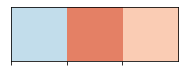

In [81]:
# set color pallet:
a3 = np.array(sns.color_palette("RdBu_r", n_colors=7))
# colorPallet3 =(a3[[2,6,5],:])
colorPallet3 =(a3[[2,5,4],:])
sns.palplot(sns.color_palette(colorPallet3))

<h3> Check number of edges in high vs. low mvmt </h3>

In [17]:
f = h5py.File(connMaps,'r')
col_names = ['Mouse','Sess','Day','numred','Period','population','mvmt','Property','corrType']
df = pd.DataFrame(columns = col_names)
for m in f.keys():
    for sess in f[m].keys():
        for mvmt in f[m][sess]['Pre'].keys():
            try:
                numred = f[m][sess].attrs['numRed']
                cre = getCreType(Files[1],m)
                tempDict = {'Mouse':m,'Sess':sess,'Day':f[m][sess].attrs['day'],
                            'numred':numred,'Period':f[m][sess].attrs['period']}
                for cType in ['pearson','pearsonF','aSymCorr']:
                    c = f[m][sess]['Pre'][mvmt][cType].value 
                    c[np.tril(c,-1)==0] = np.nan

                    d = f[m][sess]['Pre'][mvmt][(cType+'_shuffle')].value
                    b = np.nanpercentile(d,[97.5,2.5],axis=2)

                    nSig = (c>b[0,:,:])|(c<b[1,:,:])
                    cSig = np.copy(c)
                    cSig[nSig] = np.nan
                    noSig = np.copy(c)
                    noSig[~nSig] = np.nan

                    if numred > 1:
                        tempDict['population'] = cre+'-'+cre
                        tempDict['corrType'] = cType
                        tempDict['mvmt'] = mvmt
                        tempDict['sigPercent'] = np.nansum(nSig[:numred,:numred]==1)/np.nansum(np.isnan(c[:numred,:numred])==0)
                        df2 = pd.DataFrame([tempDict])
                        df = pd.concat([df,df2],sort=True)
                    if numred > 0:
                        tempDict['population'] = cre+'-'+cre
                        tempDict['corrType'] = cType
                        tempDict['mvmt'] = mvmt
                        tempDict['sigPercent'] = np.nansum(nSig[numred:,:numred]==1)/np.nansum(np.isnan(c[numred:,:numred])==0)

                        df2 = pd.DataFrame([tempDict])
                        df = pd.concat([df,df2],sort=True)                    

                    tempDict['population'] = cre+'-'+cre
                    tempDict['corrType'] = cType
                    tempDict['mvmt'] = mvmt
                    tempDict['sigPercent'] = np.nansum(nSig[numred:,numred:]==1)/np.nansum(np.isnan(c[numred:,numred:])==0)
                    df2 = pd.DataFrame([tempDict])
                    df = pd.concat([df,df2],sort=True)    
    # 
            except Exception as e:
                exc_type, exc_obj, exc_tb = sys.exc_info()
                print(sess,'-',mvmt,exc_tb.tb_lineno,c.shape)
f.close()
df.to_csv(figFolder+'mvmtNetWork.csv')

<ipython-input-17-095a45ac06d1>:13: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  c = f[m][sess]['Pre'][mvmt][cType].value
<ipython-input-17-095a45ac06d1>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  d = f[m][sess]['Pre'][mvmt][(cType+'_shuffle')].value
C:\Users\dzemel\Miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
<ipython-input-17-095a45ac06d1>:36: RuntimeWarning: invalid value encountered in long_scalars
  tempDict['sigPercent'] = np.nansum(nSig[numred:,:numred]==1)/np.nansum(np.isnan(c[numred:,:numred])==0)
<ipython-input-17-095a45ac06d1>:44: RuntimeWarning: invalid value encountered in long_scalars
  tempDict['sigPercent'] = np.nansum(nSig[numred:,numred:]==1)/np.nansum(np.isnan(c[numred:,numred:])==0)
<ipython-input-17-095a45ac06d1>:29: RuntimeWarning: invalid value encountered in l

0761_day31A - highIpsi 14 ()
0761_day35L - hiSpeed 14 ()
0761_day35L - highIpsi 14 ()
1208_day2 - highIpsi 14 ()
1208_day30A - highIpsi 14 ()
1208_day34L - highIpsi 14 ()
1222_day2 - hiSpeed 14 ()
1222_day2 - highContra 14 ()
1222_day2 - highIpsi 14 ()
1222_day2 - lowRot 14 ()
1222_day2 - lowSpeed 14 ()
1222_day2 - totRot 14 ()
1236_day15A - highContra 14 ()
1236_day19L - highContra 14 ()
1236_day30A - highContra 14 ()
2980_day19L - highIpsi 14 ()
2981_day2 - highContra 14 ()
4539_day1 - highContra 14 ()
4539_day1 - highIpsi 14 ()
4539_day1 - totRot 14 ()
4539_day10 - highContra 14 ()
4539_day10 - highIpsi 14 ()
4539_day10 - totRot 14 ()
4539_day11 - highContra 14 ()
4539_day11 - highIpsi 14 ()
4539_day11 - totRot 14 ()
4539_day12 - highContra 14 ()
4539_day12 - highIpsi 14 ()
4539_day12 - totRot 14 ()
4539_day13 - highContra 14 ()
4539_day13 - highIpsi 14 ()
4539_day13 - totRot 14 ()
4539_day14 - highContra 14 ()
4539_day14 - highIpsi 14 ()
4539_day14 - totRot 14 ()
4539_day2 - highCo

In [72]:
# df = pd.read_csv(figFolder+'mvmtNetWork.csv')
df.mvmt.unique()

array(['hiSpeed', 'highContra', 'highIpsi', 'lowRot', 'lowSpeed',
       'totRot'], dtype=object)

In [119]:
def plot_network(con_matrix, cell_color_list,cell_location,ax = None):
    rows, cols = np.where(con_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_nodes_from(np.arange(con_matrix.shape[0]))
    gr.add_edges_from(edges)
#     print(edges)
    if ax is None: 
        nx.draw(gr,cell_location,node_size=50, node_color=cell_color_list,width=.5,alpha=.6) #node_size=500,with_labels=True
    else: 
        nx.draw(gr,cell_location,node_size=50, node_color=cell_color_list,width=.5,ax=ax,alpha=.6)
    return gr
#     plt.show()

    
def getPositions(fileName,m,s):
    with h5py.File(fileName,'r') as hf:
        if m+'/'+s+'/traces/ROI' in hf:
            return hf[m][s]['traces']['ROI'][:]
        else:
            return -1



In [ ]:
mvmtList =['lowSpeed', 'hiSpeed']
f = h5py.File(connMaps,'r')
for m in miceList:
    for s in tqdm(f[m].keys()):
        sess = s[5:]
        numred = f[m][m+'_'+sess].attrs['numRed']
        cre = getCreType(Files[1],m)
        
        P = getPositions(Files[1],m,sess)
                # # print(P)
        p = {}
        for x in range(P.shape[1]):
            p[x] = (P[0,x],P[1,x])
        node_color = ['red'  if x<numred else "green" for x in range(len(p))]
        for cType in ['pearson','pearsonF','aSymCorr']: 
            # graphs = {}
#             fig, ax  = plt.subplots(1,len(mvmtList),figsize = (15,15))
            for ind, mvmt in enumerate(mvmtList):
                try:
                    c = f[m][m+'_'+sess]['Pre'][mvmt][cType].value 
                    c[np.tril(c,-1)==0] = np.nan
                    d = f[m][m+'_'+sess]['Pre'][mvmt][(cType+'_shuffle')].value
                    b = np.nanpercentile(d,[97.5,2.5],axis=2)
#                     print(c.shape,b.shape)
                    nSig = (c>b[0,:,:])|(c<b[1,:,:])
                    G = plot_network(nSig, node_color,p)
    #                 ax[ind].set_title(mvmt)
                    nx.write_adjlist(G, "D:\\6OHDA\\graphs\\"+m+"_"+sess+"_"+mvmt+"_"+cType+".adjlist")
                except:
                    print(m,sess,c.shape)



                #     graphs[ind] = plot_network(nSig, node_color,p,ax=ax[ind])
                   

#     graphs[ind].degree

        
# # # print(p)

# 
# # cell_type_list[:numred] = "cre"
# # print(cell_type_list)
# plt.imshow(nSig)
# print(len(p),nSig.shape,len(node_color),node_color)
# # print(cre,numred)




Name: 
Type: Graph
Number of nodes: 87
Number of edges: 67
Average degree:   1.5402
[51, 6, 8, 8, 3, 4, 3, 1, 0, 1, 0, 2]
0.017909649826249666
Name: 
Type: Graph
Number of nodes: 87
Number of edges: 67
Average degree:   1.5402
[51, 6, 8, 8, 3, 4, 3, 1, 0, 1, 0, 2]
0.017909649826249666


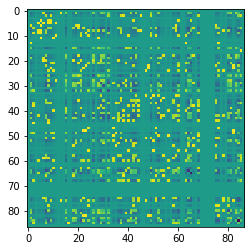

In [185]:
# df = pd.DataFrame(columns = ['mouse','session'])
# df.append({'mouse':m,'session':m+sess,'neuronNumber':graphs[ind].degree.keys()})
print(nx.info(graphs[ind]))
print(nx.degree_histogram(graphs[ind]))
print(nx.density(graphs[ind]))
plt.imshow(nx.modularity_matrix(graphs[0]))
nx.write_adjlist(graphs[ind], "test.adjlist")
gr = nx.read_adjlist("test.adjlist")
print(nx.info(graphs[ind]))
print(nx.degree_histogram(graphs[ind]))
print(nx.density(graphs[ind]))

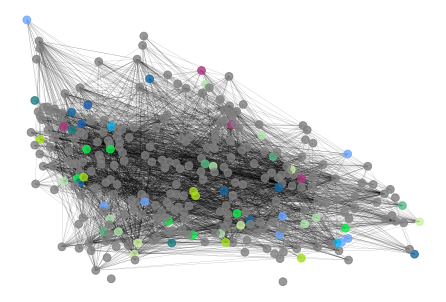

In [84]:
c = list(nx.algorithms.community.greedy_modularity_communities(G))
node_colorCom = [[.5,0.5,0.5] for x in range(len(p))]
for com in c:
    if len(com)!=1:
        cColor = np.random.uniform(size=(3))
        for n in com:
            node_colorCom[n] = cColor

nx.draw(gr,pos=p,node_color=node_colorCom, width=.1,node_size=60,alpha=.8)   


In [ ]:
for m in miceList:
    for s in tqdm(f[m].keys()):
        fig, ax  = plt.subplots(2,3,figsize = (30,30))
        fig2, ax2  = plt.subplots(2,3,figsize = (30,30))
        P = getPositions(Files[1],m,s[5:])
        numred = f[m][s].attrs['numRed']
                # # print(P)
        p = {}
        for x in range(P.shape[1]):
            p[x] = (P[0,x],P[1,x])
        node_color = ['red'  if x<numred else "green" for x in range(len(p))]
        for mInd,mvmt in enumerate(['hiSpeed','lowSpeed']):
            for ind,cType in enumerate(['pearson','pearsonF','aSymCorr']): 
                c = f[m][s]['Pre'][mvmt][cType].value 
                if c.shape == ():
                    continue
                c[np.tril(c,-1)==0] = np.nan
                d = f[m][s]['Pre'][mvmt][(cType+'_shuffle')].value
                b = np.nanpercentile(d,[97.5,2.5],axis=2)
#                     print(c.shape,b.shape)
                nSig = (c>b[0,:,:])|(c<b[1,:,:])
                gr = plot_network(nSig, node_color,p,ax=ax[mInd,ind])
                ax[mInd,ind].set_title(mvmt+' - '+cType,fontsize=20)
                try:
                    c = list(nx.algorithms.community.greedy_modularity_communities(gr))
                    node_colorCom = [[.5,0.5,0.5] for x in range(len(p))]
                    for com in c:
                        if len(com)!=1:
                            cColor = np.random.uniform(size=(3))
                            for n in com:
                                node_colorCom[int(n)] = cColor

                    gr = plot_network(nSig, node_colorCom,p,ax=ax2[mInd,ind])
                    ax2[mInd,ind].set_title(mvmt+' - '+cType,fontsize=20)  
                except:
                    continue
        fig.savefig(figFolder+s+'_network.png')
        fig2.savefig(figFolder+s+'_networkAndCommunities.png')

        


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

calculating correlations... 


WARNING    <ipython-input-299-a3b33c125bb5>:58: RuntimeWarning: invalid value encountered in true_divide
  cor = np.dot(Ca ,Ca.T)/np.sum(Ca,axis=1) # Do the actual co-occorence matrix not np.corrcoef(Ca)
 [py.warnings]
WARNING    <ipython-input-299-a3b33c125bb5>:69: RuntimeWarning: invalid value encountered in true_divide
  sCor[:,:,s] = np.dot(Ca2 ,Ca2.T)/np.sum(Ca2,axis=1)
 [py.warnings]


<IPython.core.display.Javascript object>


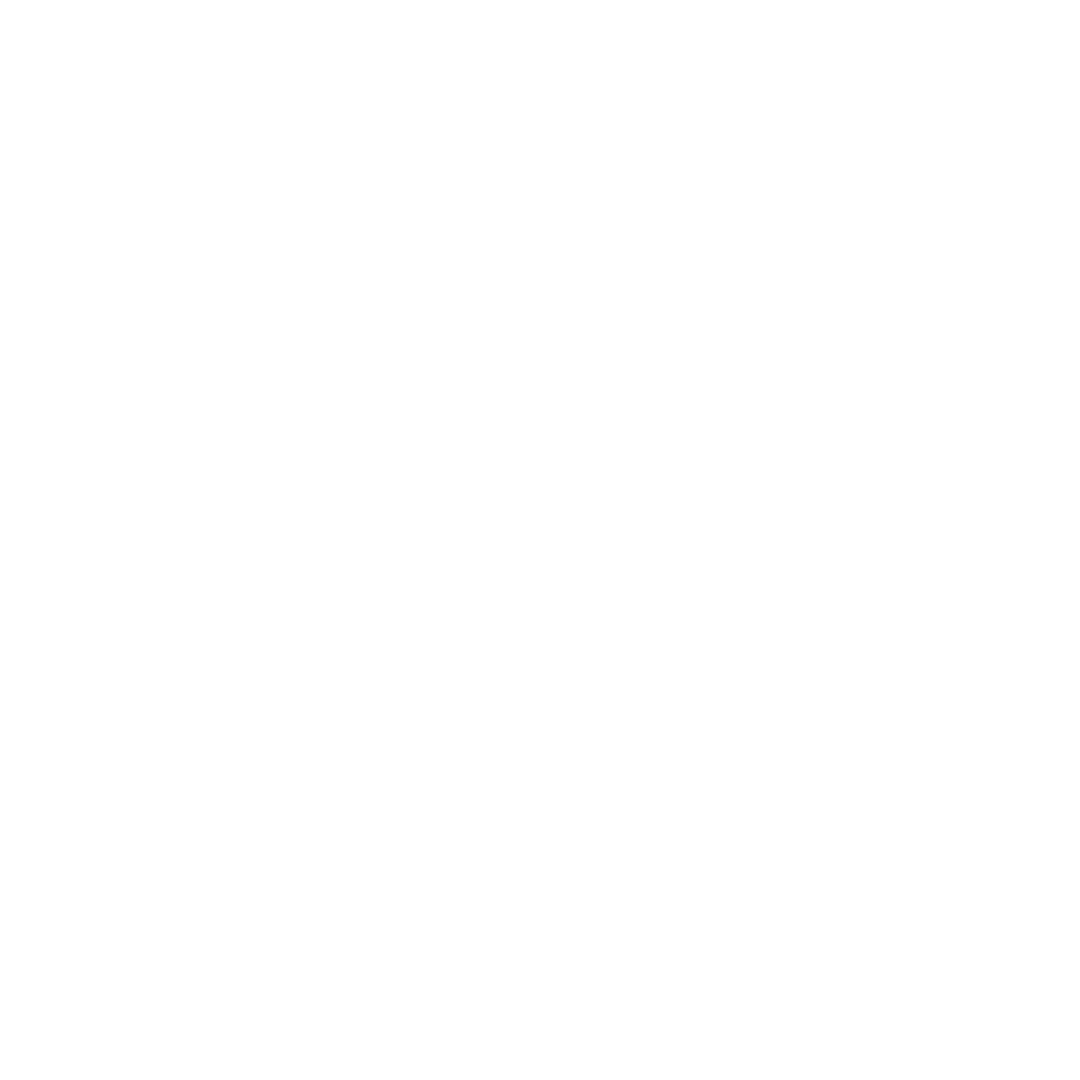

plotting and saving... 


  1%|▊                                                                             | 1/100 [11:20<18:42:51, 680.52s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


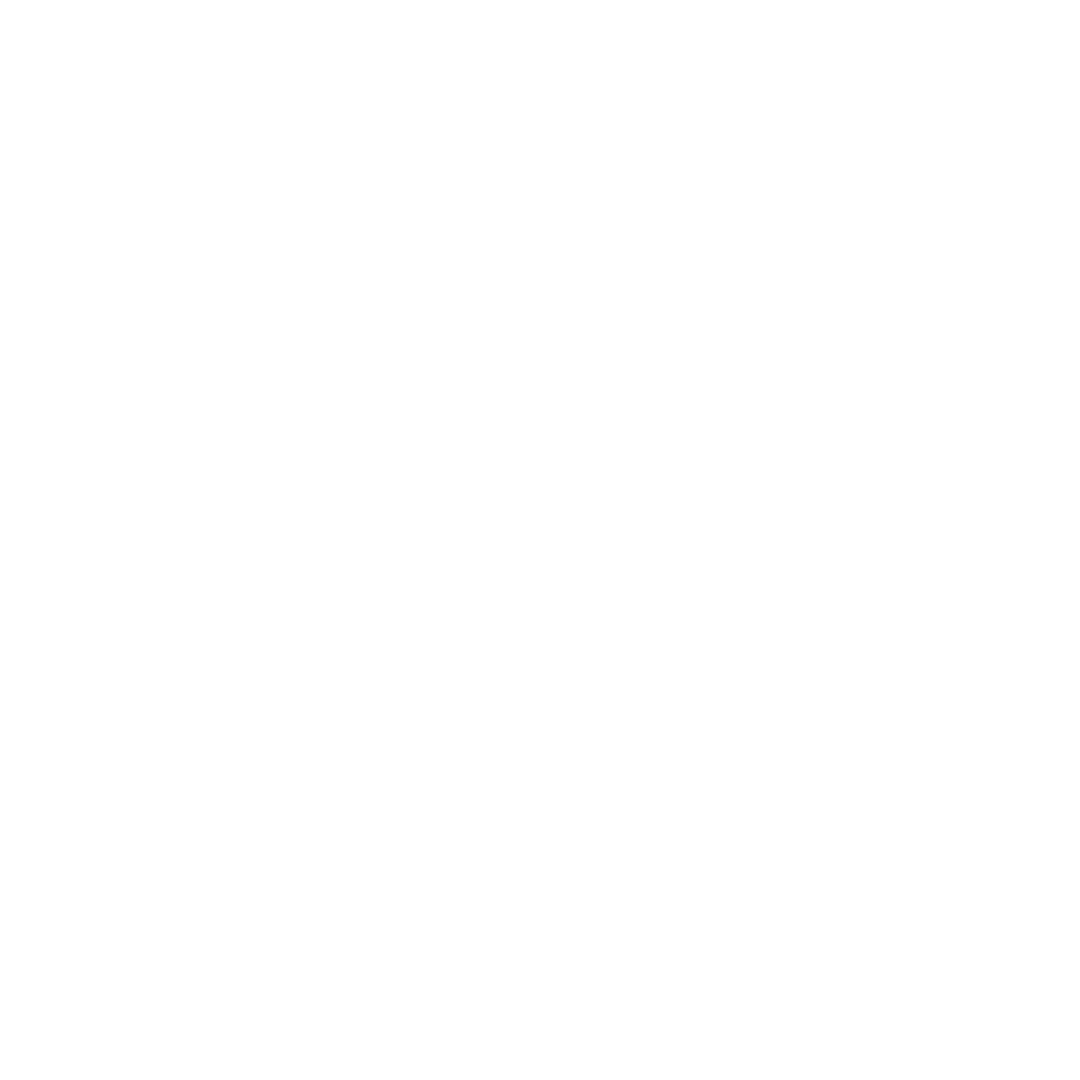

plotting and saving... 


  2%|█▌                                                                            | 2/100 [22:53<18:37:48, 684.37s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


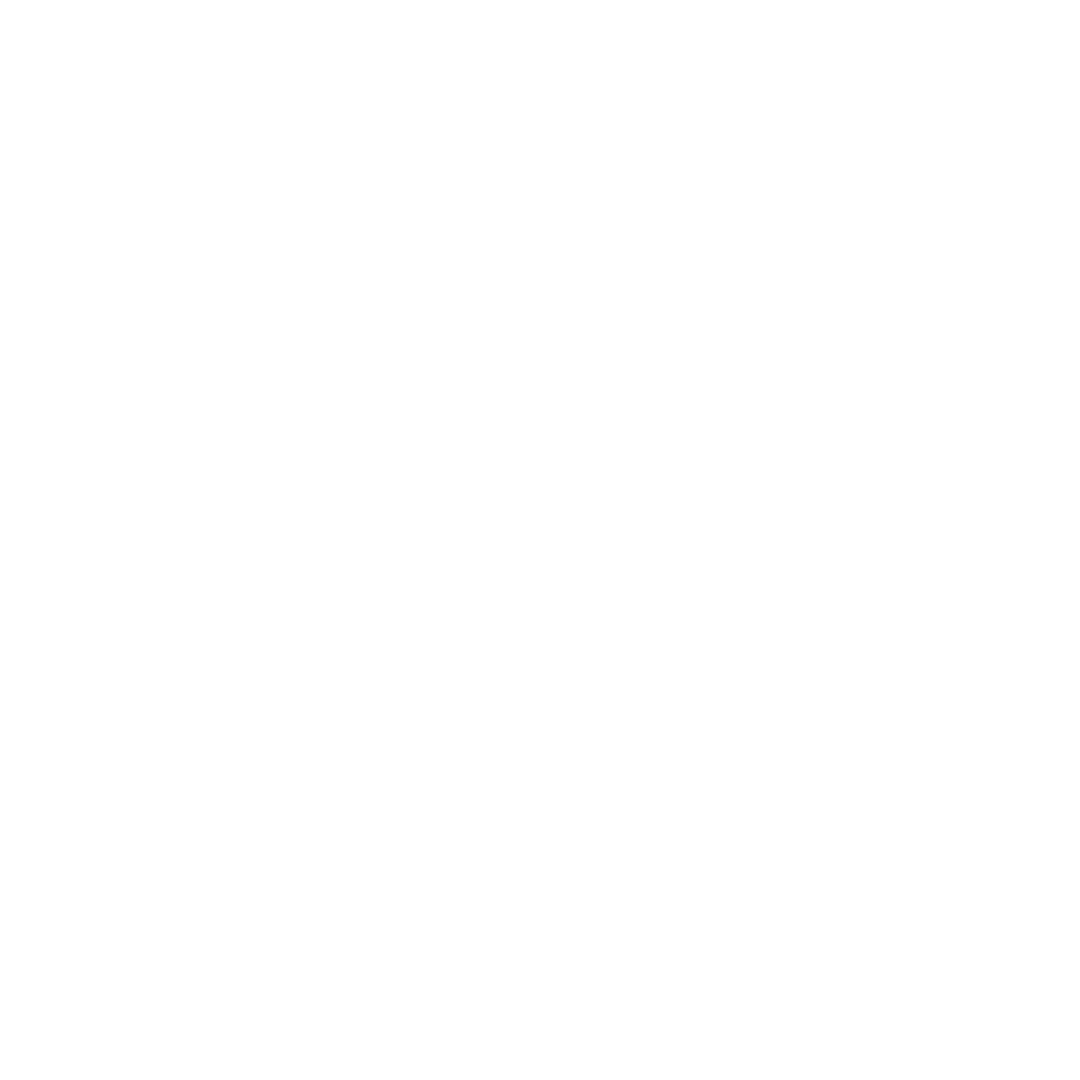

plotting and saving... 


  3%|██▎                                                                           | 3/100 [34:19<18:26:56, 684.70s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


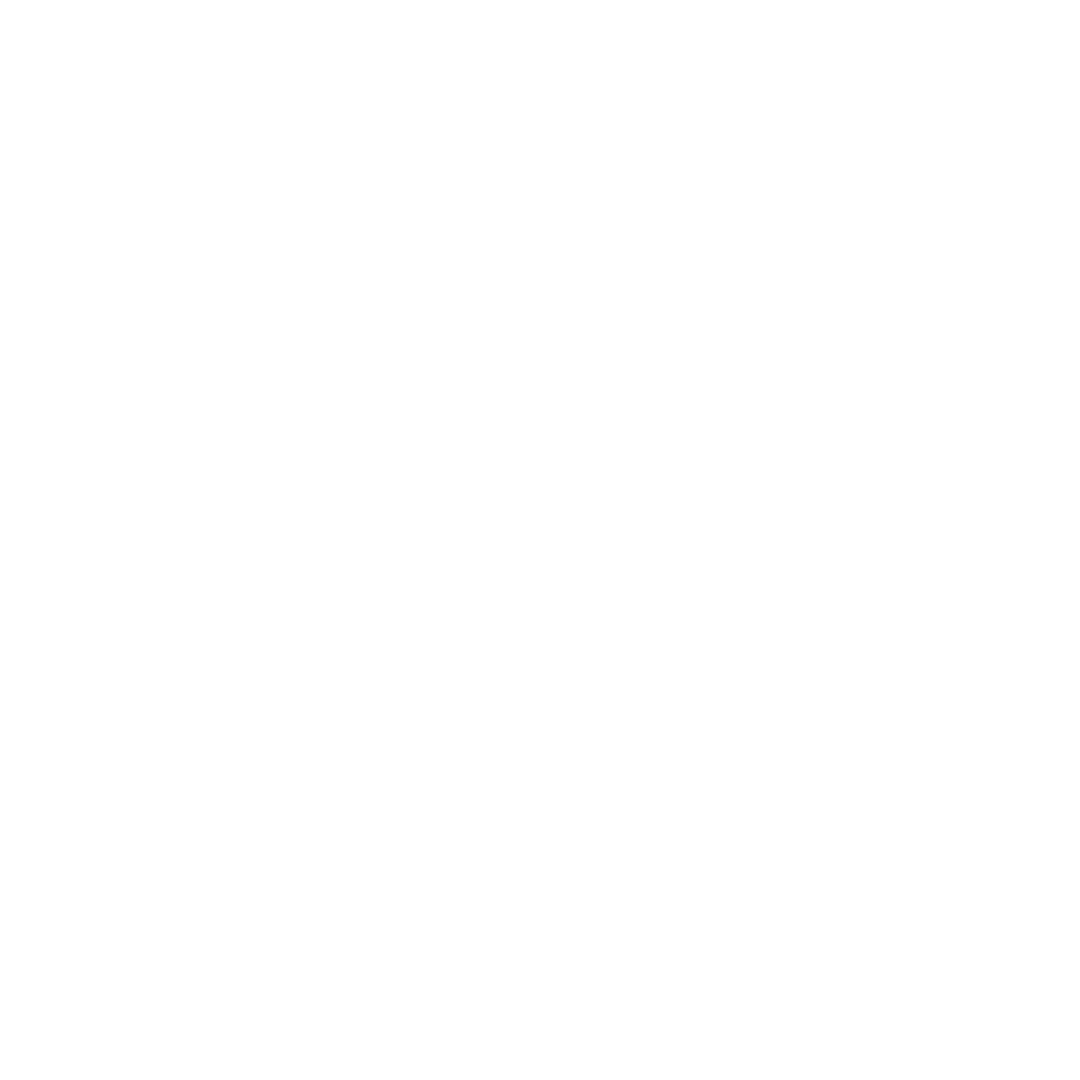

plotting and saving... 


  4%|███                                                                           | 4/100 [45:56<18:21:23, 688.37s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


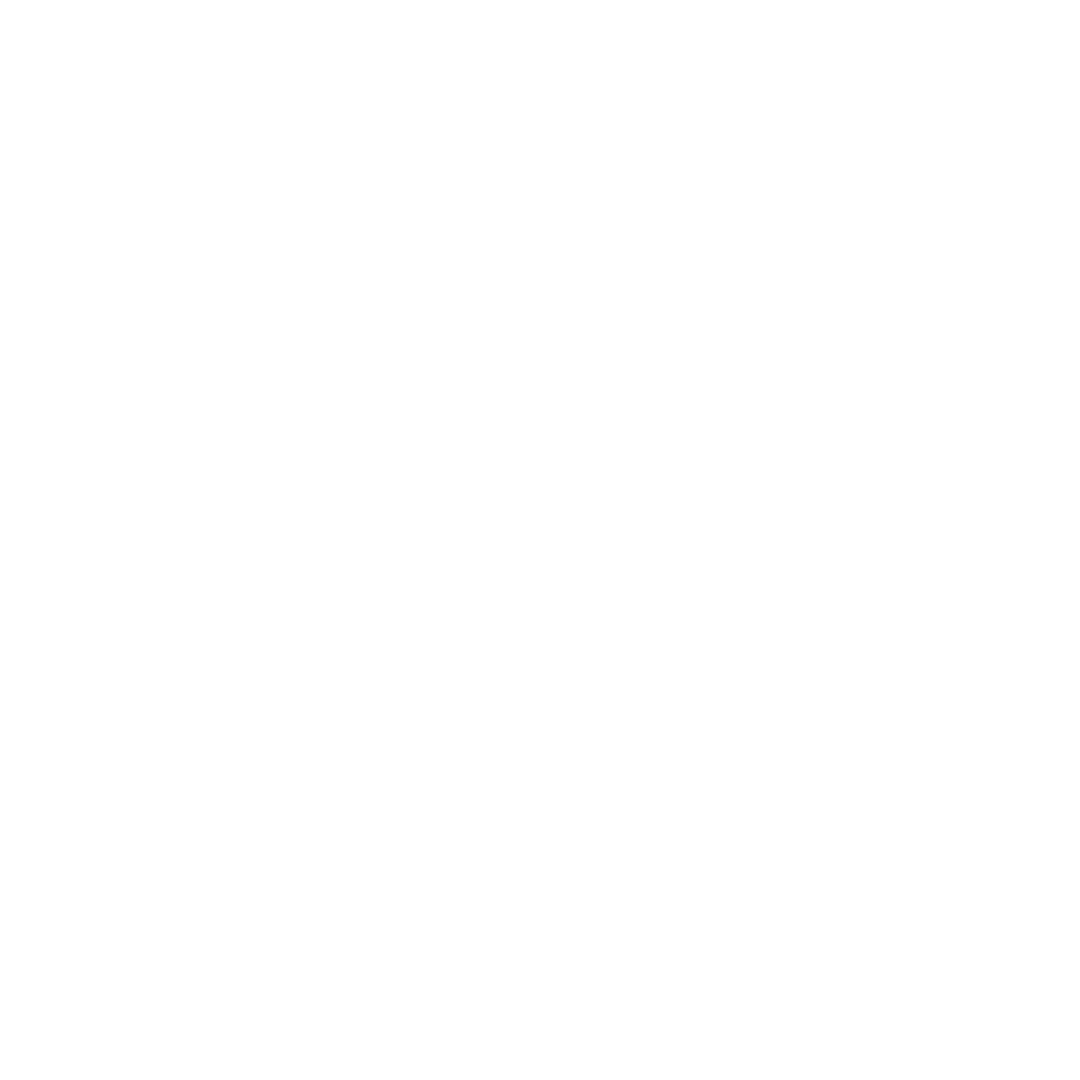

plotting and saving... 


  5%|███▉                                                                          | 5/100 [57:29<18:12:23, 689.93s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


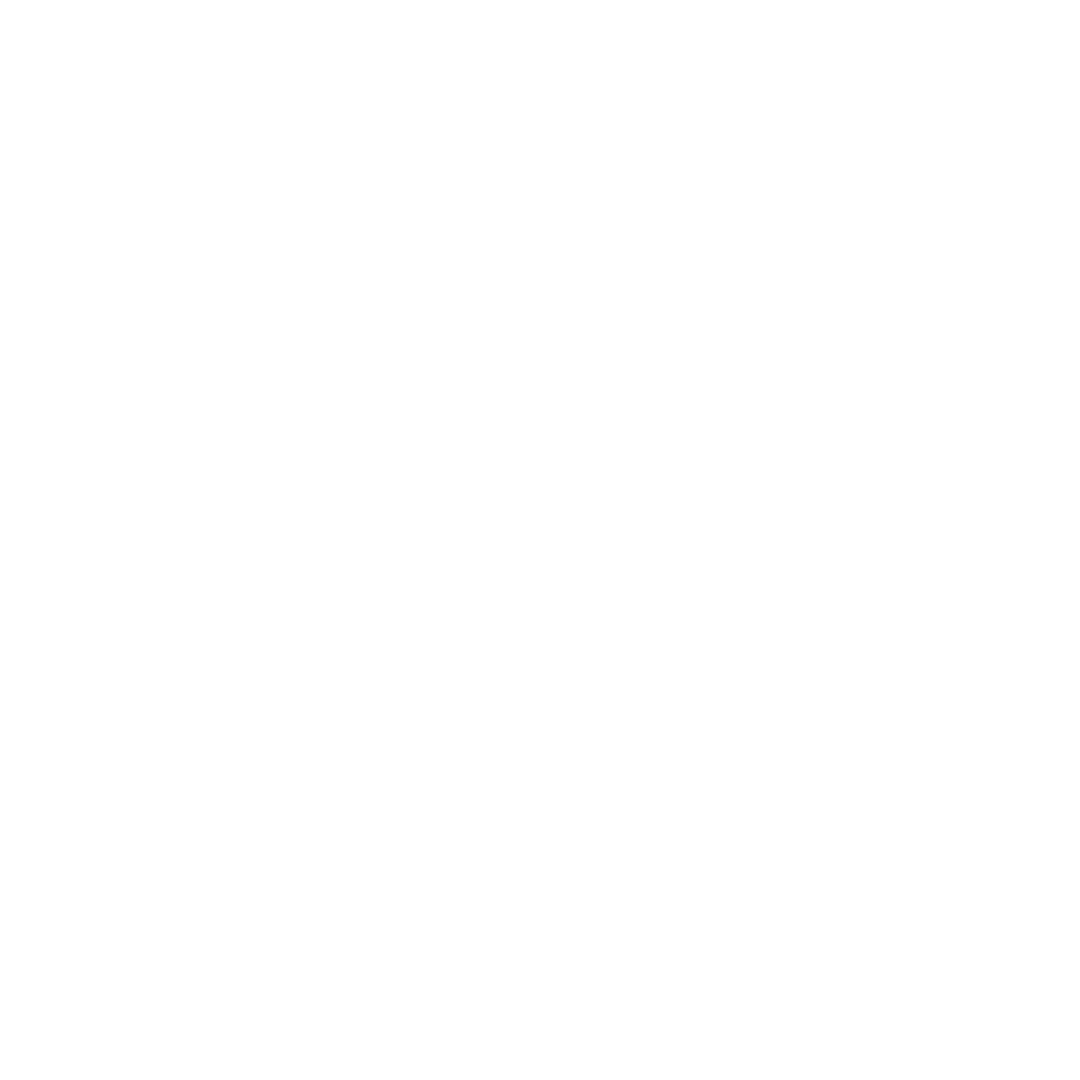

plotting and saving... 


  6%|████▌                                                                       | 6/100 [1:09:09<18:05:27, 692.84s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


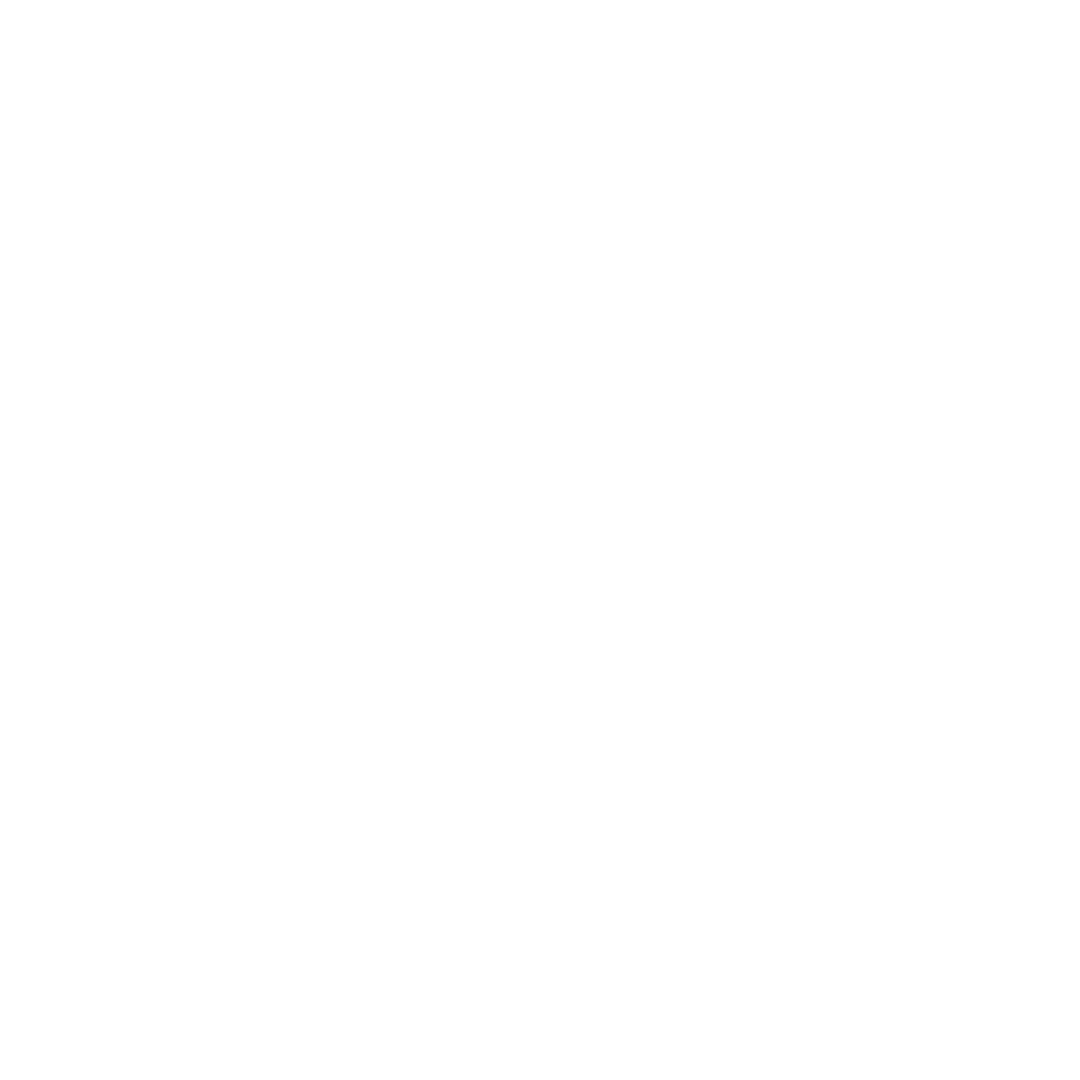

plotting and saving... 


  7%|█████▎                                                                      | 7/100 [1:20:45<17:55:20, 693.77s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


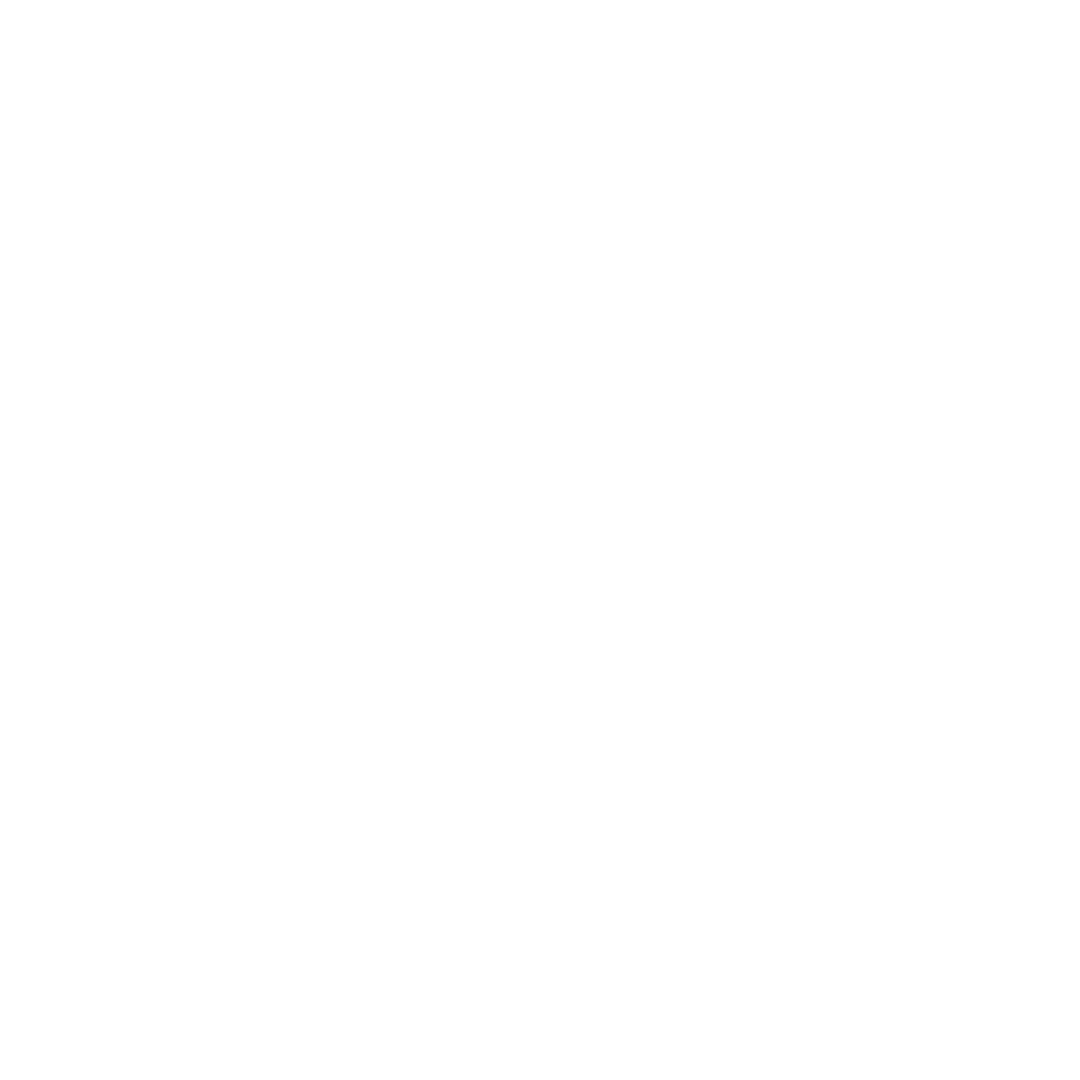

plotting and saving... 


  8%|██████                                                                      | 8/100 [1:32:19<17:43:48, 693.79s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


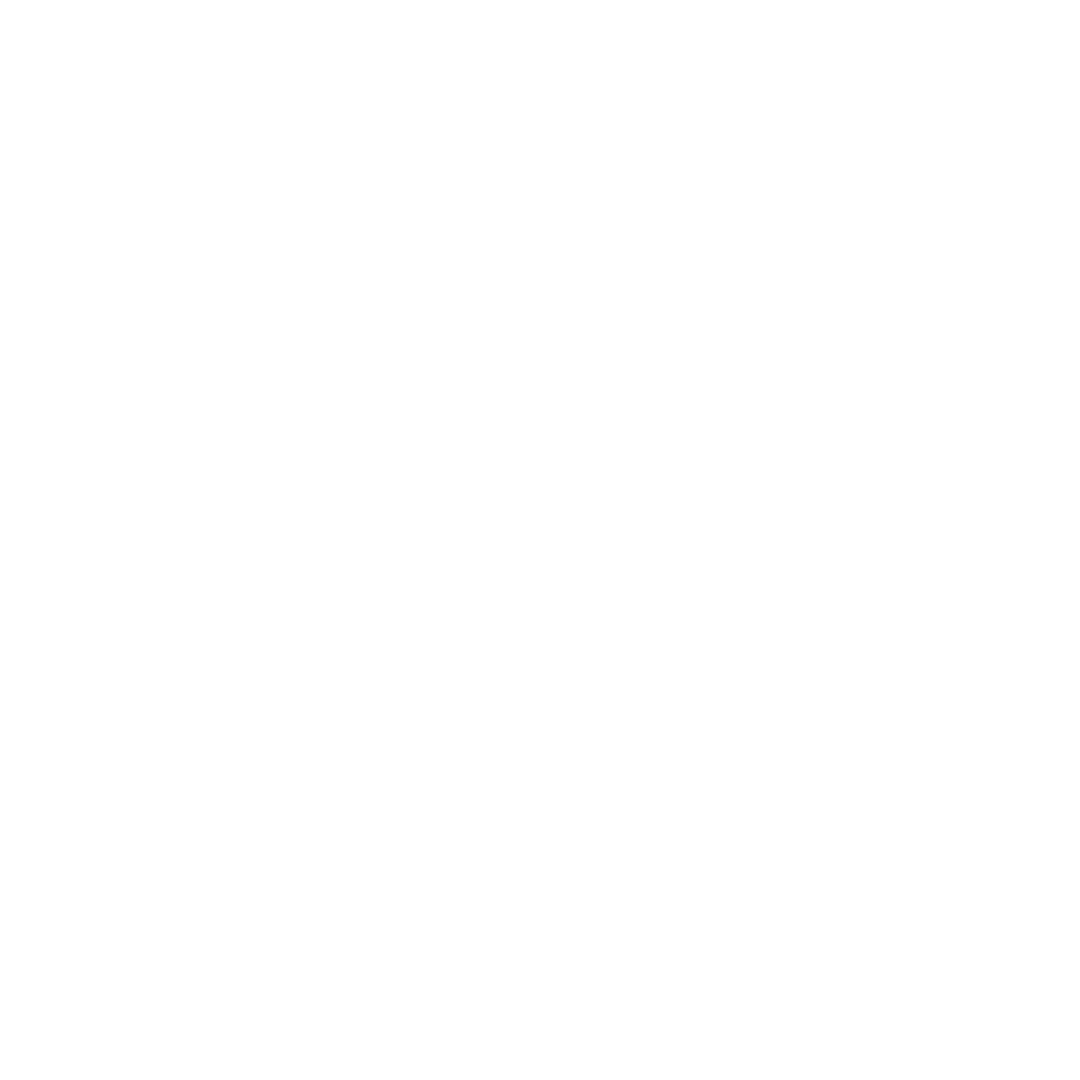

plotting and saving... 


  9%|██████▊                                                                     | 9/100 [1:44:28<17:48:21, 704.42s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


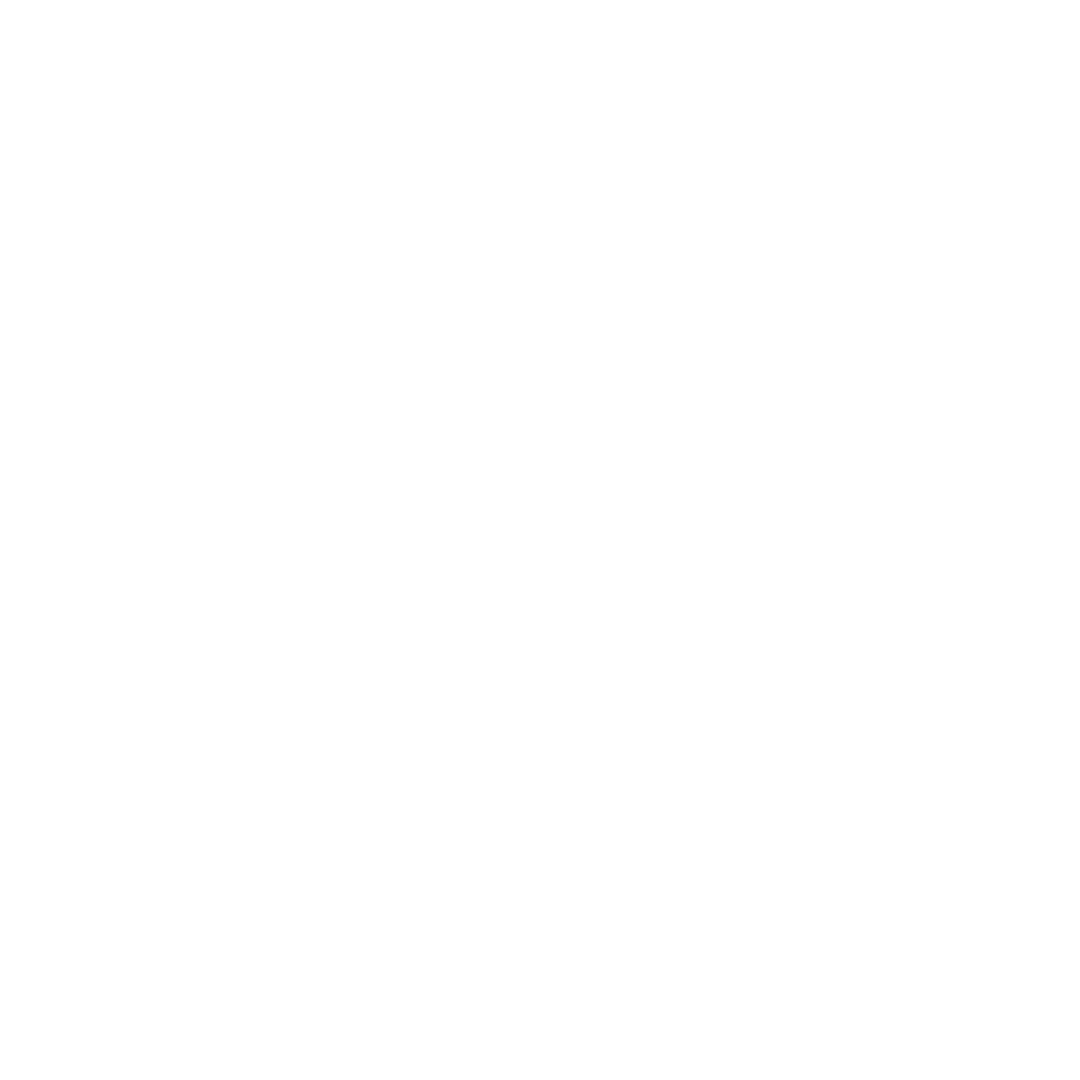

plotting and saving... 


 10%|███████▌                                                                   | 10/100 [1:56:20<17:39:57, 706.63s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


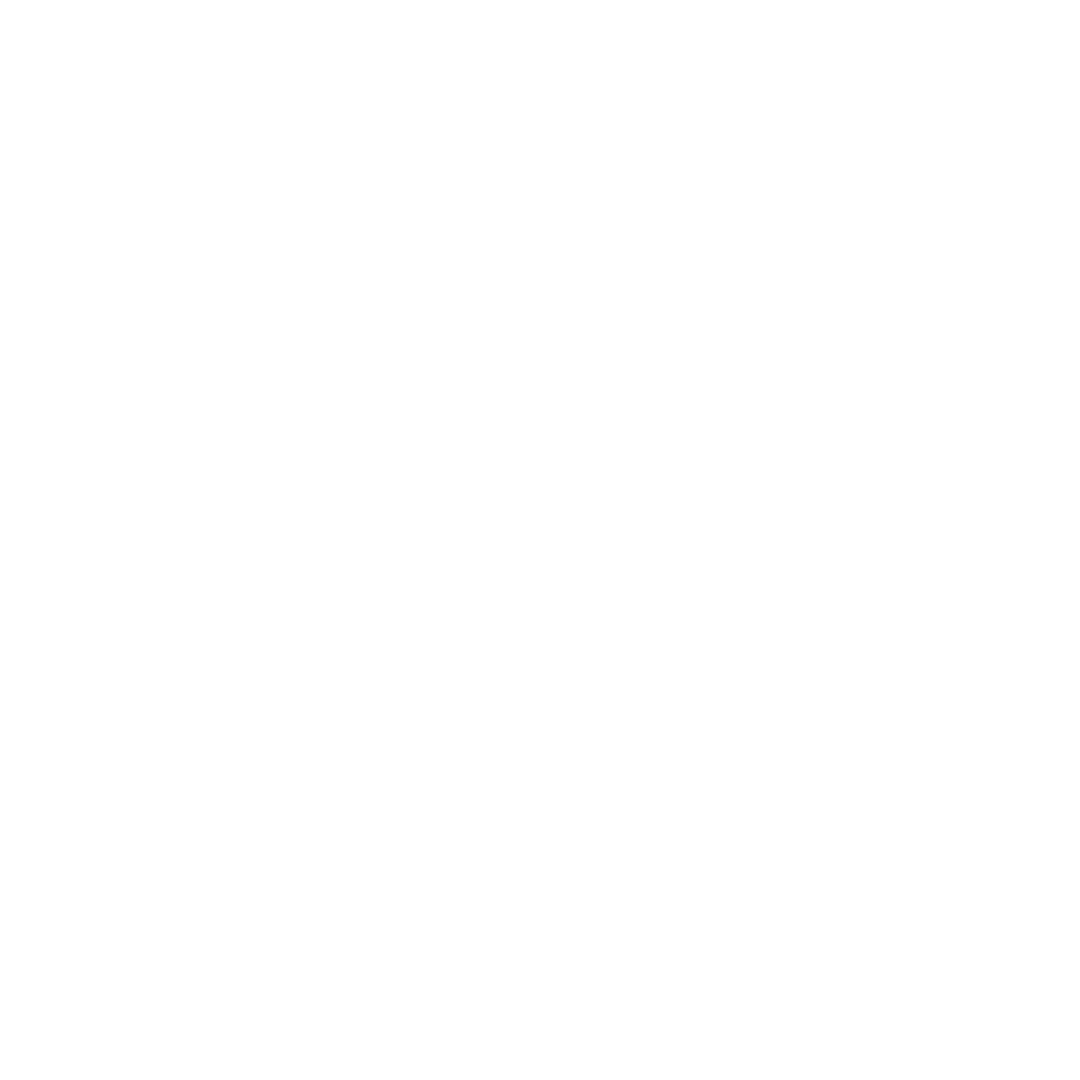

plotting and saving... 


 11%|████████▎                                                                  | 11/100 [2:07:56<17:23:43, 703.63s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


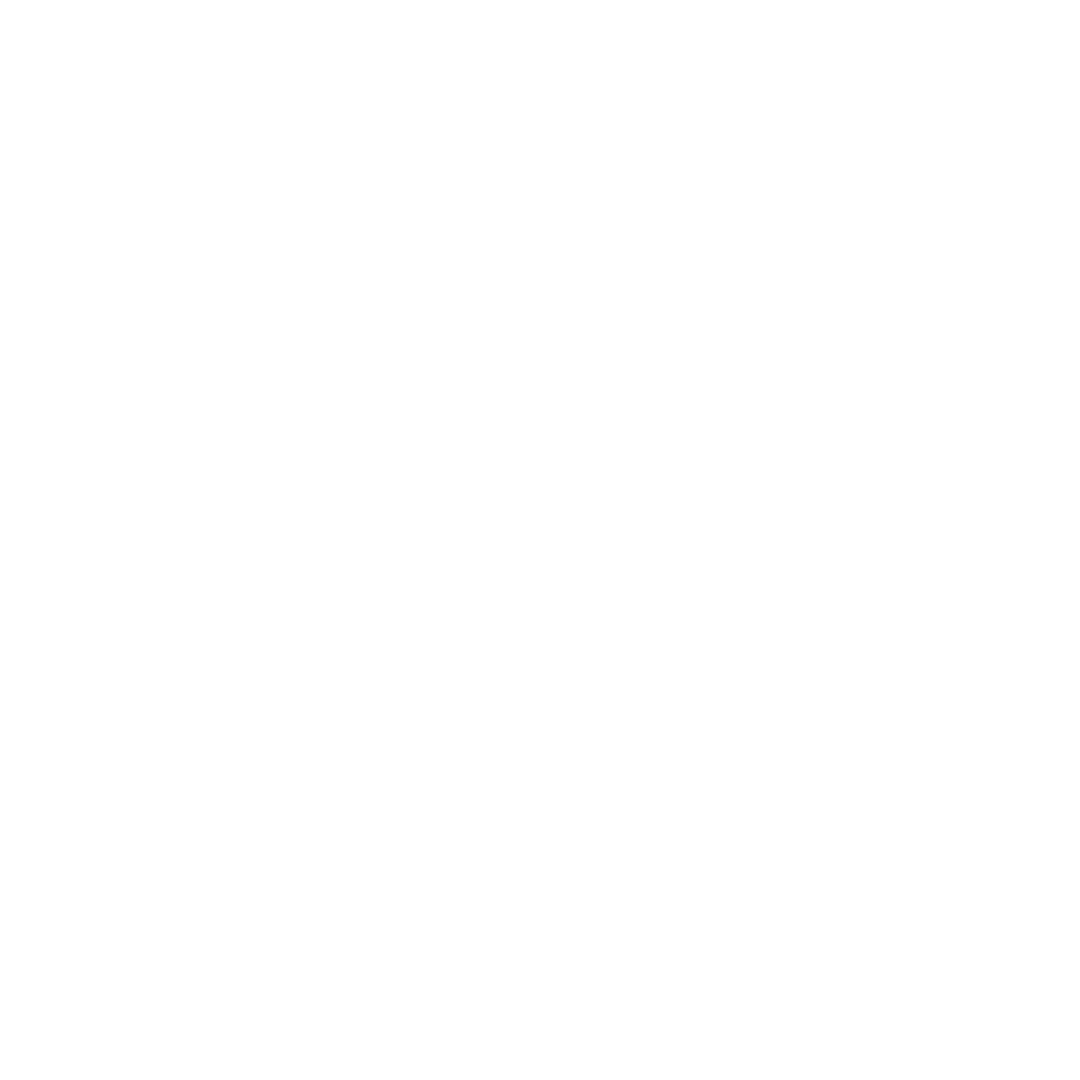

plotting and saving... 


 12%|█████████                                                                  | 12/100 [2:19:15<17:00:51, 696.04s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


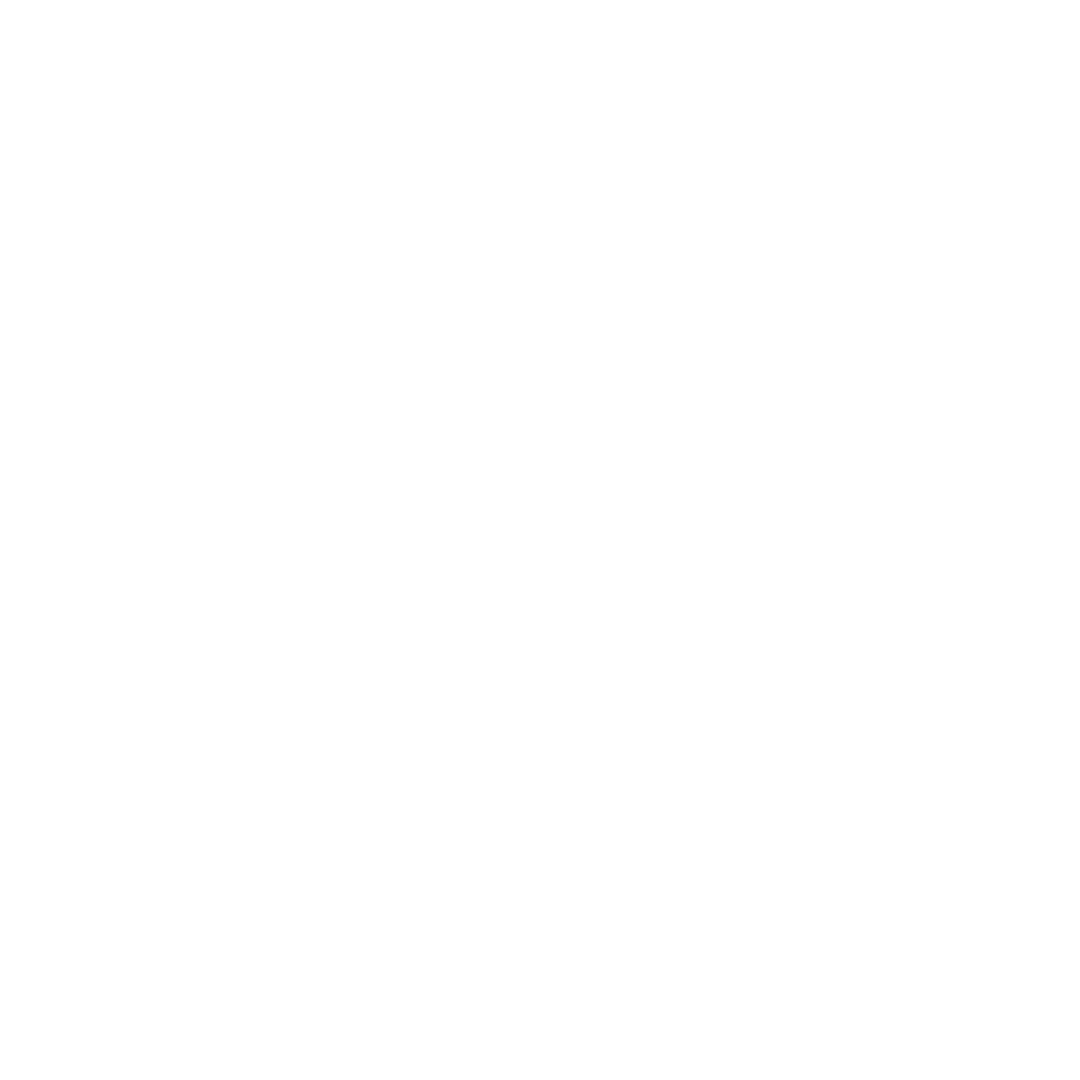

plotting and saving... 


 13%|█████████▊                                                                 | 13/100 [2:29:47<16:21:24, 676.84s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


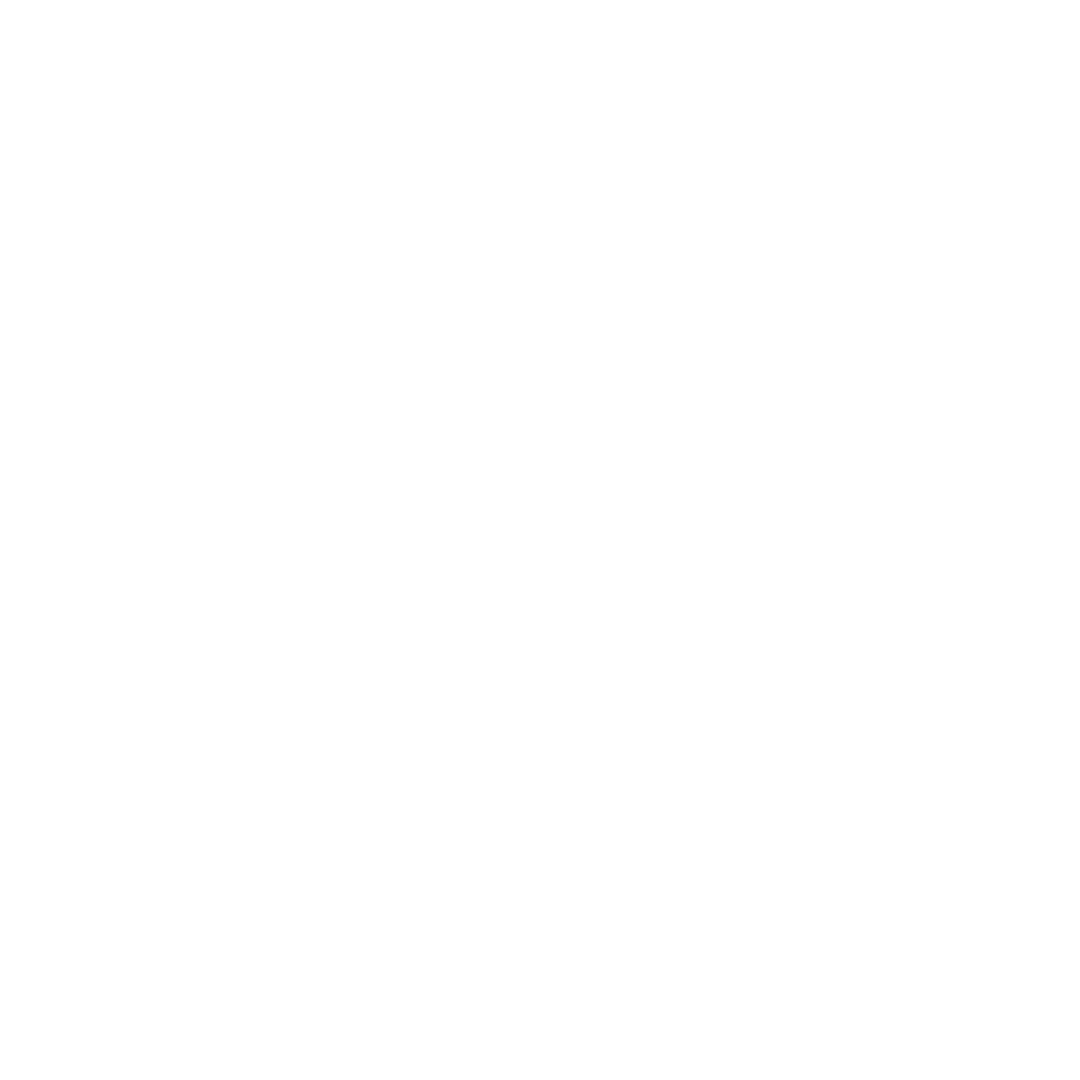

plotting and saving... 


 14%|██████████▌                                                                | 14/100 [2:40:49<16:03:42, 672.35s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


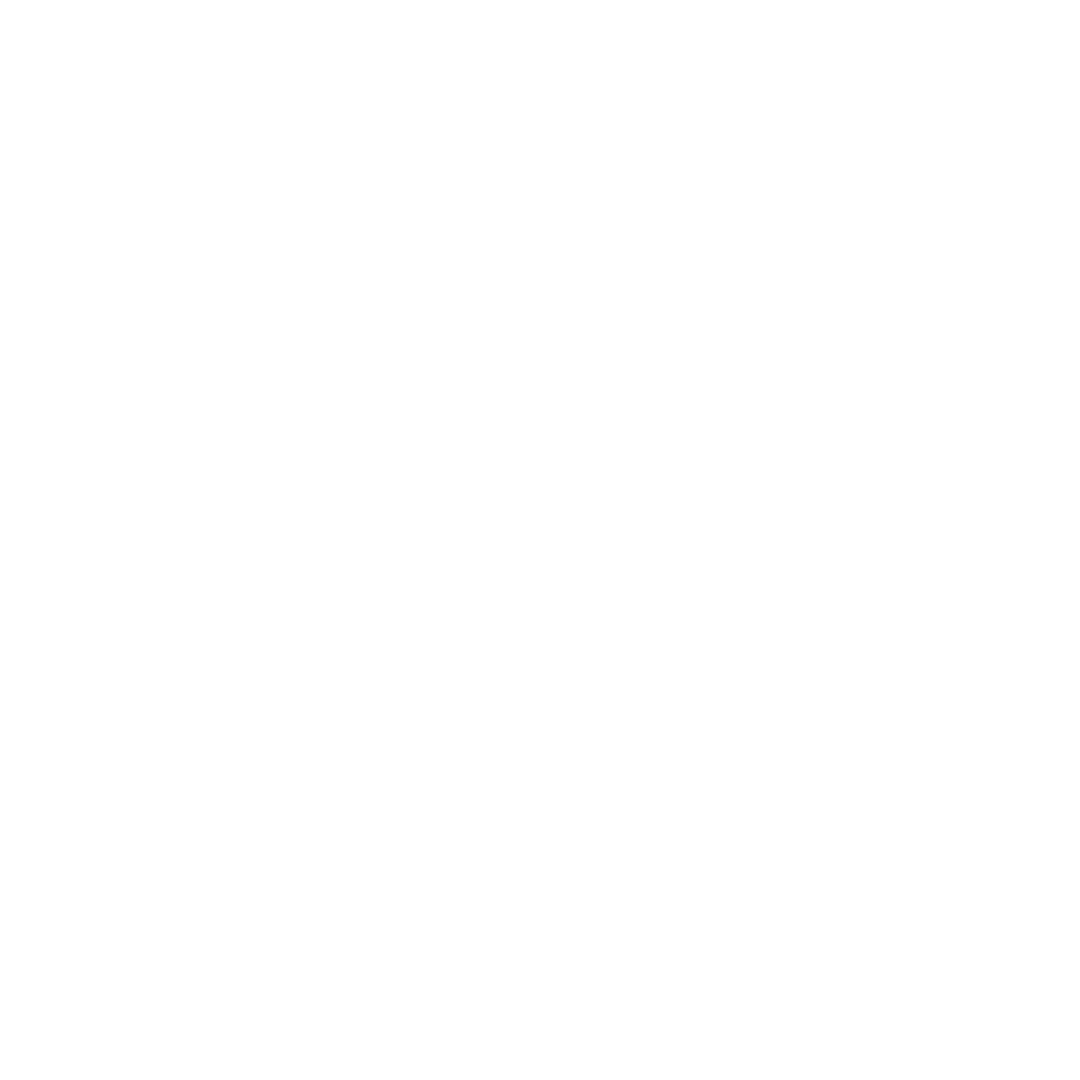

plotting and saving... 


 15%|███████████▎                                                               | 15/100 [2:51:50<15:47:48, 669.04s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


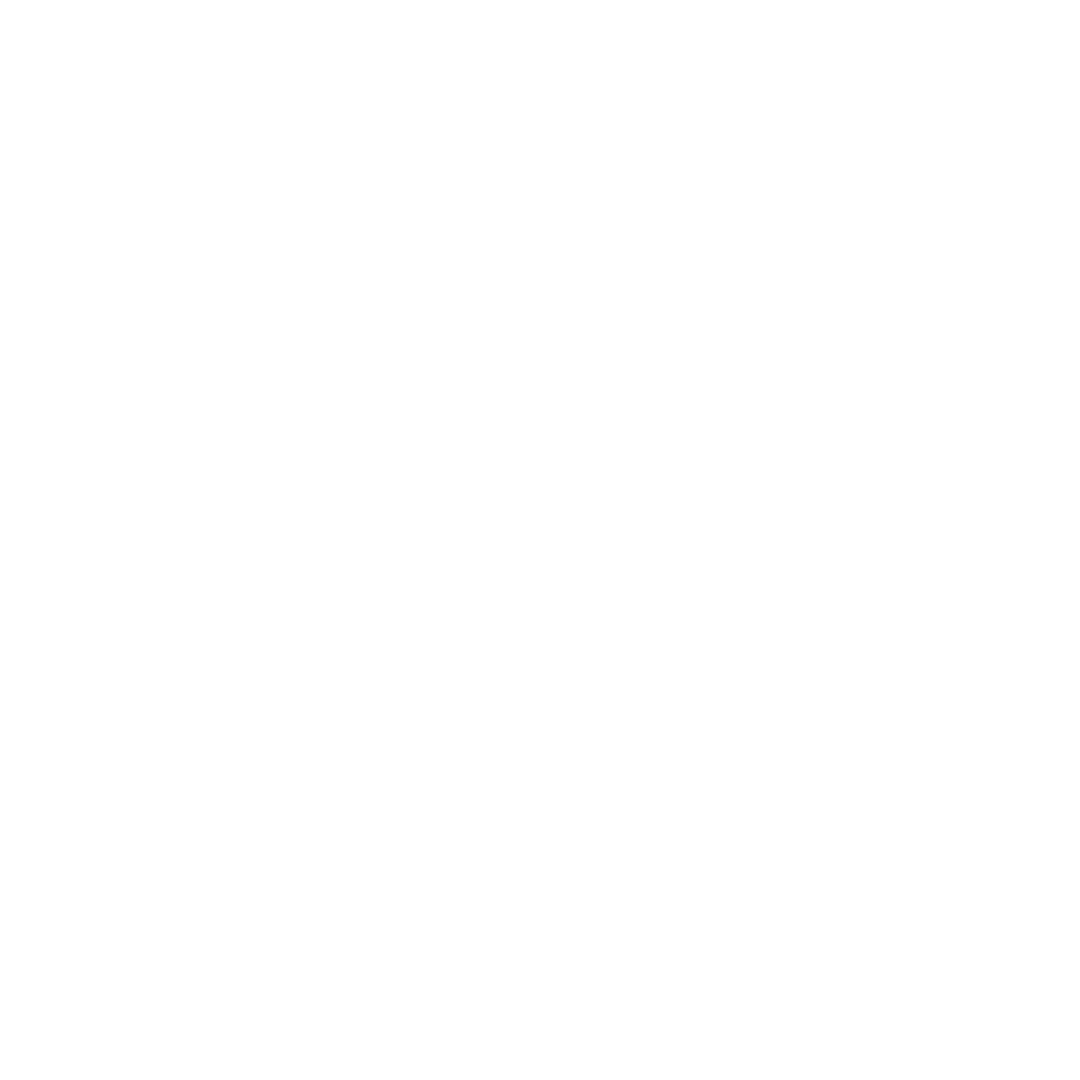

plotting and saving... 


 16%|████████████                                                               | 16/100 [3:03:18<15:44:41, 674.78s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


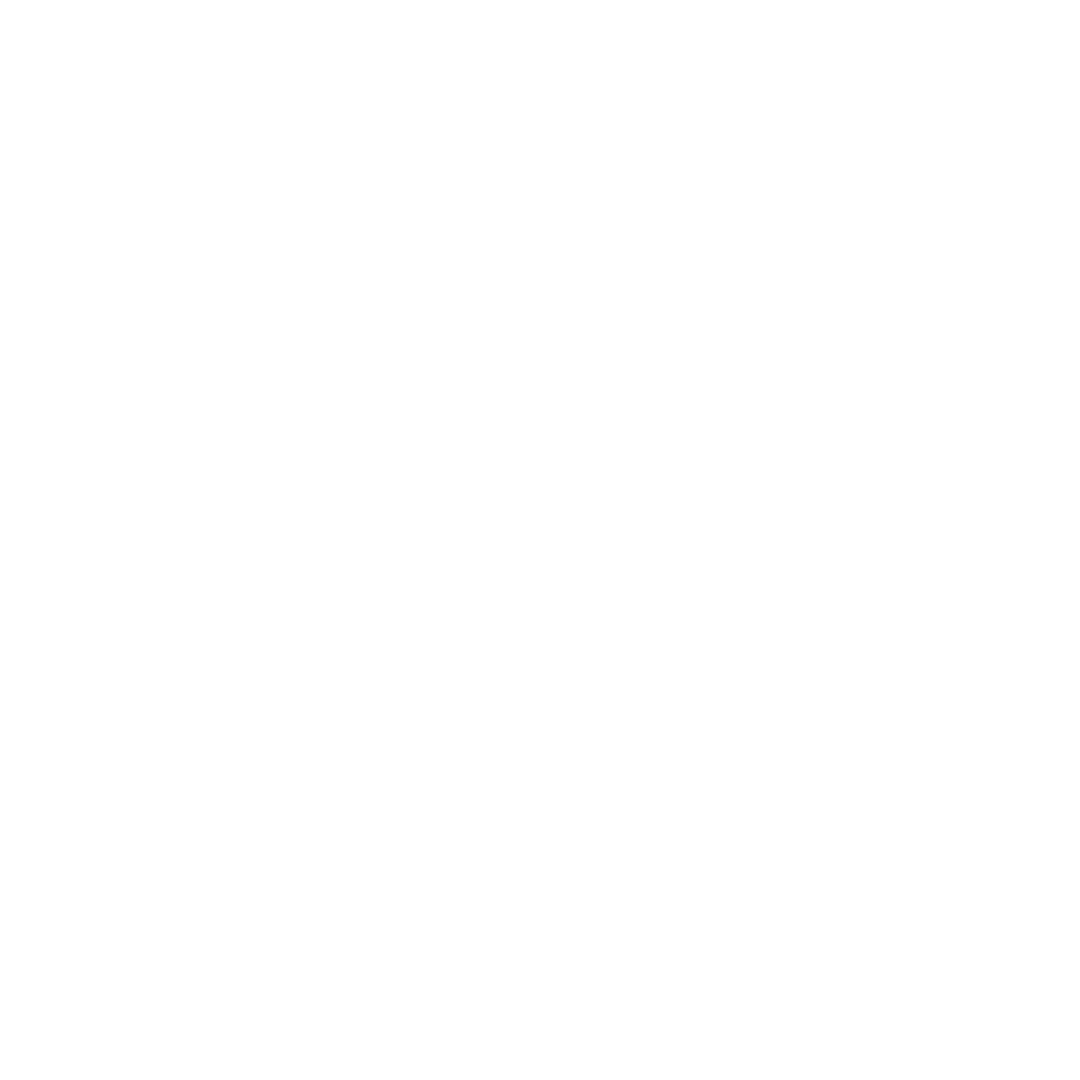

plotting and saving... 


 17%|████████████▊                                                              | 17/100 [3:14:25<15:30:16, 672.49s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


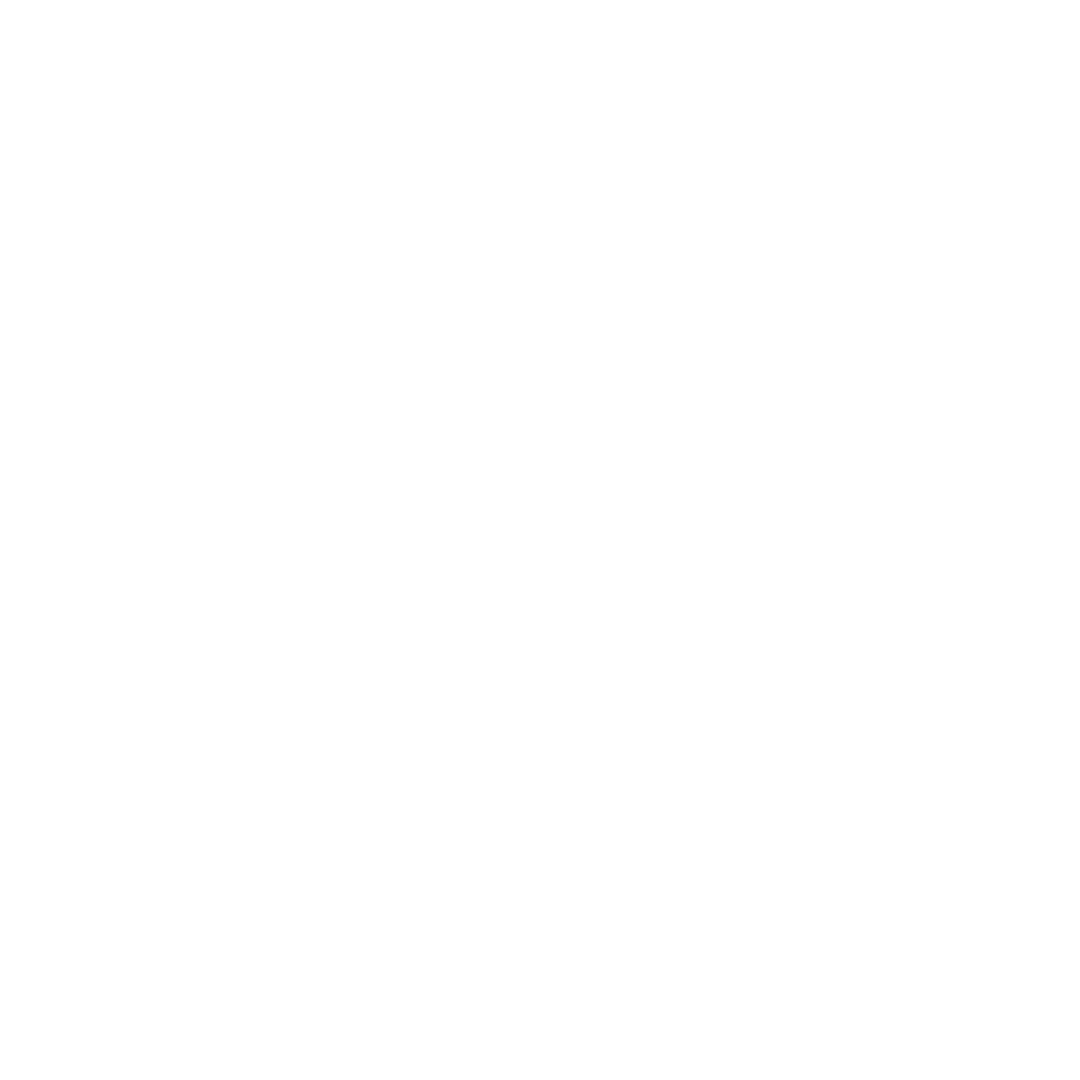

plotting and saving... 


 18%|█████████████▌                                                             | 18/100 [3:25:27<15:14:45, 669.33s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


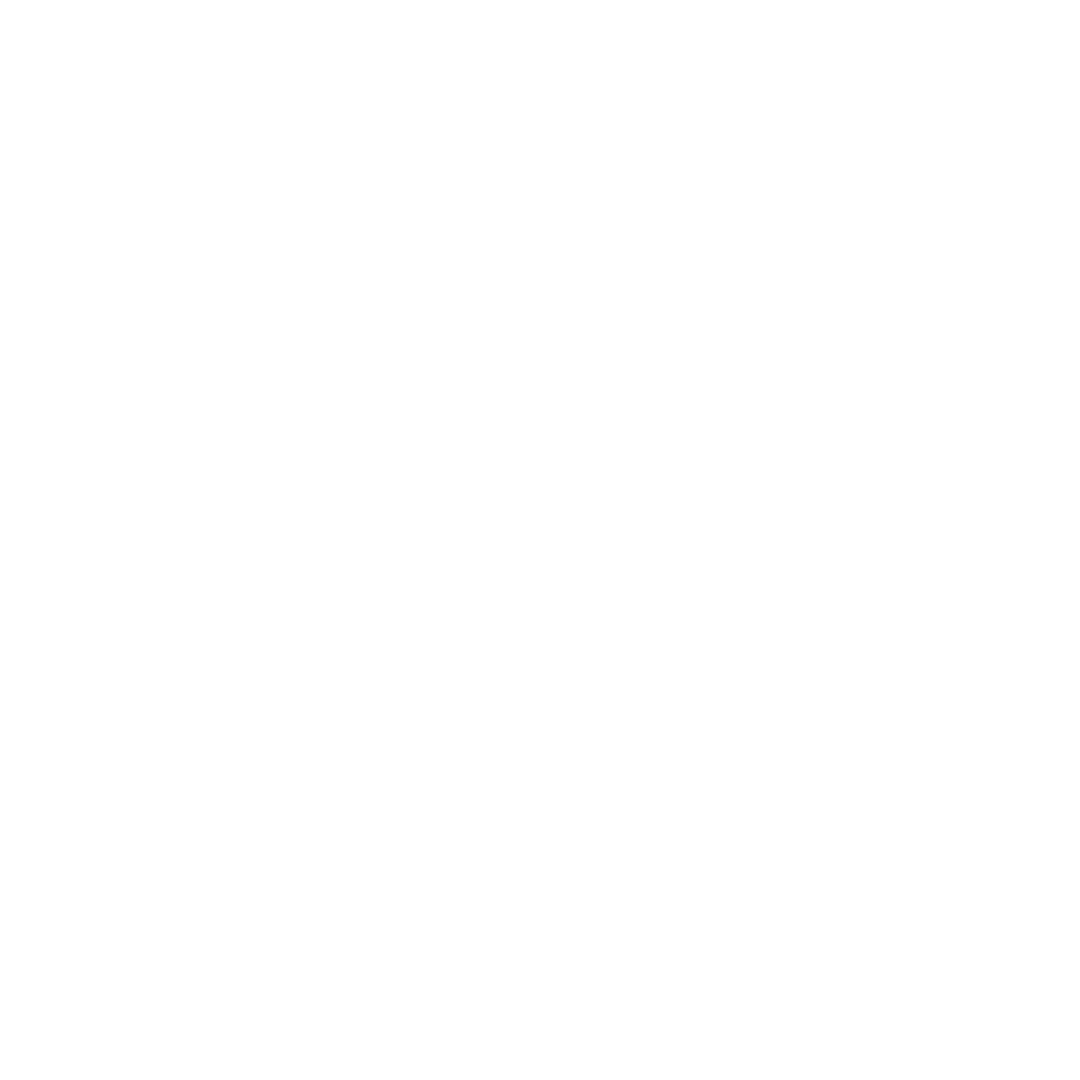

plotting and saving... 


 19%|██████████████▎                                                            | 19/100 [3:36:53<15:10:22, 674.35s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


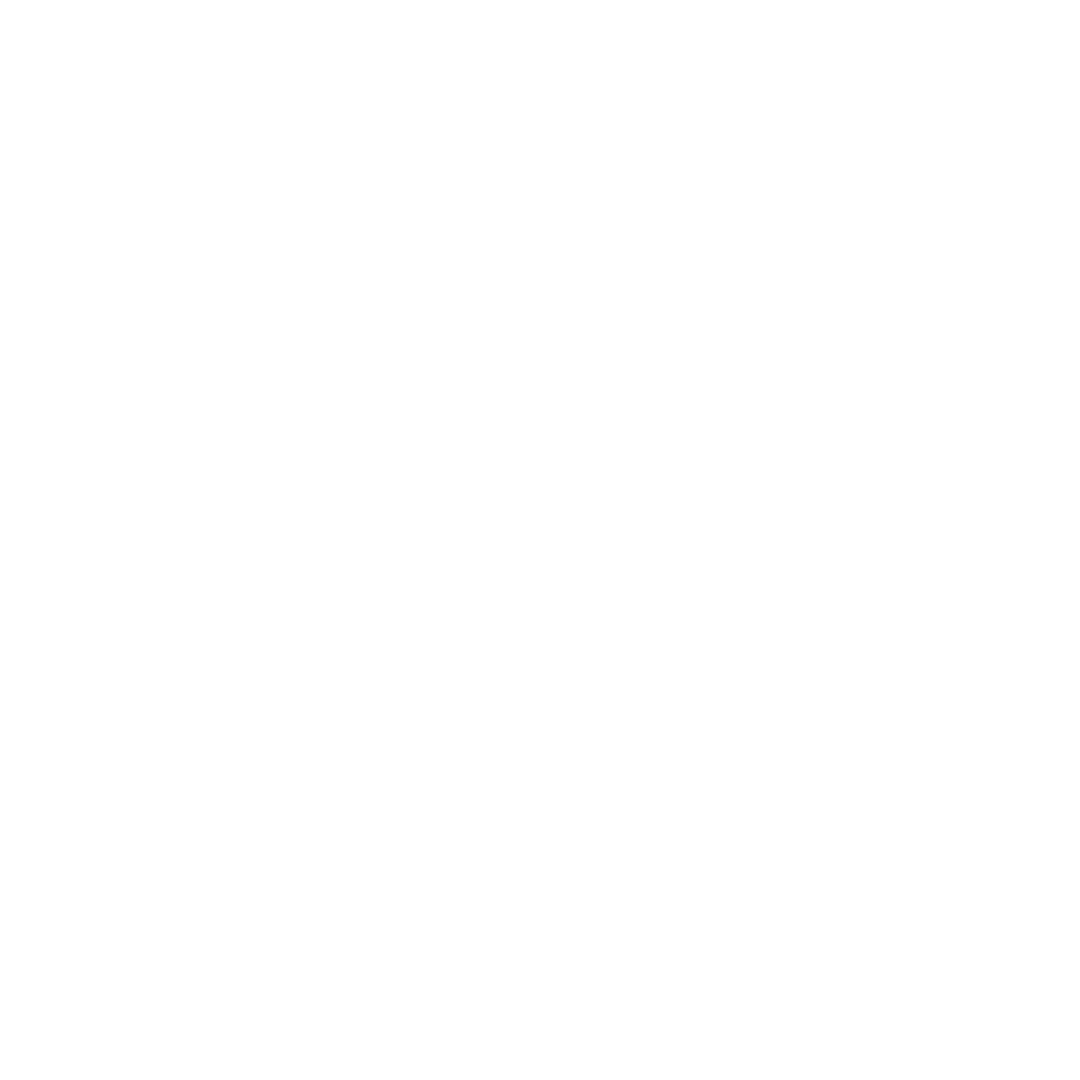

plotting and saving... 


 20%|███████████████                                                            | 20/100 [3:48:05<14:58:01, 673.52s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


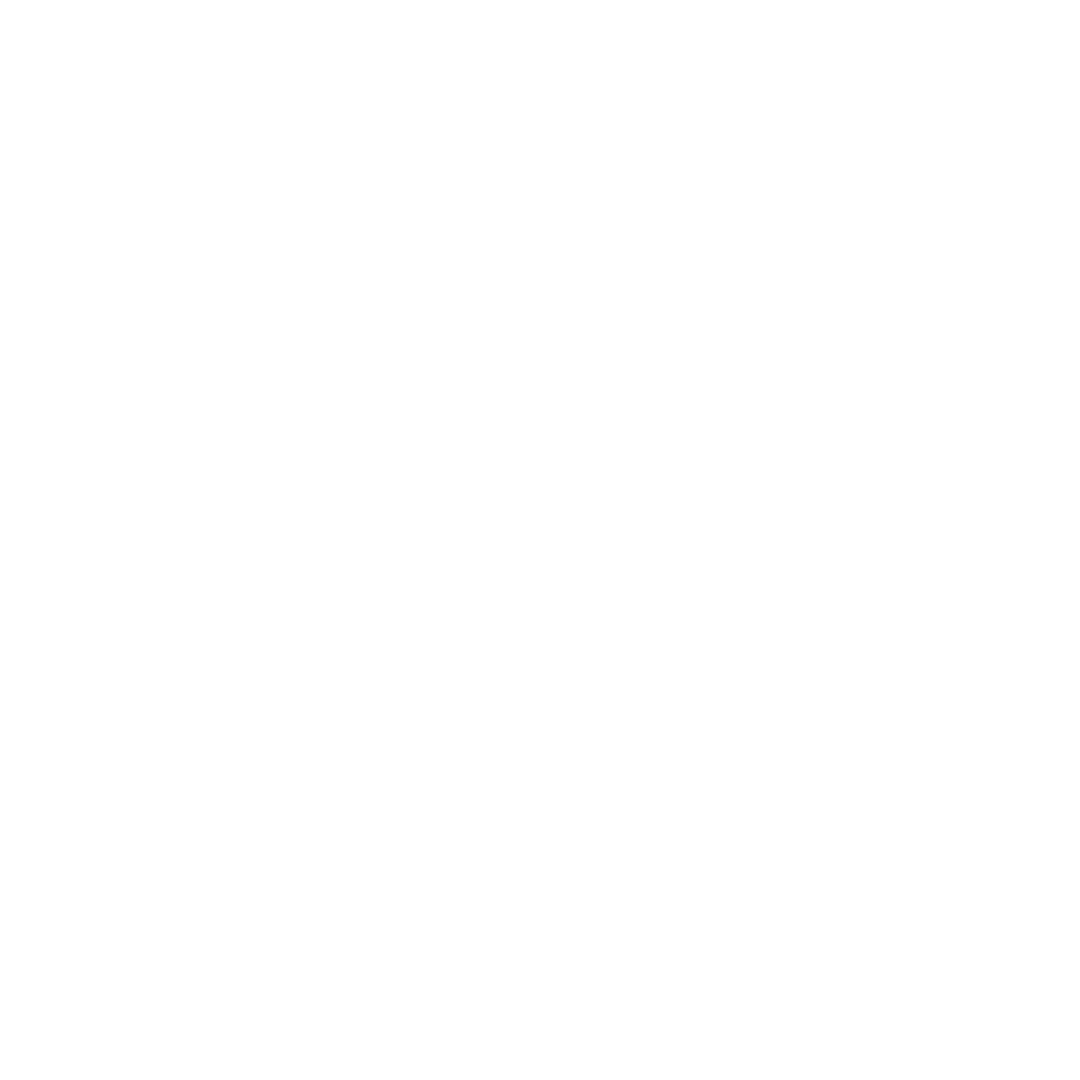

plotting and saving... 


 21%|███████████████▊                                                           | 21/100 [3:59:13<14:44:33, 671.81s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


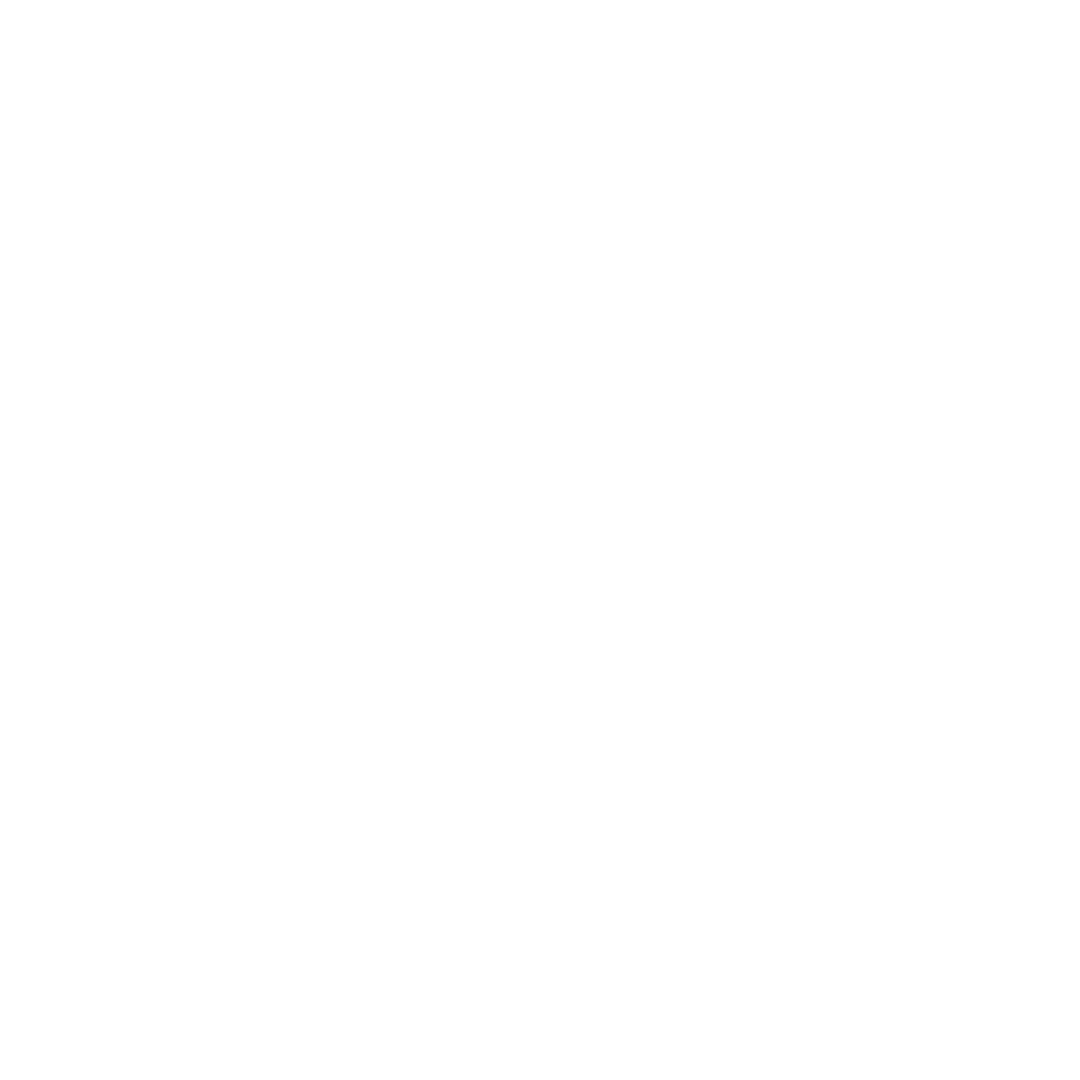

plotting and saving... 


 22%|████████████████▌                                                          | 22/100 [4:10:43<14:40:28, 677.28s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


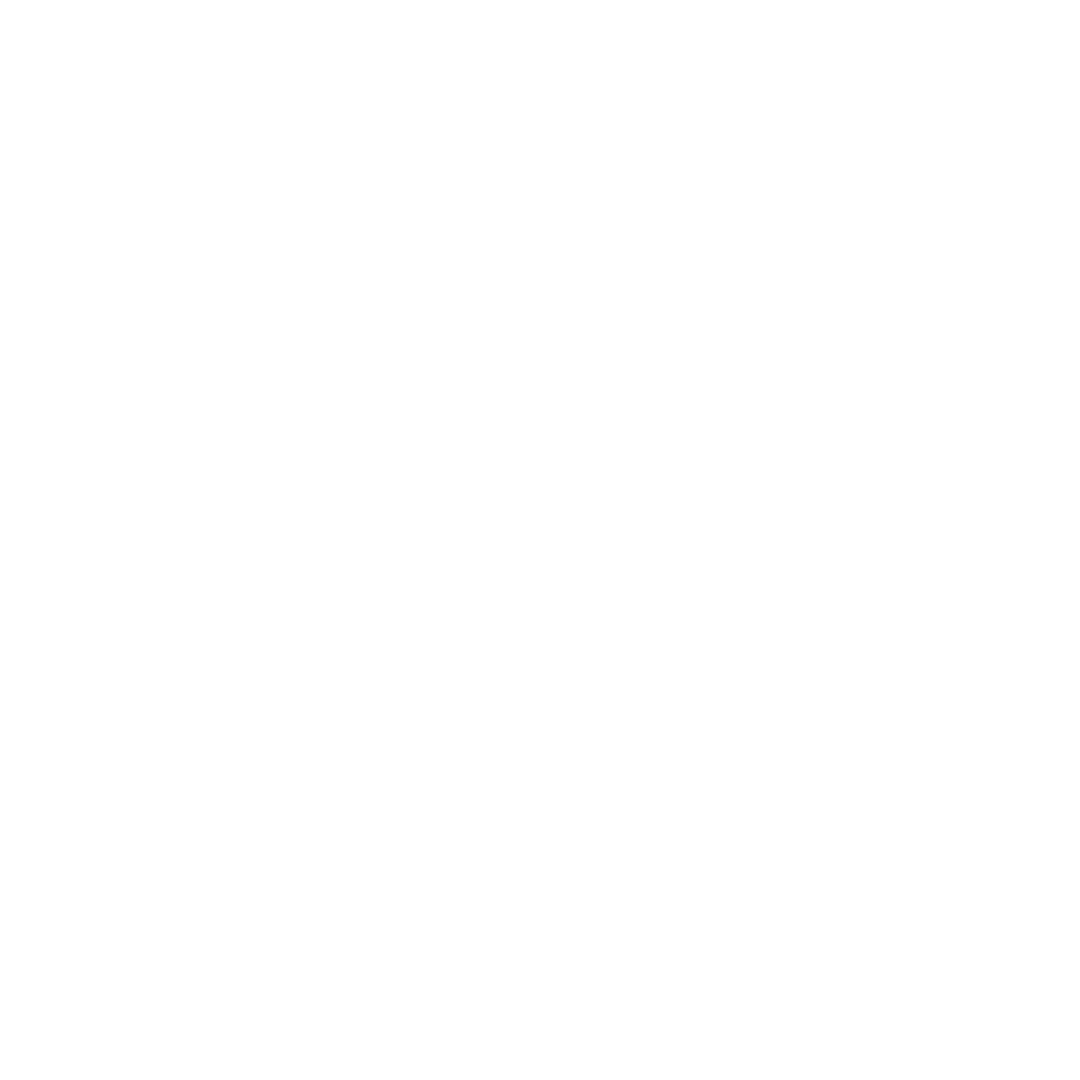

plotting and saving... 


 23%|█████████████████▎                                                         | 23/100 [4:22:11<14:33:28, 680.63s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


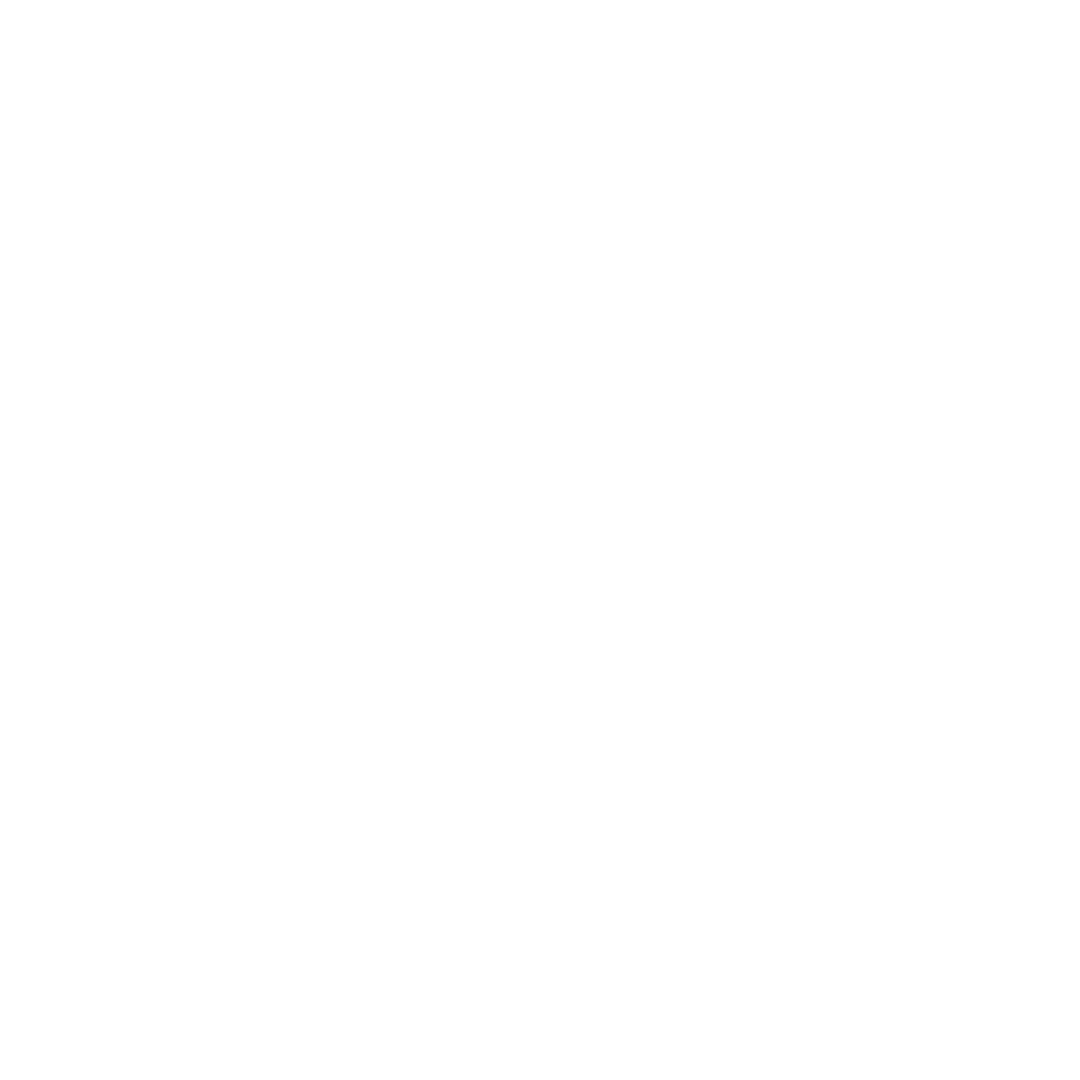

plotting and saving... 


 24%|██████████████████                                                         | 24/100 [4:33:58<14:31:59, 688.41s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


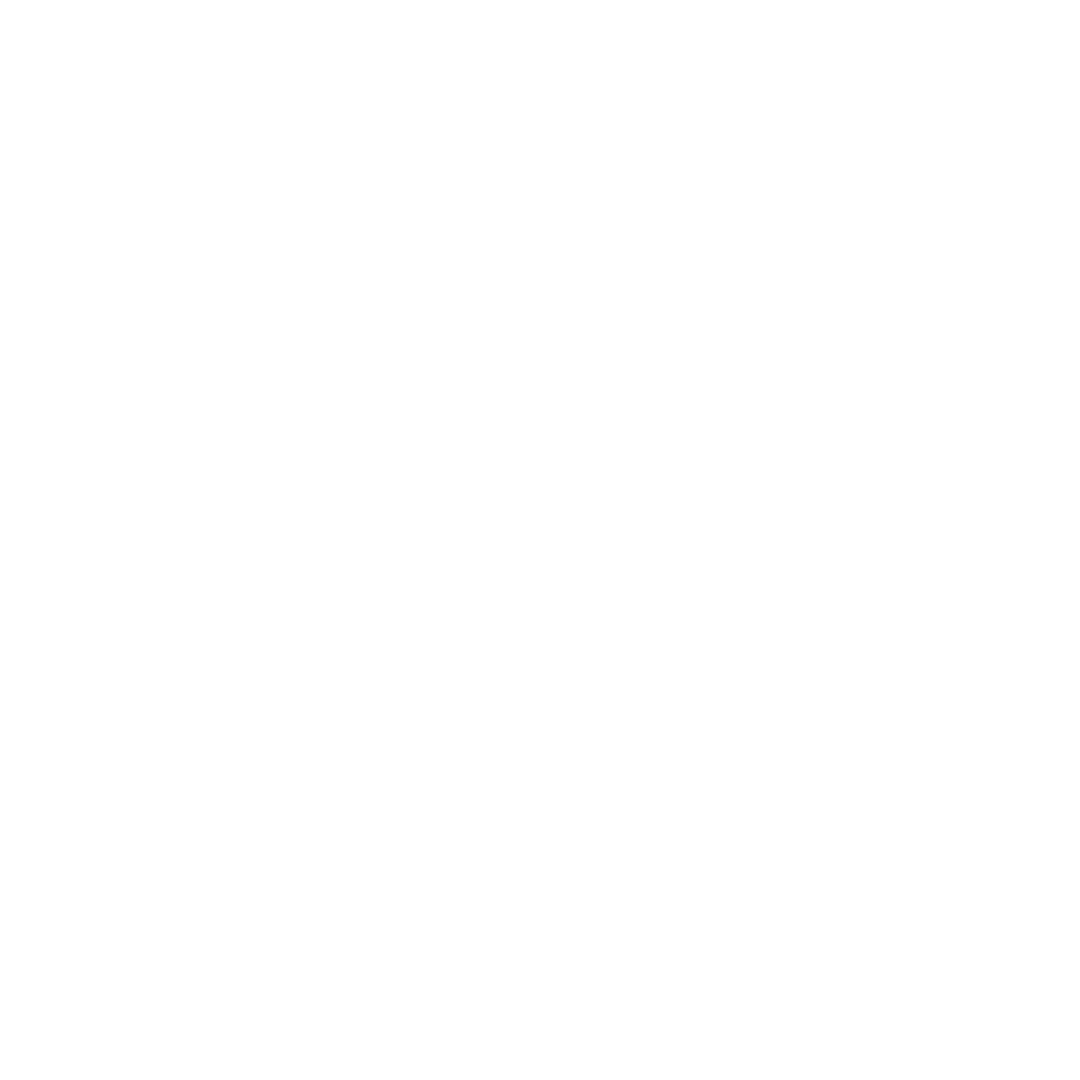

plotting and saving... 


 25%|██████████████████▊                                                        | 25/100 [4:45:27<14:20:49, 688.65s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


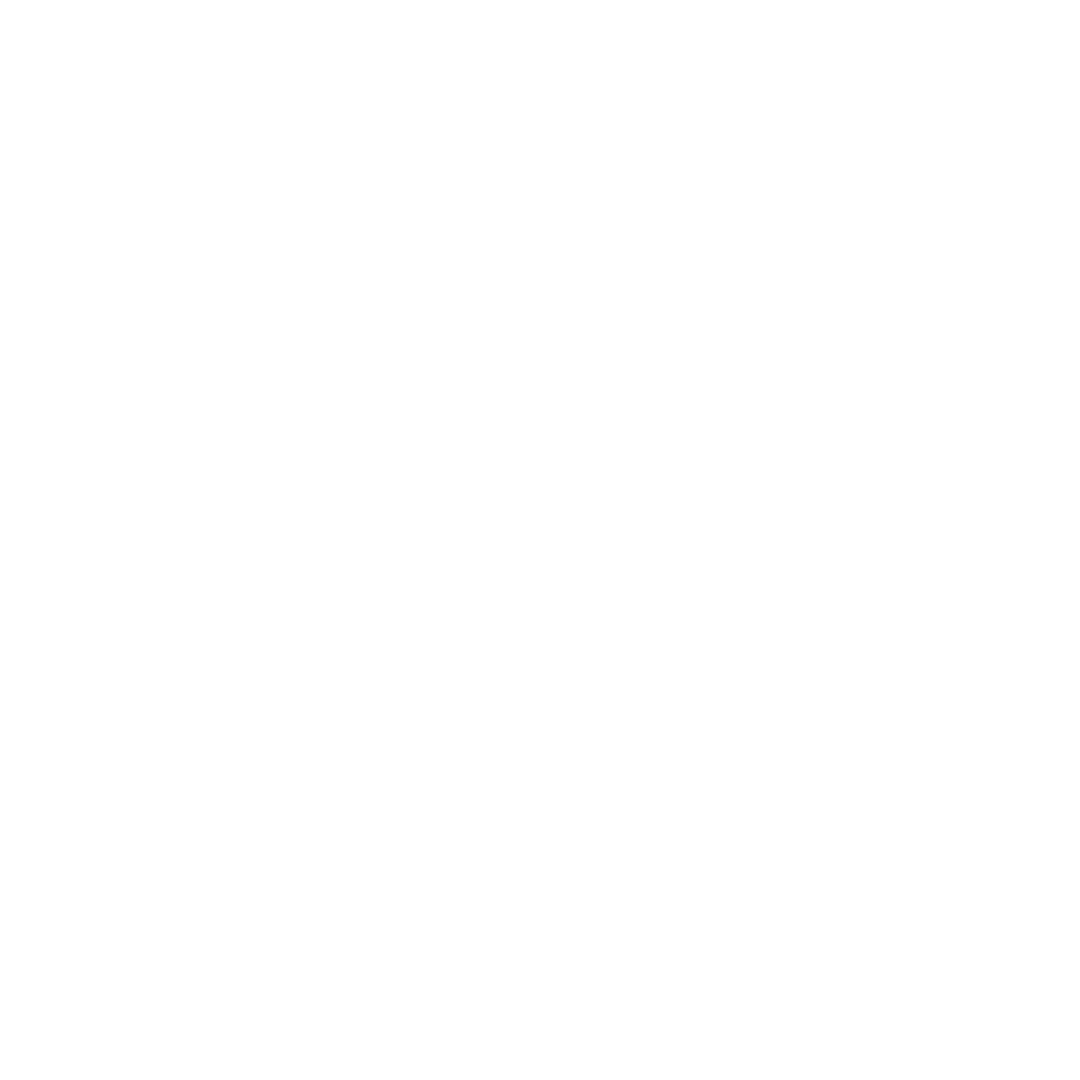

plotting and saving... 


 26%|███████████████████▌                                                       | 26/100 [4:57:14<14:16:08, 694.17s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


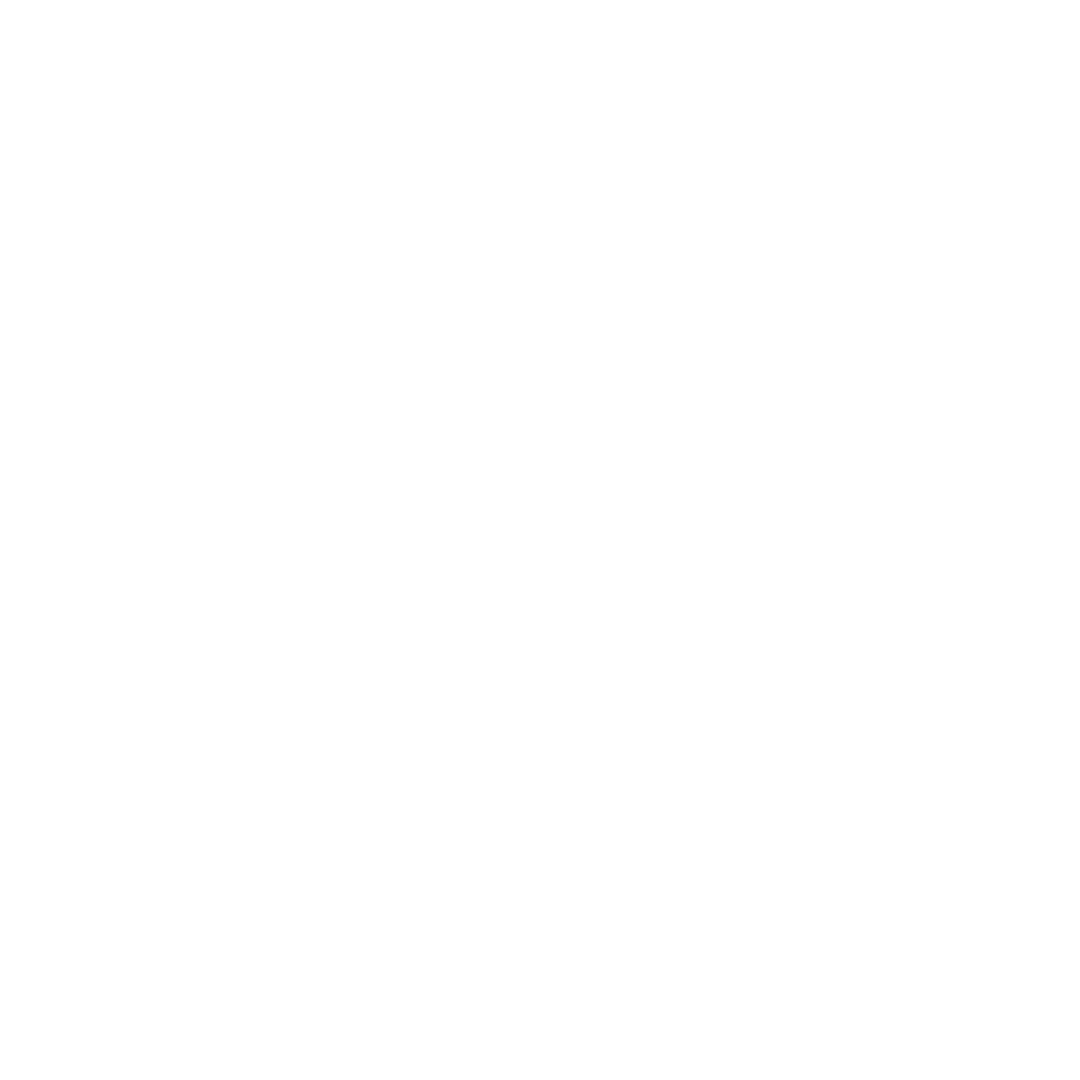

plotting and saving... 


 27%|████████████████████▎                                                      | 27/100 [5:08:03<13:48:07, 680.65s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


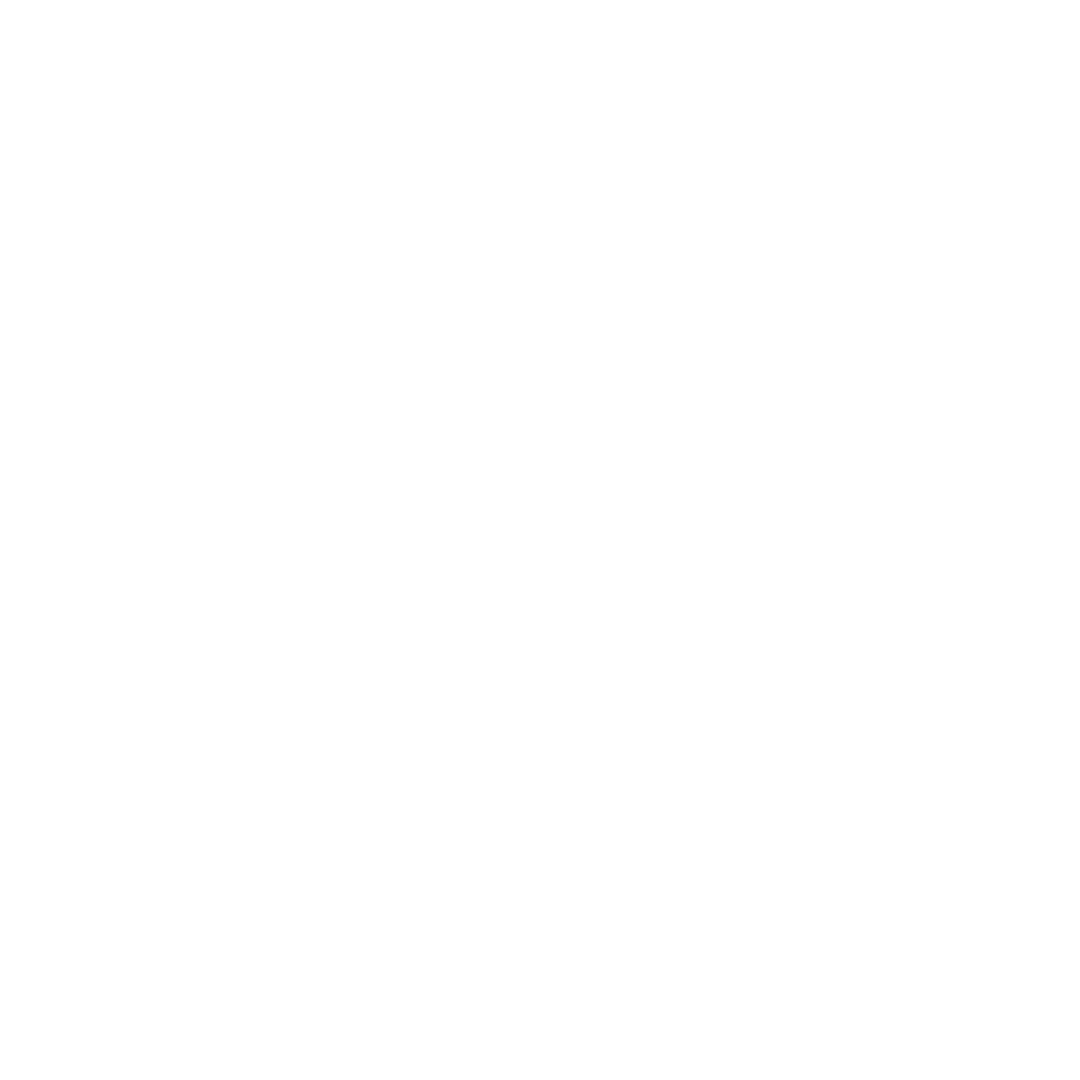

plotting and saving... 


 28%|█████████████████████                                                      | 28/100 [5:19:04<13:29:39, 674.71s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


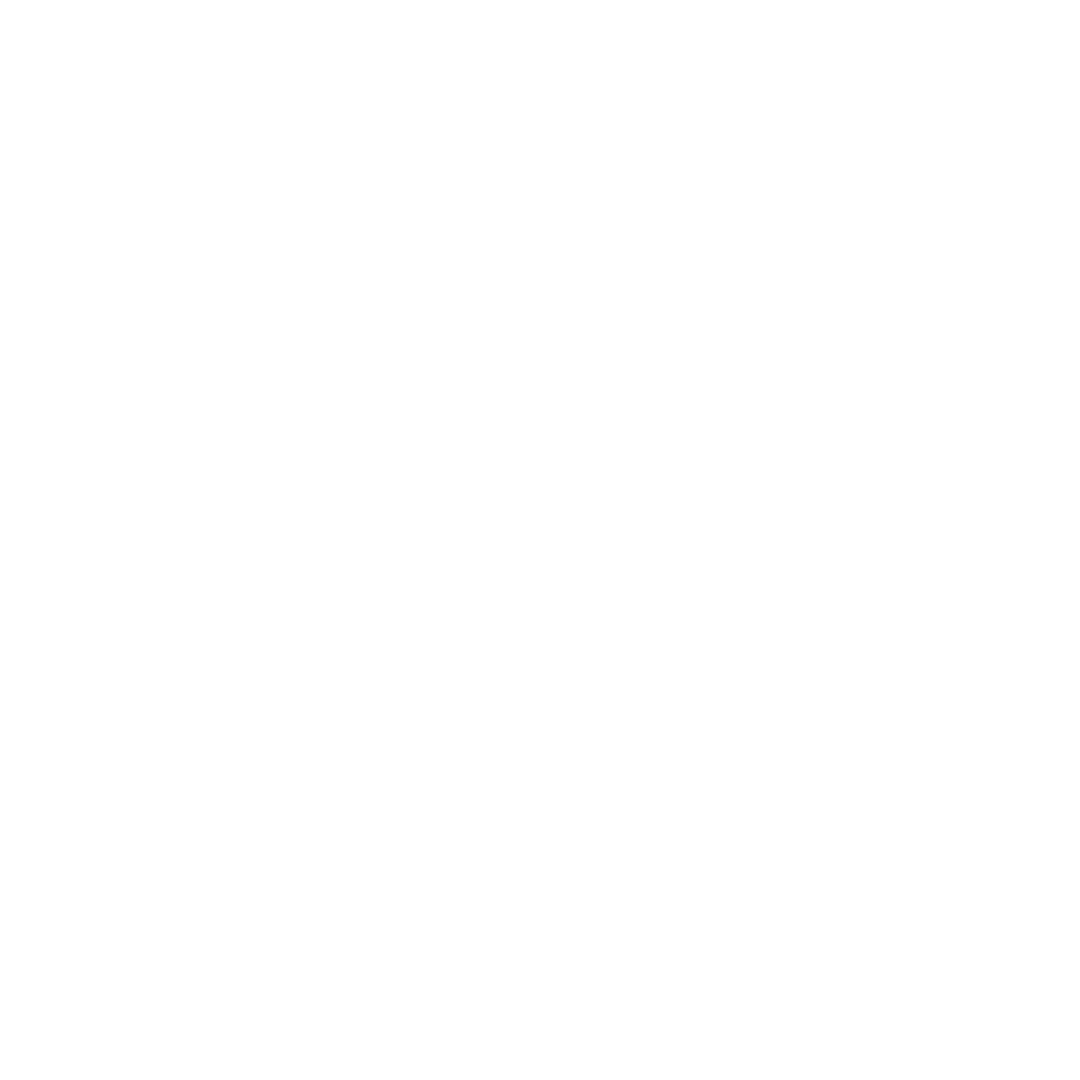

plotting and saving... 


 29%|█████████████████████▊                                                     | 29/100 [5:30:42<13:26:50, 681.84s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


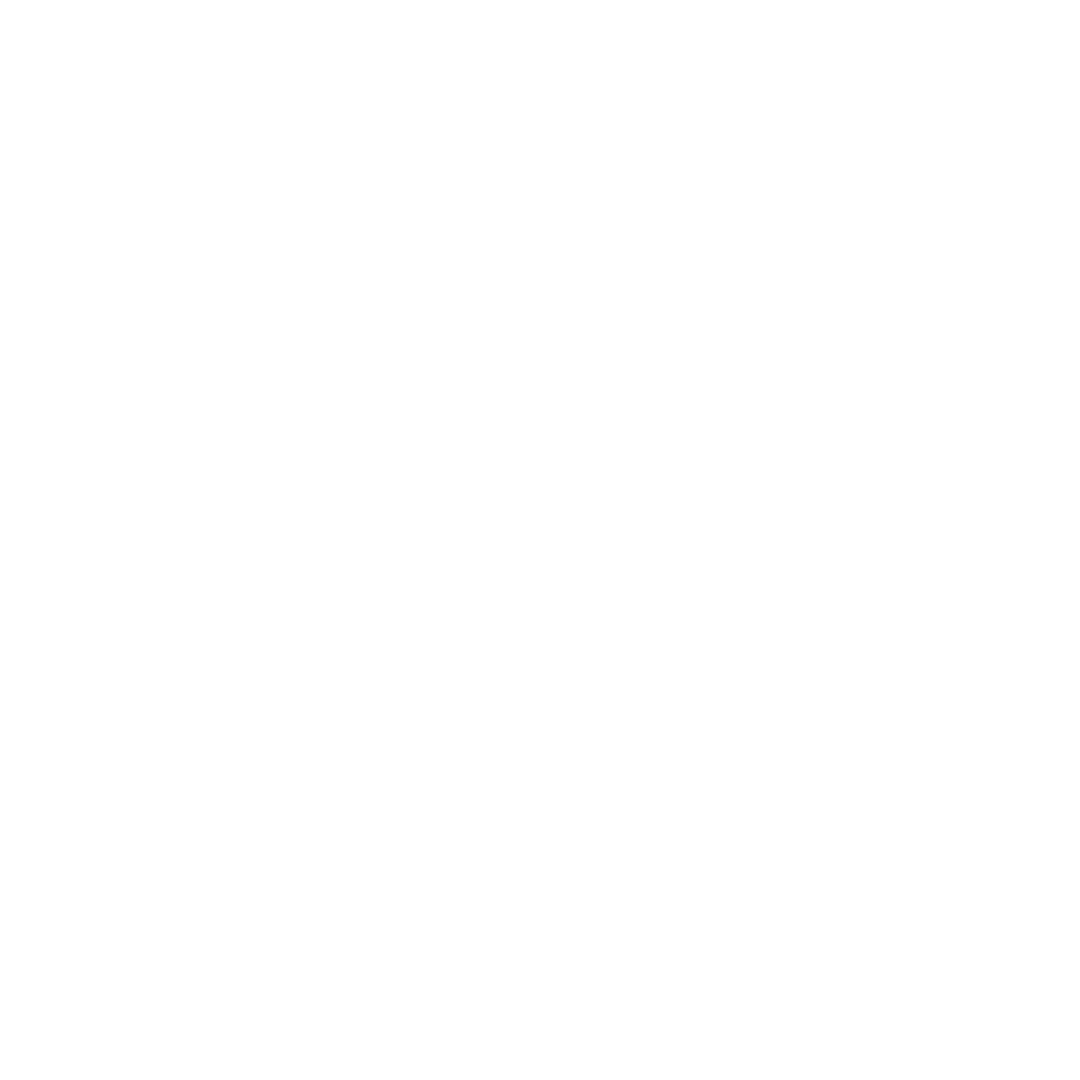

plotting and saving... 


 30%|██████████████████████▌                                                    | 30/100 [5:42:27<13:23:24, 688.64s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


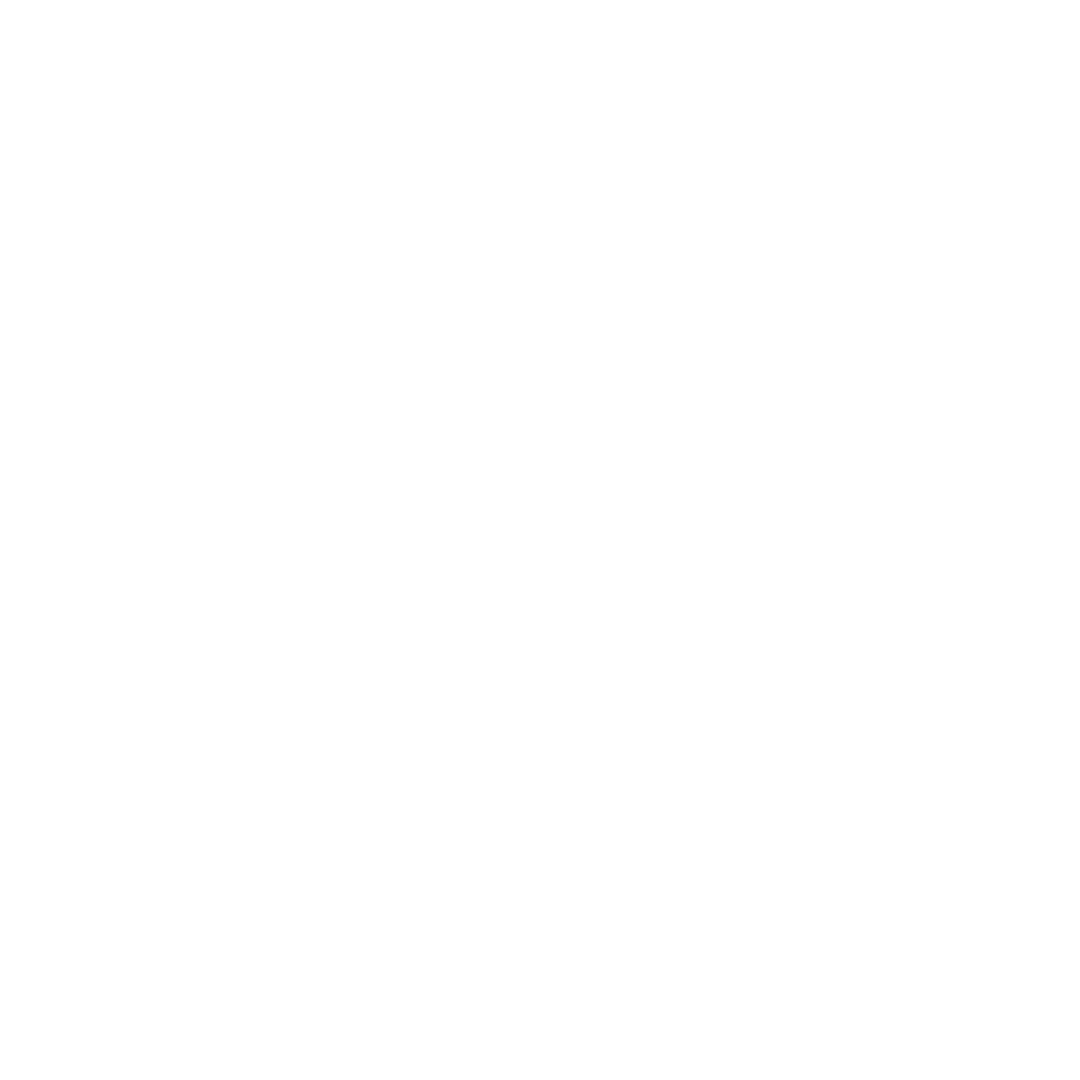

plotting and saving... 


 31%|███████████████████████▎                                                   | 31/100 [5:53:42<13:07:13, 684.54s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


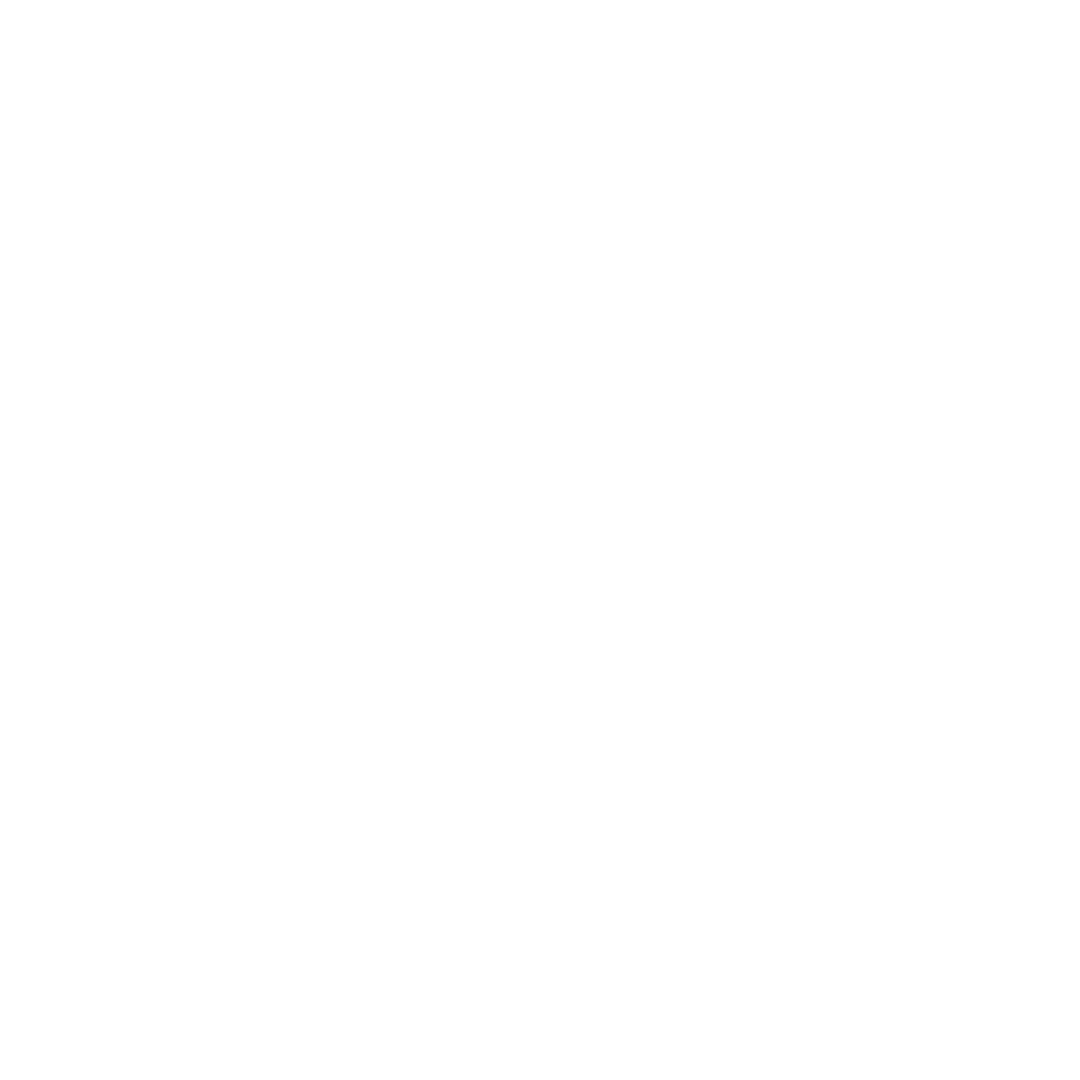

plotting and saving... 


 32%|████████████████████████                                                   | 32/100 [6:05:43<13:08:17, 695.55s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


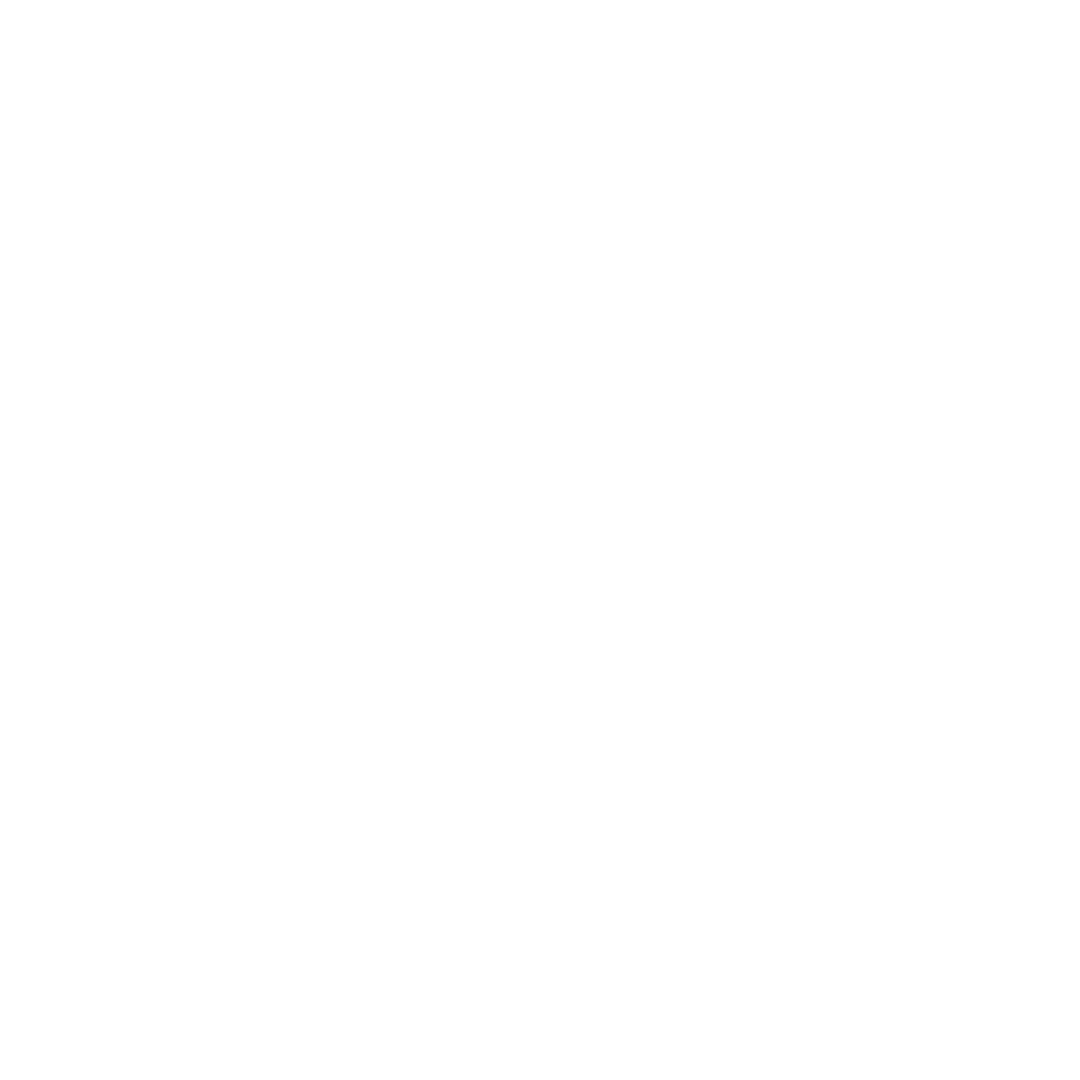

plotting and saving... 


 33%|████████████████████████▊                                                  | 33/100 [6:17:21<12:57:25, 696.20s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


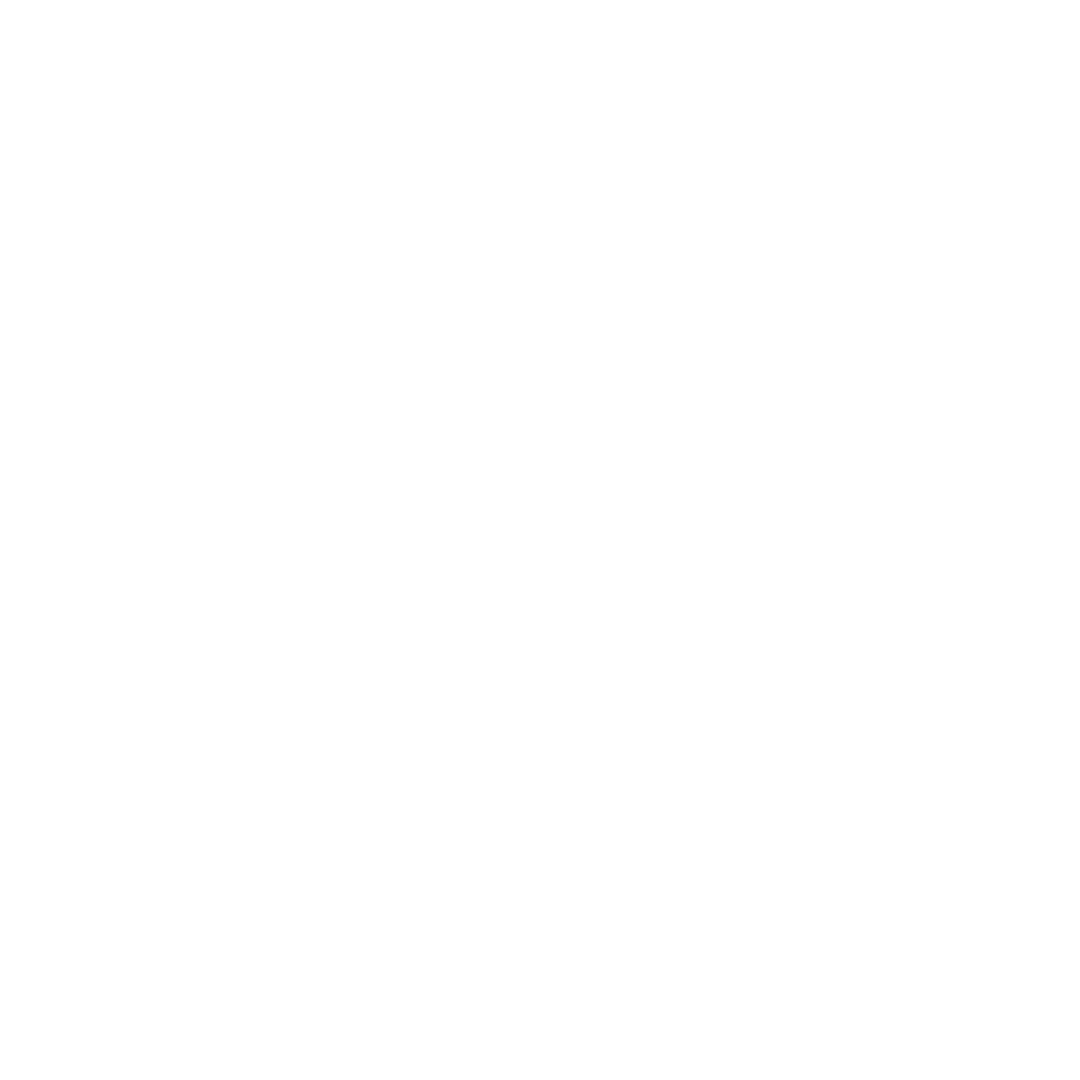

plotting and saving... 


 34%|█████████████████████████▌                                                 | 34/100 [6:28:44<12:41:39, 692.42s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


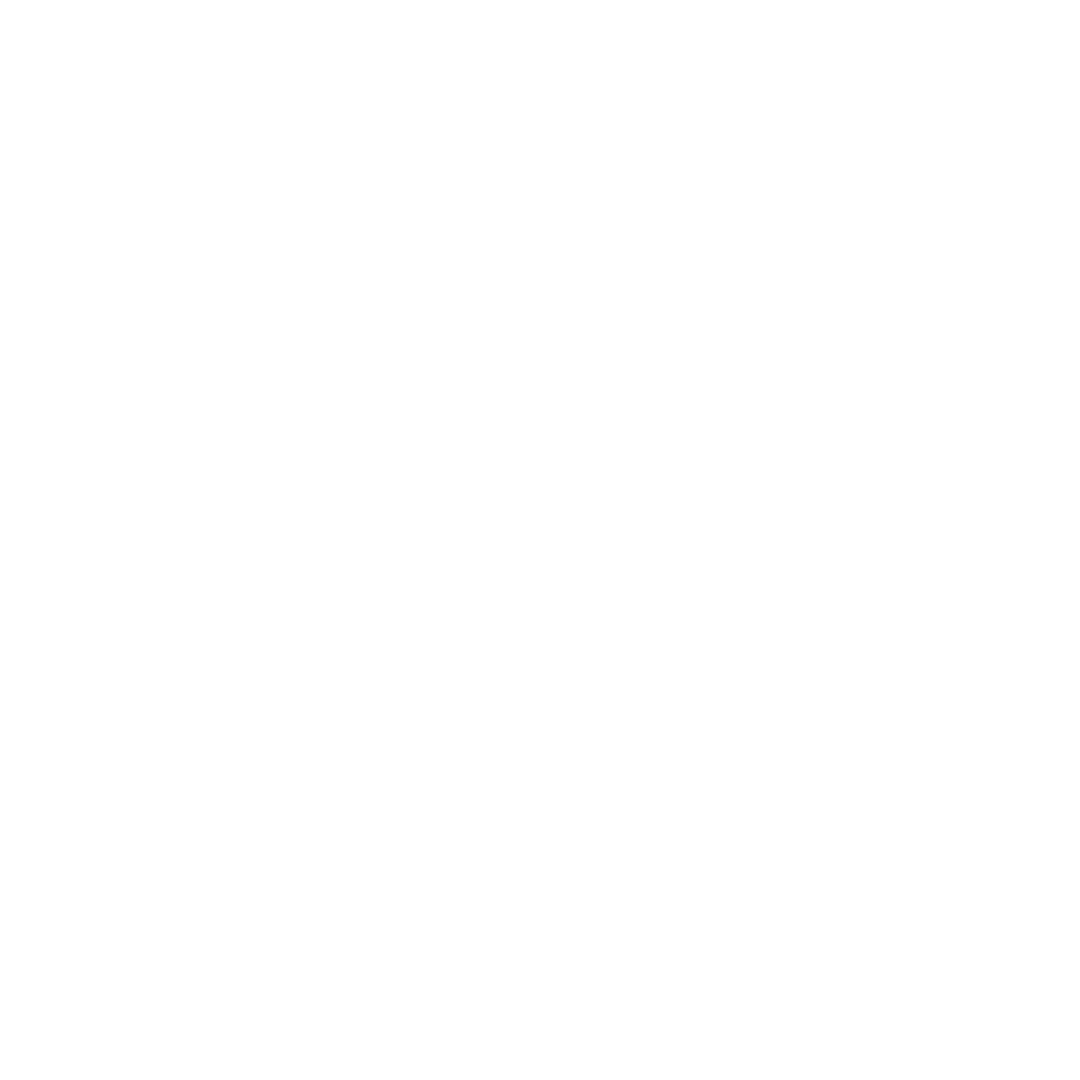

plotting and saving... 


 35%|██████████████████████████▎                                                | 35/100 [6:40:29<12:33:54, 695.92s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


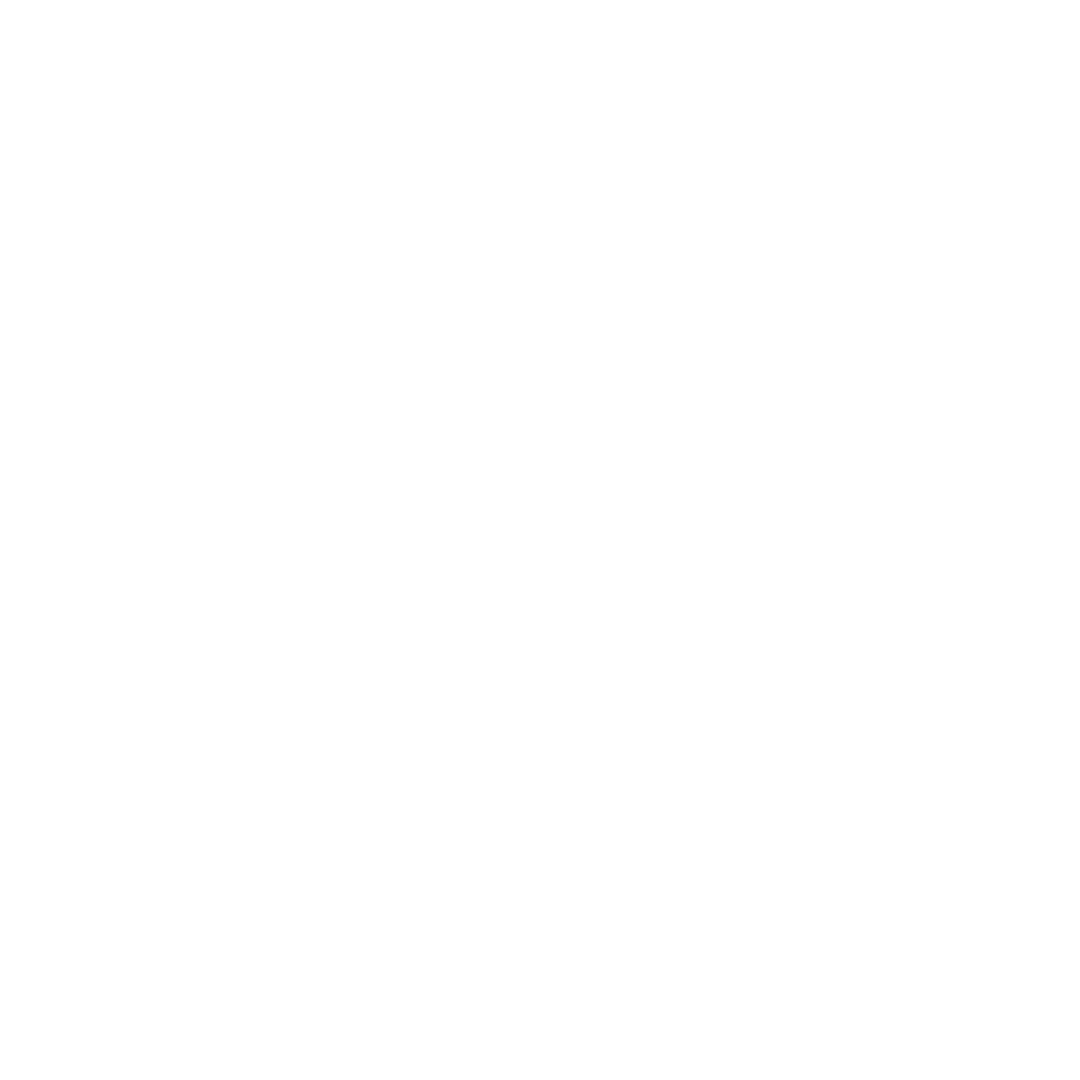

plotting and saving... 


 36%|███████████████████████████                                                | 36/100 [6:51:56<12:19:39, 693.43s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


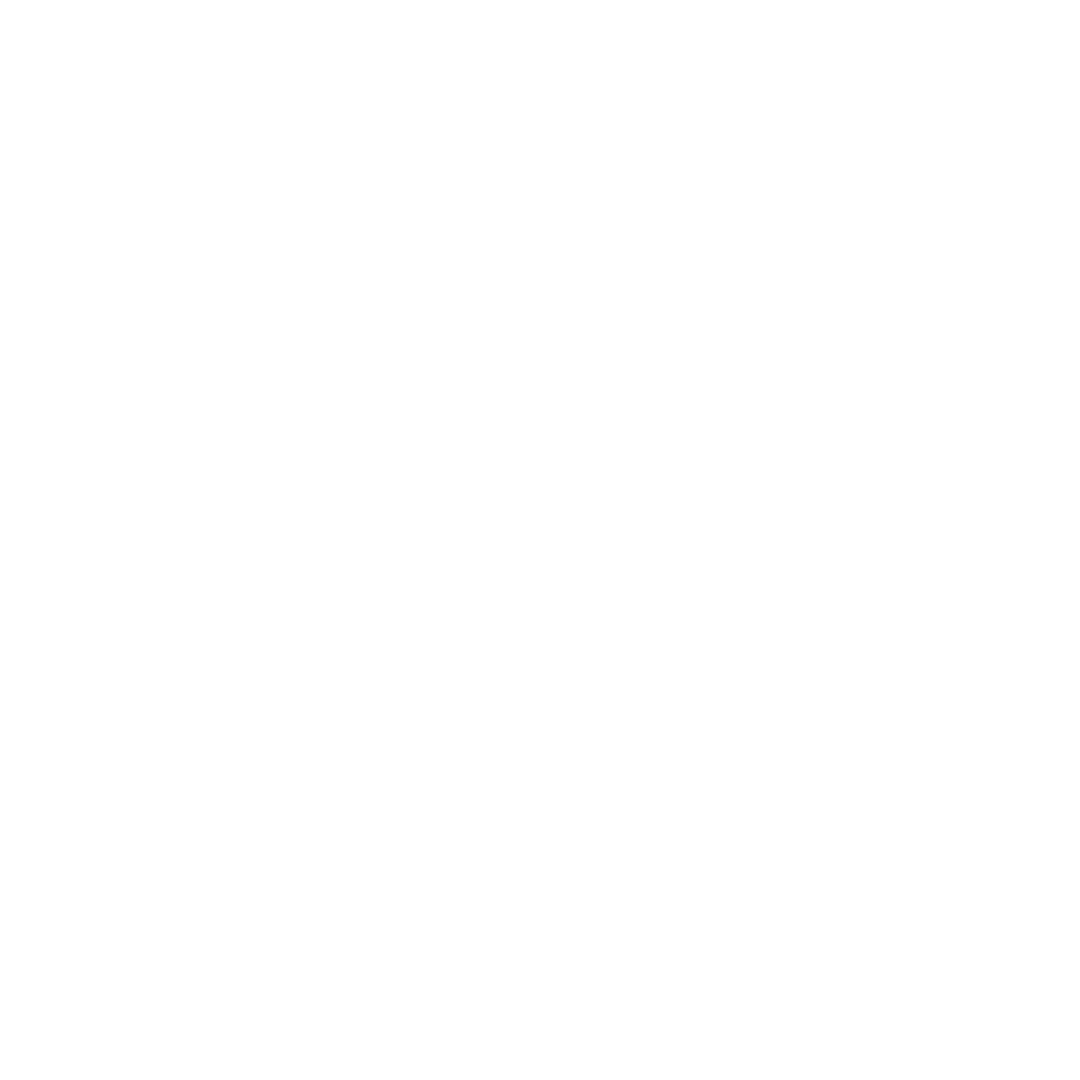

plotting and saving... 


 37%|███████████████████████████▊                                               | 37/100 [7:03:00<11:58:38, 684.43s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


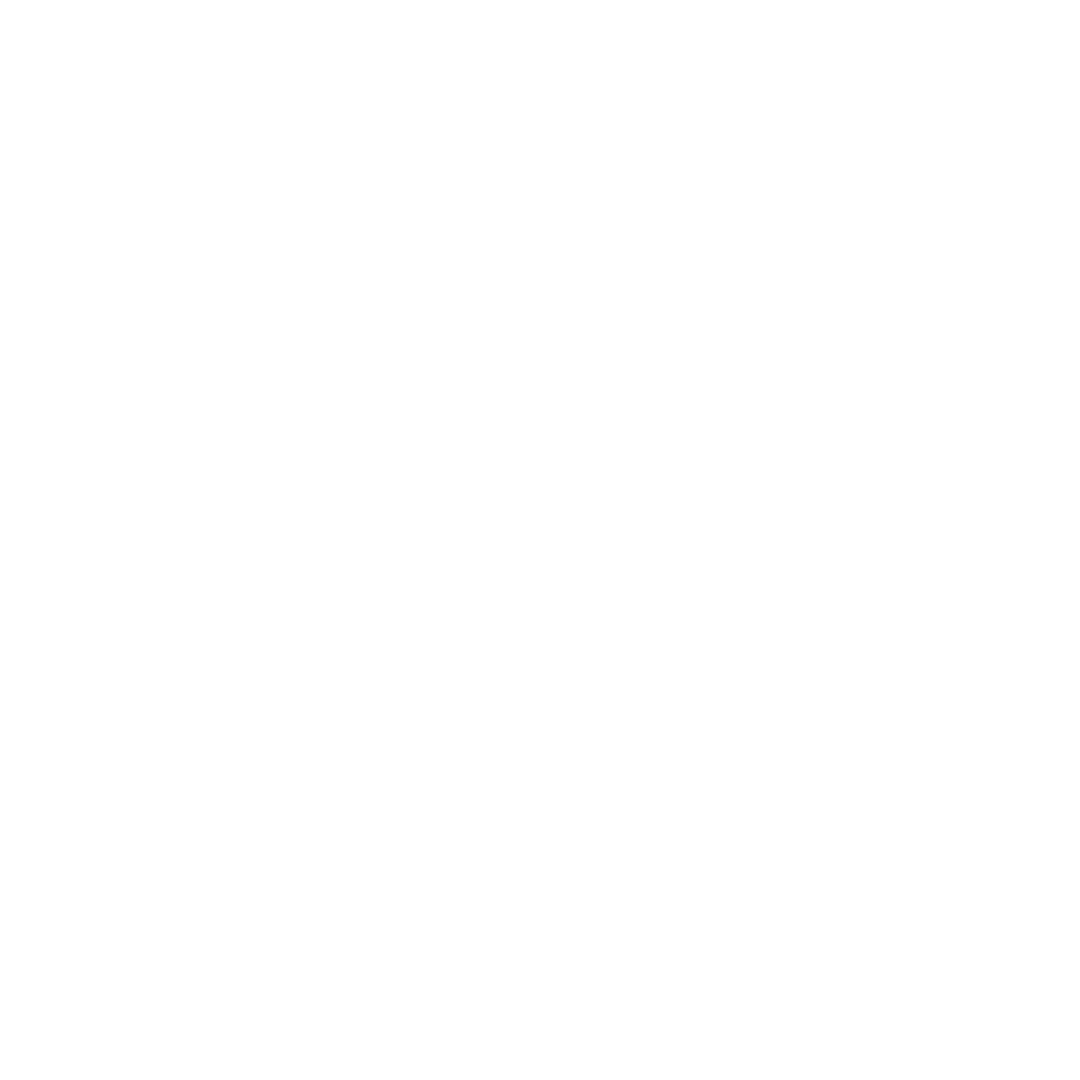

plotting and saving... 


 38%|████████████████████████████▌                                              | 38/100 [7:13:52<11:37:18, 674.82s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


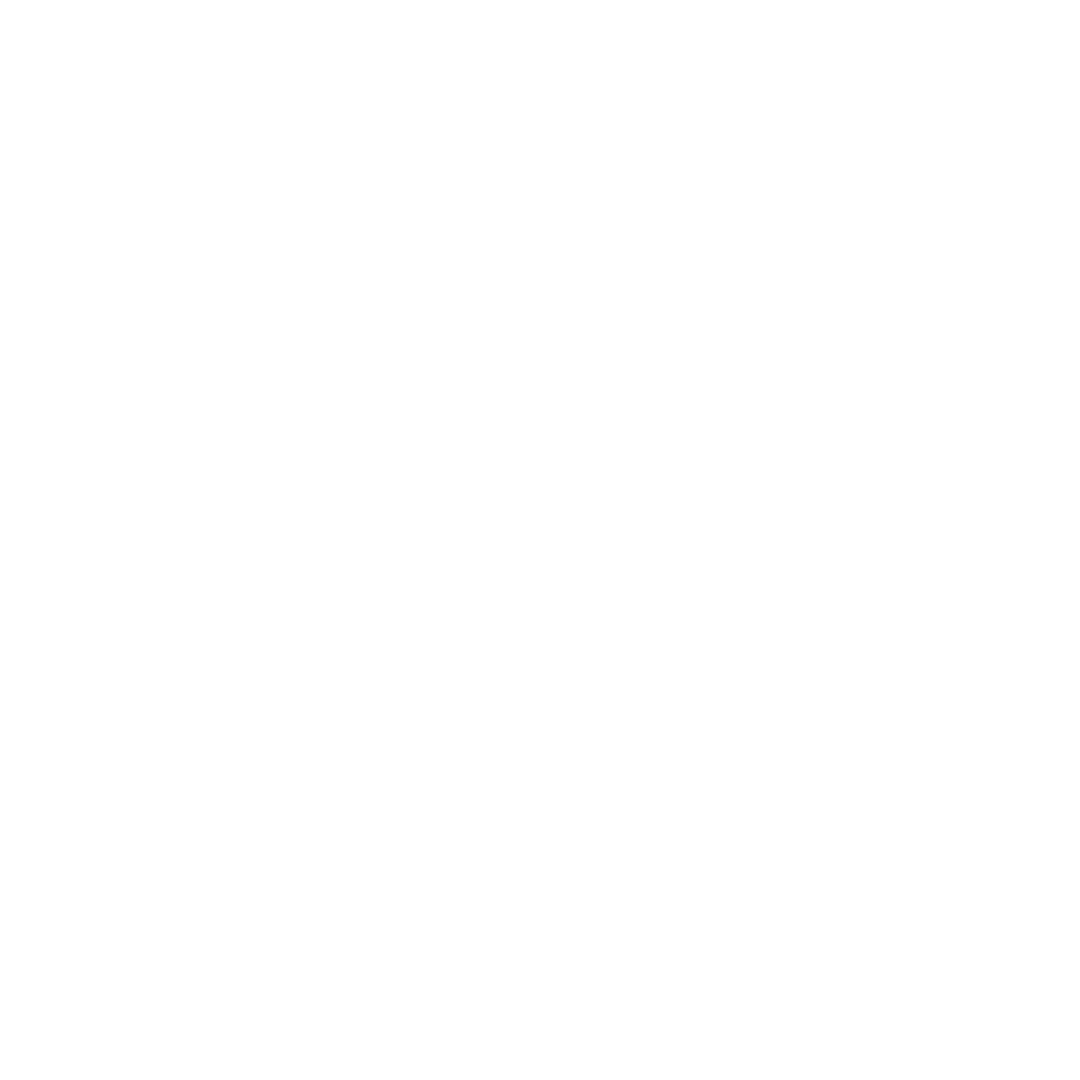

plotting and saving... 


 39%|█████████████████████████████▎                                             | 39/100 [7:25:10<11:27:04, 675.81s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


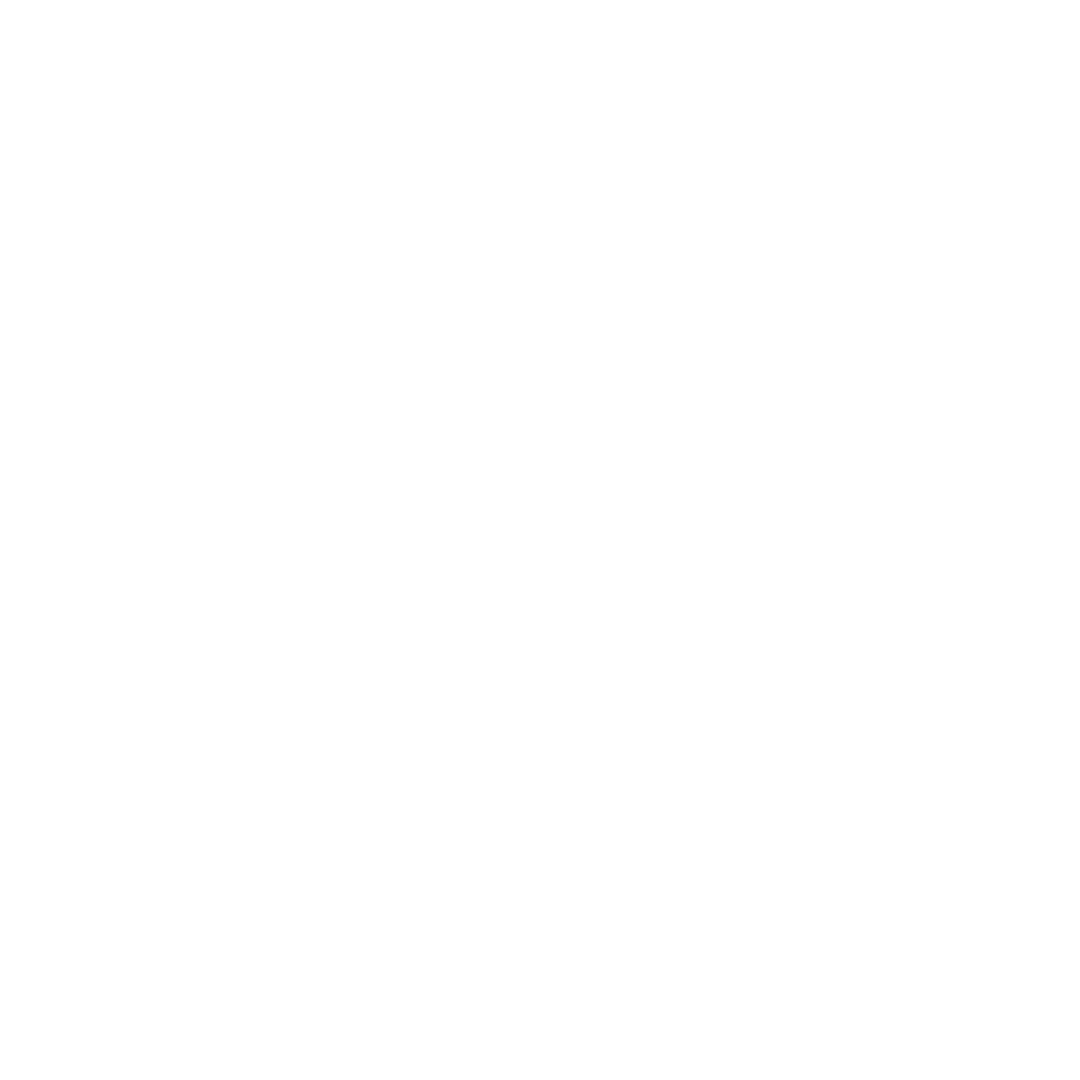

plotting and saving... 


 40%|██████████████████████████████                                             | 40/100 [7:36:50<11:22:57, 682.96s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


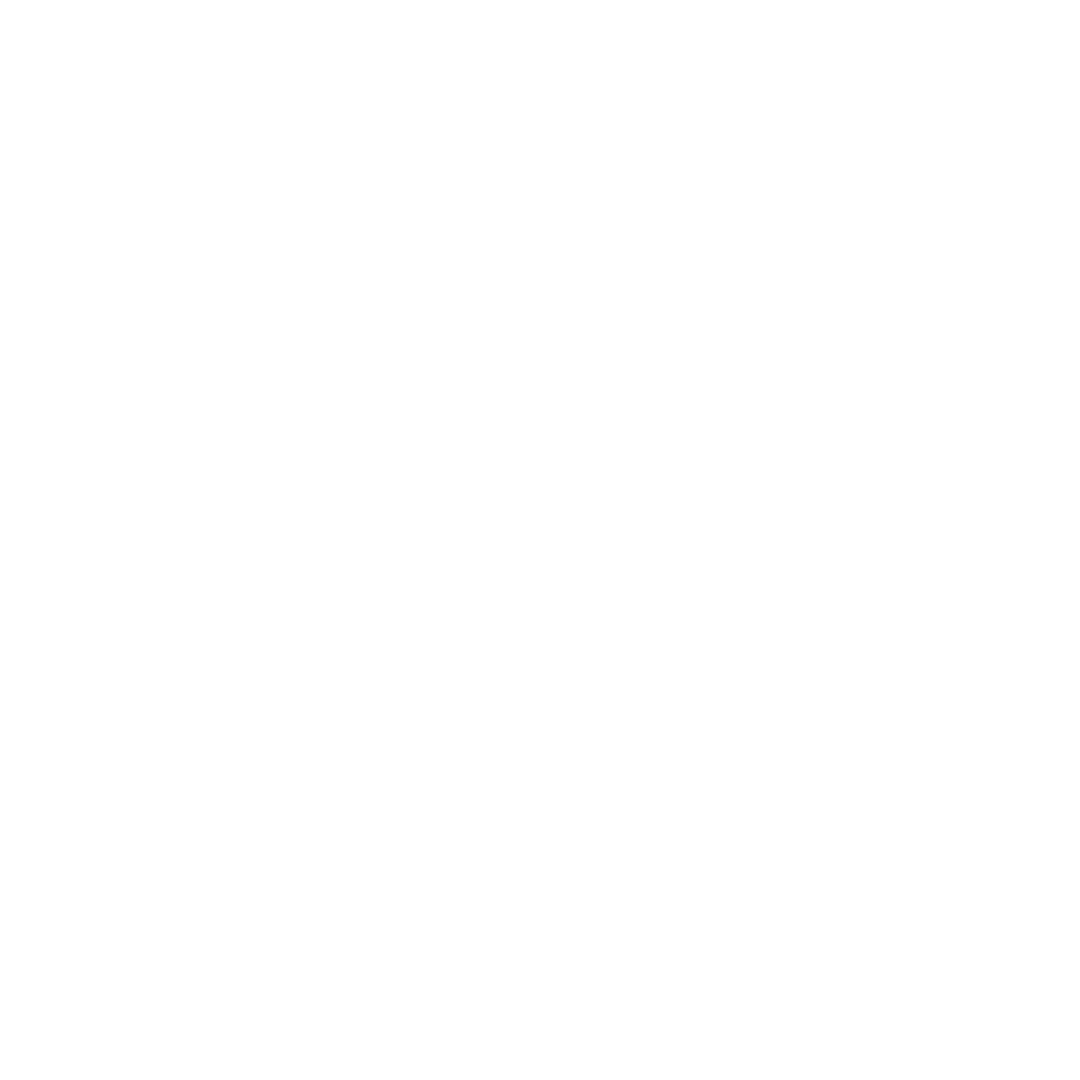

plotting and saving... 


 41%|██████████████████████████████▋                                            | 41/100 [7:48:09<11:10:34, 681.94s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


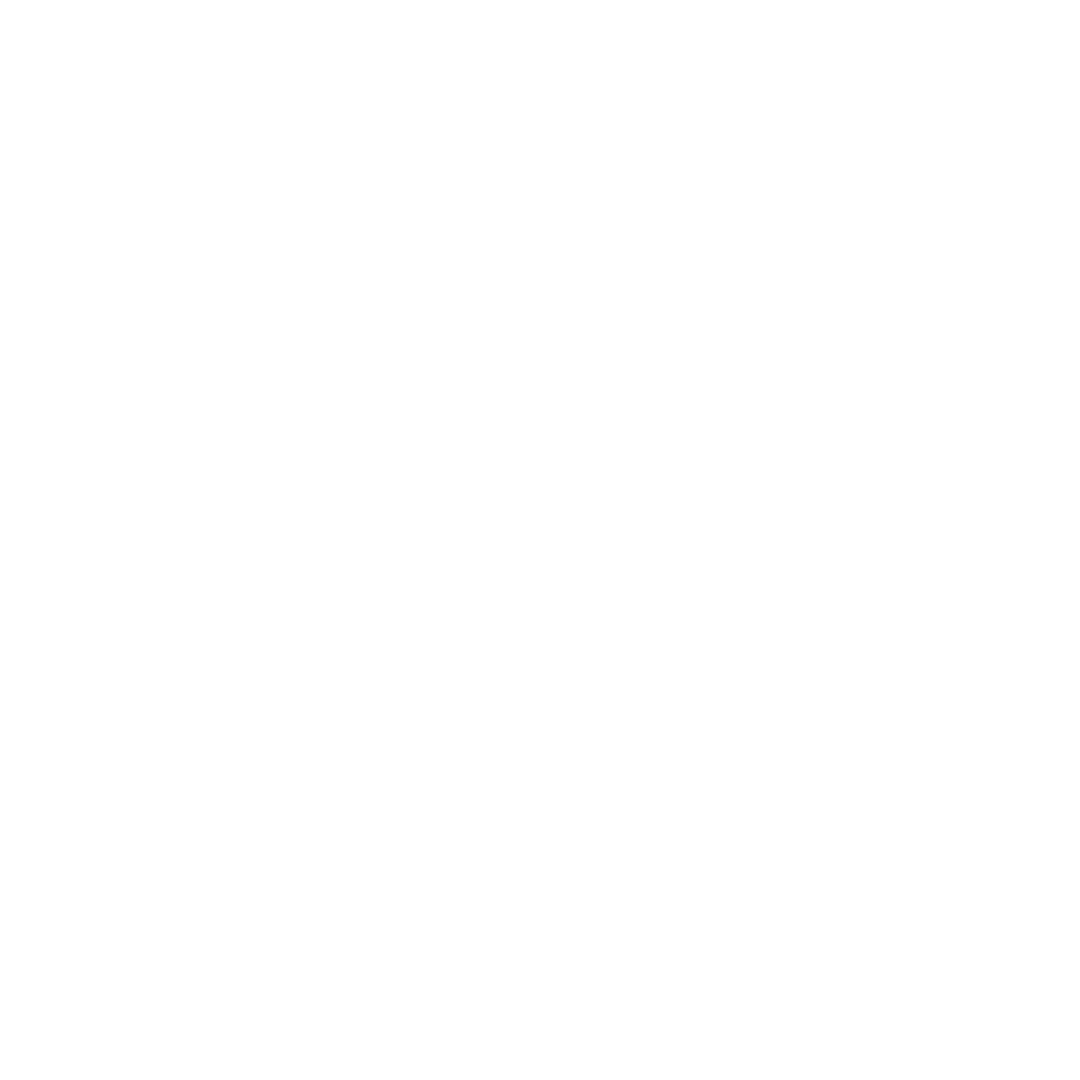

plotting and saving... 


 42%|███████████████████████████████▌                                           | 42/100 [7:58:45<10:45:49, 668.10s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


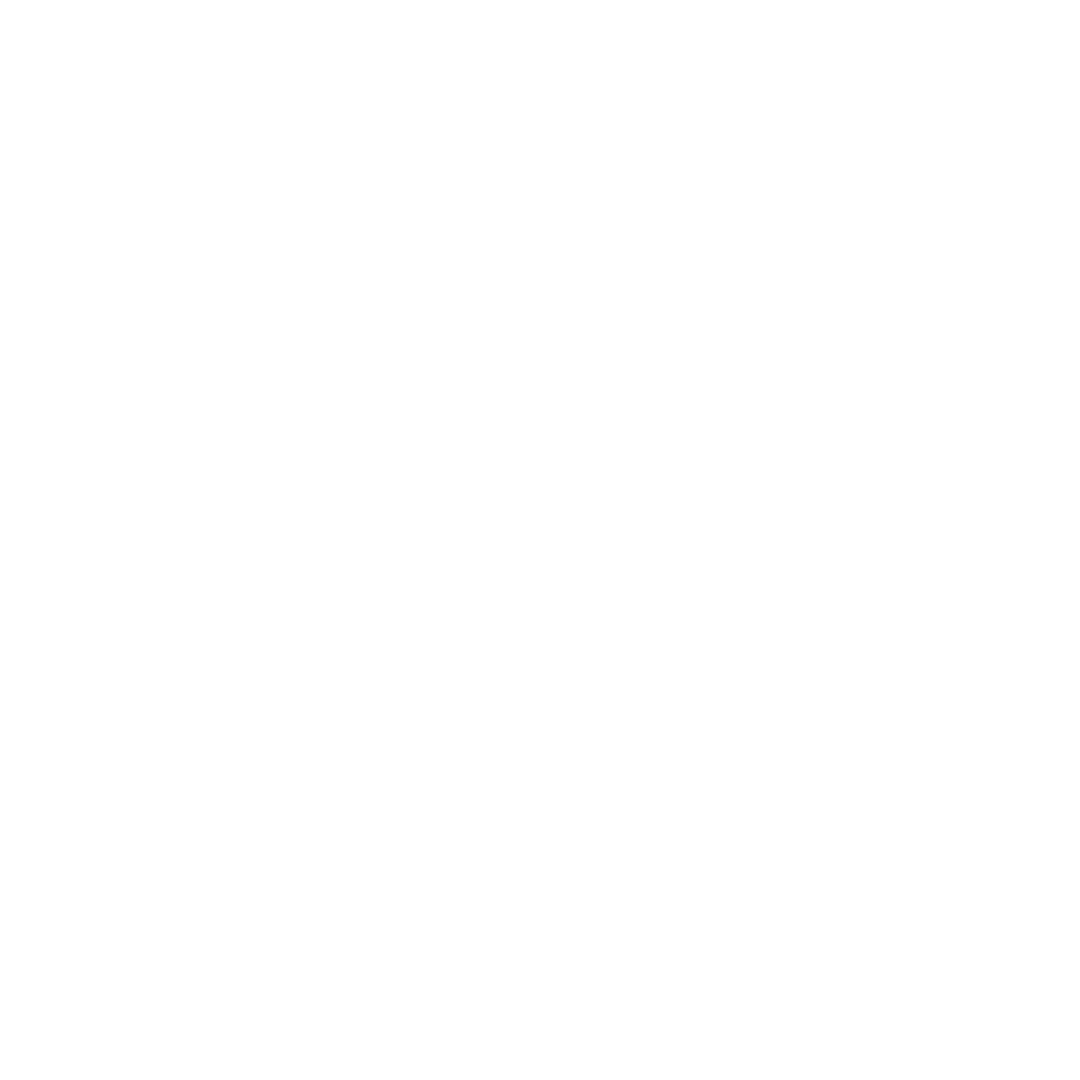

plotting and saving... 


 43%|████████████████████████████████▎                                          | 43/100 [8:09:29<10:27:55, 660.97s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


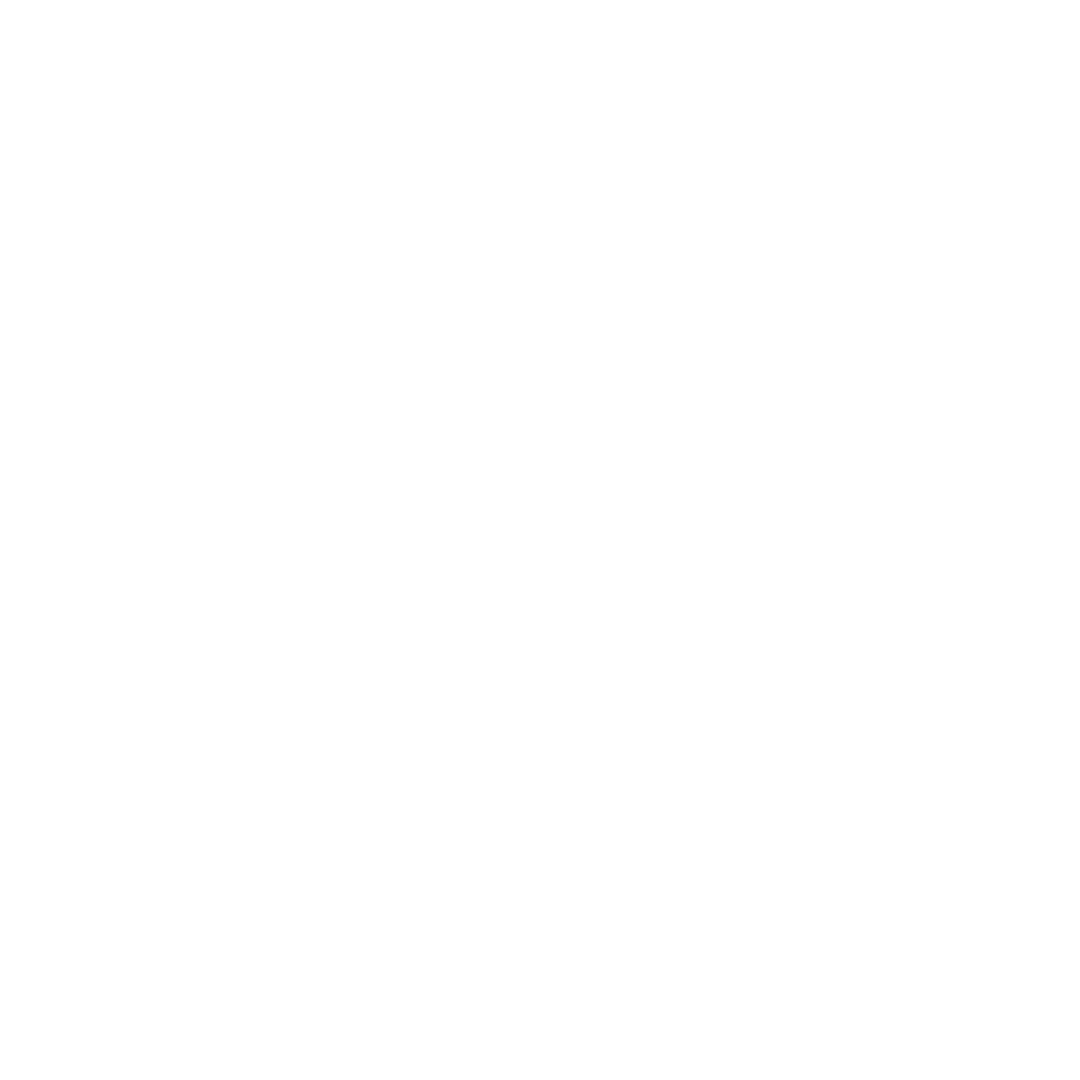

plotting and saving... 


 44%|█████████████████████████████████                                          | 44/100 [8:20:47<10:21:30, 665.90s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


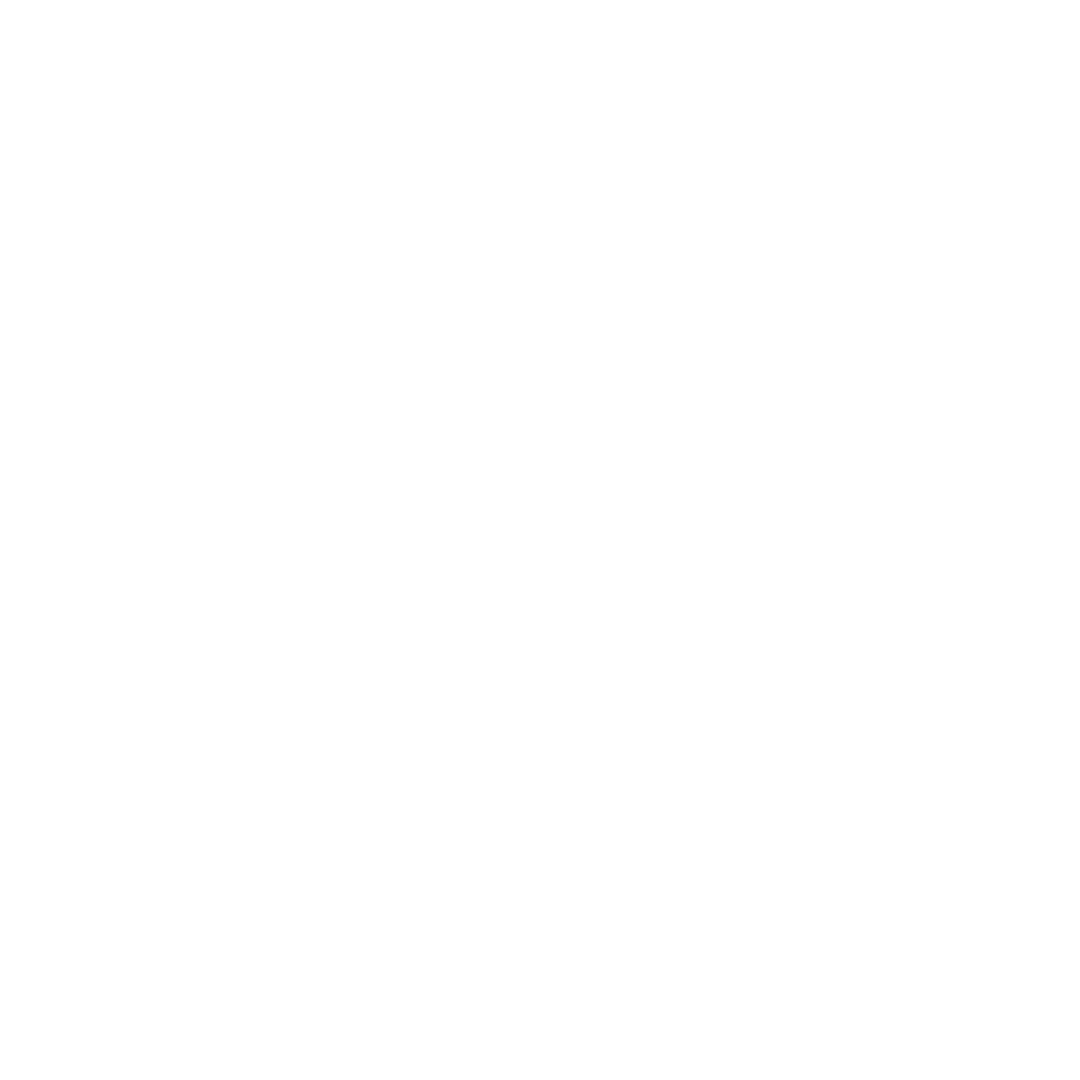

plotting and saving... 


 45%|█████████████████████████████████▊                                         | 45/100 [8:32:14<10:16:23, 672.42s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


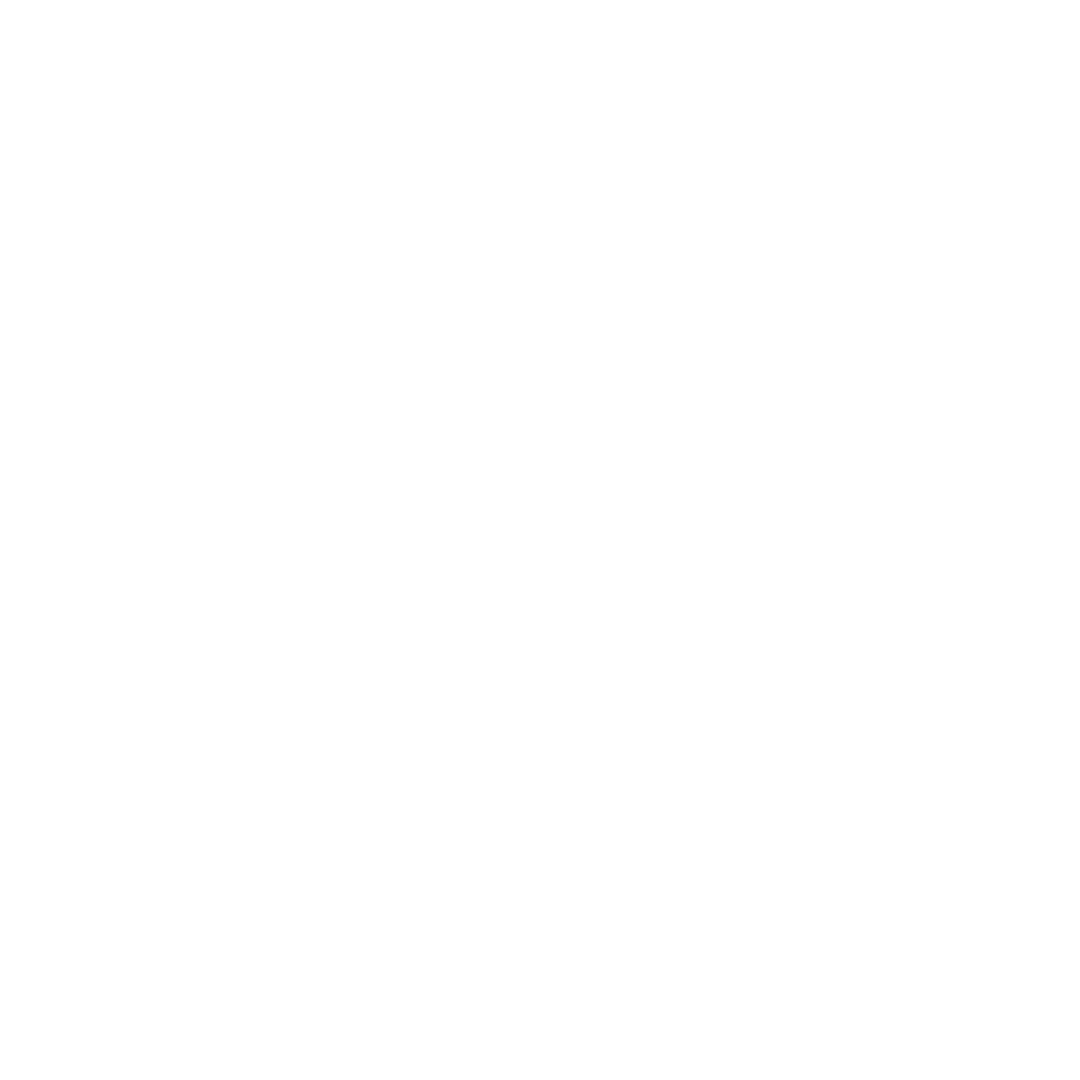

plotting and saving... 


 46%|██████████████████████████████████▌                                        | 46/100 [8:43:29<10:05:40, 672.98s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


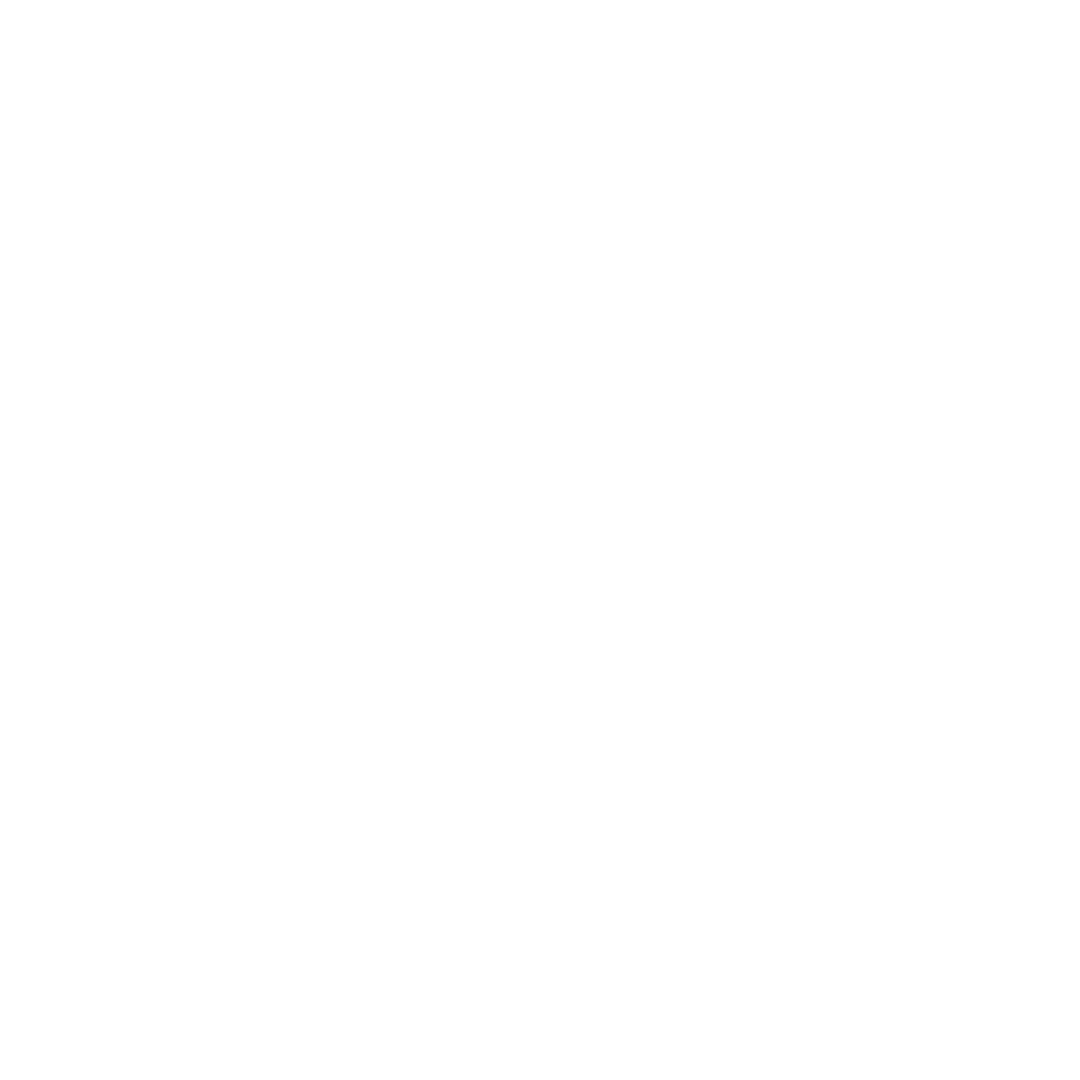

plotting and saving... 


 47%|███████████████████████████████████▋                                        | 47/100 [8:54:50<9:56:31, 675.31s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


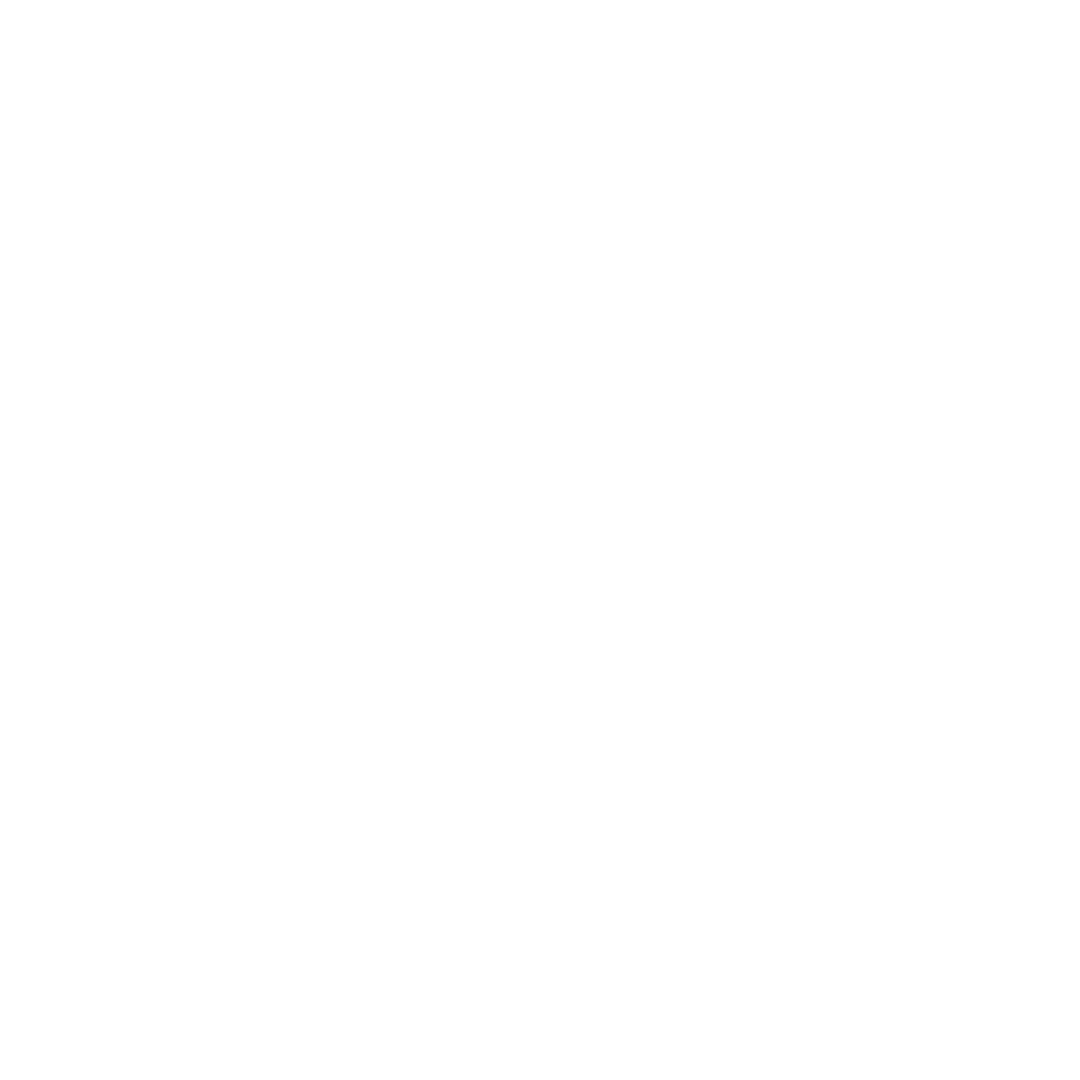

plotting and saving... 


 48%|████████████████████████████████████▍                                       | 48/100 [9:05:43<9:39:34, 668.75s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


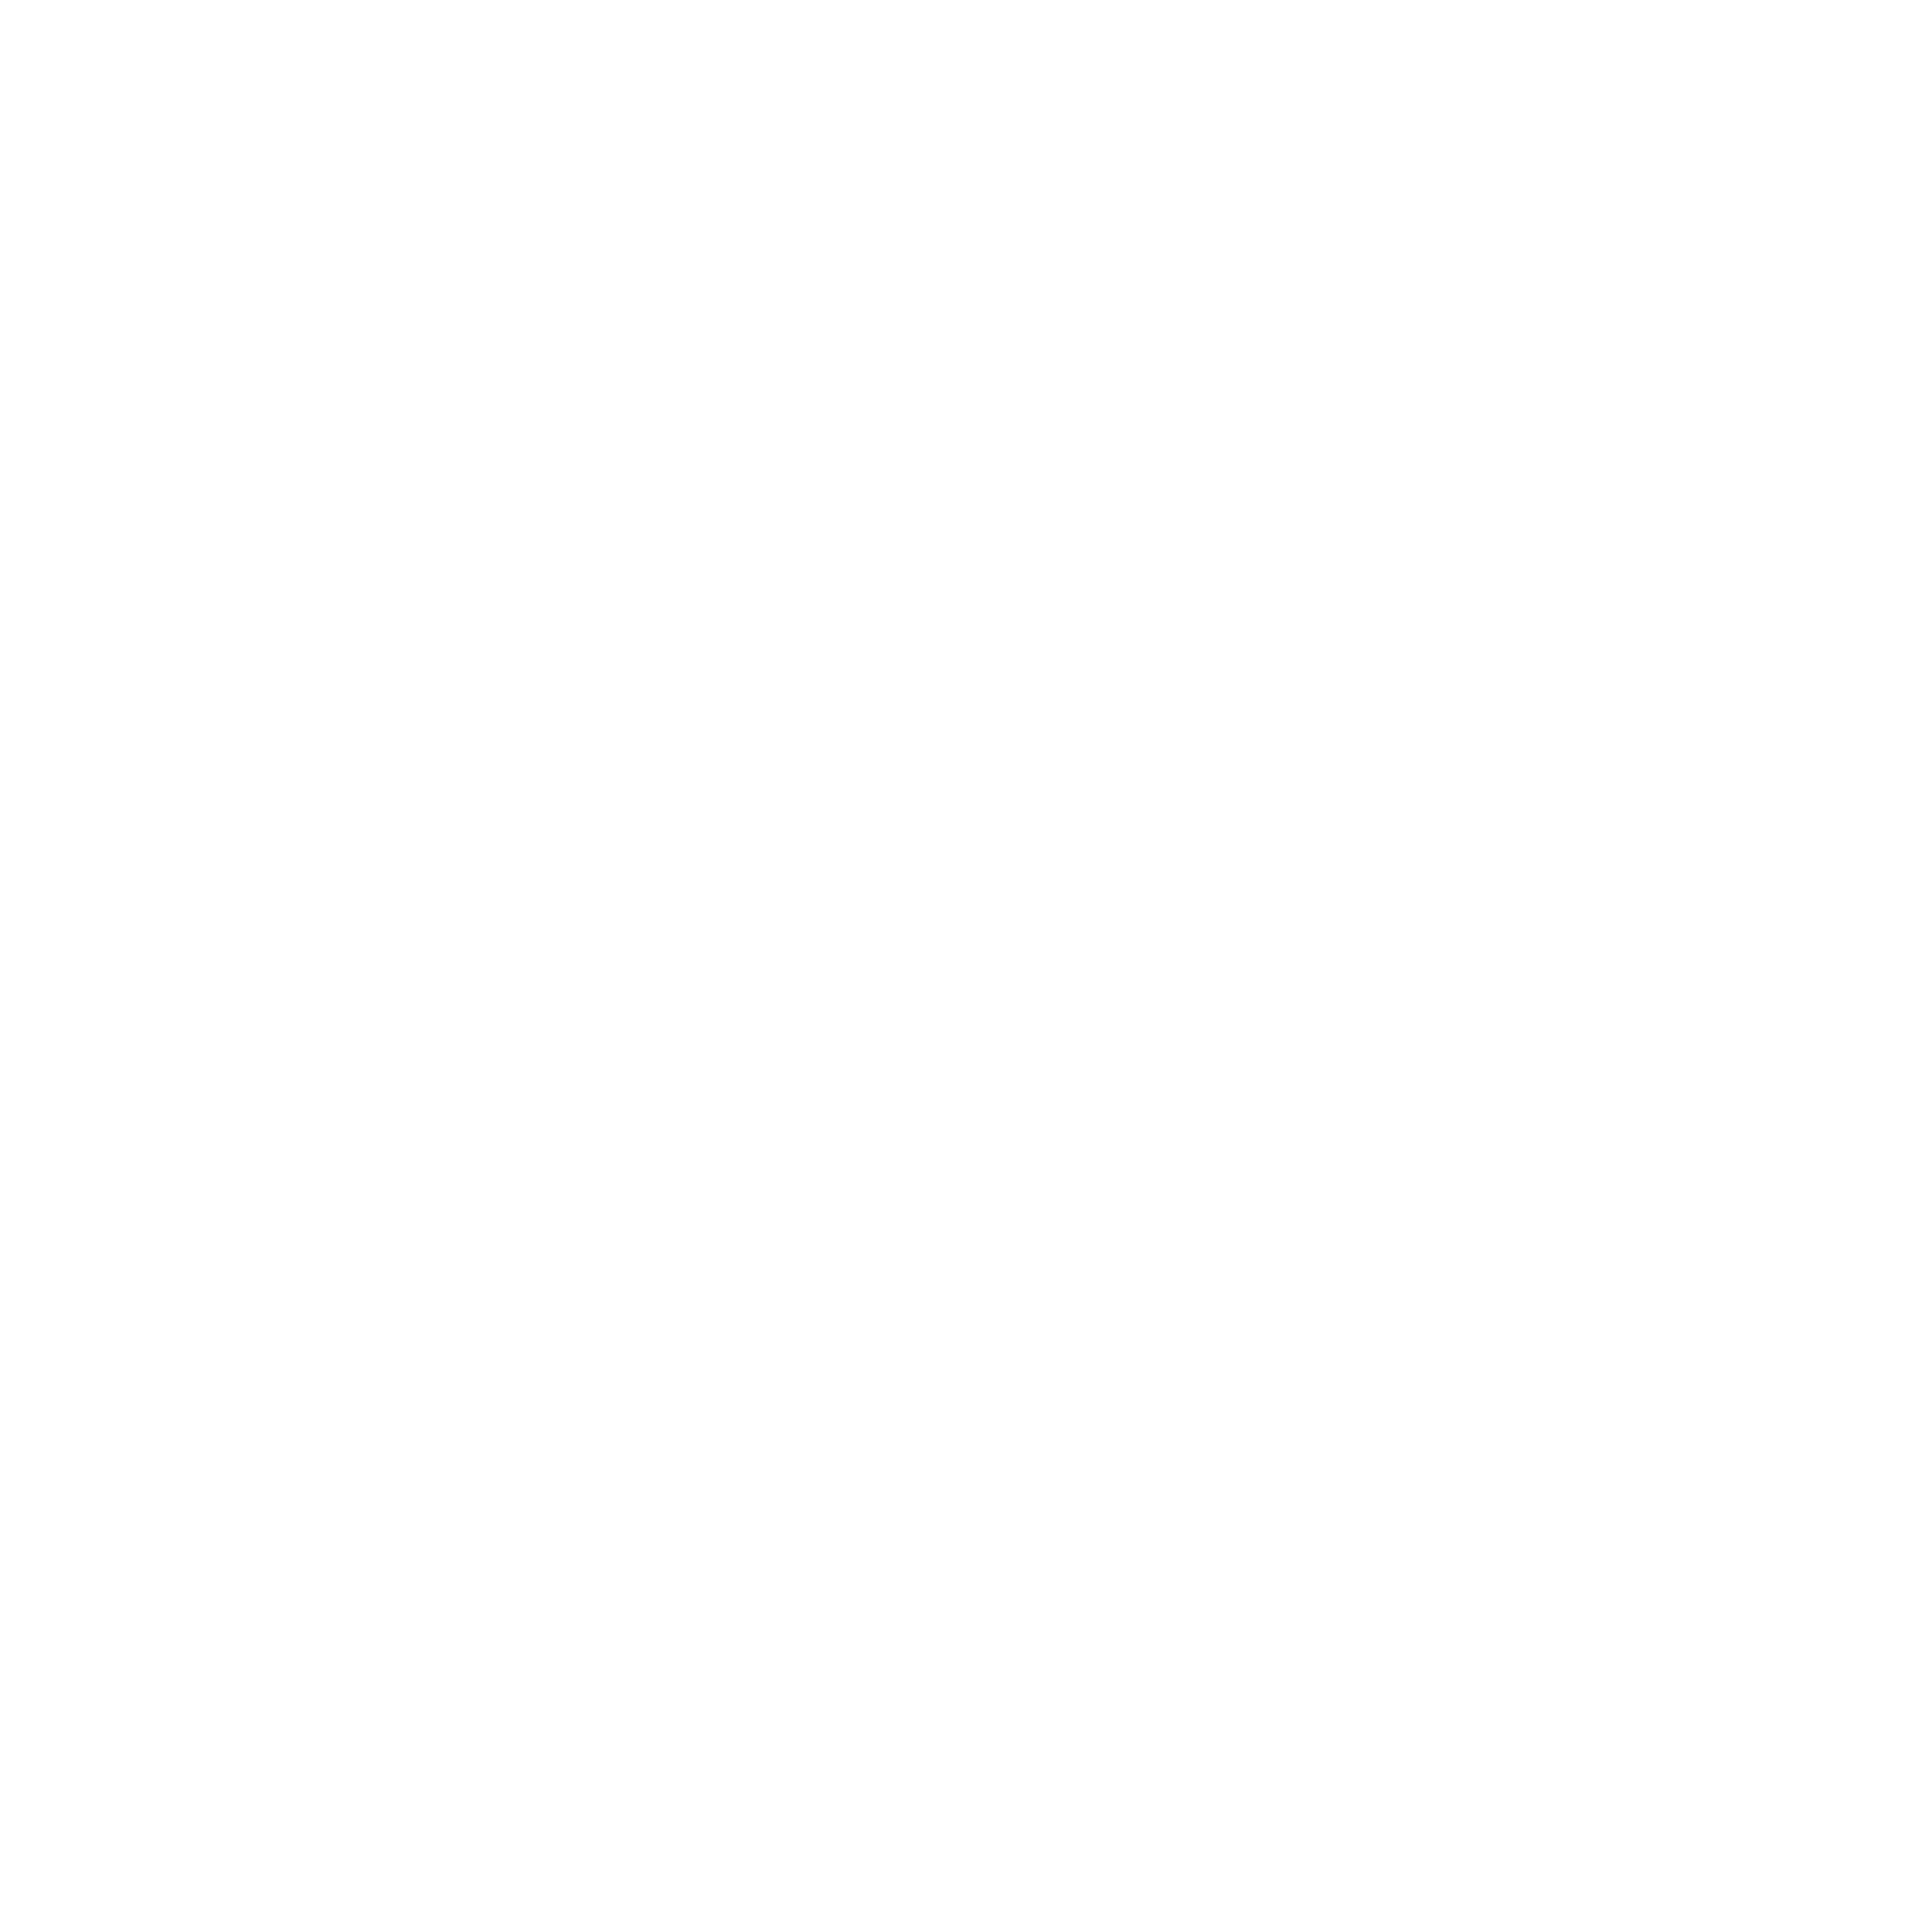

plotting and saving... 


 49%|█████████████████████████████████████▏                                      | 49/100 [9:17:04<9:31:33, 672.43s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


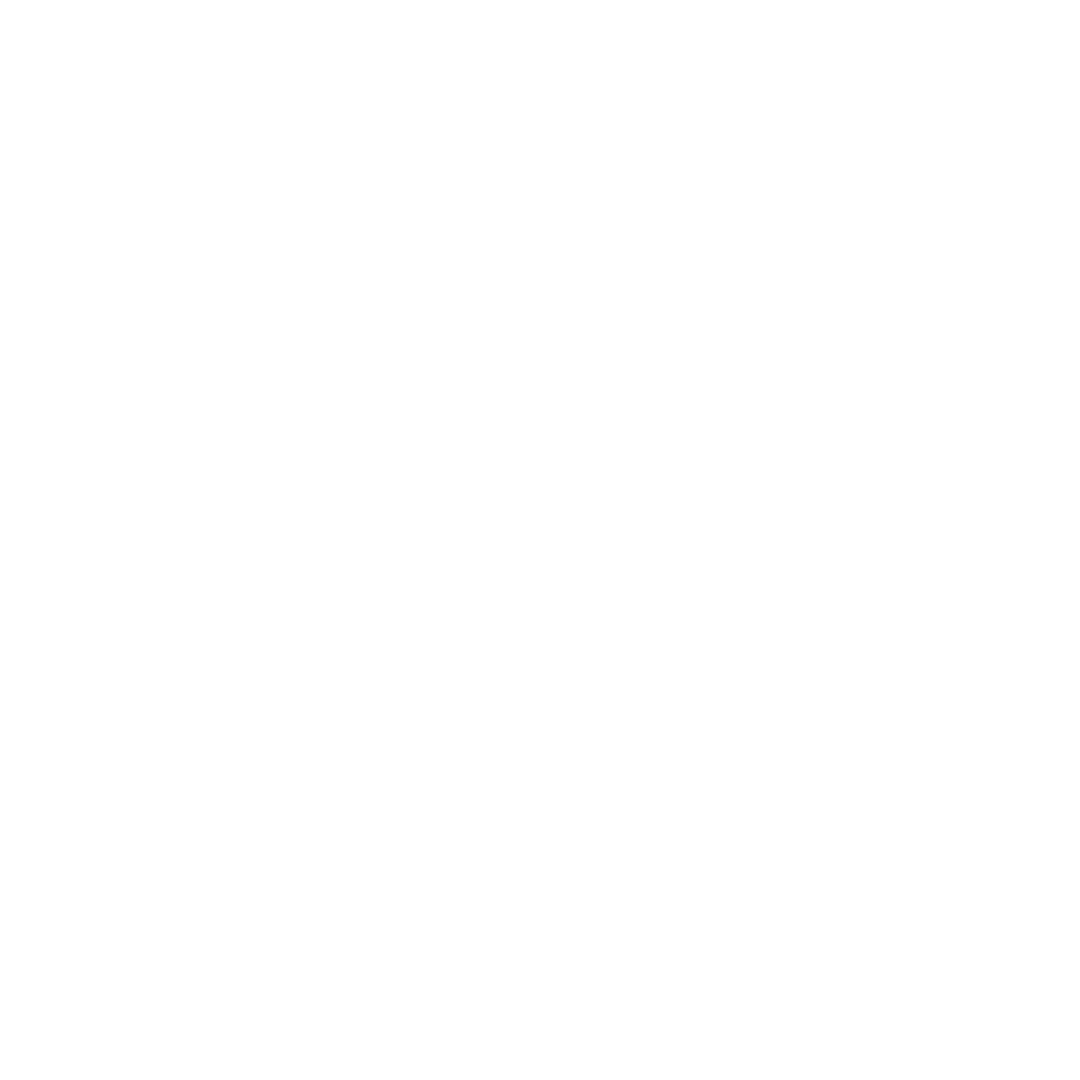

plotting and saving... 


 50%|██████████████████████████████████████                                      | 50/100 [9:28:49<9:28:31, 682.23s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


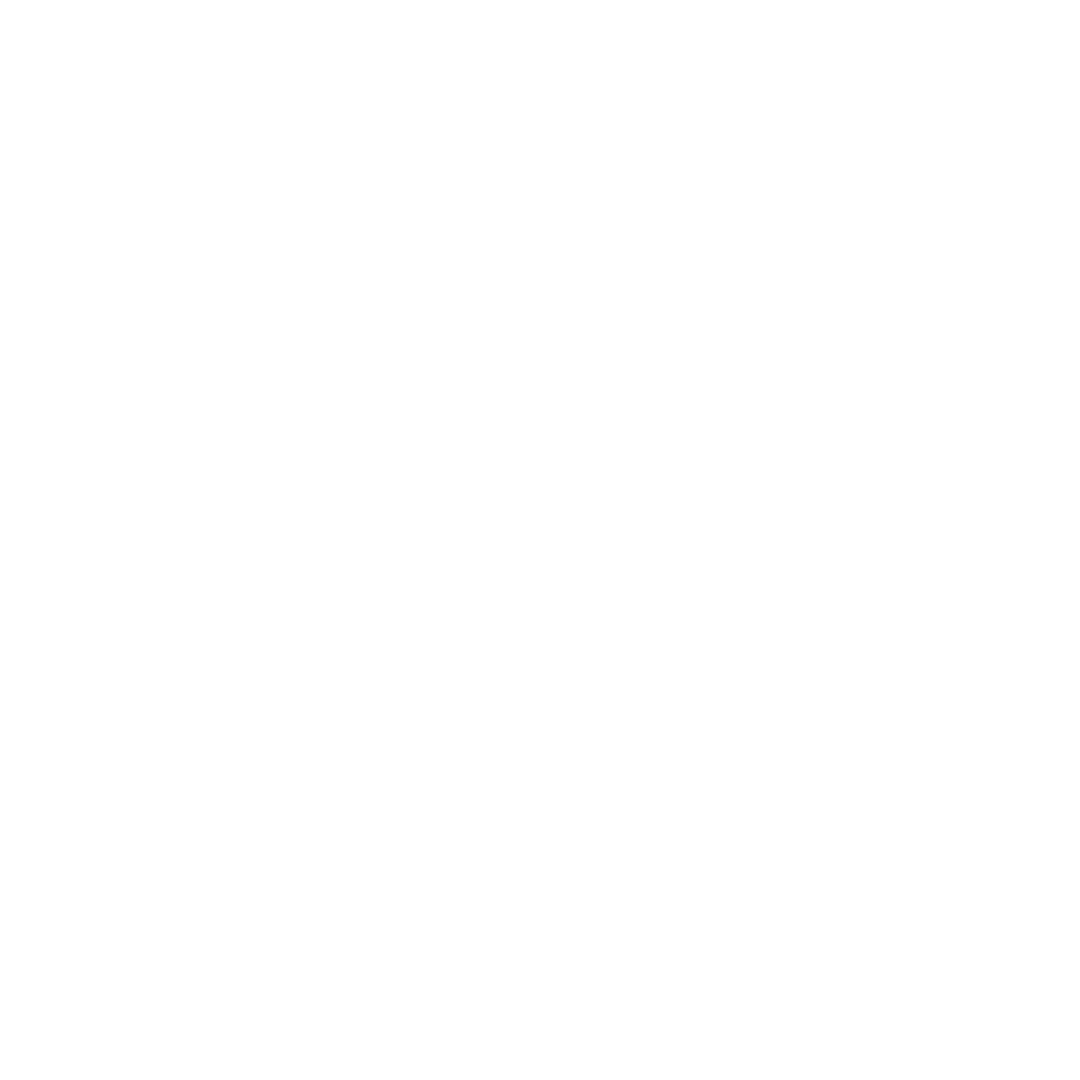

plotting and saving... 


 51%|██████████████████████████████████████▊                                     | 51/100 [9:40:46<9:25:35, 692.57s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


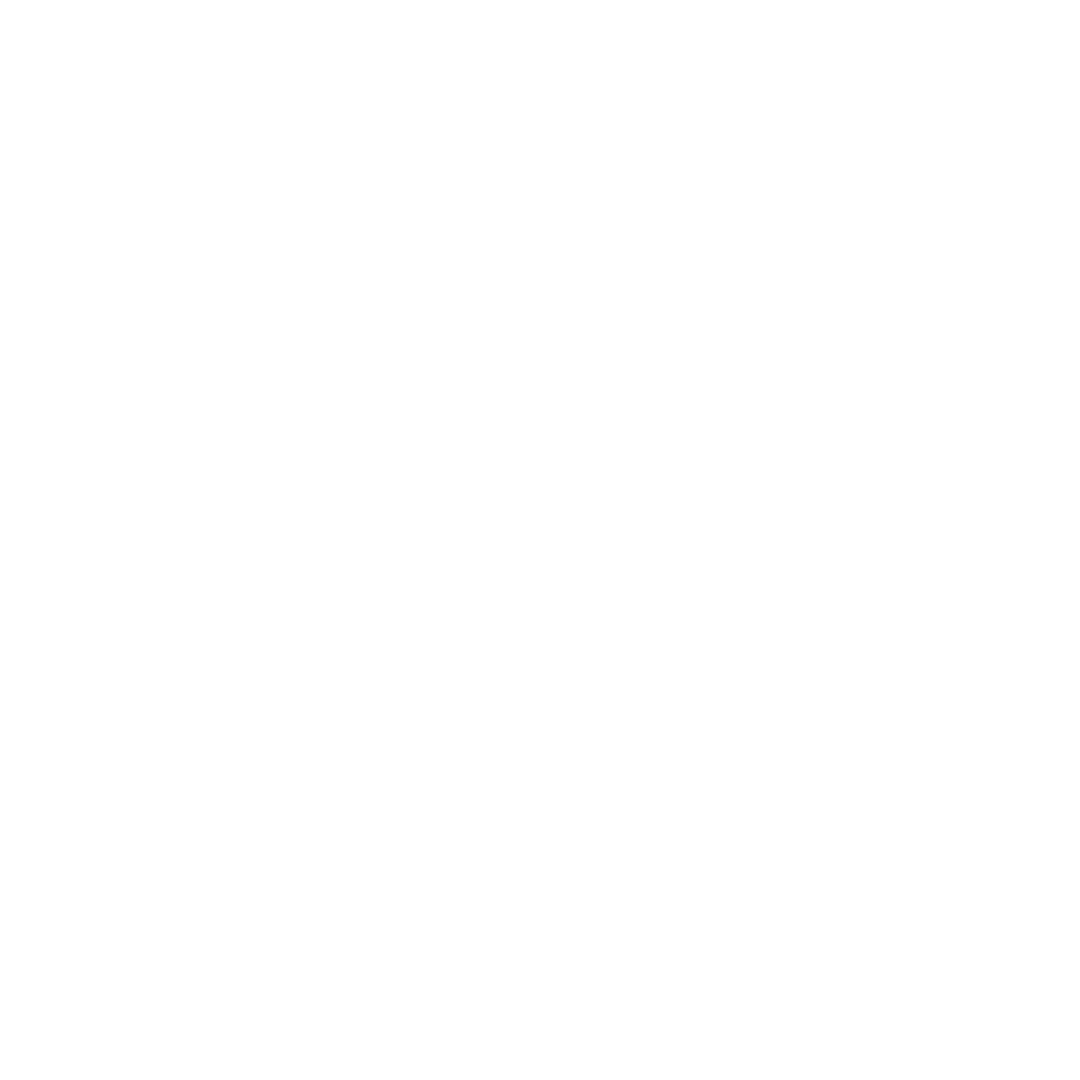

plotting and saving... 


 52%|███████████████████████████████████████▌                                    | 52/100 [9:52:48<9:21:04, 701.35s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


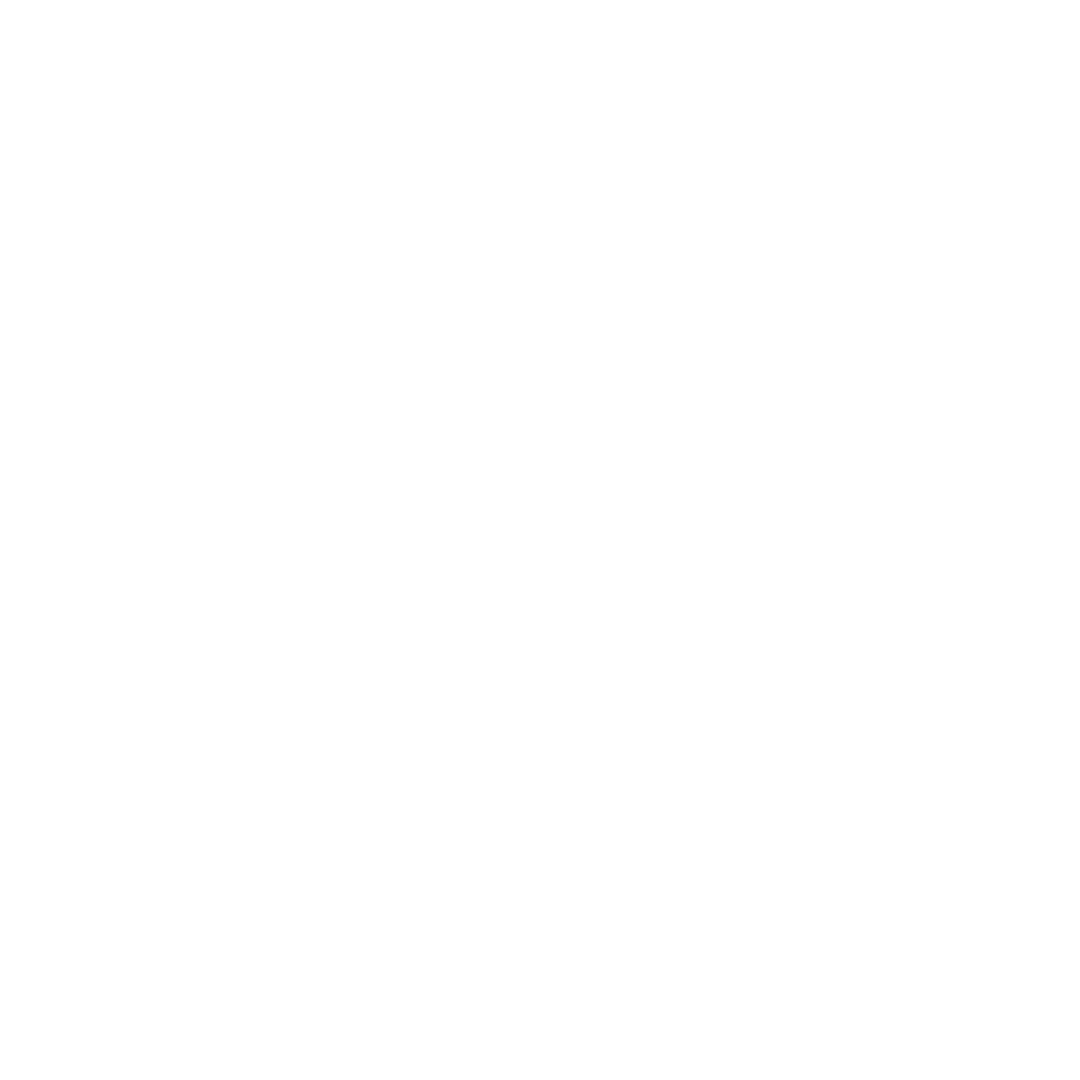

plotting and saving... 


 53%|███████████████████████████████████████▊                                   | 53/100 [10:04:36<9:11:01, 703.43s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


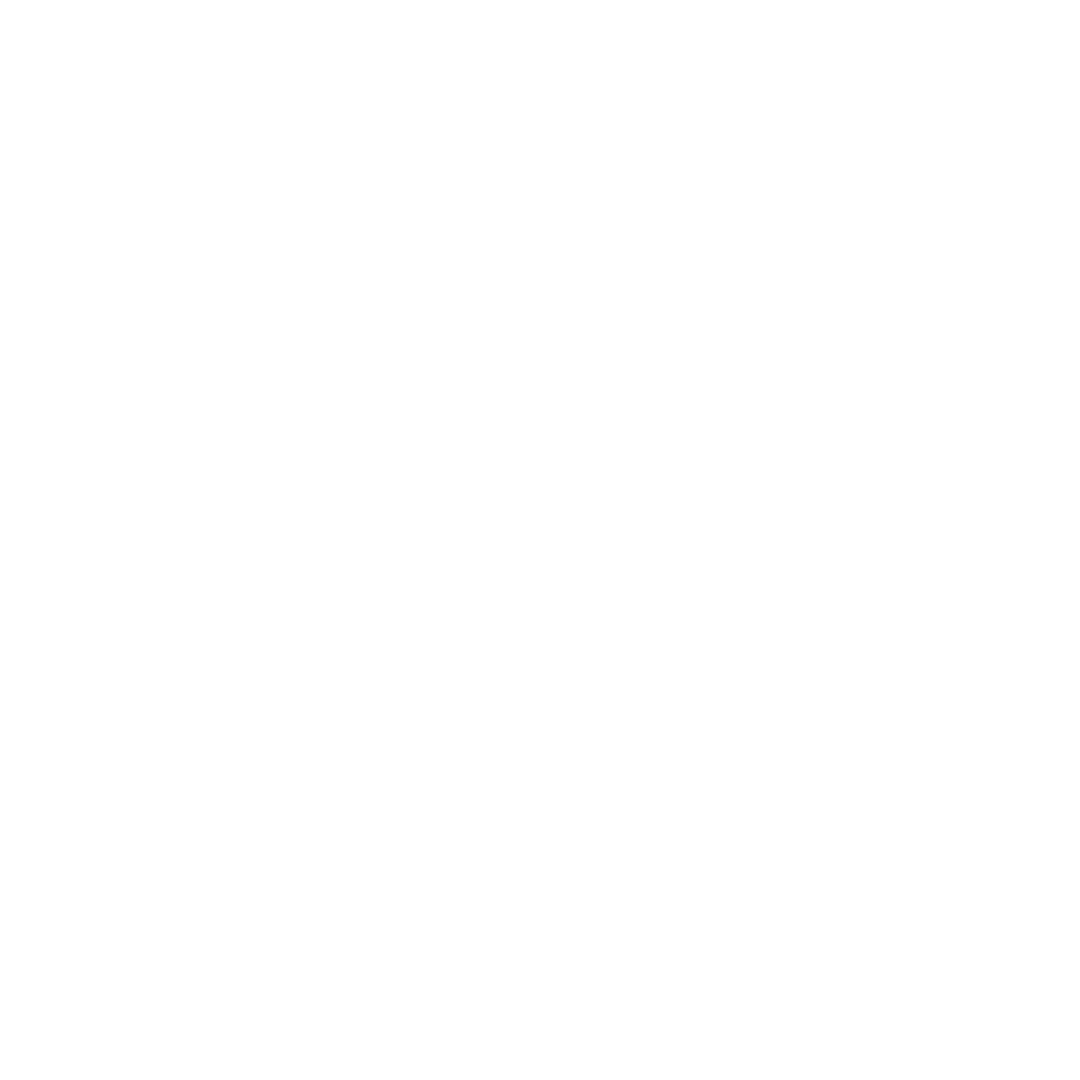

plotting and saving... 


 54%|████████████████████████████████████████▌                                  | 54/100 [10:15:51<8:52:49, 694.98s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


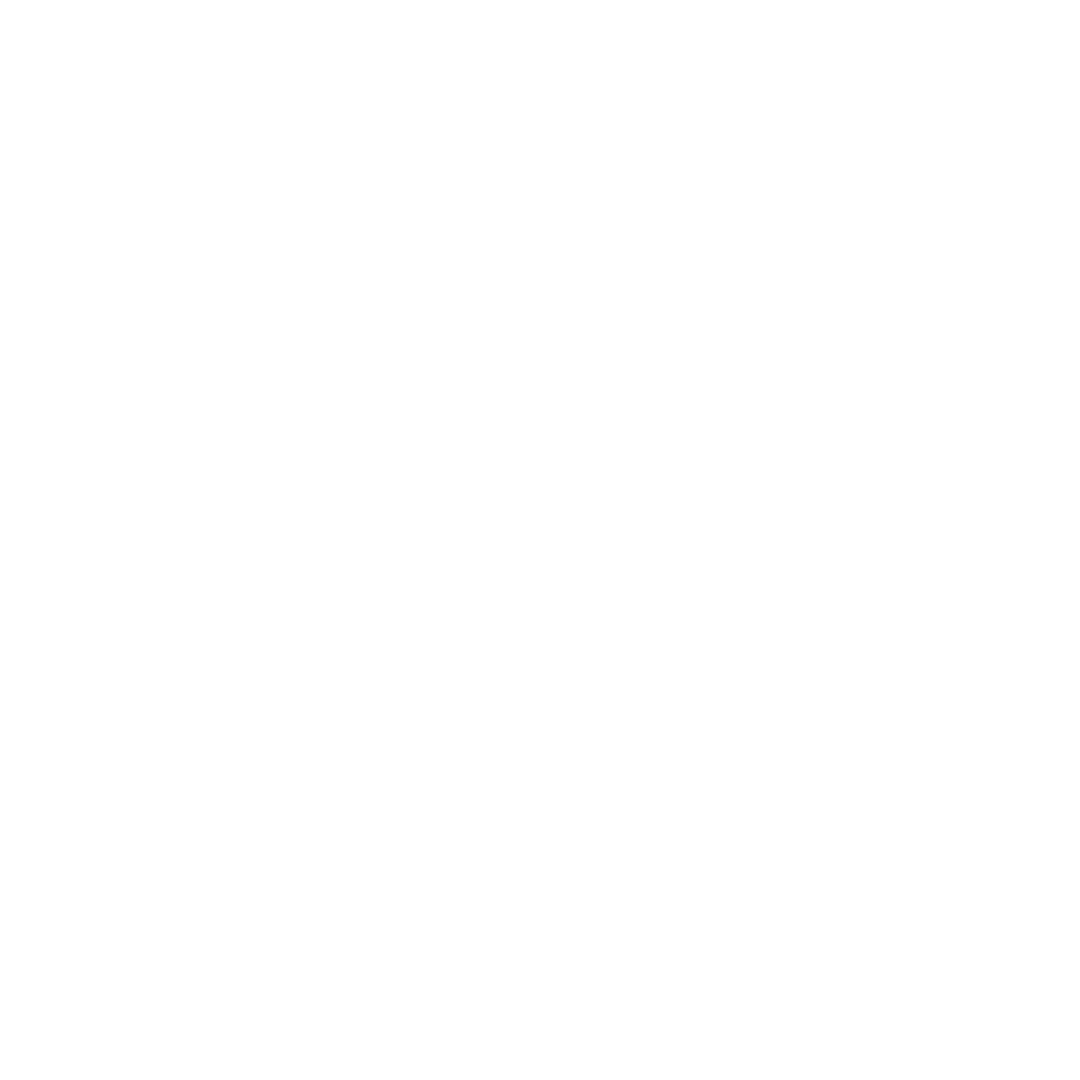

plotting and saving... 


 55%|█████████████████████████████████████████▎                                 | 55/100 [10:27:19<8:39:36, 692.80s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


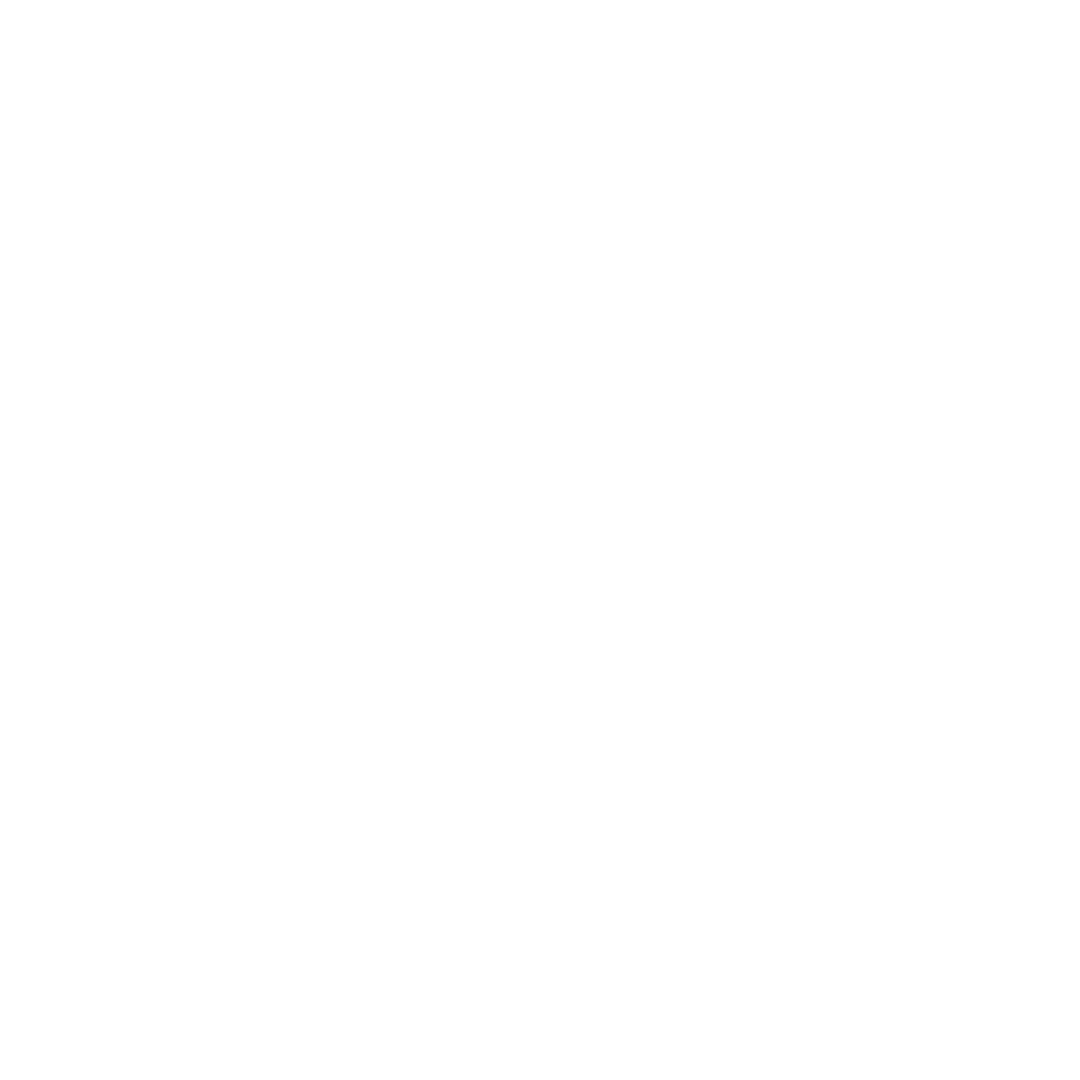

plotting and saving... 


 56%|██████████████████████████████████████████                                 | 56/100 [10:38:58<8:29:25, 694.68s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


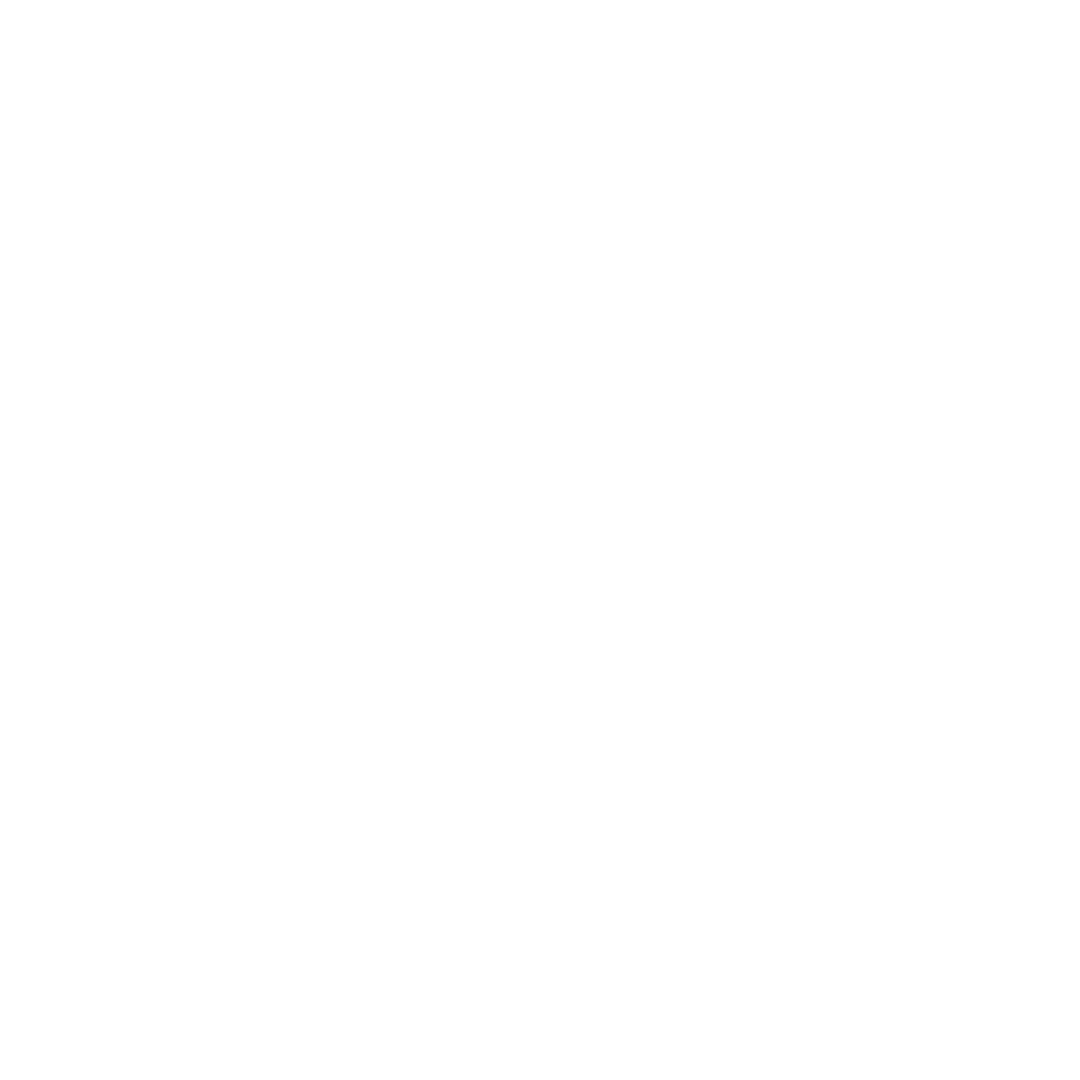

plotting and saving... 


 57%|██████████████████████████████████████████▋                                | 57/100 [10:50:28<8:16:55, 693.39s/it]

calculating correlations... 
skipped iteration


<IPython.core.display.Javascript object>


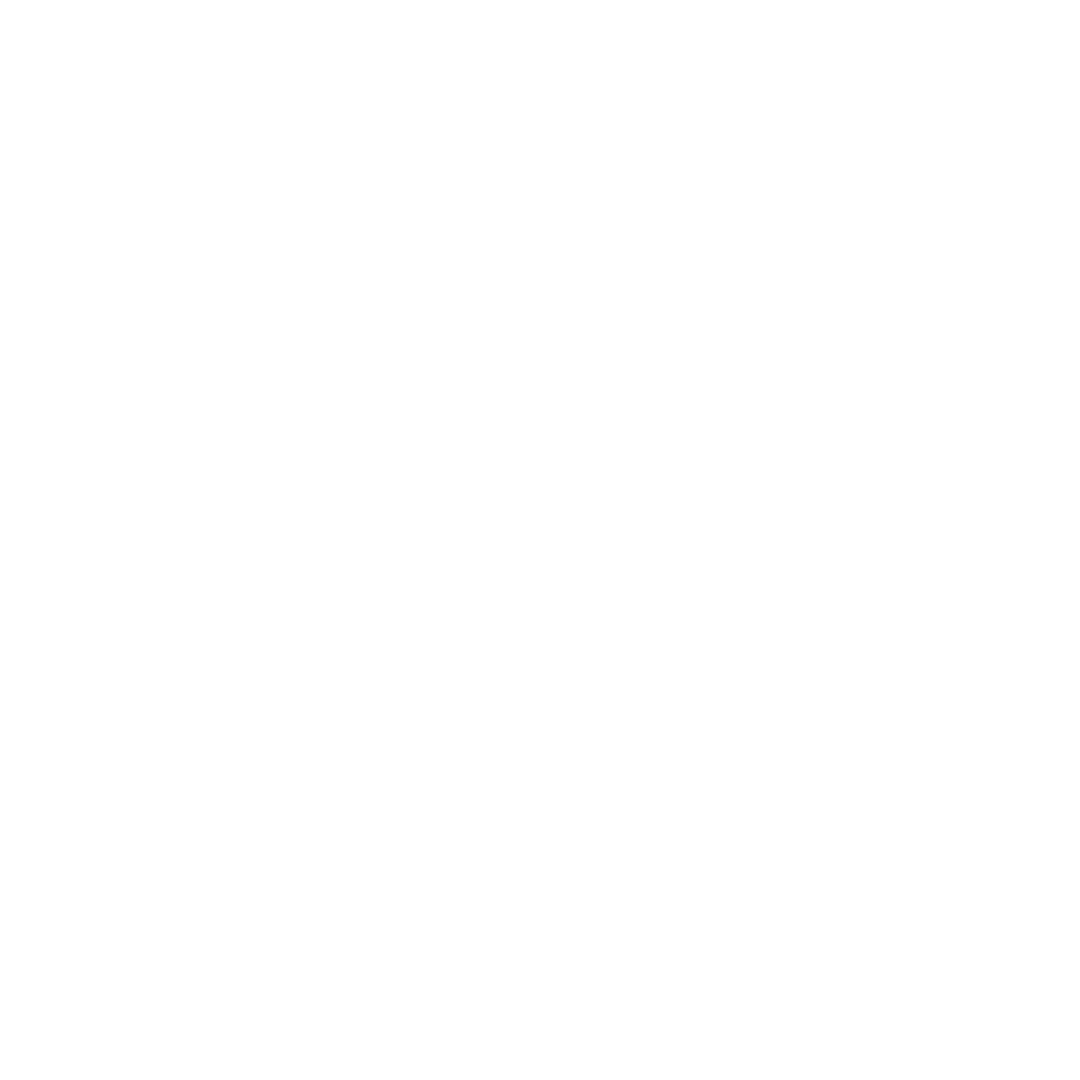

plotting and saving... 


 58%|███████████████████████████████████████████▌                               | 58/100 [11:01:47<8:02:15, 688.94s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


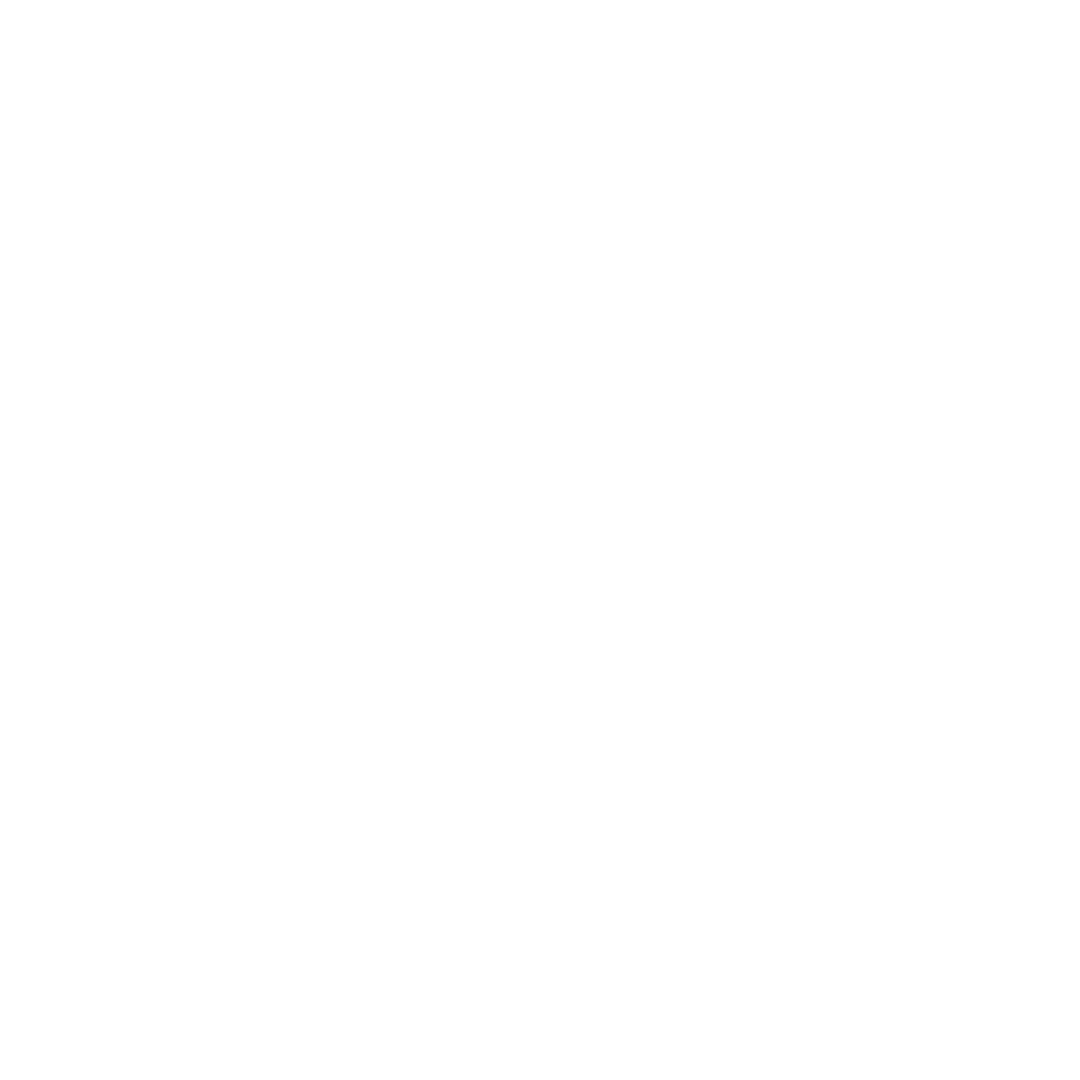

plotting and saving... 


 59%|████████████████████████████████████████████▎                              | 59/100 [11:13:01<7:47:47, 684.57s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


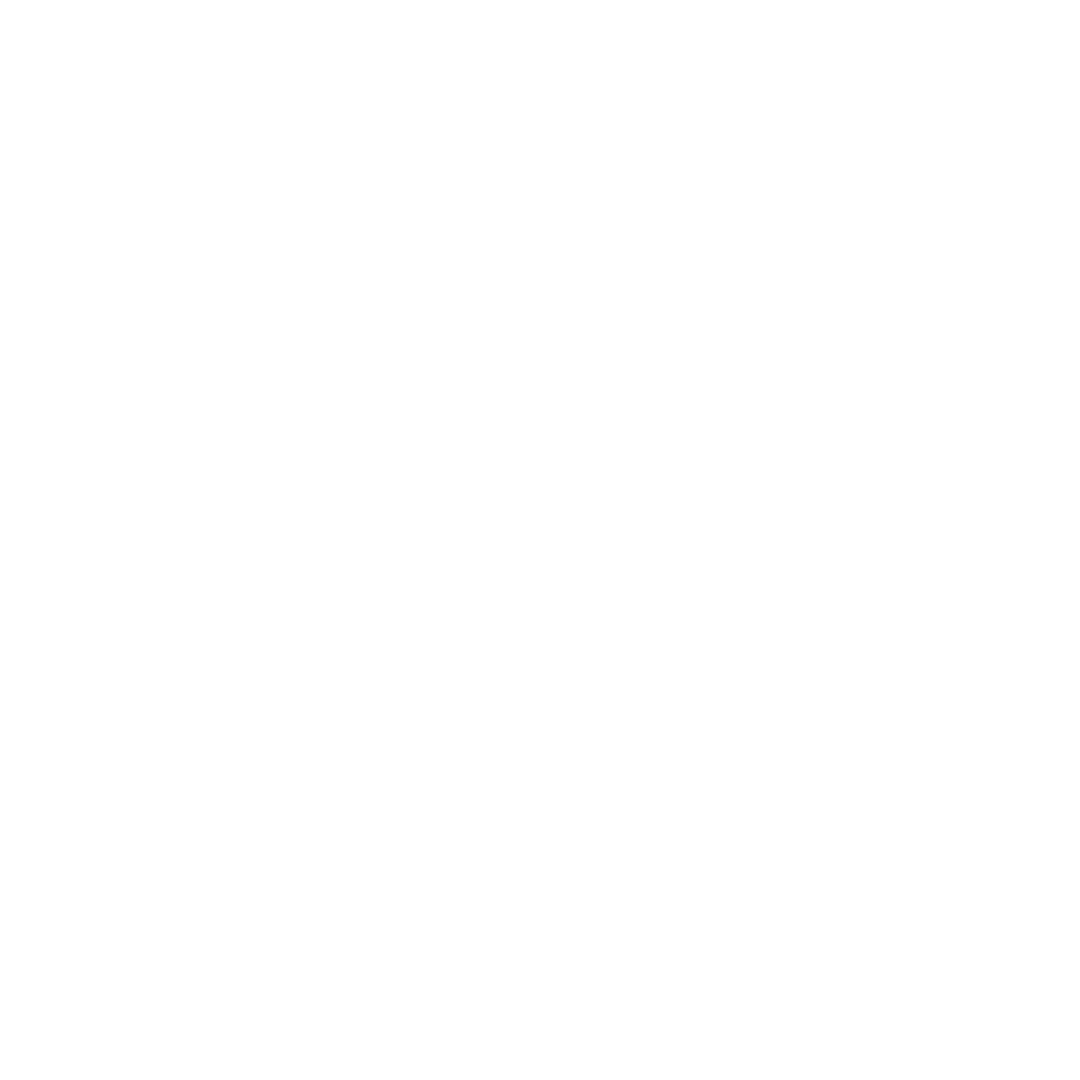

plotting and saving... 


 60%|█████████████████████████████████████████████                              | 60/100 [11:24:38<7:38:47, 688.20s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


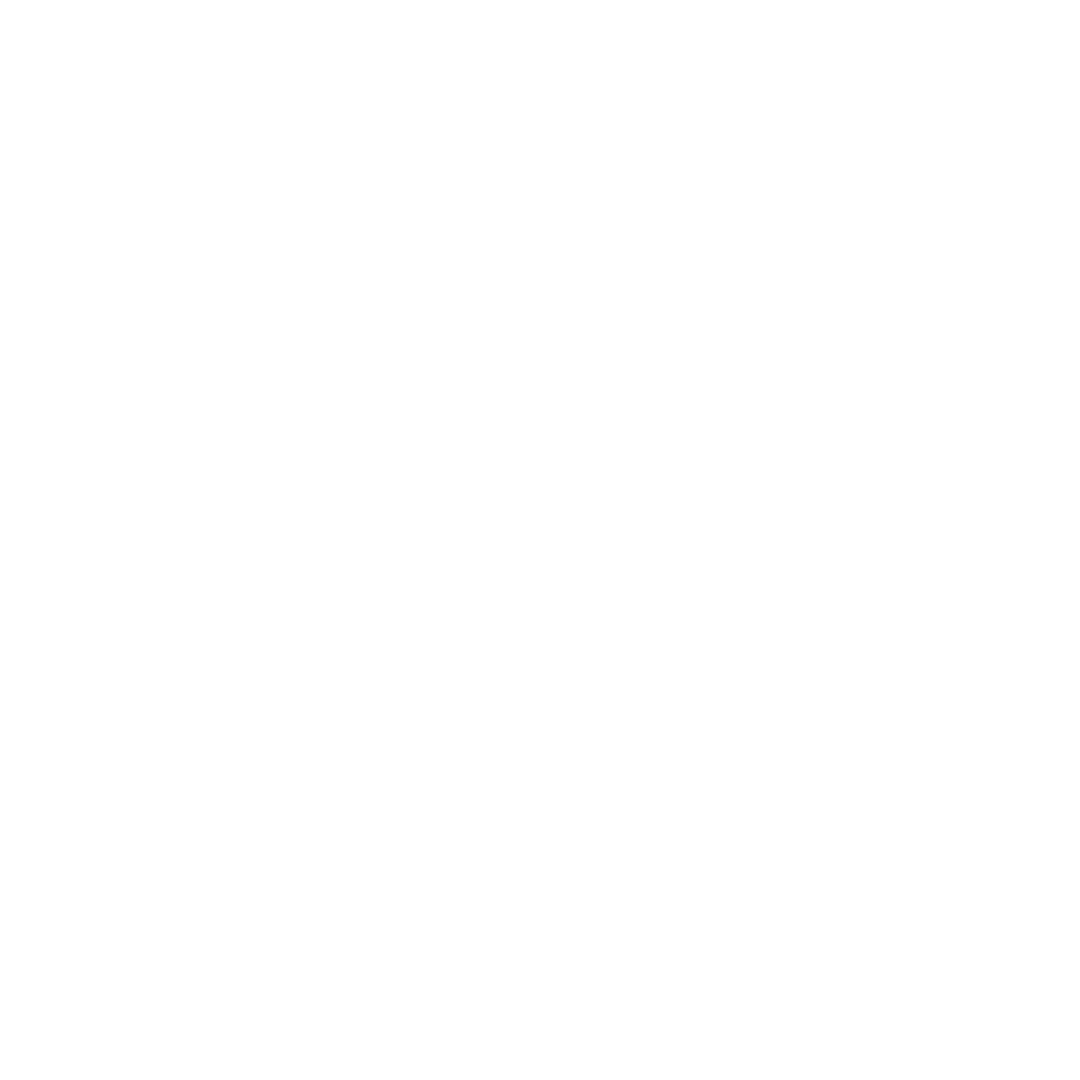

plotting and saving... 


 61%|█████████████████████████████████████████████▊                             | 61/100 [11:35:53<7:24:44, 684.22s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


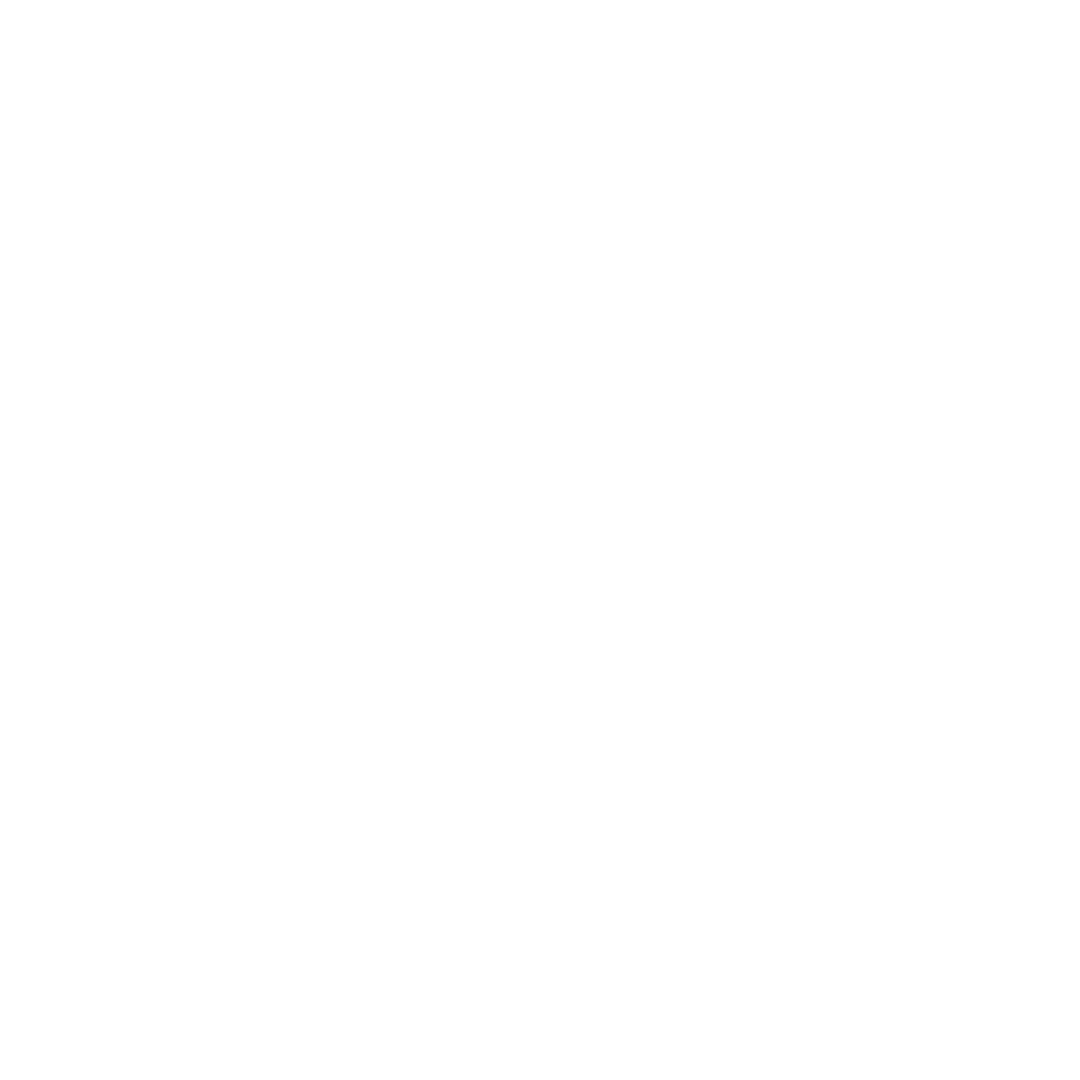

plotting and saving... 


 62%|██████████████████████████████████████████████▌                            | 62/100 [11:47:41<7:17:48, 691.27s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


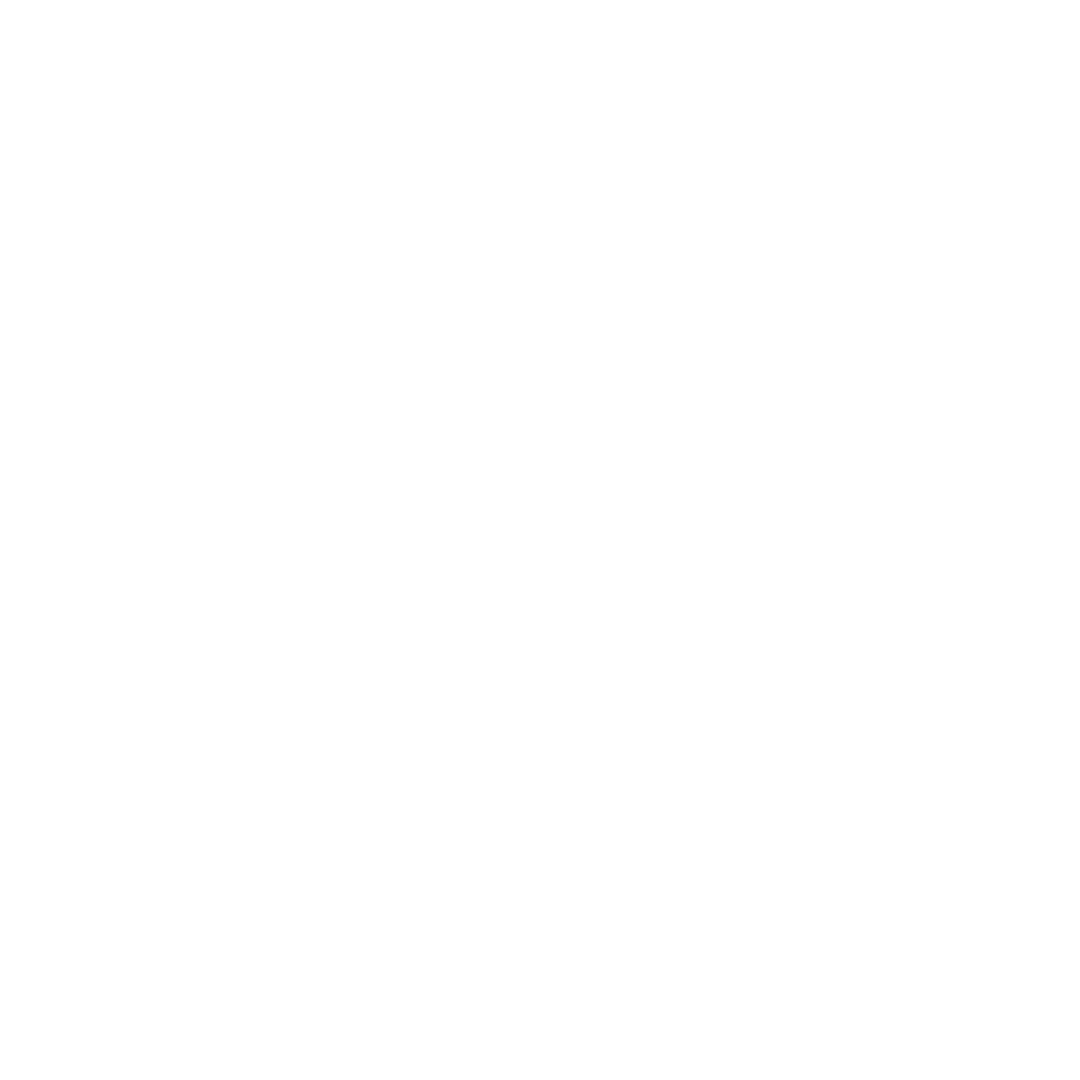

plotting and saving... 


 63%|███████████████████████████████████████████████▎                           | 63/100 [11:59:08<7:05:34, 690.12s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


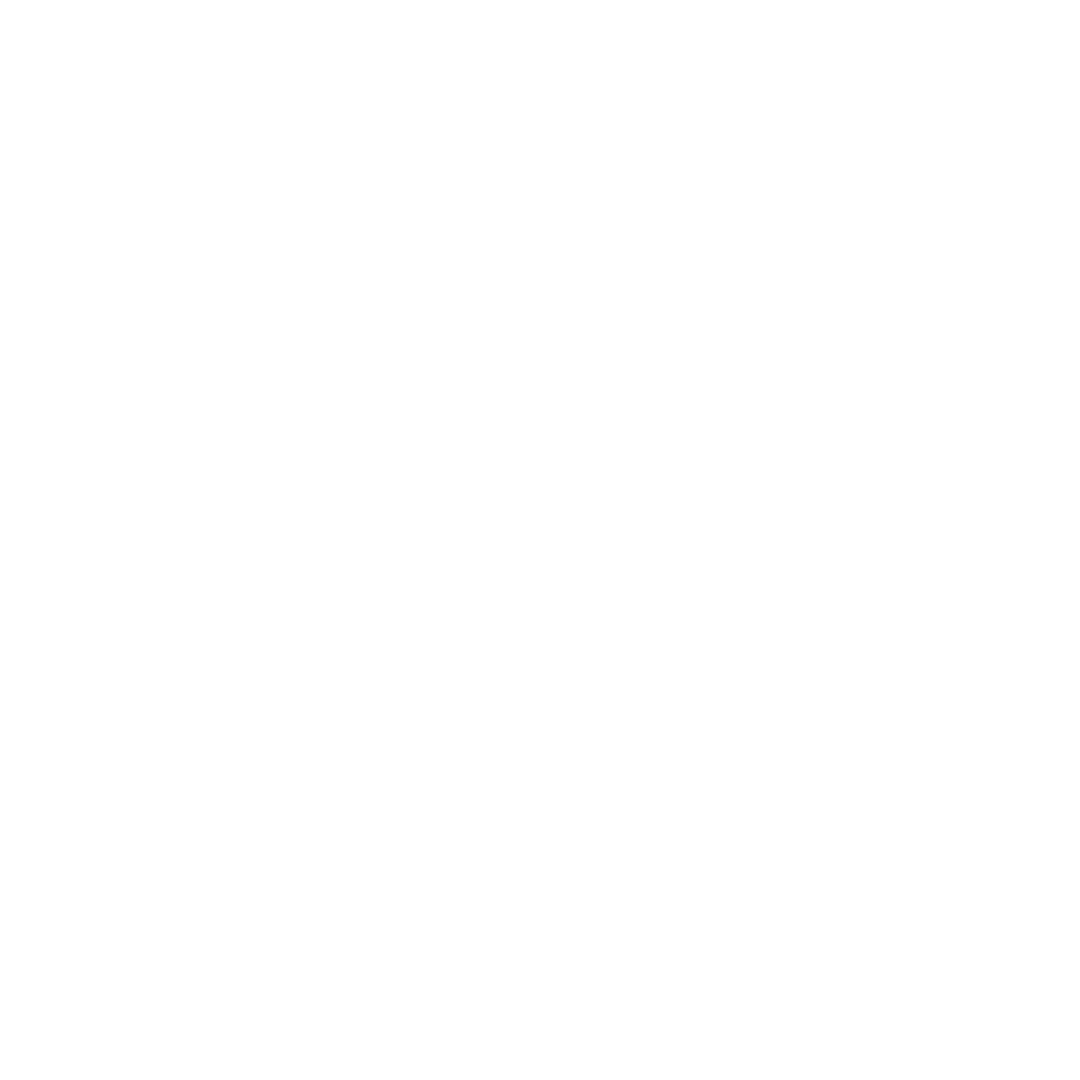

plotting and saving... 


 64%|████████████████████████████████████████████████                           | 64/100 [12:10:19<6:50:38, 684.41s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


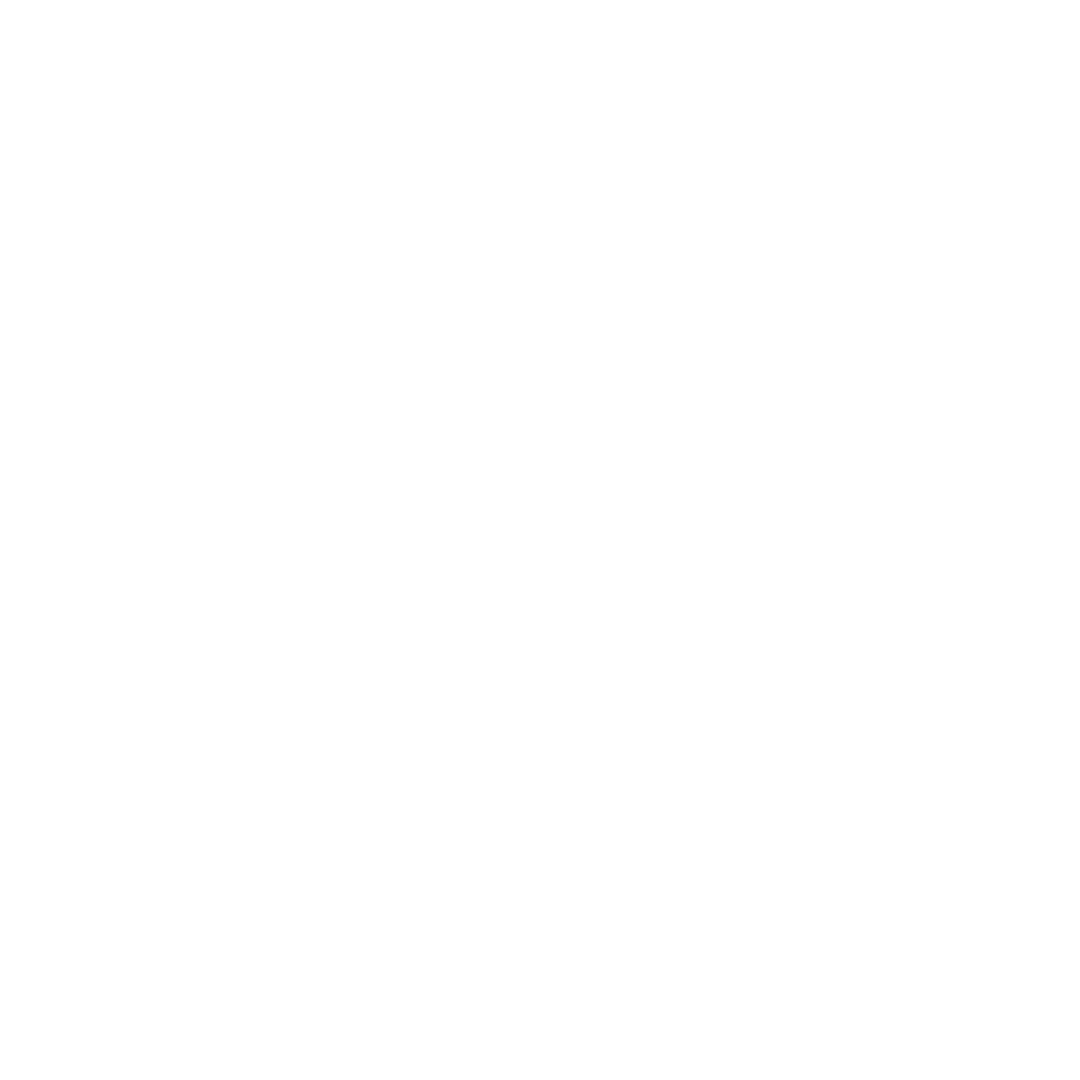

plotting and saving... 


 65%|████████████████████████████████████████████████▊                          | 65/100 [12:21:32<6:37:11, 680.90s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


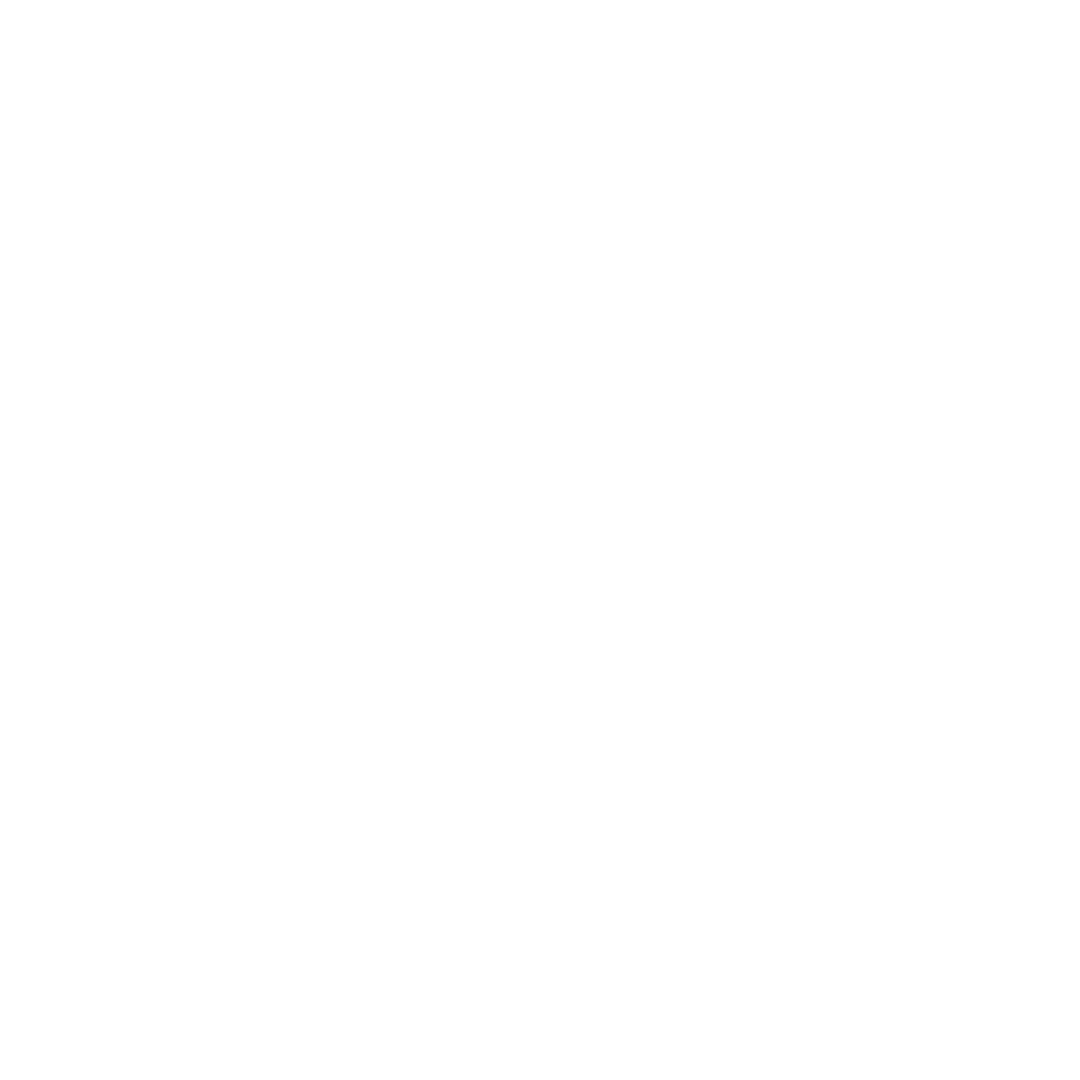

plotting and saving... 


 66%|█████████████████████████████████████████████████▌                         | 66/100 [12:32:52<6:25:45, 680.75s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


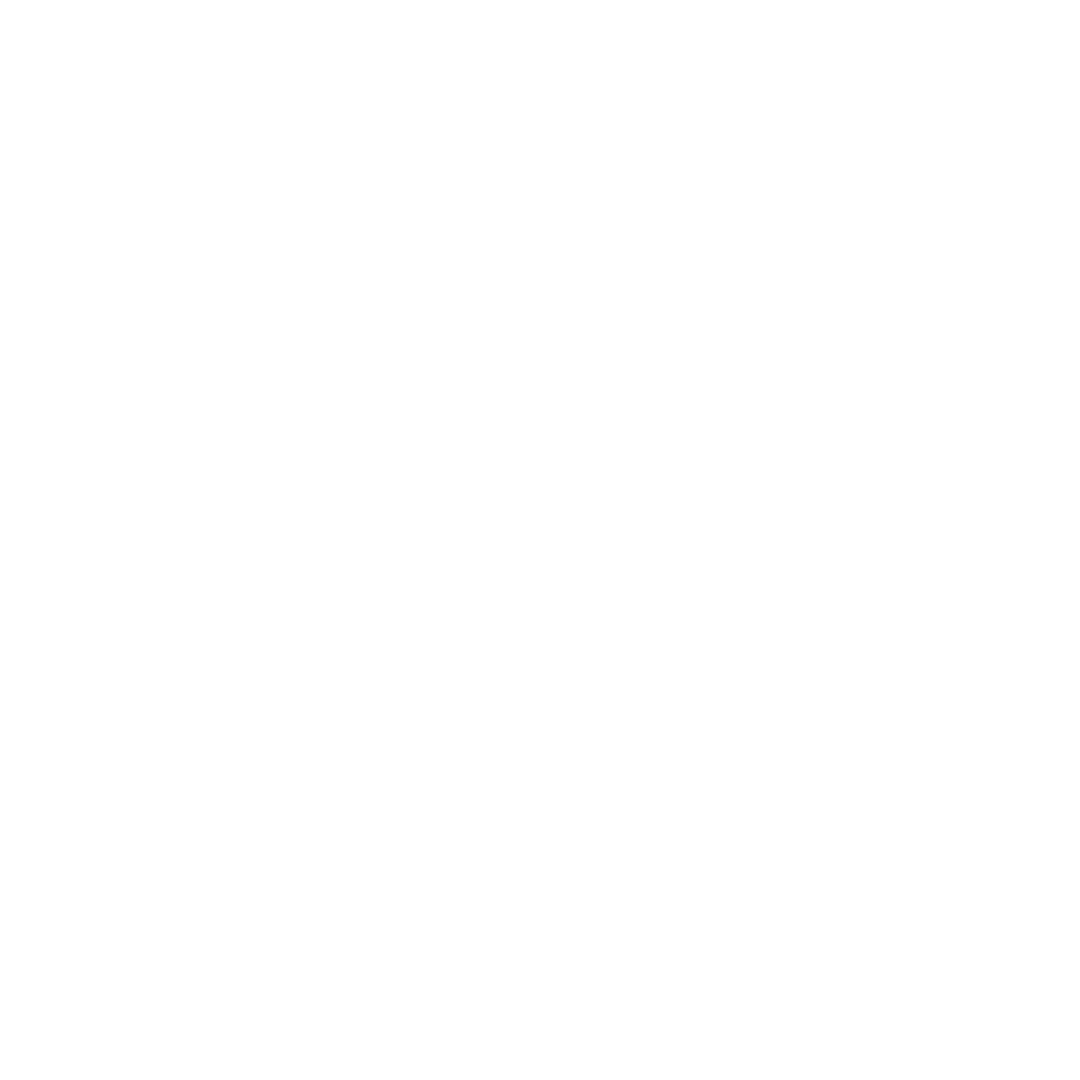

plotting and saving... 


 67%|██████████████████████████████████████████████████▎                        | 67/100 [12:44:10<6:13:57, 679.94s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


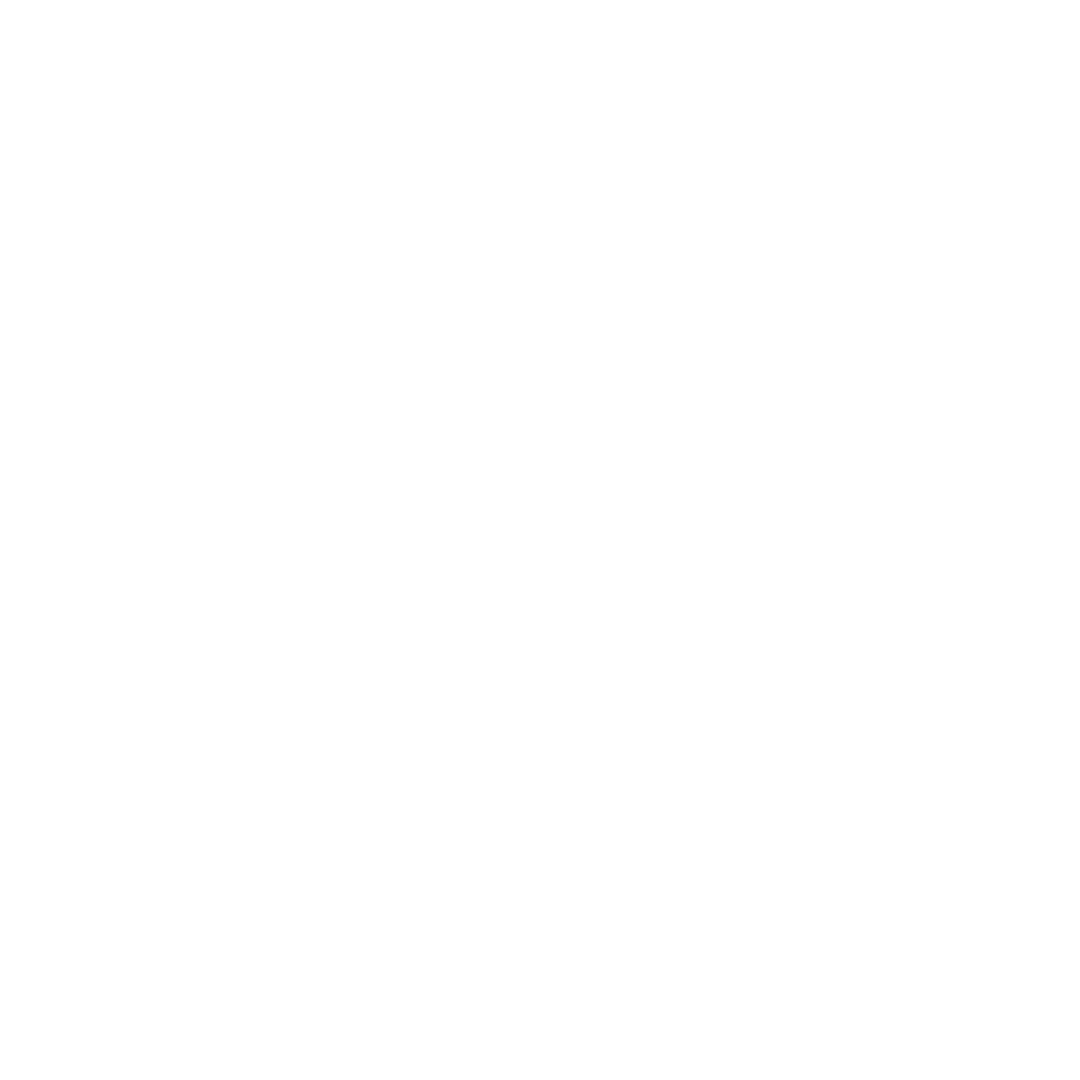

plotting and saving... 


 68%|███████████████████████████████████████████████████                        | 68/100 [12:55:59<6:07:10, 688.46s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


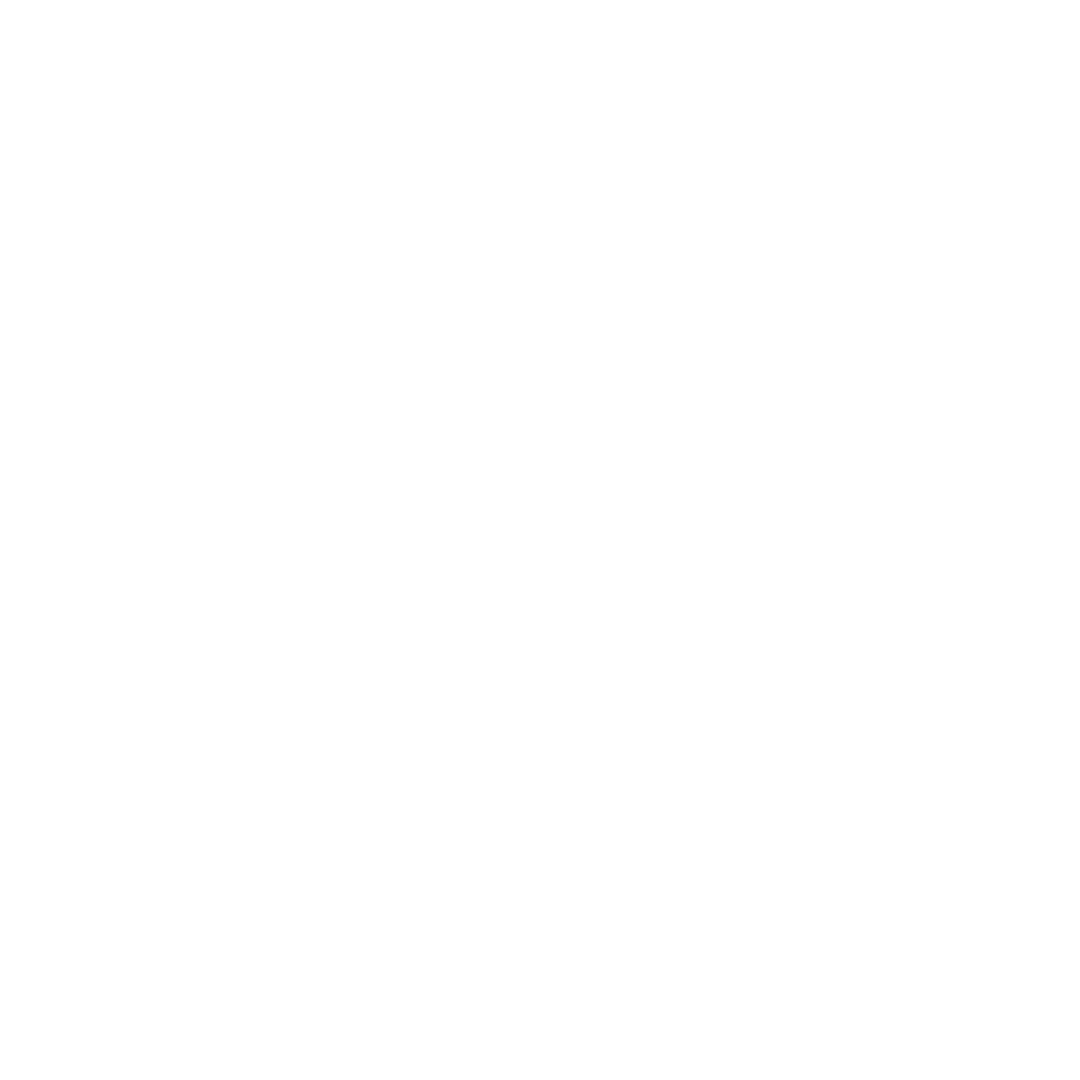

plotting and saving... 


 69%|███████████████████████████████████████████████████▋                       | 69/100 [13:07:39<5:57:37, 692.18s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


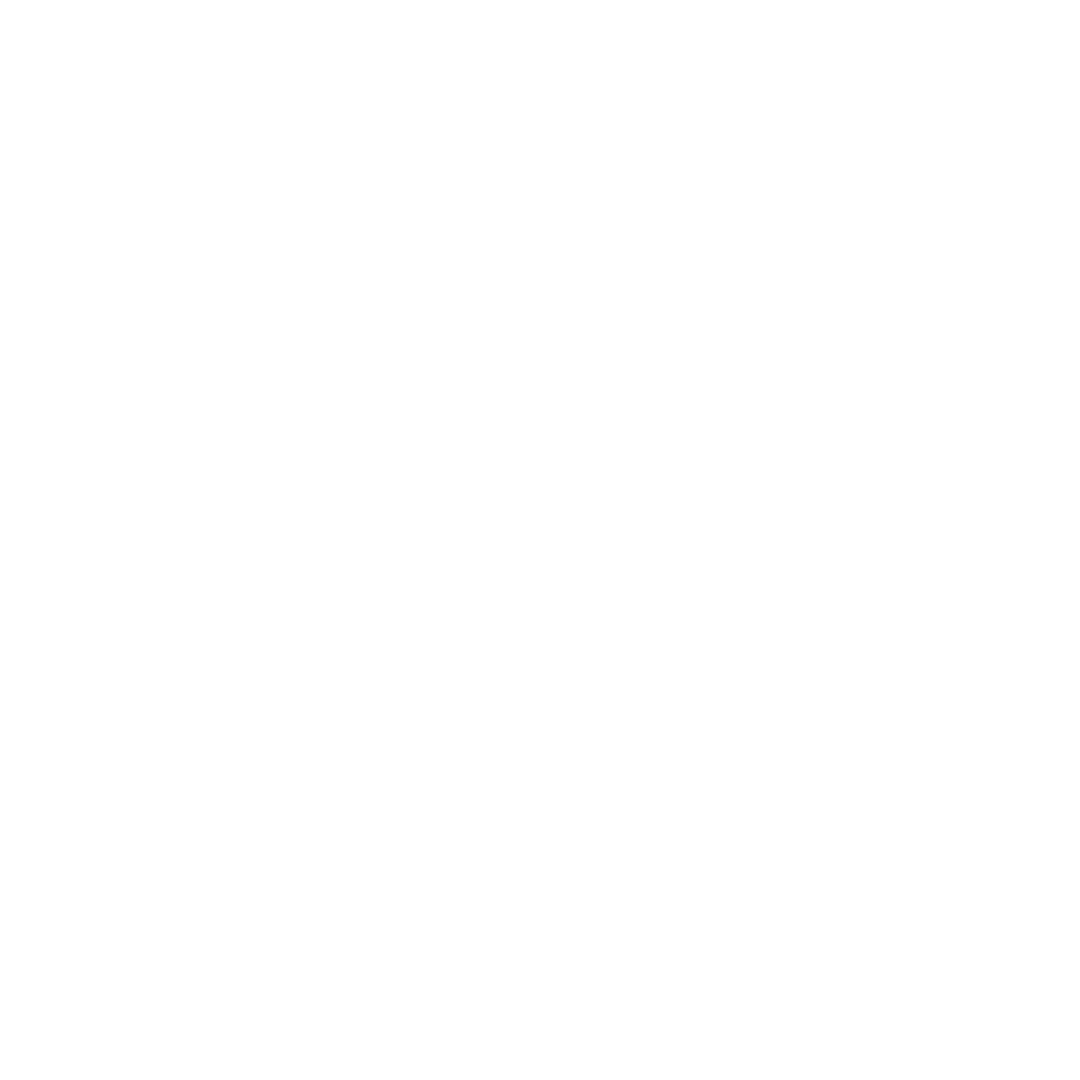

plotting and saving... 


 70%|████████████████████████████████████████████████████▌                      | 70/100 [13:19:08<5:45:32, 691.07s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


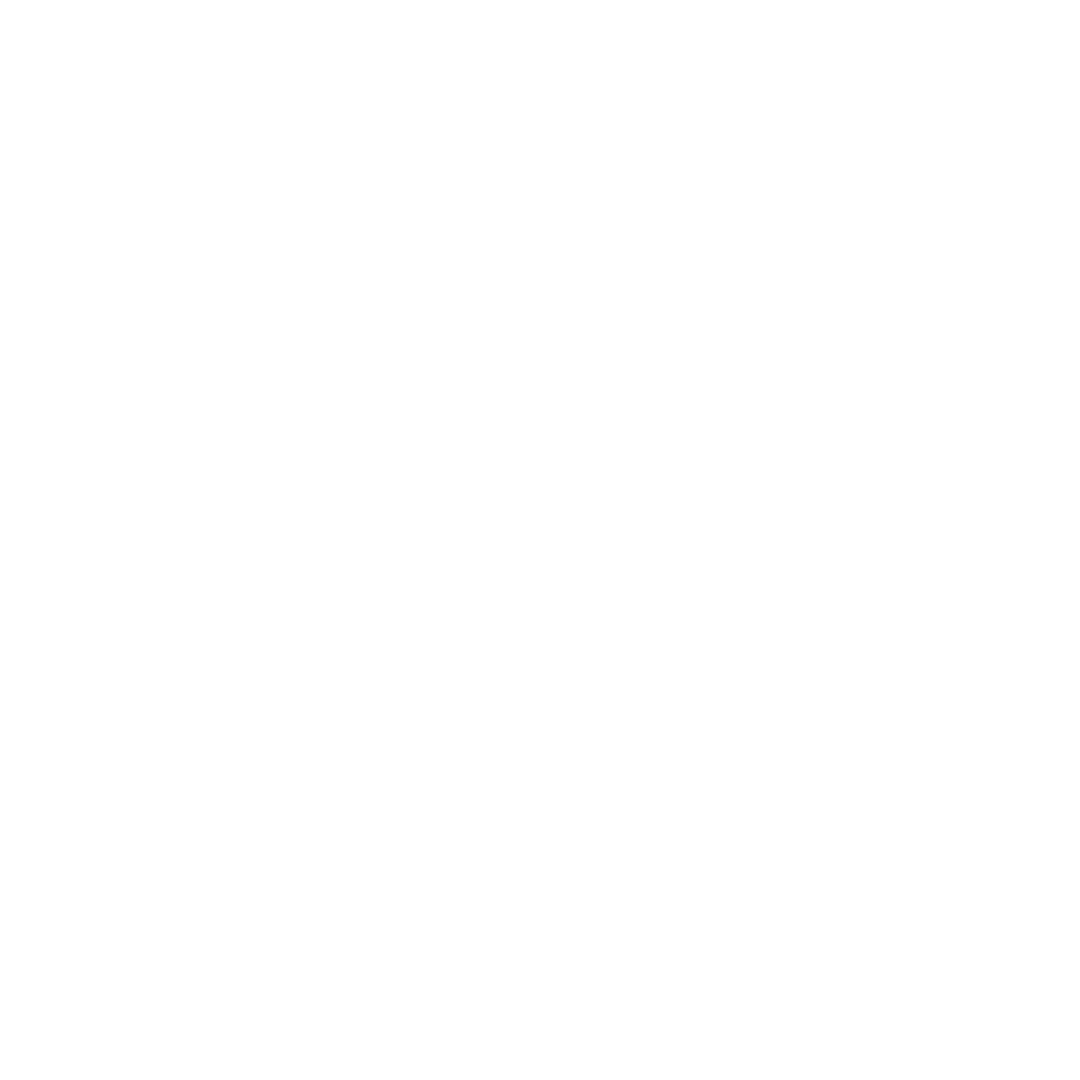

plotting and saving... 


 71%|█████████████████████████████████████████████████████▎                     | 71/100 [13:30:26<5:32:05, 687.08s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


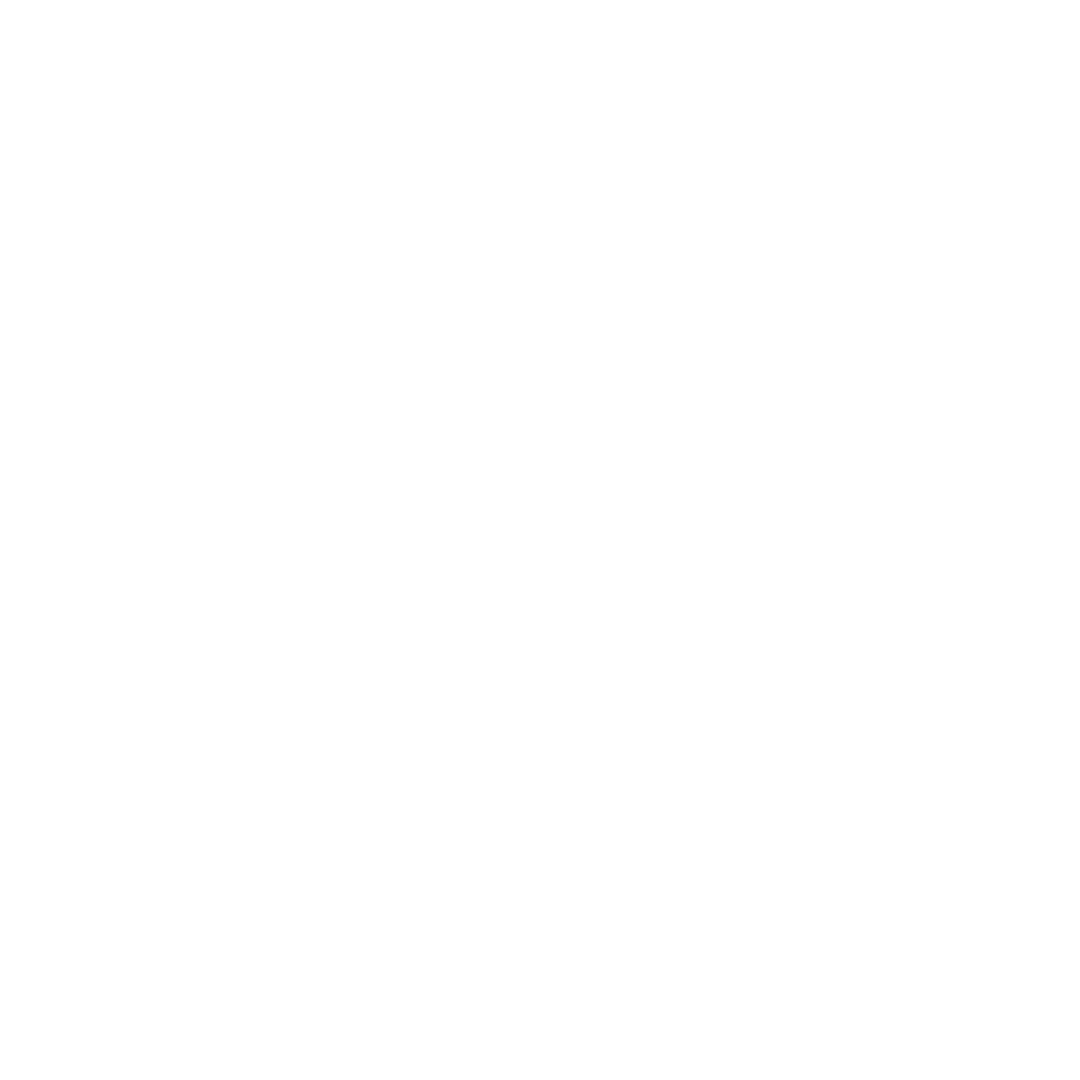

plotting and saving... 


 72%|██████████████████████████████████████████████████████                     | 72/100 [13:41:51<5:20:22, 686.50s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


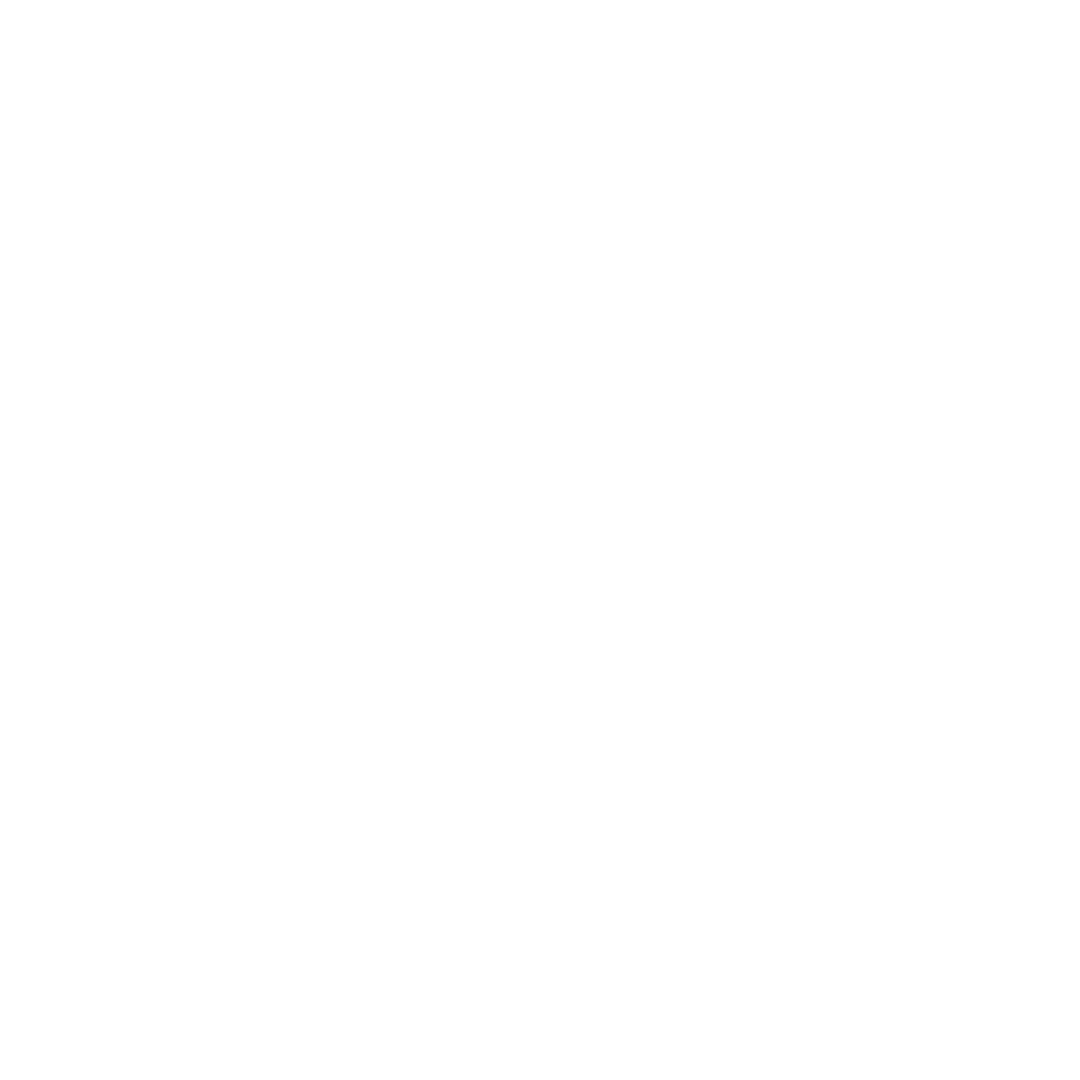

plotting and saving... 


 73%|██████████████████████████████████████████████████████▊                    | 73/100 [13:53:24<5:09:47, 688.41s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


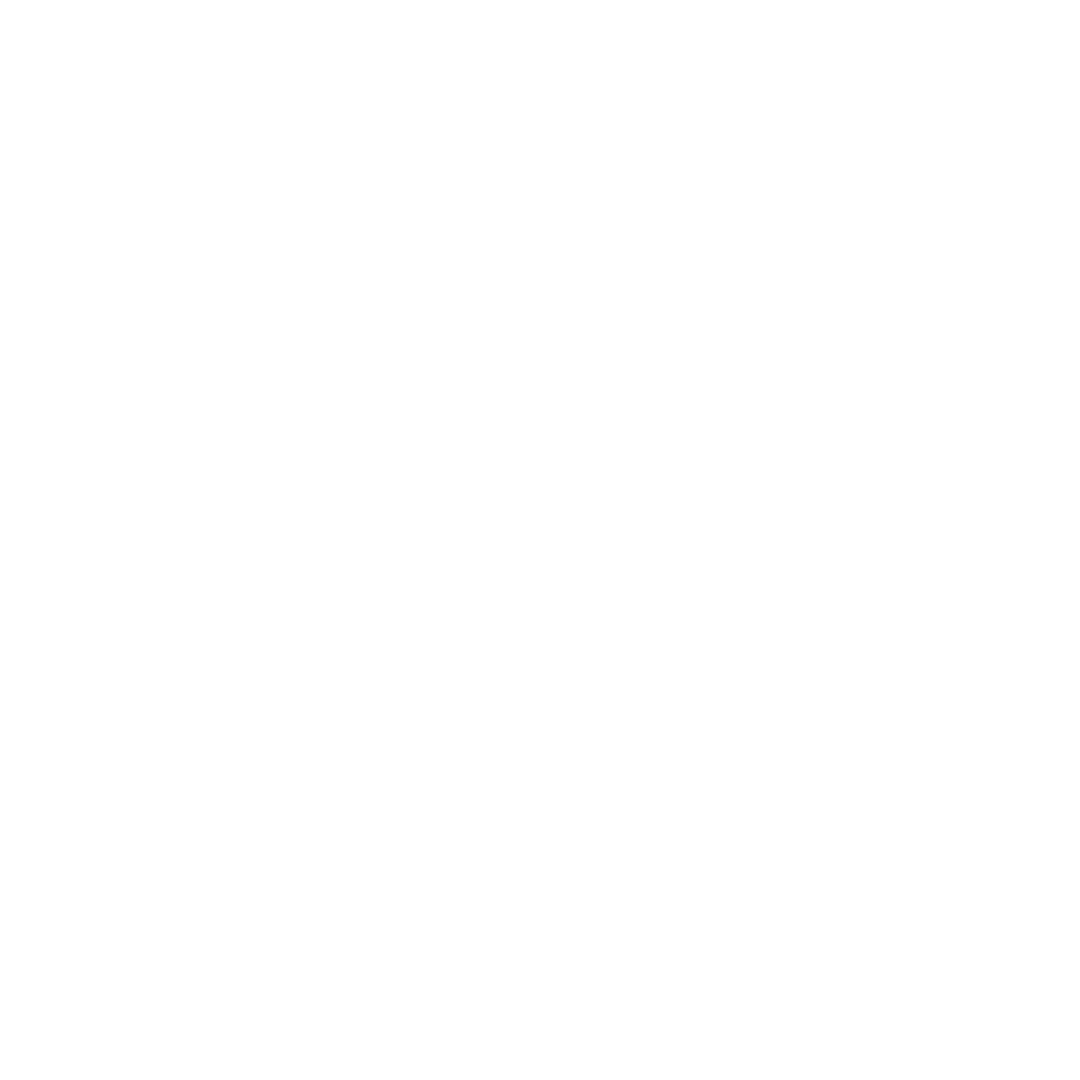

plotting and saving... 


 74%|███████████████████████████████████████████████████████▌                   | 74/100 [14:05:15<5:01:14, 695.16s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


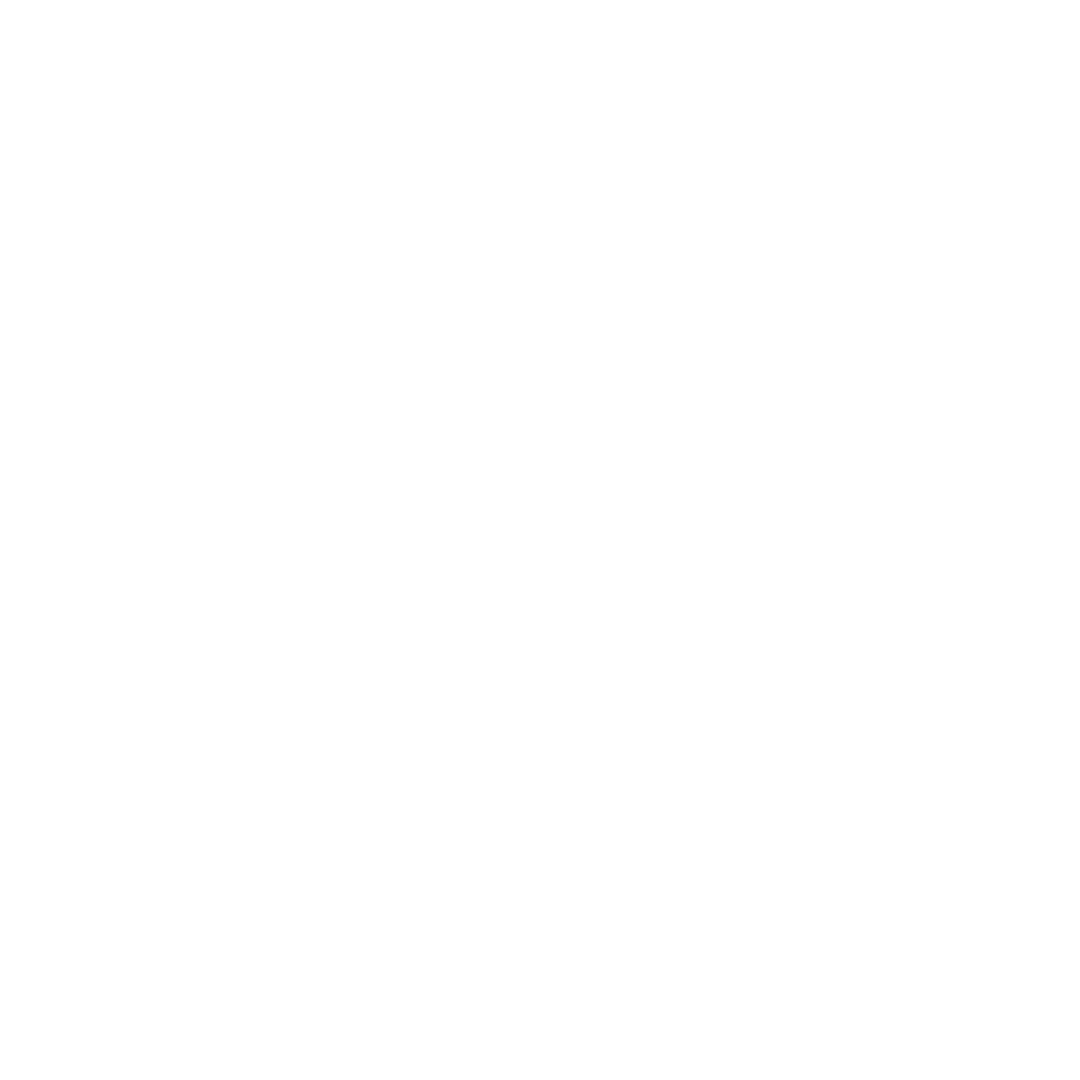

plotting and saving... 


 75%|████████████████████████████████████████████████████████▎                  | 75/100 [14:16:45<4:49:05, 693.80s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


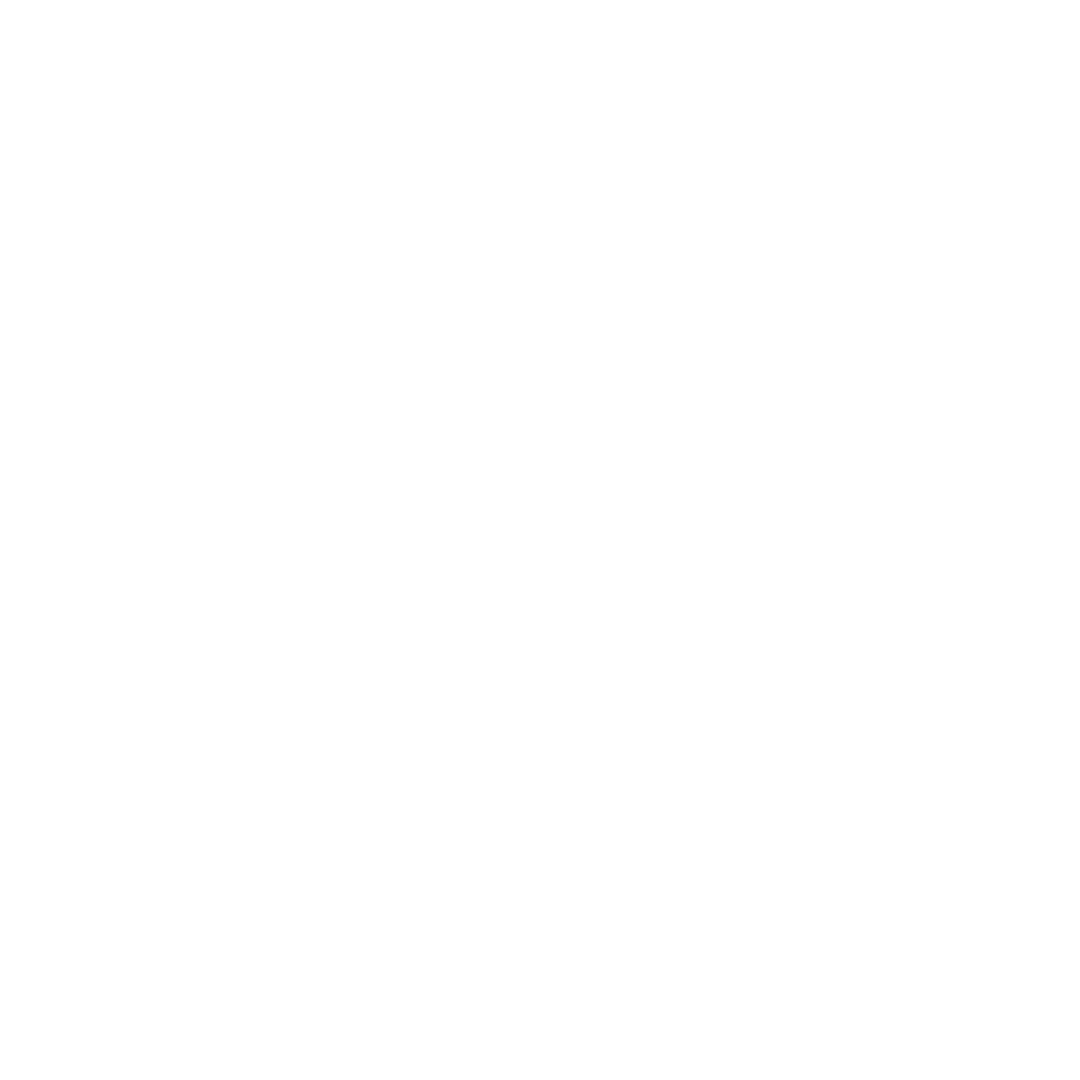

plotting and saving... 


 76%|█████████████████████████████████████████████████████████                  | 76/100 [14:28:15<4:37:04, 692.69s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


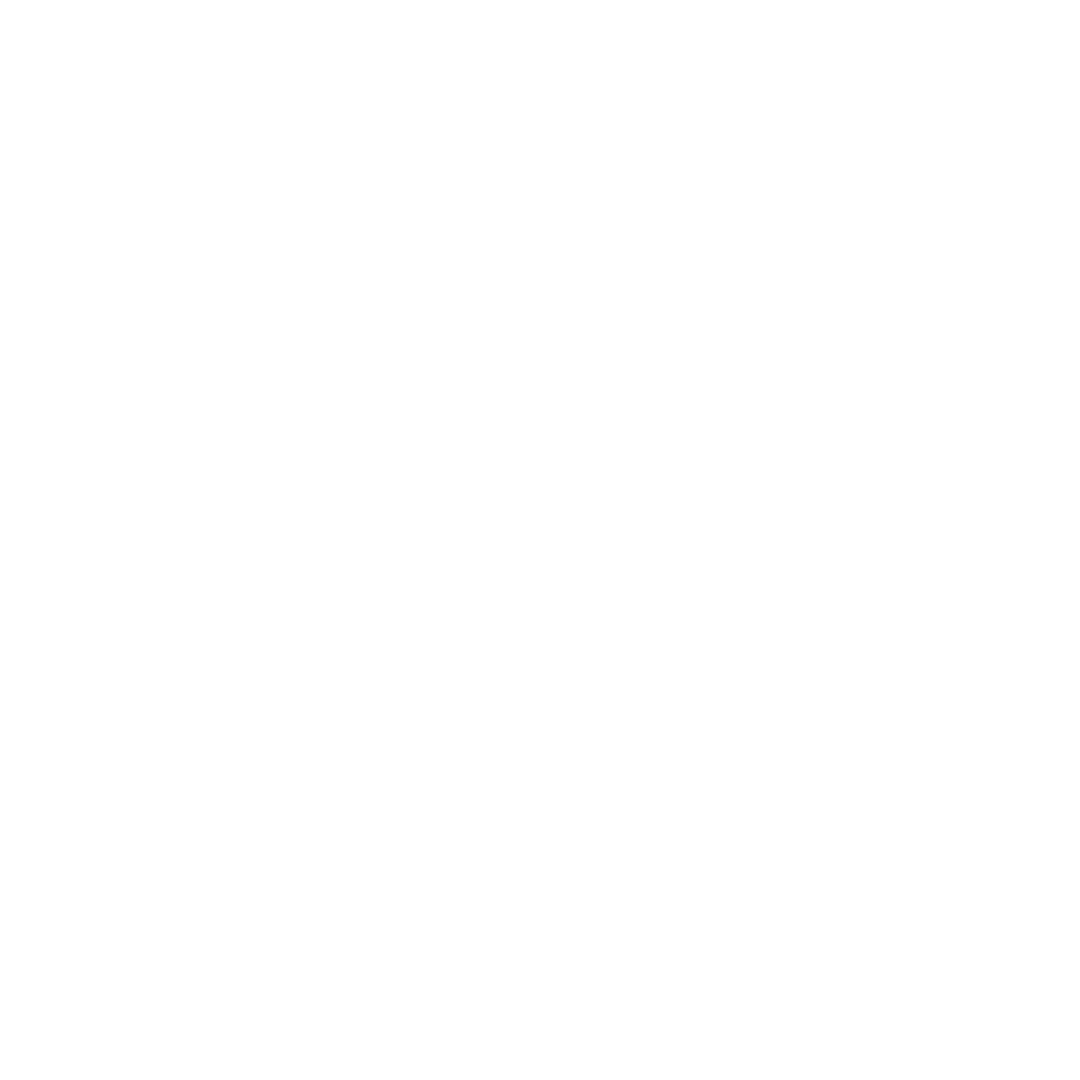

plotting and saving... 


 77%|█████████████████████████████████████████████████████████▊                 | 77/100 [14:39:51<4:25:54, 693.67s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


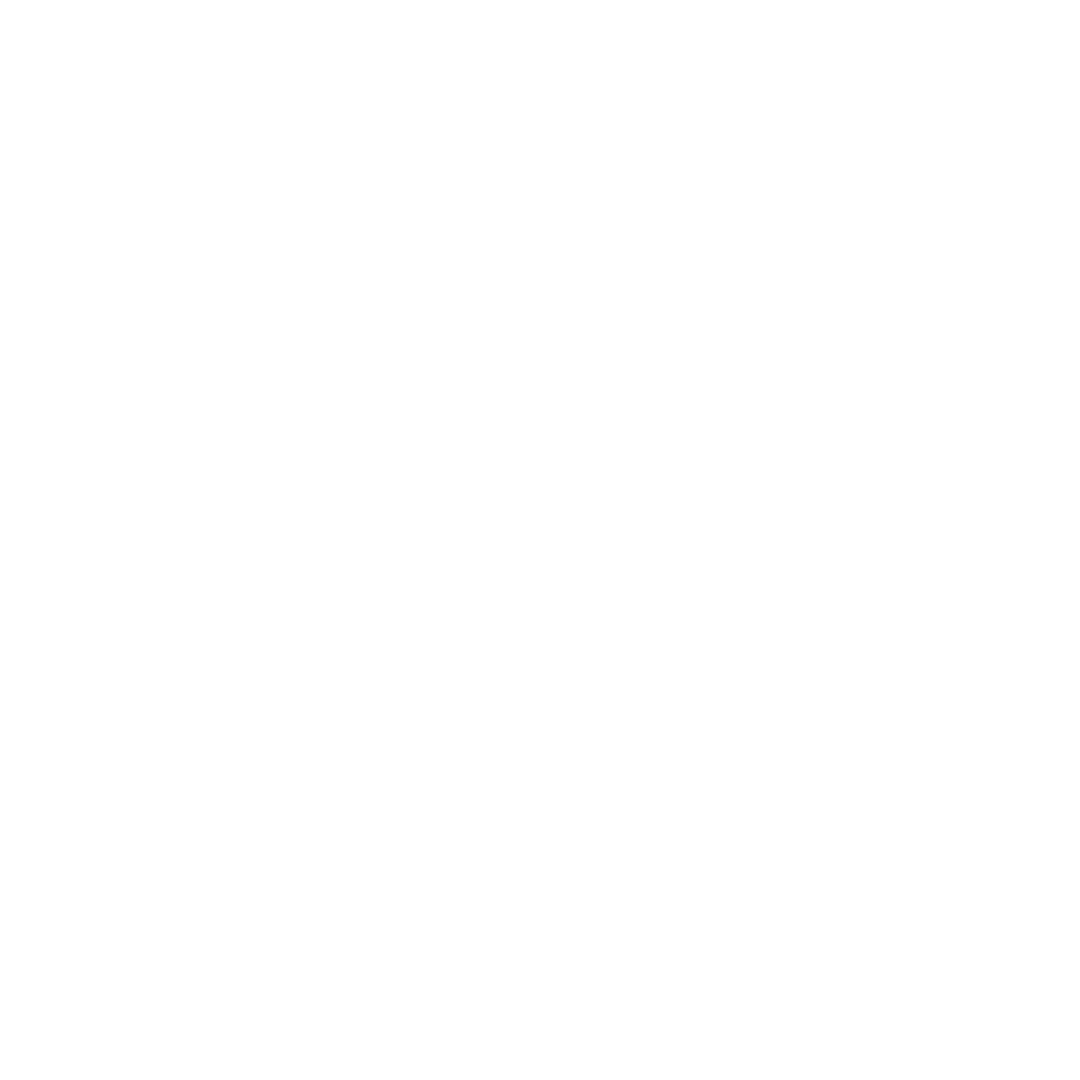

plotting and saving... 


 78%|██████████████████████████████████████████████████████████▌                | 78/100 [14:51:38<4:15:47, 697.60s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


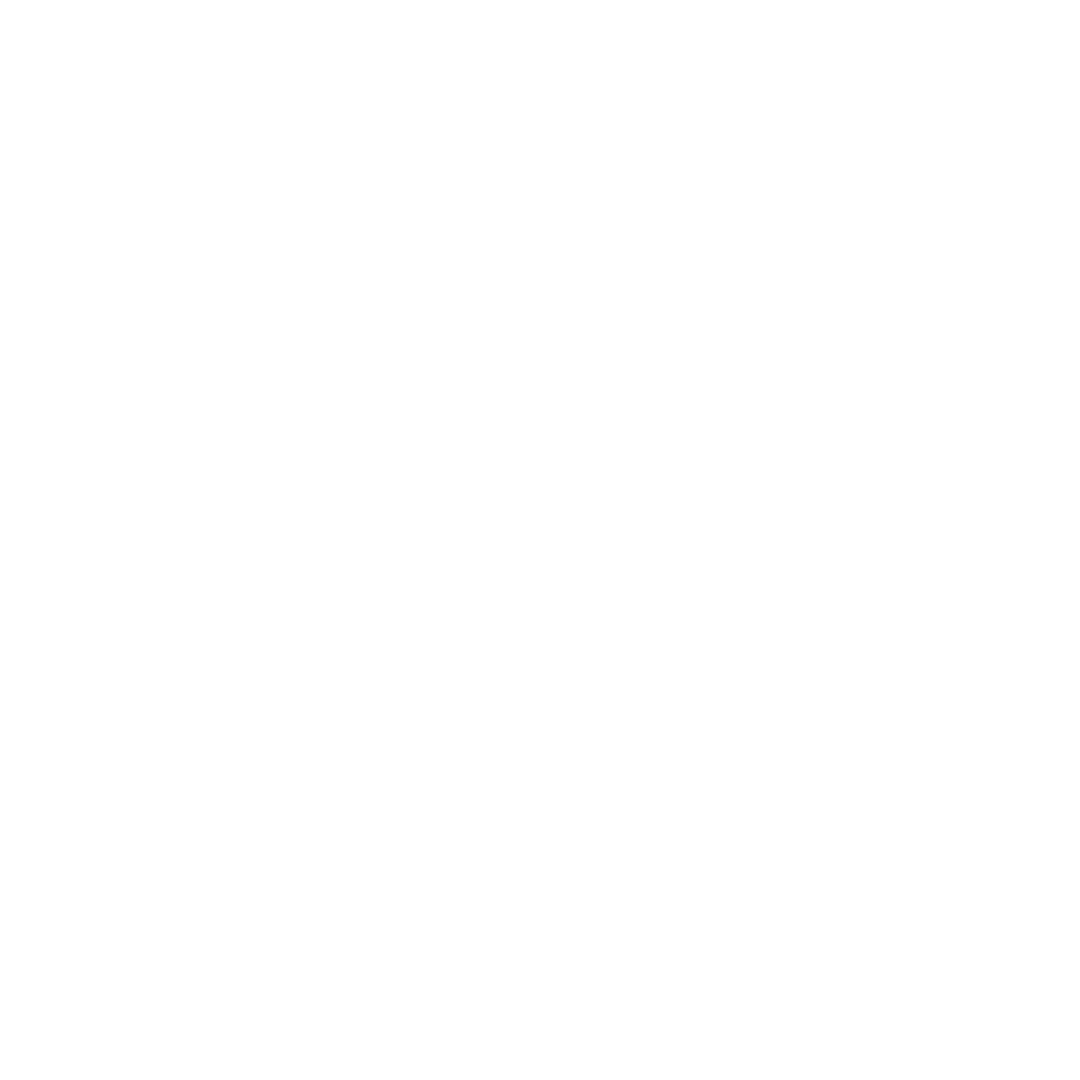

plotting and saving... 


 79%|███████████████████████████████████████████████████████████▎               | 79/100 [15:03:21<4:04:45, 699.33s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


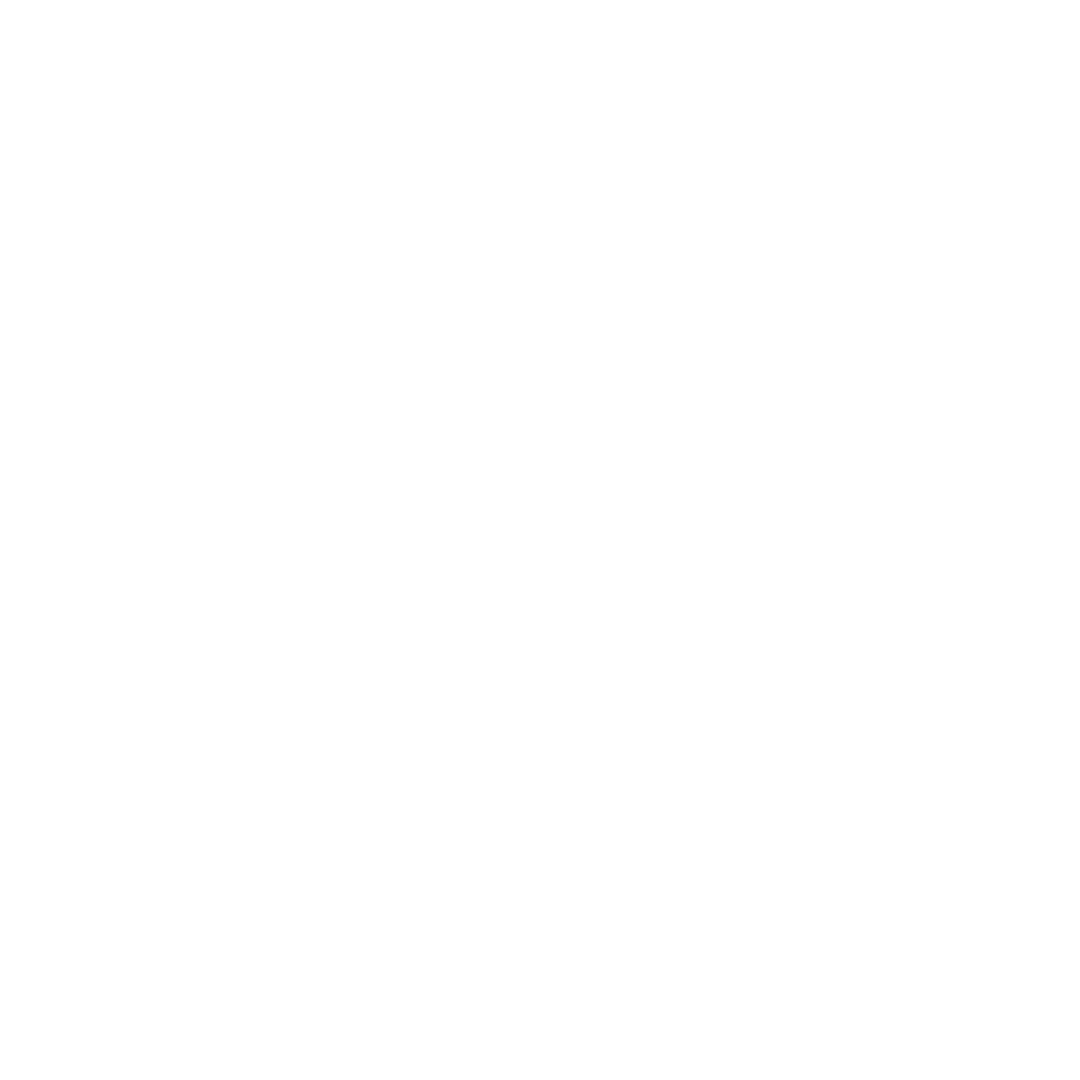

plotting and saving... 


 80%|████████████████████████████████████████████████████████████               | 80/100 [15:14:44<3:51:25, 694.27s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


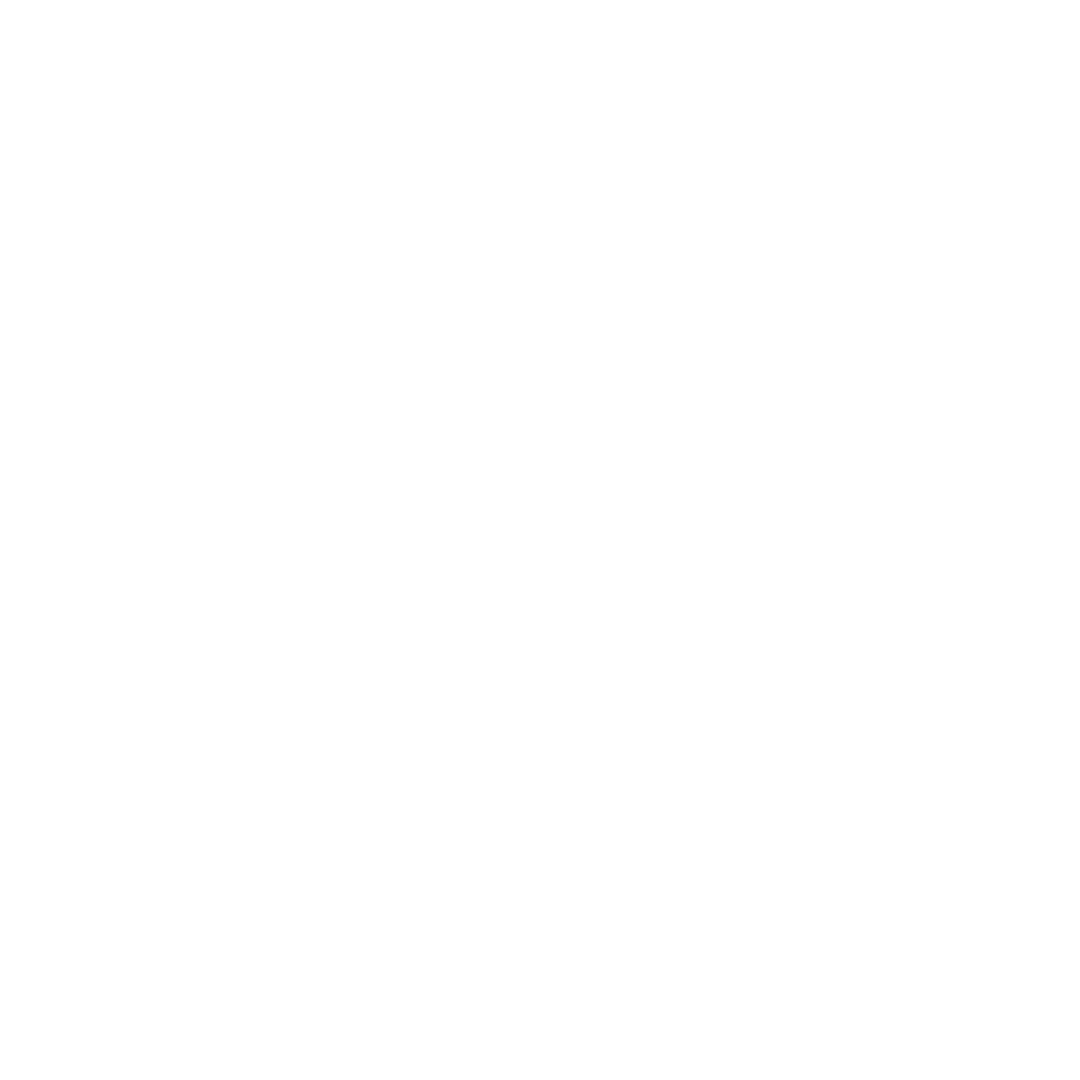

plotting and saving... 


 81%|████████████████████████████████████████████████████████████▊              | 81/100 [15:26:13<3:39:22, 692.74s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


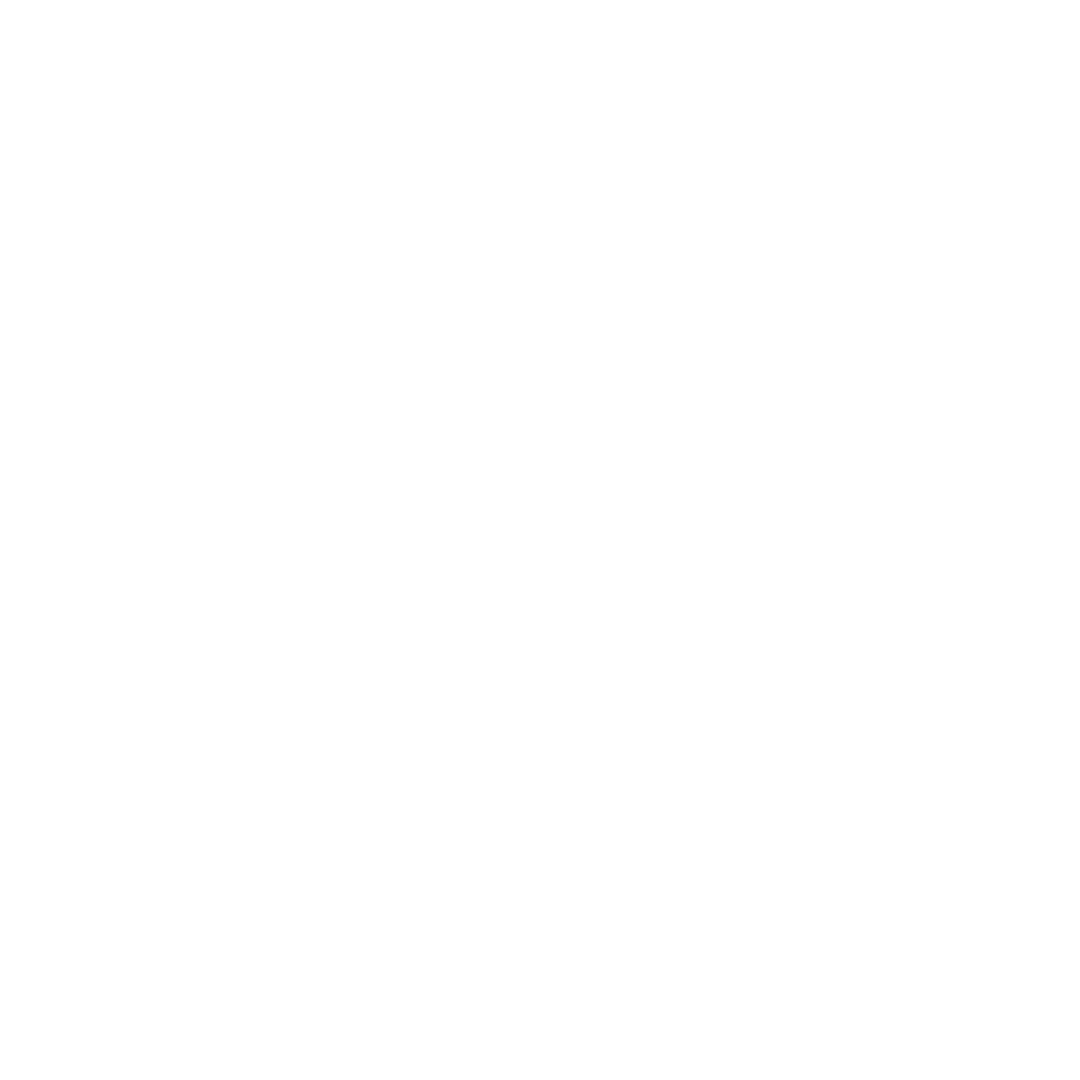

plotting and saving... 


 82%|█████████████████████████████████████████████████████████████▍             | 82/100 [15:37:49<3:28:07, 693.76s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


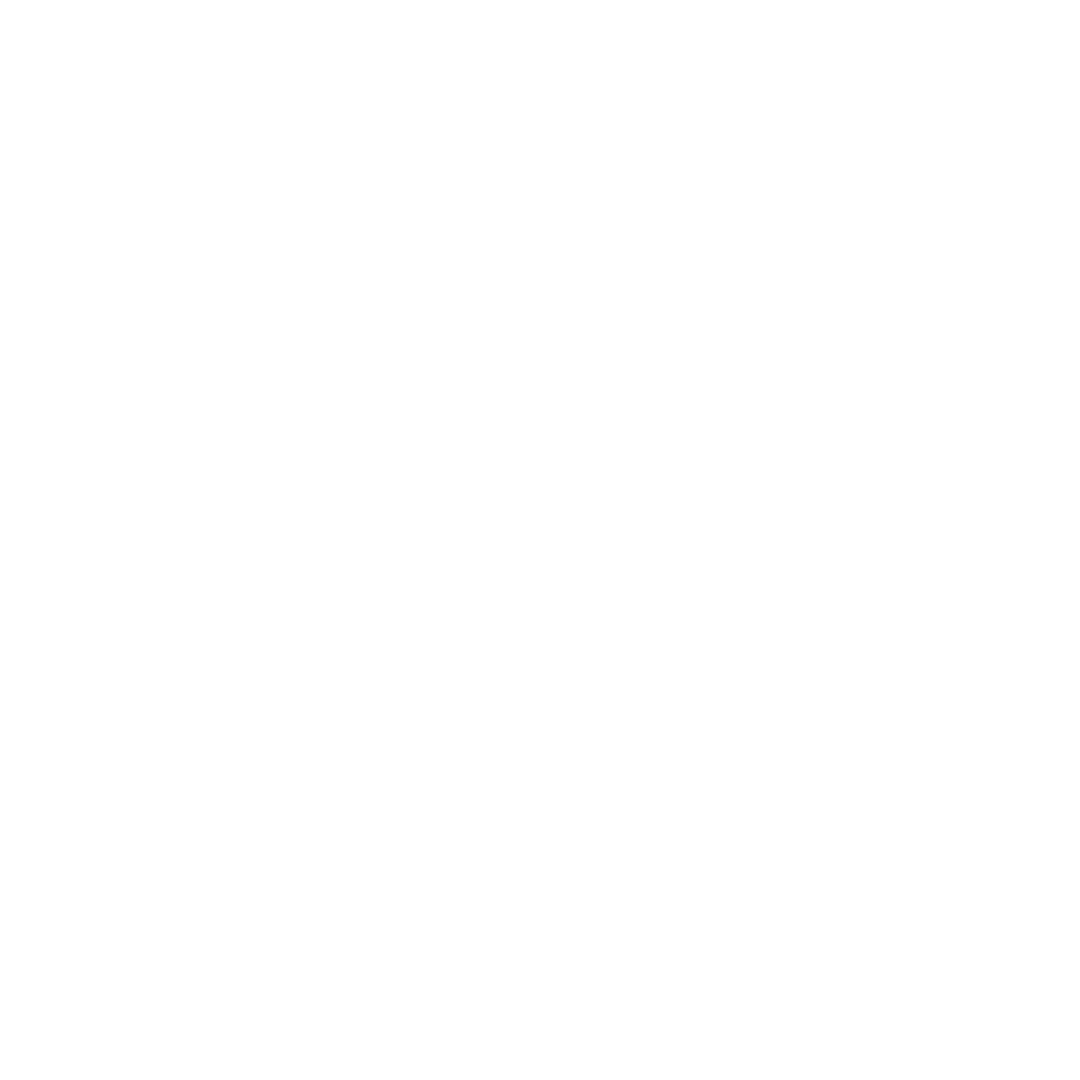

plotting and saving... 


 83%|██████████████████████████████████████████████████████████████▎            | 83/100 [15:49:31<3:17:13, 696.09s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


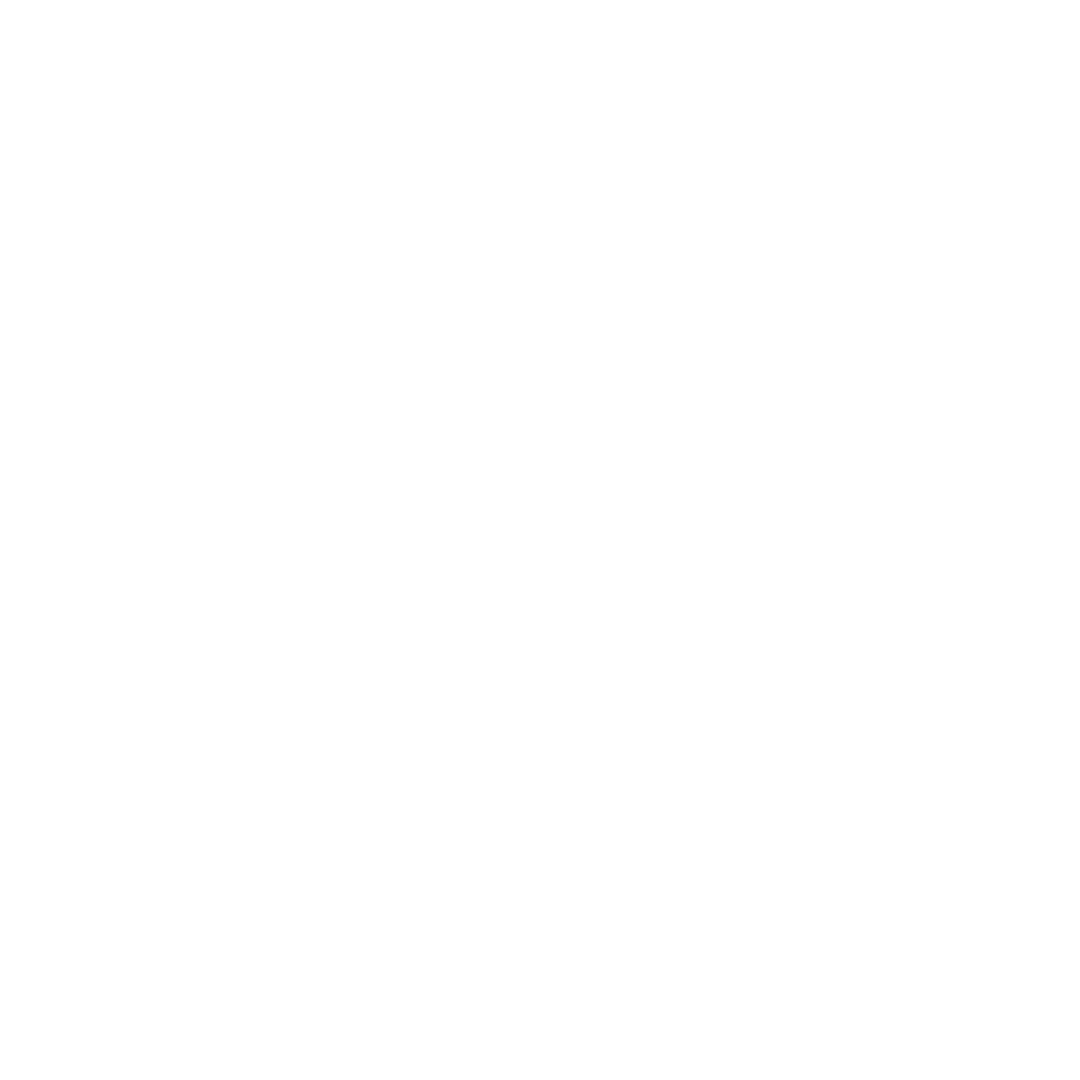

plotting and saving... 


 84%|███████████████████████████████████████████████████████████████            | 84/100 [16:00:53<3:04:30, 691.89s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


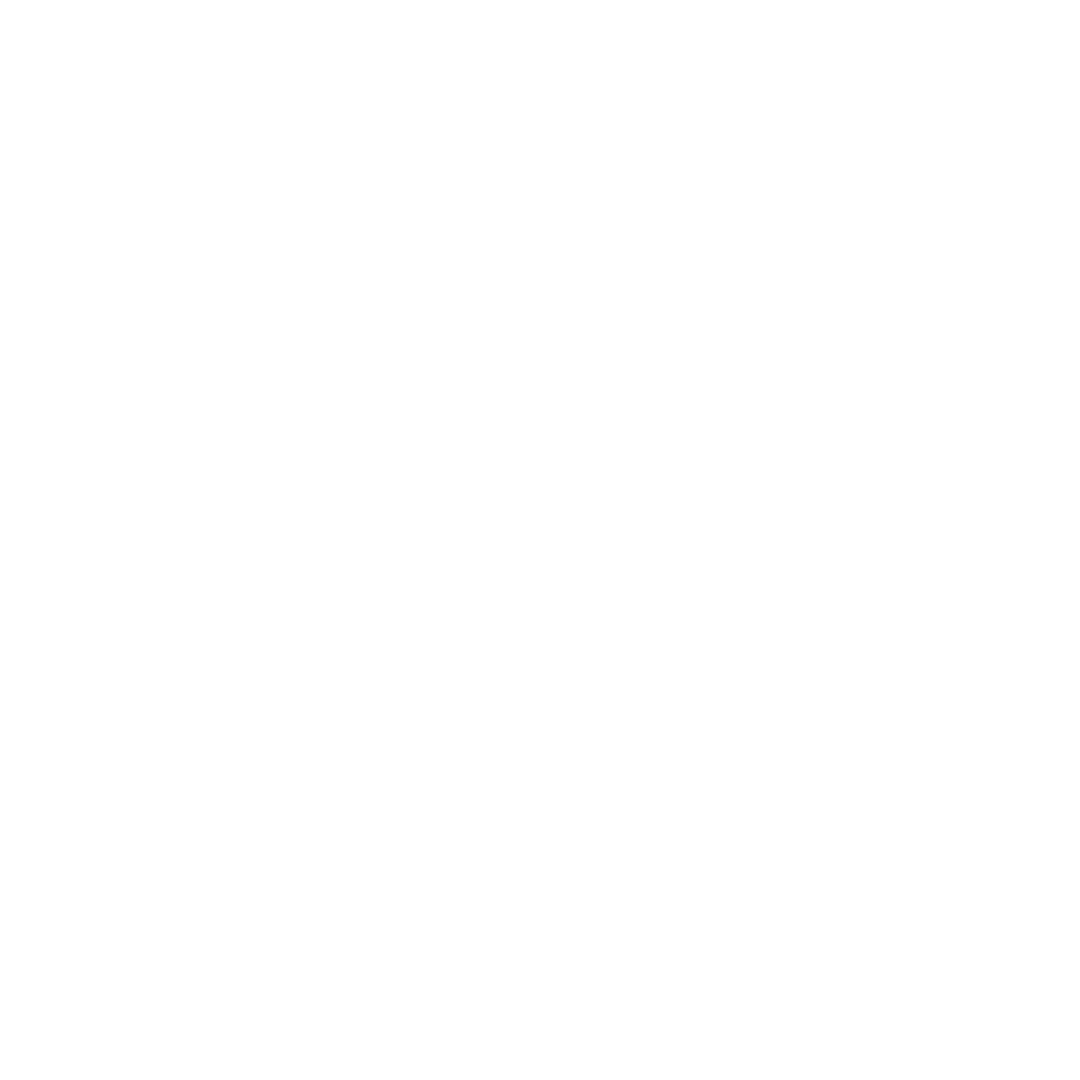

plotting and saving... 


 85%|███████████████████████████████████████████████████████████████▊           | 85/100 [16:11:53<2:50:36, 682.42s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


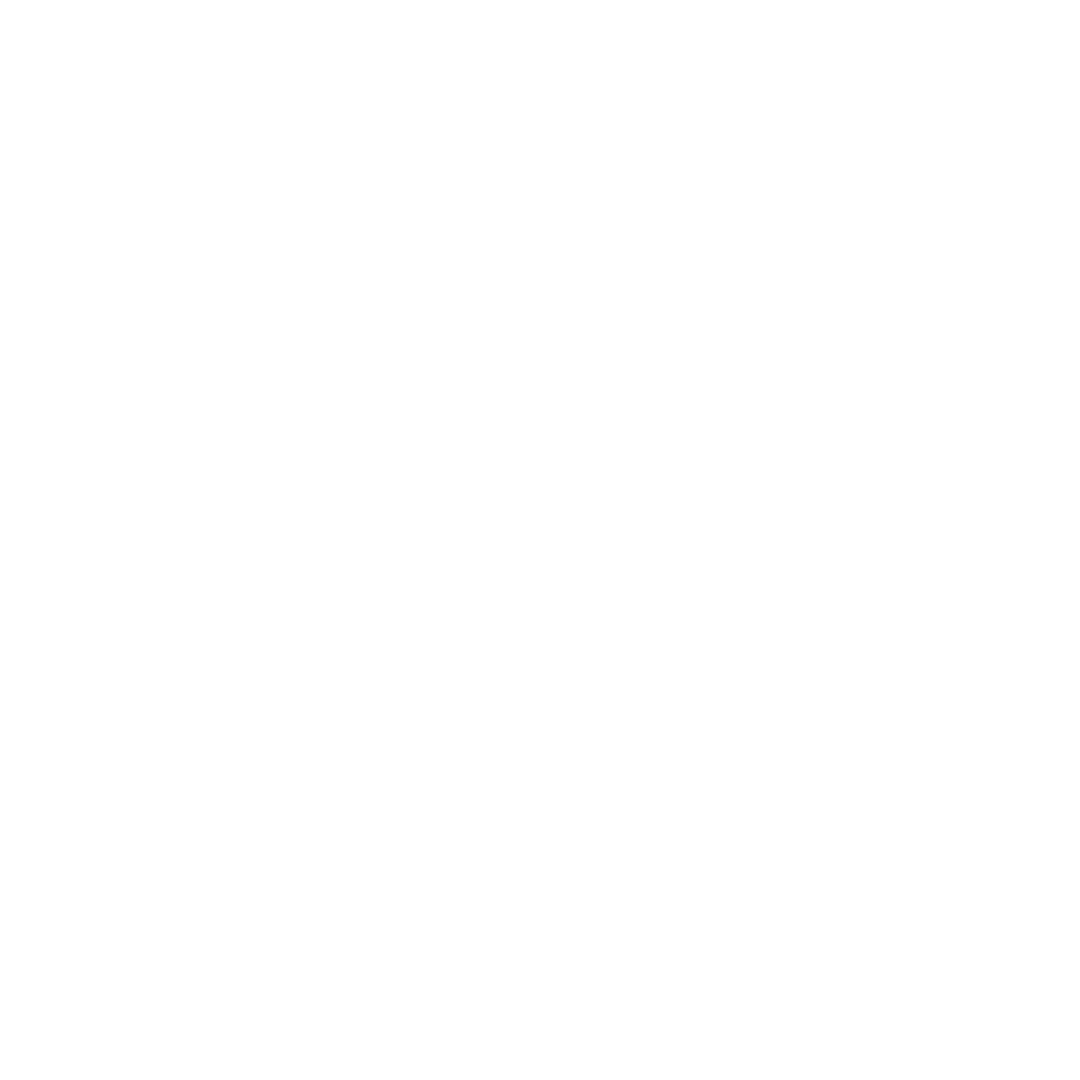

plotting and saving... 


 86%|████████████████████████████████████████████████████████████████▌          | 86/100 [16:23:14<2:39:06, 681.87s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


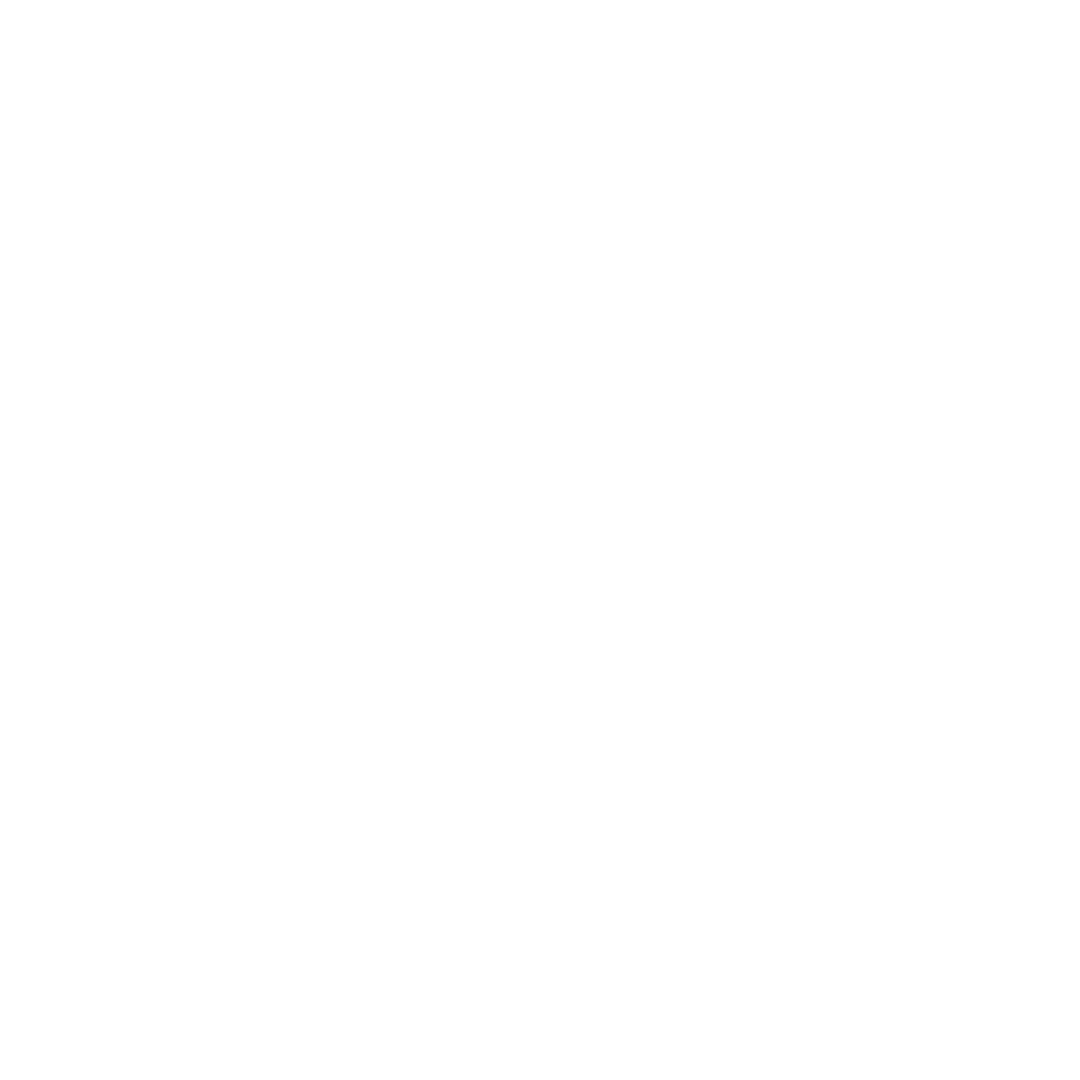

plotting and saving... 


 87%|█████████████████████████████████████████████████████████████████▎         | 87/100 [16:34:32<2:27:30, 680.82s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


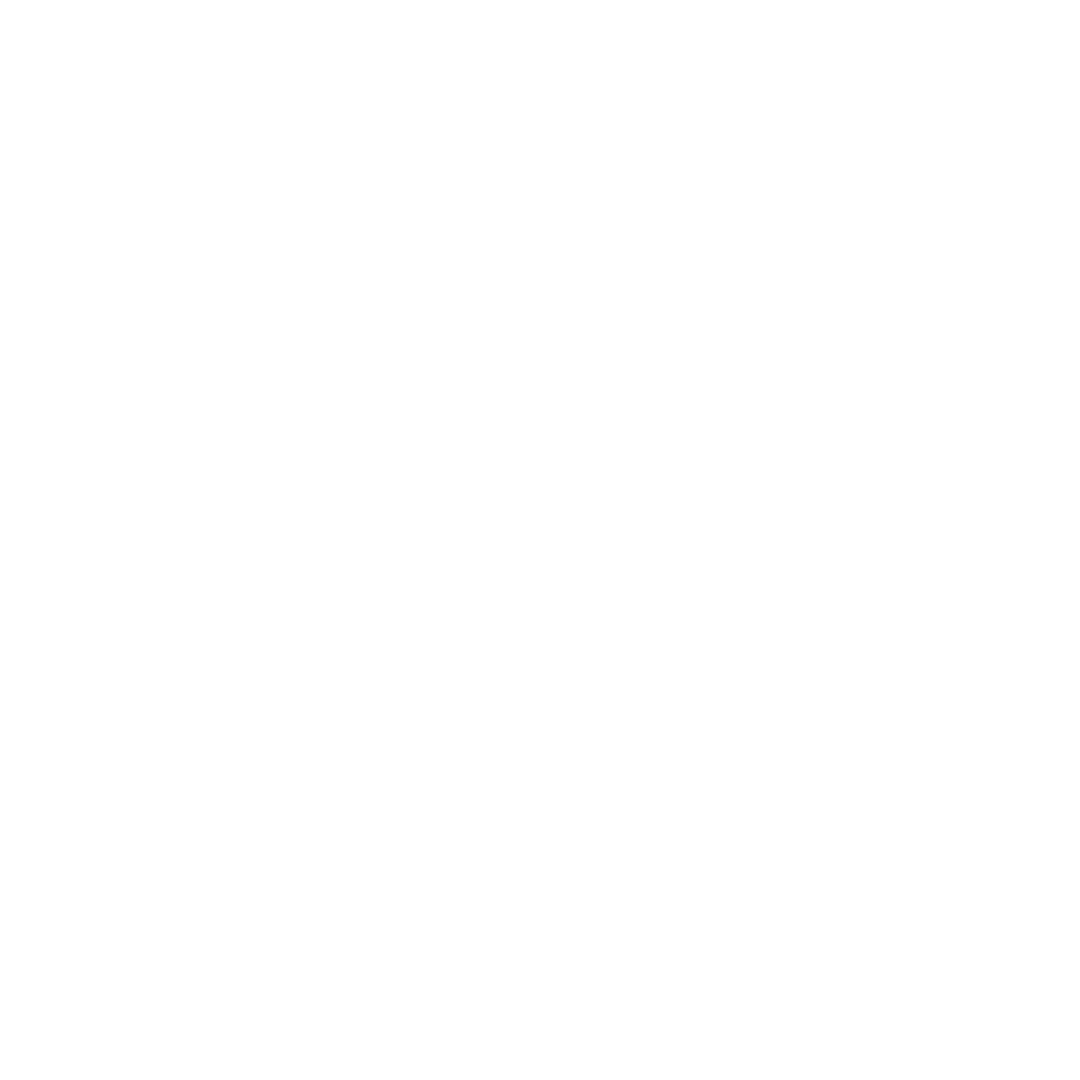

plotting and saving... 


 88%|██████████████████████████████████████████████████████████████████         | 88/100 [16:46:10<2:17:10, 685.84s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


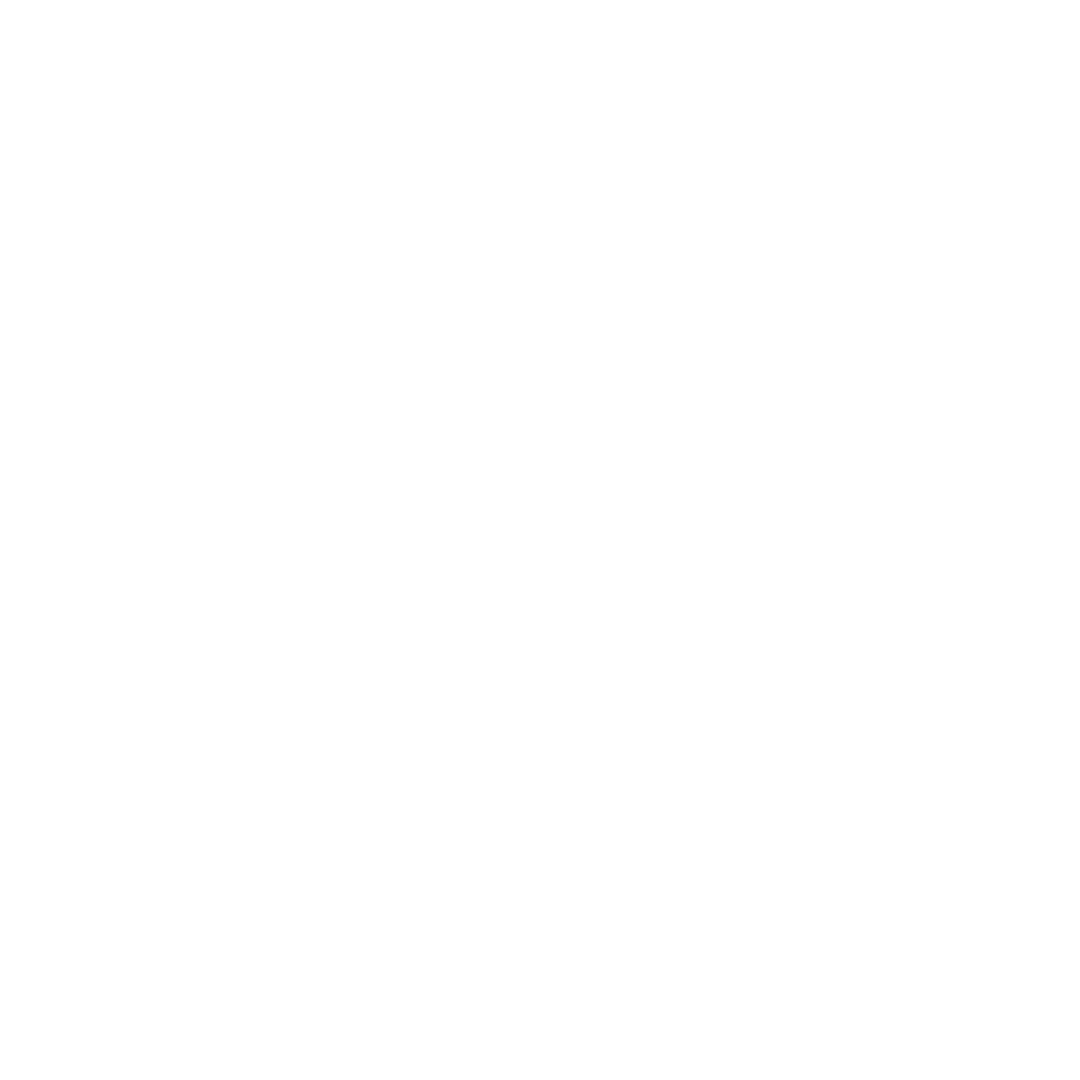

plotting and saving... 


 89%|██████████████████████████████████████████████████████████████████▊        | 89/100 [16:57:38<2:05:53, 686.71s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


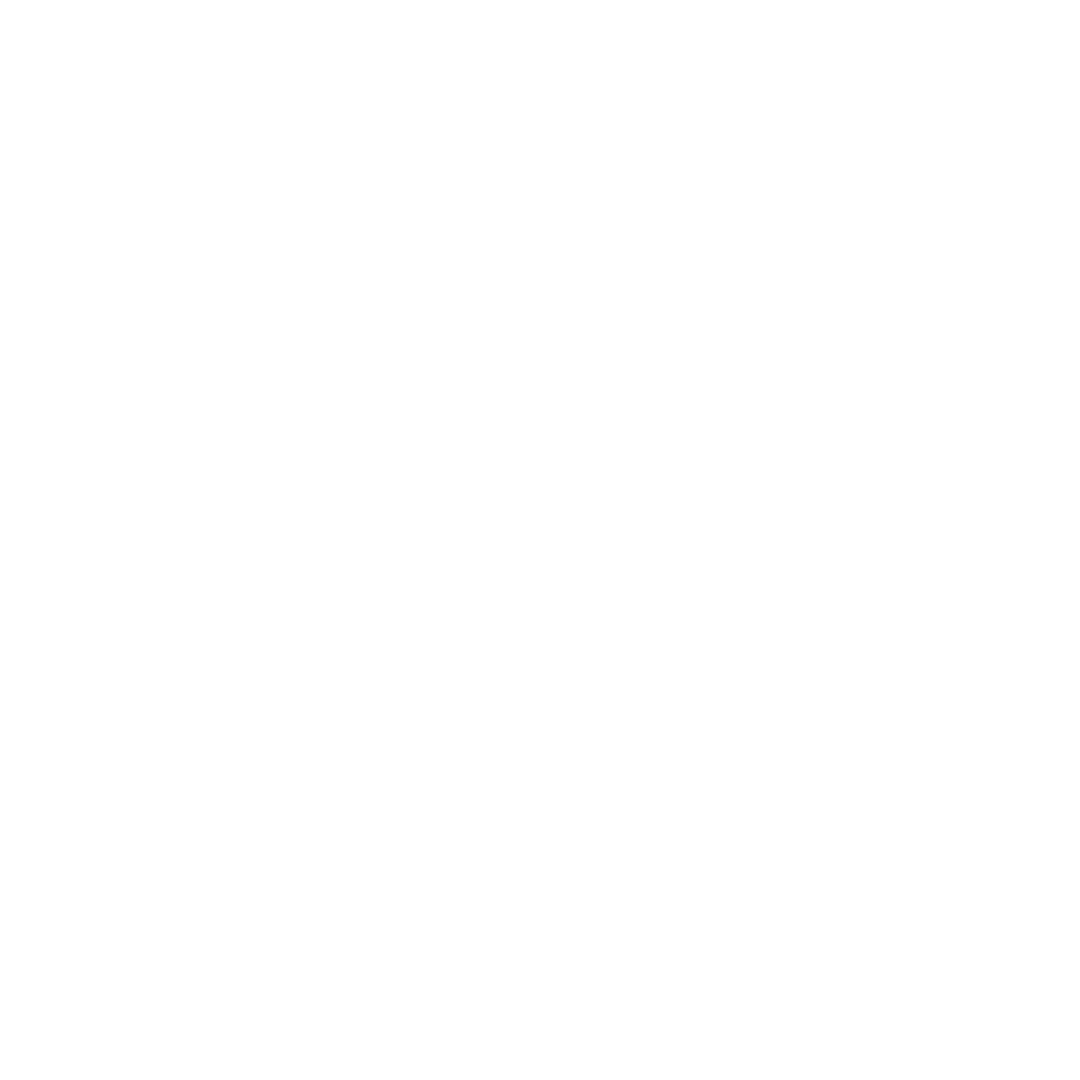

plotting and saving... 


 90%|███████████████████████████████████████████████████████████████████▌       | 90/100 [17:08:42<1:53:17, 679.78s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


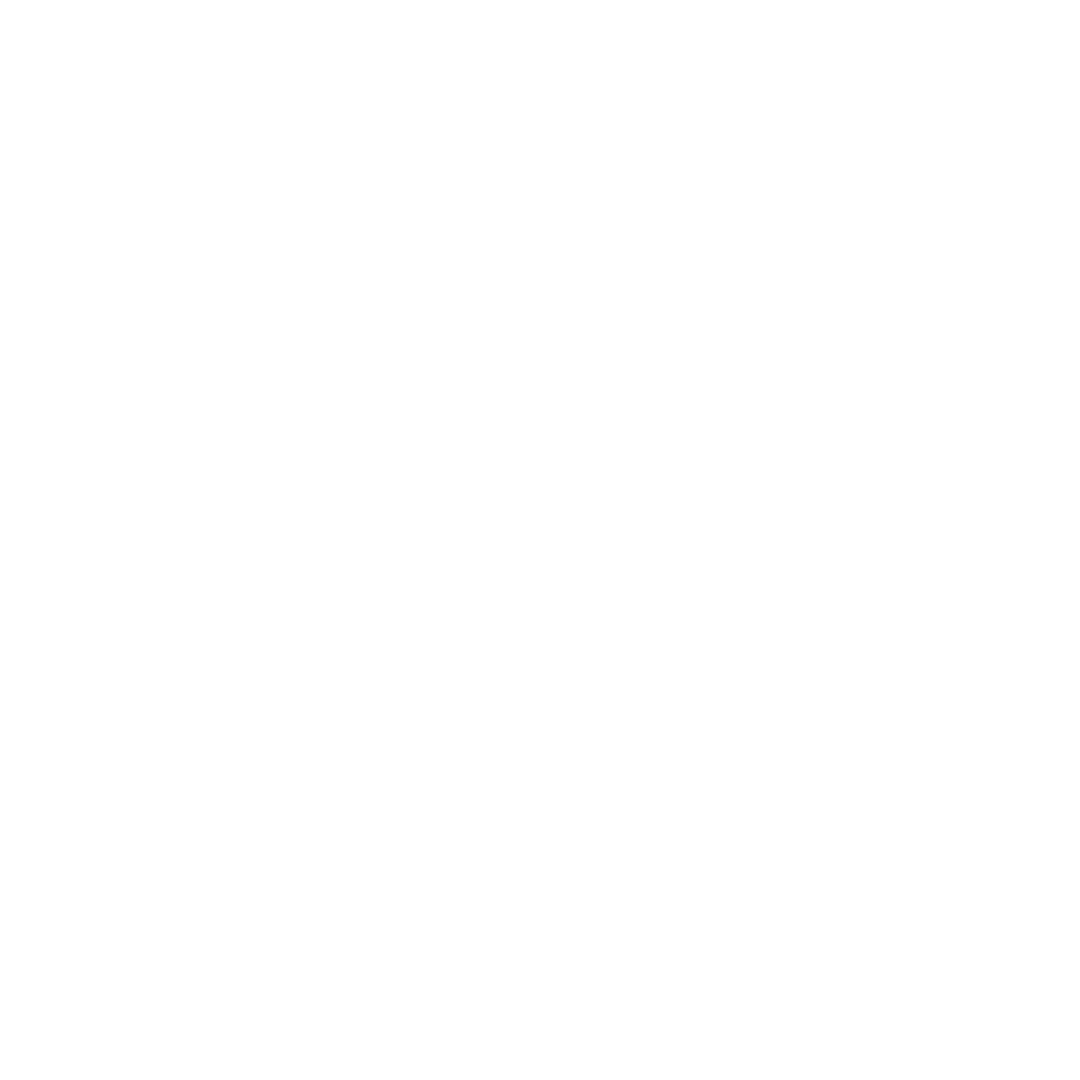

plotting and saving... 


 91%|████████████████████████████████████████████████████████████████████▎      | 91/100 [17:19:42<1:41:05, 673.93s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


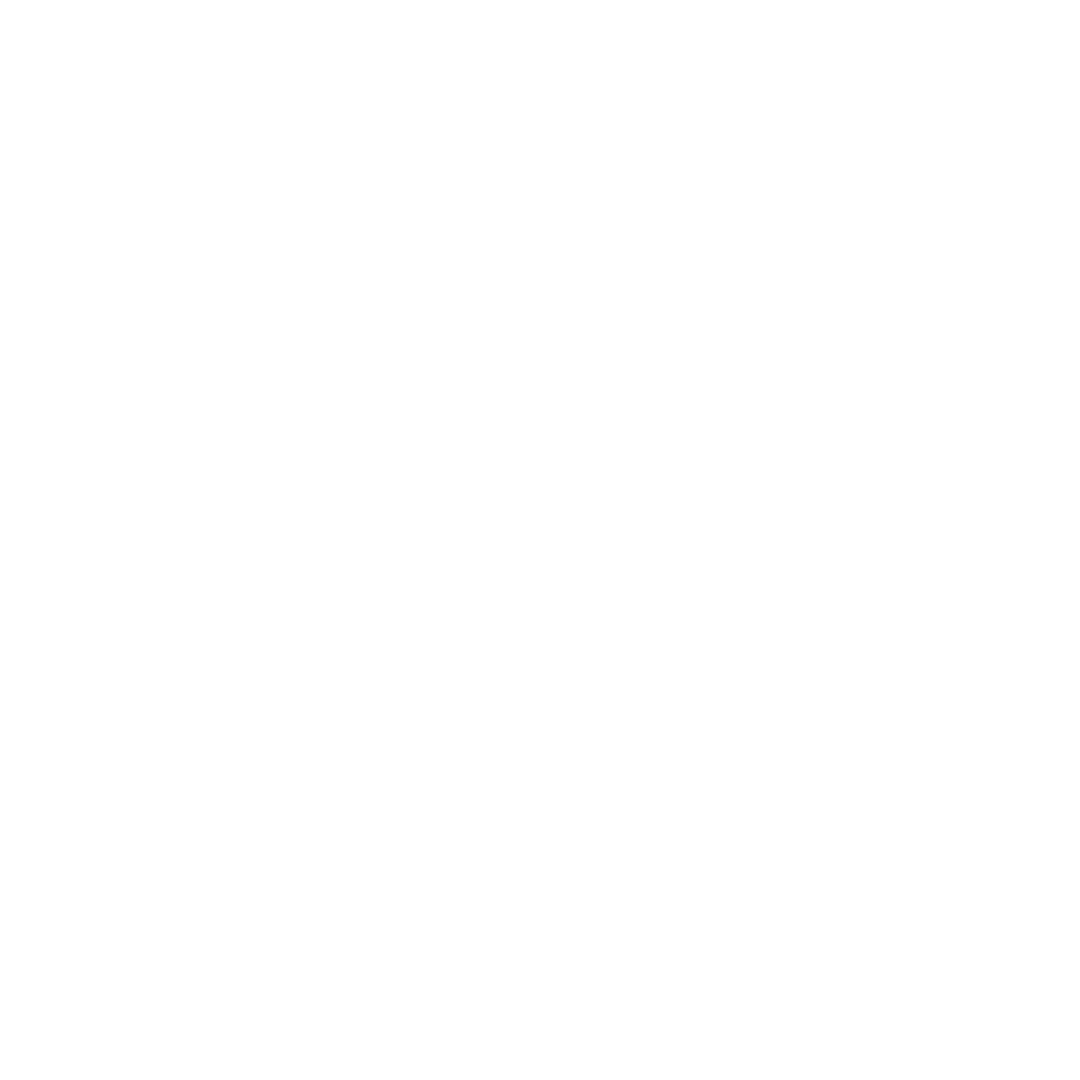

plotting and saving... 


 92%|█████████████████████████████████████████████████████████████████████      | 92/100 [17:30:58<1:29:55, 674.45s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


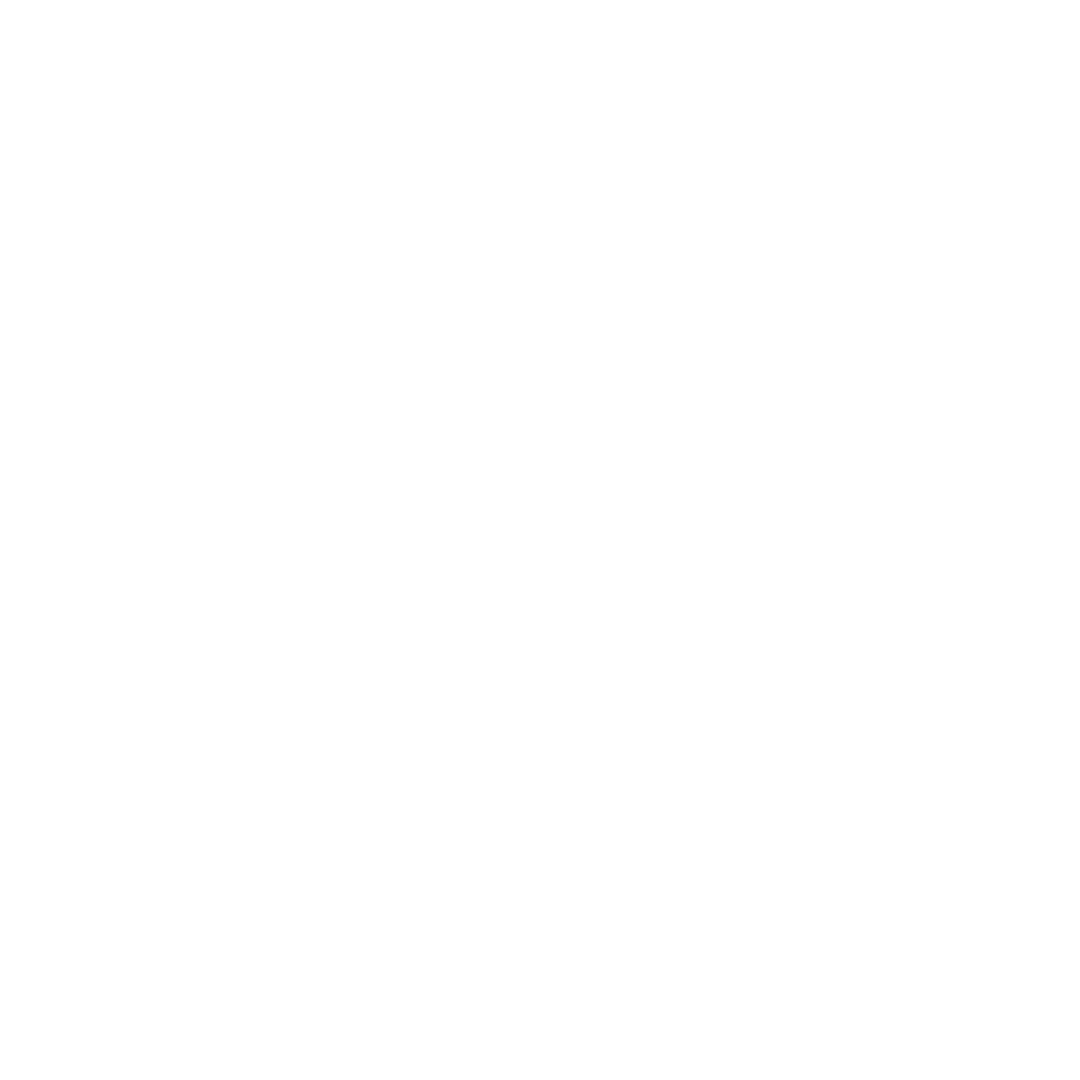

plotting and saving... 


 93%|█████████████████████████████████████████████████████████████████████▊     | 93/100 [17:41:50<1:17:55, 667.87s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


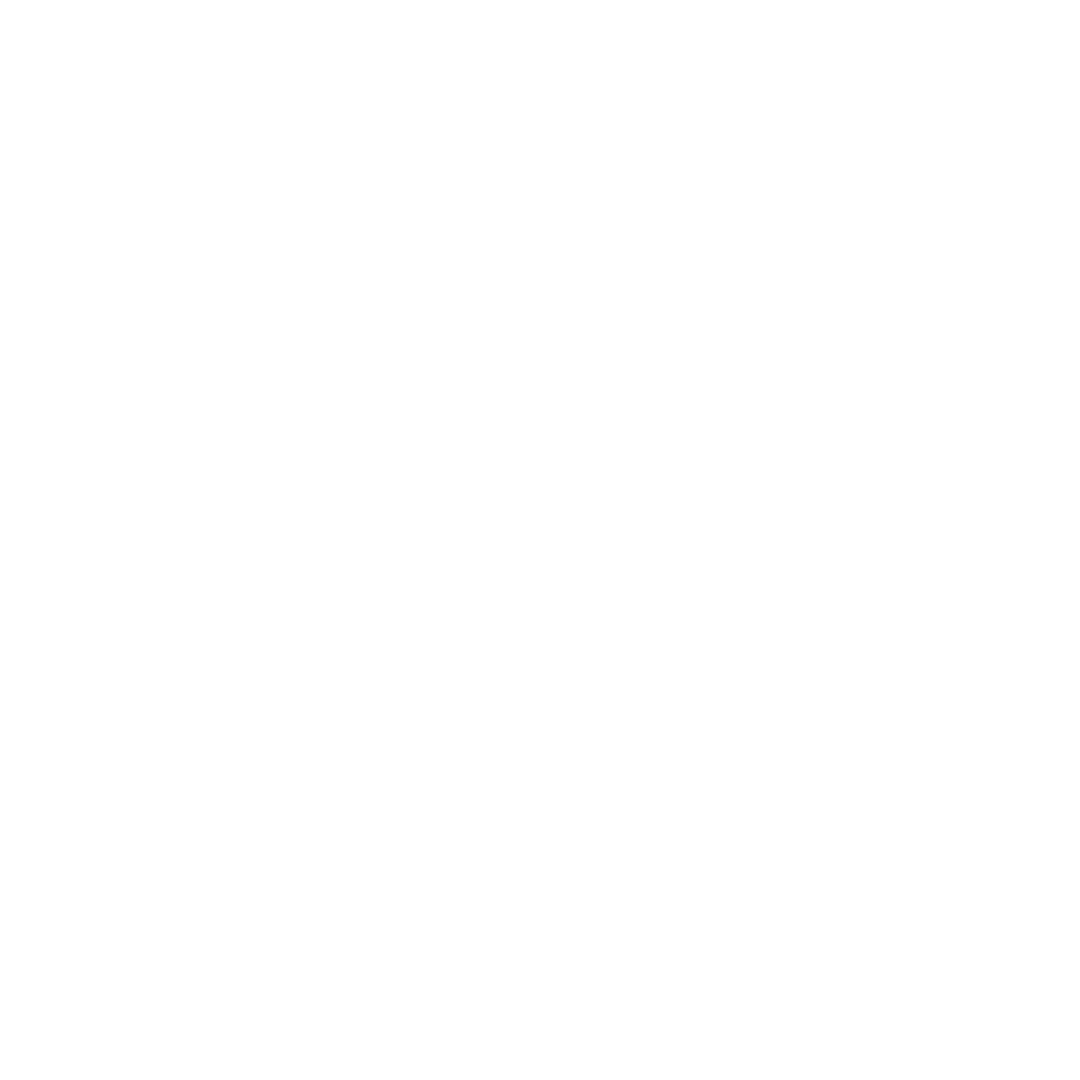

plotting and saving... 


 94%|██████████████████████████████████████████████████████████████████████▌    | 94/100 [17:53:08<1:07:04, 670.82s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


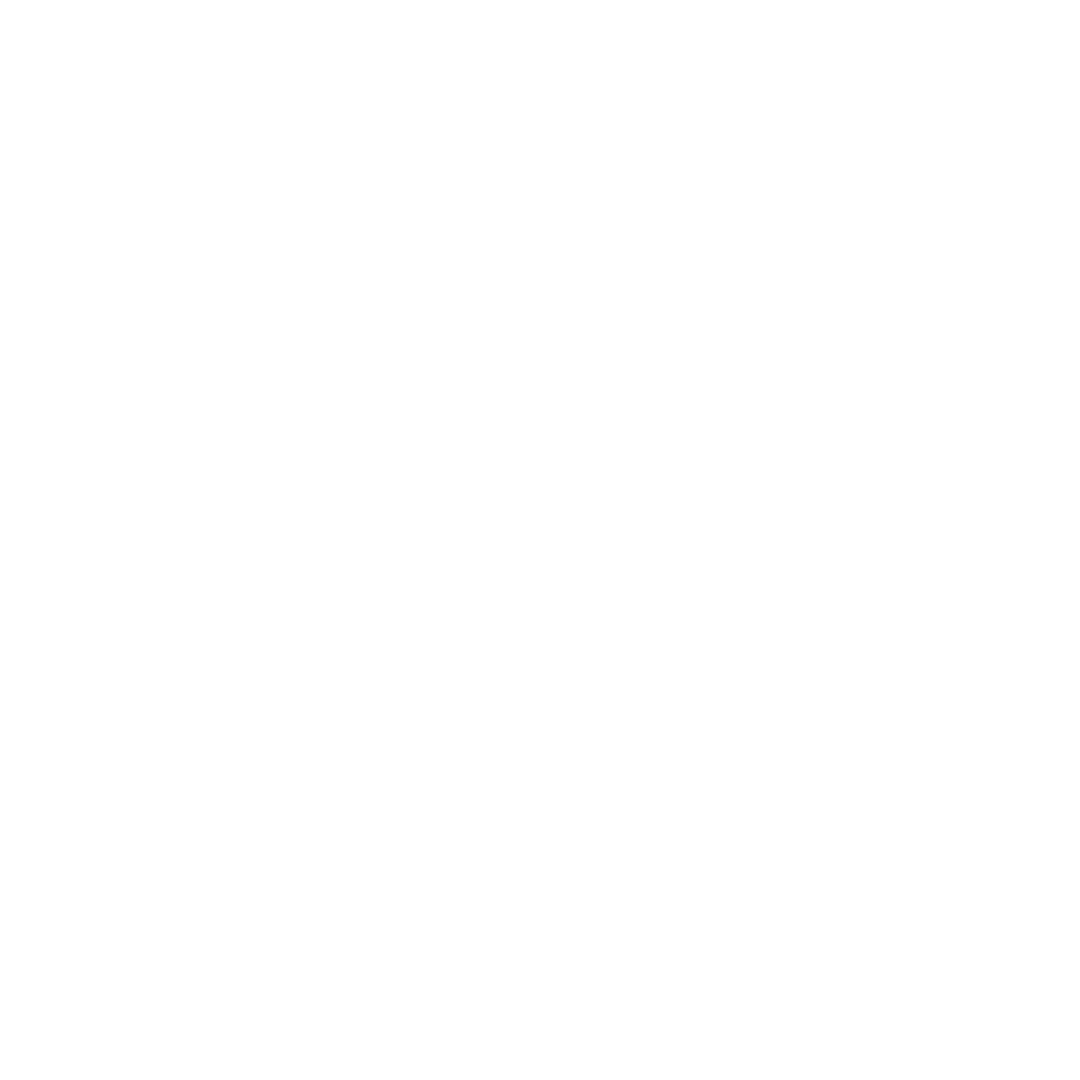

plotting and saving... 


 95%|█████████████████████████████████████████████████████████████████████████▏   | 95/100 [18:04:07<55:36, 667.27s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


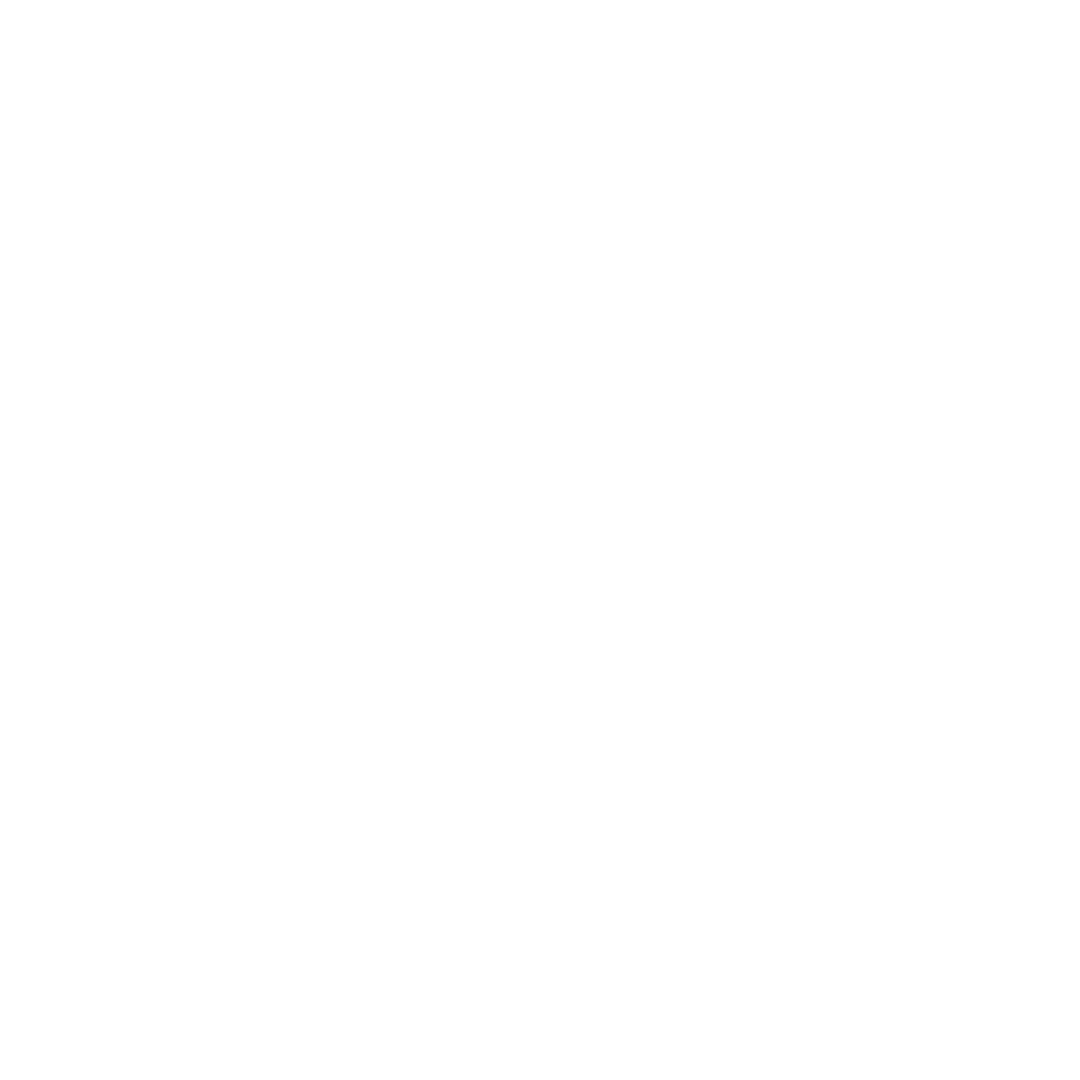

plotting and saving... 


 96%|█████████████████████████████████████████████████████████████████████████▉   | 96/100 [18:14:59<44:10, 662.68s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


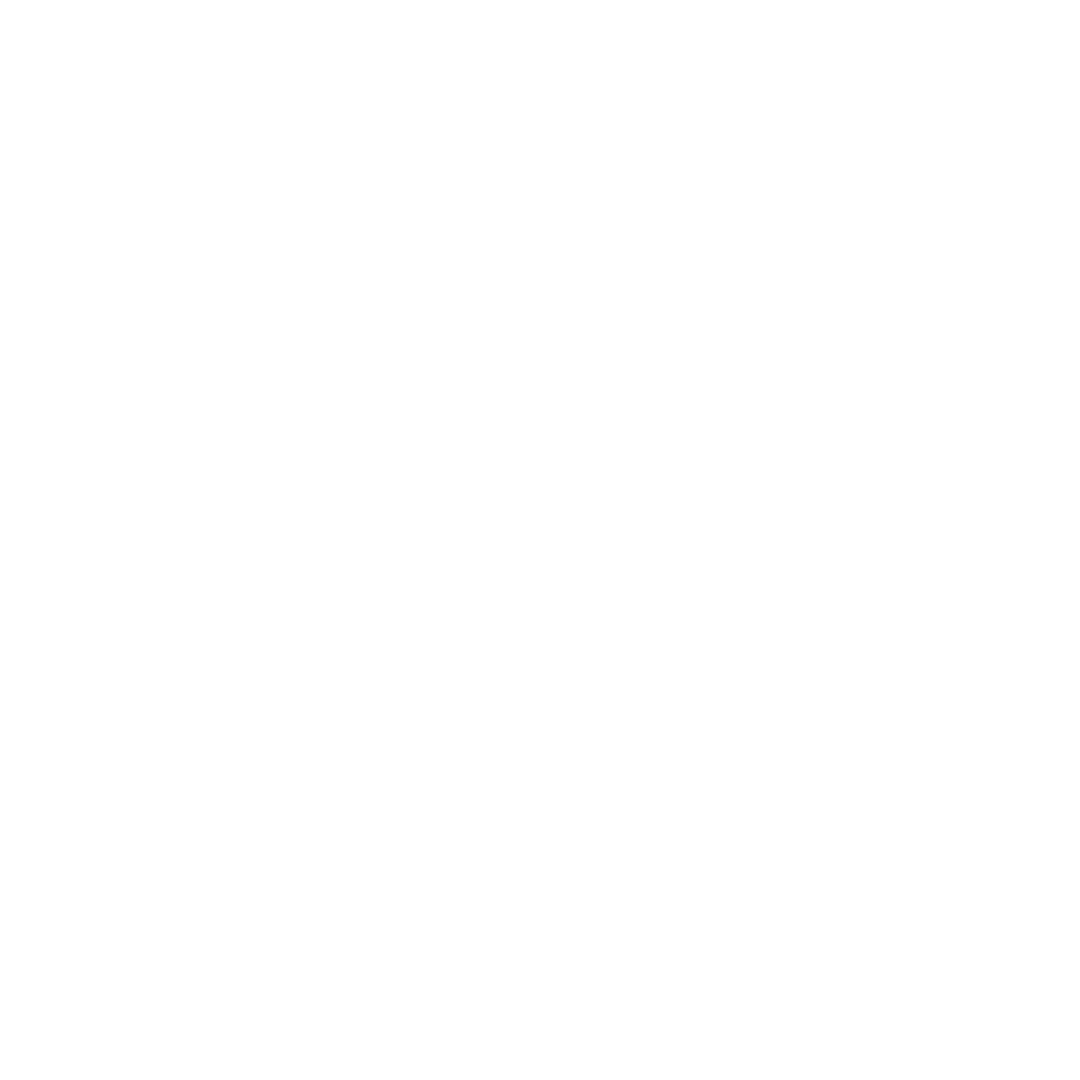

plotting and saving... 


 97%|██████████████████████████████████████████████████████████████████████████▋  | 97/100 [18:26:40<33:41, 673.98s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


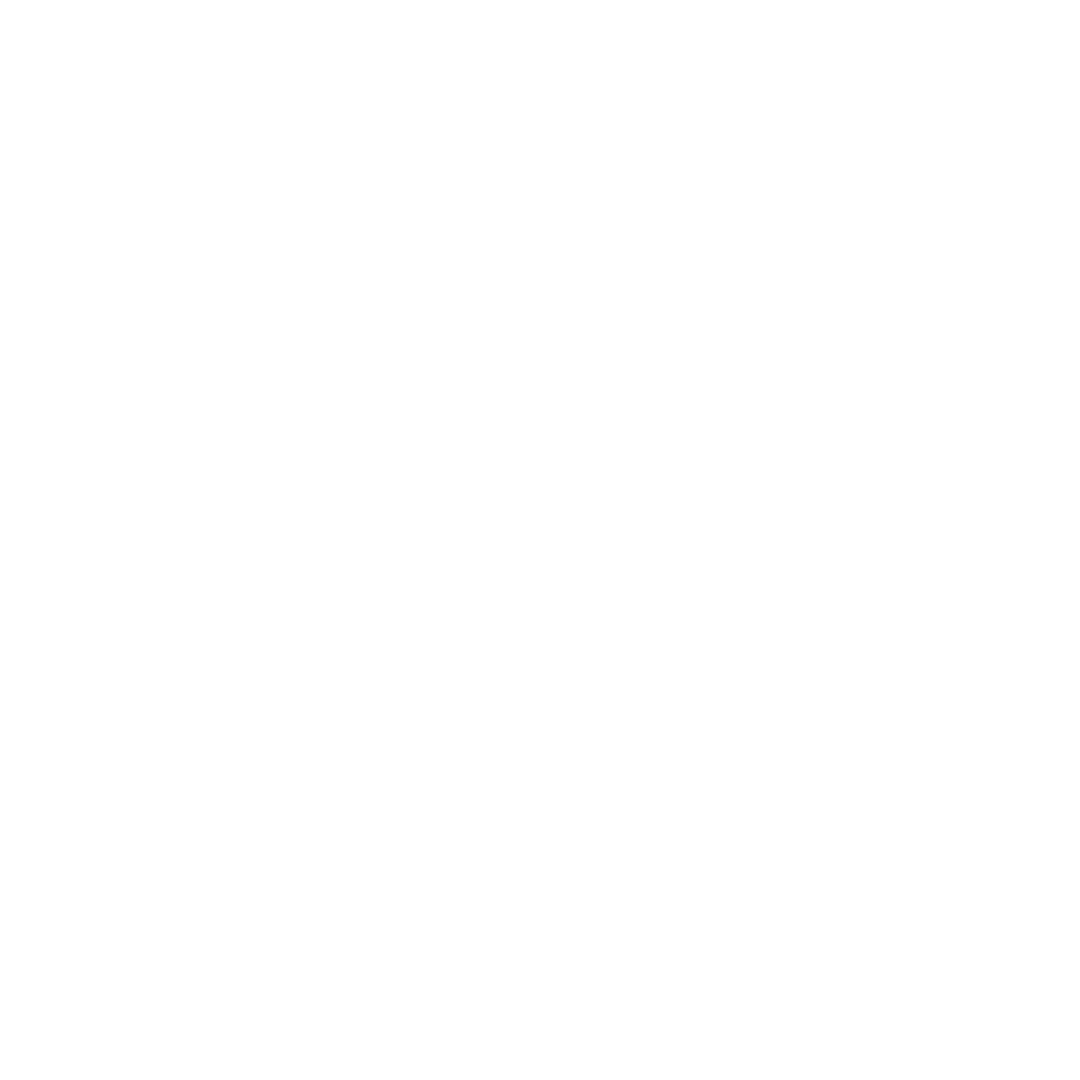

plotting and saving... 


 98%|███████████████████████████████████████████████████████████████████████████▍ | 98/100 [18:37:58<22:30, 675.26s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


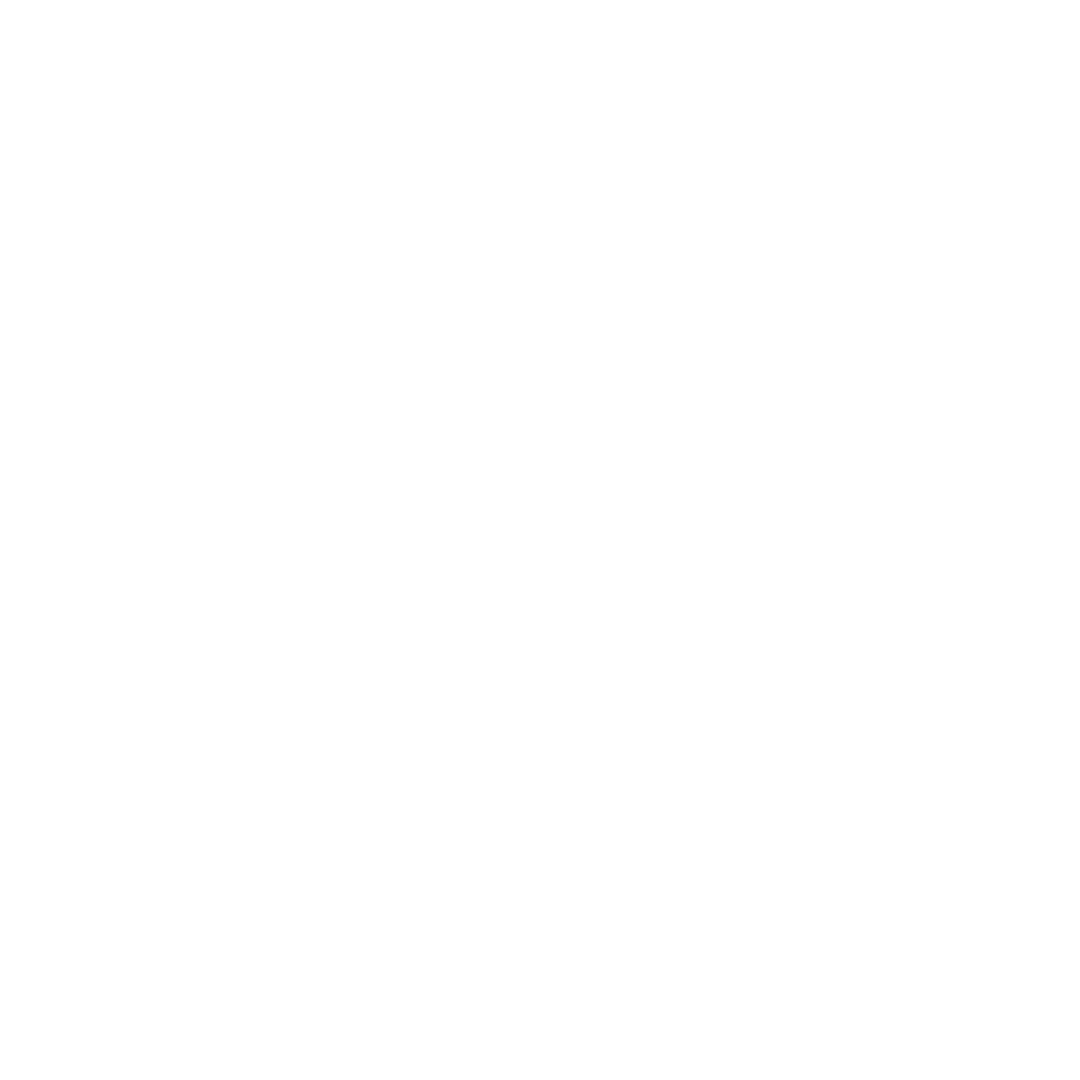

plotting and saving... 


 99%|████████████████████████████████████████████████████████████████████████████▏| 99/100 [18:49:40<11:23, 683.35s/it]

calculating correlations... 


<IPython.core.display.Javascript object>


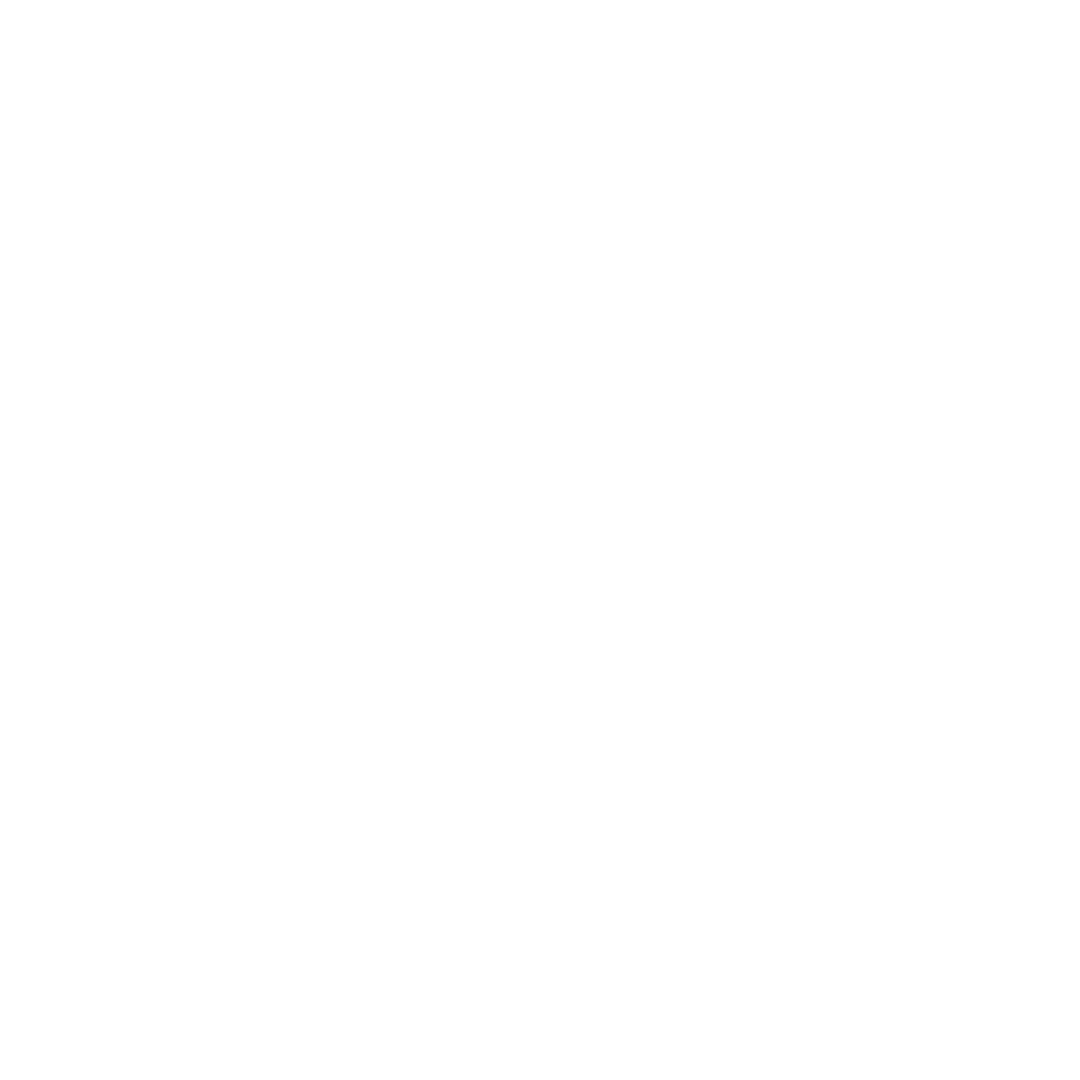

plotting and saving... 


100%|████████████████████████████████████████████████████████████████████████████| 100/100 [19:00:55<00:00, 684.56s/it]


In [299]:
from brian2 import *

N = 100
tau = 190*ms
v0_max = 5.
sigma = 4.8

eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0  : 1

'''#

t = np.arange(8*20)*0.05
g = np.exp(-.36*t) -  np.exp(-6*t)
# g = np.exp(-t/.5)
g = np.concatenate((np.zeros(g.shape),g))

nameDic = {'realSpike':'Real','nSig':'aSym','nSig2':'pearson on binary','nSig3':'pearson'}
df = pd.DataFrame(columns = ['sim_num','cor_type','TP','FP','TN','FN','num_edges'])



for sim in tqdm(range(100)):
    start_scope()
    # del M

    G = NeuronGroup(N, eqs, threshold='v>2', reset='v=0',  method='euler', refractory=15*ms)

    S = Synapses(G, G,
                 on_pre='v_post += 0.2')
    S.connect(condition='i!=j', p=0.10)
    spikemon = SpikeMonitor(G)
    Ns = len(S.source) 
    Nt = len(S.target)
    run(600*ms)
    
    tCa = np.arange(600*20)*0.05
    spikes = spikemon.spike_trains()
    dff = np.zeros((len(tCa),len(spikes)))
    realSpike = np.zeros((N,N))
    for ed in range(len(S.j)):
        realSpike[S.j,S.i] = 1
        
    for n in range(len(spikes)): 
        n0 = spikemon.spike_trains()[n]/ms
        trace = np.zeros(tCa.shape)
        for spike in n0:
            ind = np.argmin(np.abs(tCa-spike))
            trace[ind] = 1
        d  = np.convolve(trace,g,mode='same')
        d =  d + np.random.normal(0, .02, size=len(d))
        dff[:,n] = d
#         plt.plot(tCa,d+n)
    print('calculating correlations... ')
    Ca,caFall = caSpikeFinder(dff.T,20)
    Ca[np.isnan(Ca)] = 0
    cor = np.dot(Ca ,Ca.T)/np.sum(Ca,axis=1) # Do the actual co-occorence matrix not np.corrcoef(Ca)
    cor2 = np.corrcoef(Ca)      
    cor3 = np.corrcoef(dff.T)
    sCor = np.empty((cor.shape[0],cor.shape[1],numshifts))
    sCor2 = np.empty((cor.shape[0],cor.shape[1],numshifts))
    sCor3 = np.empty((cor.shape[0],cor.shape[1],numshifts))
    for s in range(0,numshifts):
        shifts = np.random.randint(size= Ca.shape[0],low=0,high=Ca.shape[1])
        Ca2 = circShiftRoll(shifts,Ca)
        dff2 = circShiftRoll(shifts,dff.T)
        sCor2[:,:,s] = np.corrcoef(Ca2)
        sCor[:,:,s] = np.dot(Ca2 ,Ca2.T)/np.sum(Ca2,axis=1)
        sCor3[:,:,s] = np.corrcoef(dff2)

    sCor2 = np.nanpercentile(sCor2,[97.5,2.5],axis=2)
    # cor2[np.tril(cor2,-1)==0] = np.nan
    nSig2 = (cor2>sCor2[0,:,:])|(cor2<sCor2[1,:,:])

    sCor = np.nanpercentile(sCor,[97.5,2.5],axis=2)
    # cor[np.tril(cor,-1)==0] = np.nan
    nSig = (cor>sCor[0,:,:])|(cor<sCor[1,:,:])

    sCor3 = np.nanpercentile(sCor3,[97.5,2.5],axis=2)
    # cor3[np.tril(cor3,-1)==0] = np.nan
    nSig3 = (cor3>sCor3[0,:,:])|(cor3<sCor3[1,:,:])
    
    fig, ax = plt.subplots(2,2,figsize=(15,15))
    print('plotting and saving... ')
    for ind,sig in enumerate(['realSpike','nSig','nSig2','nSig3']):
        con_matrix = eval(sig)
        rows, cols = np.where(con_matrix == 1)
        edges = zip(rows.tolist(), cols.tolist())
        gr = nx.Graph()
        gr.add_nodes_from(np.arange(con_matrix.shape[0]))
        gr.add_edges_from(edges)
        nodePos = nx.circular_layout(gr)
        gr = nx.draw(gr,node_size=50, width=.5,ax=ax[ind//2,ind%2],alpha=.6,with_labels = True,pos=nodePos)
        ax[ind//2,ind%2].set_title(nameDic[sig])
        tempDf = {'sim_num':sim,'cor_type':nameDic[sig],'TP':np.sum(con_matrix*realSpike==1),
              'FP':np.sum((con_matrix==0) &(realSpike==1)),
              'TN':np.sum((con_matrix==0) &(realSpike==0)),
              'FN':np.sum((con_matrix==1) &(realSpike==0)),
              'real_num_edges':np.sum((realSpike==1)),'num_edges':np.sum((con_matrix==1))}

        df = df.append(tempDf,ignore_index=True)
    fig.savefig(figFolder+str(sim)+'_sim.png')
    fig.clf()
    plt.close(fig)

df.to_csv(figFolder+'simResults.csv')





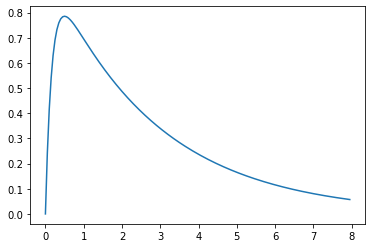

In [194]:
%matplotlib inline
t = np.arange(8*20)*0.05

g = np.exp(-.36*t) -  np.exp(-6*t)
# g = np.exp(-t/.5)
g = np.concatenate((np.zeros(g.shape),g))
t = np.concatenate((np.zeros(t.shape),t))
d  = np.convolve
plot(t,g)
# print(g)

In [137]:
(print(realSpike))

[[0. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 1. 0. 0. 0.]]


<IPython.core.display.Javascript object>


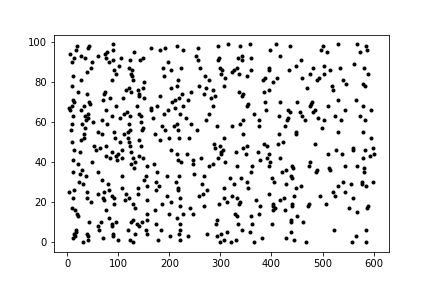

In [295]:
# %matplotlib notebook
plot(spikemon.t/ms,spikemon.i, '.k')

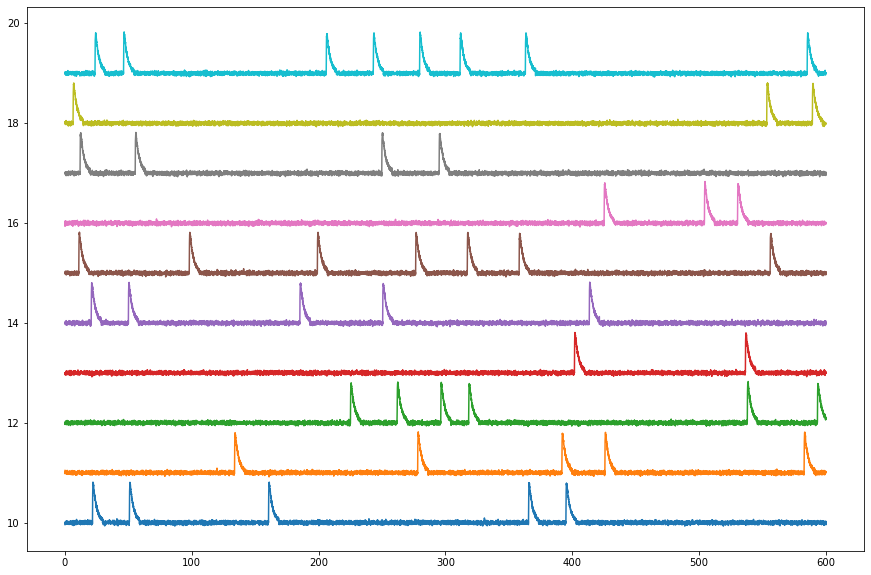

In [308]:
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(15,10)) 
for n in range(10,20): 
    plt.plot(tCa,dff[:,n]+n)


In [318]:
df['Accuracy'] = df.apply(lambda x: (x.TP+x.TN)/(x.TP+x.FN+x.TN+x.FP), axis=1)
df['Sensitivity'] = df.apply(lambda x: (x.TP)/(x.TP+x.FN), axis=1)
df['Specificity'] = df.apply(lambda x: (x.TN)/(x.TN+x.FP), axis=1)
df['Balanced_Accuracy'] = df.apply(lambda x: (x.Sensitivity)/(x.Specificity), axis=1)
df['Percision'] =  df.apply(lambda x: (x.TP)/(x.TP+x.FP), axis=1)
df['f1_score'] = df.apply(lambda x: 2*(x.Sensitivity*x.Percision)/(x.Percision+x.Sensitivity), axis=1)

<IPython.core.display.Javascript object>


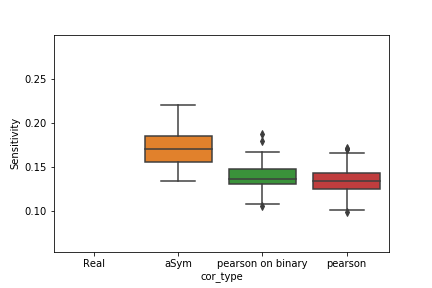

In [323]:
%matplotlib notebook
sns.boxplot(data=df, x='cor_type',y='Sensitivity')

In [125]:
def calcPeriodSess(sess):
    if sess[5] == 'B':
        day = 0
    else:
        day = int(re.findall(r'\d+',sess[5:])[0])
    return  periodCalc(day)


In [128]:
df = pd.DataFrame(columns = ['Mouse','Sess','cre','mvmt','trivial_communities','nonTrivial_communities',
                             'comm_sizes','mean_commSize','mean_commSize_incTrivial',
                            'MSN_centrality','interN_centrality','interN_centrality_list','MSN_centrality_list'])
f = h5py.File(connMaps,'r')
f2 = h5py.File('J:\\connactivityAnalysis\\connMaps2.hdf5','r')
for m in miceList:
    for s in tqdm(f[m].keys()):
        P = getPositions(Files[1],m,s[5:])
        numred = f[m][s].attrs['numRed']
                # # print(P)
        cre = getCreType(Files[1],m)
        p = {}
        for x in range(P.shape[1]):
            p[x] = (P[0,x],P[1,x])
        node_color = ['red'  if x<numred else "green" for x in range(len(p))]
        for mInd,mvmt in enumerate(['hiSpeed','lowSpeed','all']):
            for ind,cType in enumerate(['pearsonF']):#['pearson','pearsonF','aSymCorr']): 
                try: 
                    if mvmt== 'all':
                        c = f2[m][s]['Pre'][cType].value
                        d = f2[m][s]['Pre'][(cType+'_shuffle')].value
                    else:
                        c = f[m][s]['Pre'][mvmt][cType].value 
                        d = f[m][s]['Pre'][mvmt][(cType+'_shuffle')].value
                except: 
                    print("couldn't open file: ",m,s,mvmt)
                    continue
                if c.shape == ():
                    continue
                c[np.tril(c,-1)==0] = np.nan

                b = np.nanpercentile(d,[97.5,2.5],axis=2)
        #                     print(c.shape,b.shape)
                nSig = (c>b[0,:,:])|(c<b[1,:,:])
                rows, cols = np.where(nSig == 1)
                edges = zip(rows.tolist(), cols.tolist())
                gr = nx.Graph()
                gr.add_nodes_from(np.arange(nSig.shape[0]))
                gr.add_edges_from(edges)
                try:
                    c = list(nx.algorithms.community.greedy_modularity_communities(gr))
                    dg = gr.degree
                    cSize = [len(x) for x in c]
                    cSizNT =[len(x) for x in c if len(x)>1]
                    MSNc = []
                    intNc = []
                    dc = nx.degree_centrality(gr)
                    MSNdc = []
                    intNdc = []
                    for nNum in range(numred):
                        intNc.append(dg[nNum])
                        intNdc.append(dc[nNum])
                    for nNum in range(numred,nSig.shape[0]):
                        MSNc.append(dg[nNum])
                        MSNdc.append(dc[nNum])
                    
                    tempDf = {'Period':calcPeriodSess(s),'Mouse':m,'Sess':s,'cre':cre,'mvmt':mvmt,'trivial_communities':len(cSize)-len(cSizNT),
                              'nonTrivial_communities':len(cSizNT),'comm_sizes':cSize,'mean_commSize':np.mean(cSizNT),
                              'mean_commSize_incTrivial':np.mean(cSize),'MSN_degree':np.mean(MSNc),'density':nx.density(gr),
                              'interN_degree':np.mean(intNc),'interN_degree':intNc,'MSN_degree_list':MSNc,
                              'MSN_centrality':np.mean(MSNdc),'interN_centrality':np.mean(intNdc),'nNeurons':len(gr.nodes)}
                    df = df.append(tempDf,ignore_index=True)
                    del gr
                except:
                    print('something went wrong',m,s)
                    continue

                    
df.to_csv(figFolder+'NetworkProperties.csv')

       


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]<ipython-input-128-440622090f3c>:23: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  c = f[m][s]['Pre'][mvmt][cType].value
<ipython-input-128-440622090f3c>:24: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  d = f[m][s]['Pre'][mvmt][(cType+'_shuffle')].value
<ipython-input-128-440622090f3c>:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  c = f2[m][s]['Pre'][cType].value
<ipython-input-128-440622090f3c>:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  d = f2[m][s]['Pre'][(cType+'_shuffle')].value
 21%|█████████████████▊                                                                 | 3/14 [00:00<00:02,  4.17it/s]C:\Users\dzemel\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of e

couldn't open file:  0761 0761_day35L hiSpeed


 26%|█████████████████████▊                                                             | 5/19 [01:16<04:02, 17.31s/it]

couldn't open file:  7909 7909_day11 hiSpeed


 74%|████████████████████████████████████████████████████████████▍                     | 14/19 [02:51<01:08, 13.74s/it]

couldn't open file:  7909 7909_day5 hiSpeed


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:36<00:00,  2.58s/it]


In [135]:
df.head(-20)

Mouse            Sess  cre      mvmt trivial_communities  \
0    0761  0761_BaselineA  CHI   hiSpeed                   0   
1    0761  0761_BaselineA  CHI  lowSpeed                   0   
2    0761  0761_BaselineA  CHI       all                   0   
3    0761  0761_BaselineL  CHI   hiSpeed                   1   
4    0761  0761_BaselineL  CHI  lowSpeed                   0   
..    ...             ...  ...       ...                 ...   
611  8815      8815_day14  CHI       all                   0   
612  8815     8815_day15A  CHI   hiSpeed                   1   
613  8815     8815_day15A  CHI  lowSpeed                   1   
614  8815     8815_day15A  CHI       all                   0   
615  8815     8815_day19L  CHI   hiSpeed                   0   

    nonTrivial_communities      comm_sizes  mean_commSize  \
0                        3      [13, 7, 7]       9.000000   
1                        3     [11, 10, 6]       9.000000   
2                        3      [12, 9, 6]       9.000000   
3                        3  [17, 10, 4, 1]      10.333333   
4                        3      [14, 9, 9]      10.666667   
..                     ...             ...            ...   
611                      2        [72, 59]      65.500000   
612                      2     [29, 22, 1]      25.500000   
613                      2     [28, 23, 1]      25.500000   
614                      3    [24, 17, 11]      17.333333   
615                      3     [18, 18, 5]      13.666667   

     mean_commSize_incTrivial  MSN_centrality  interN_centrality  \
0                    9.000000        0.400888           0.038462   
1                    9.000000        0.501479           0.115385   
2                    9.000000        0.498521           0.115385   
3                    8.000000        0.412071           0.387097   
4                   10.666667        0.621228           0.741935   
..                        ...             ...                ...   
611                 65.500000        0.528425           0.387179   
612                 17.333333        0.655686           0.745098   
613                 17.333333        0.716078           0.823529   
614                 17.333333        0.712549           0.794118   
615                 13.666667        0.367949           0.325000   

     interN_centrality_list  MSN_centrality_list  MSN_degree  \
0                       NaN                  NaN   10.423077   
1                       NaN                  NaN   13.038462   
2                       NaN                  NaN   12.961538   
3                       NaN                  NaN   12.774194   
4                       NaN                  NaN   19.258065   
..                      ...                  ...         ...   
611                     NaN                  NaN   68.695312   
612                     NaN                  NaN   33.440000   
613                     NaN                  NaN   36.520000   
614                     NaN                  NaN   36.340000   
615                     NaN                  NaN   14.717949   

                                       MSN_degree_list   Period   density  \
0    [11, 1, 1, 13, 10, 17, 13, 12, 2, 15, 12, 14, ...  Healthy  0.387464   
1    [15, 15, 7, 13, 18, 15, 13, 16, 5, 11, 15, 10,...  Healthy  0.487179   
2    [16, 16, 8, 14, 17, 15, 14, 15, 6, 11, 13, 13,...  Healthy  0.484330   
3    [21, 9, 19, 6, 7, 21, 17, 8, 8, 20, 5, 7, 7, 1...  Healthy  0.411290   
4    [24, 26, 20, 12, 14, 8, 20, 22, 12, 24, 19, 17...  Healthy  0.625000   
..                                                 ...      ...       ...   
611  [40, 72, 76, 79, 77, 49, 54, 64, 69, 69, 78, 3...  Chronic  0.525191   
612  [41, 41, 42, 28, 42, 40, 42, 35, 5, 15, 39, 38...  Chronic  0.659125   
613  [45, 44, 46, 38, 43, 47, 44, 39, 17, 35, 40, 1...  Chronic  0.720211   
614  [42, 43, 45, 40, 43, 45, 42, 41, 10, 35, 39, 2...  Chronic  0.715686   
615  [3, 18, 18, 2, 27, 19, 20, 6, 20, 16, 25, 8, 2...  Chronic  0.36

hiSpeed
lowSpeed
all


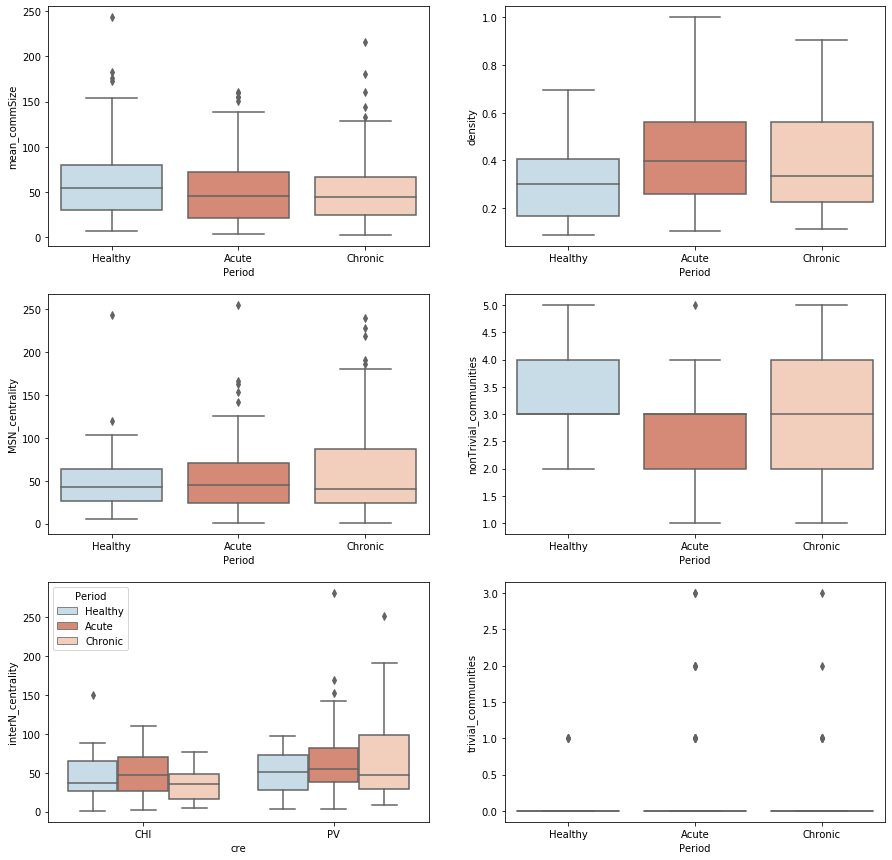

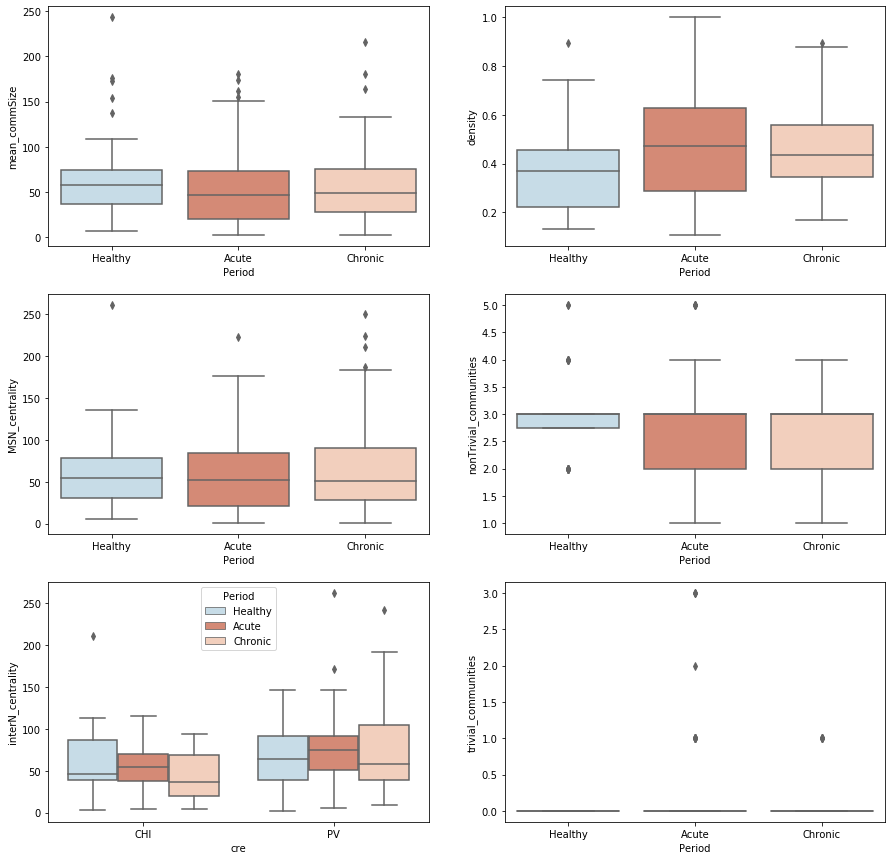

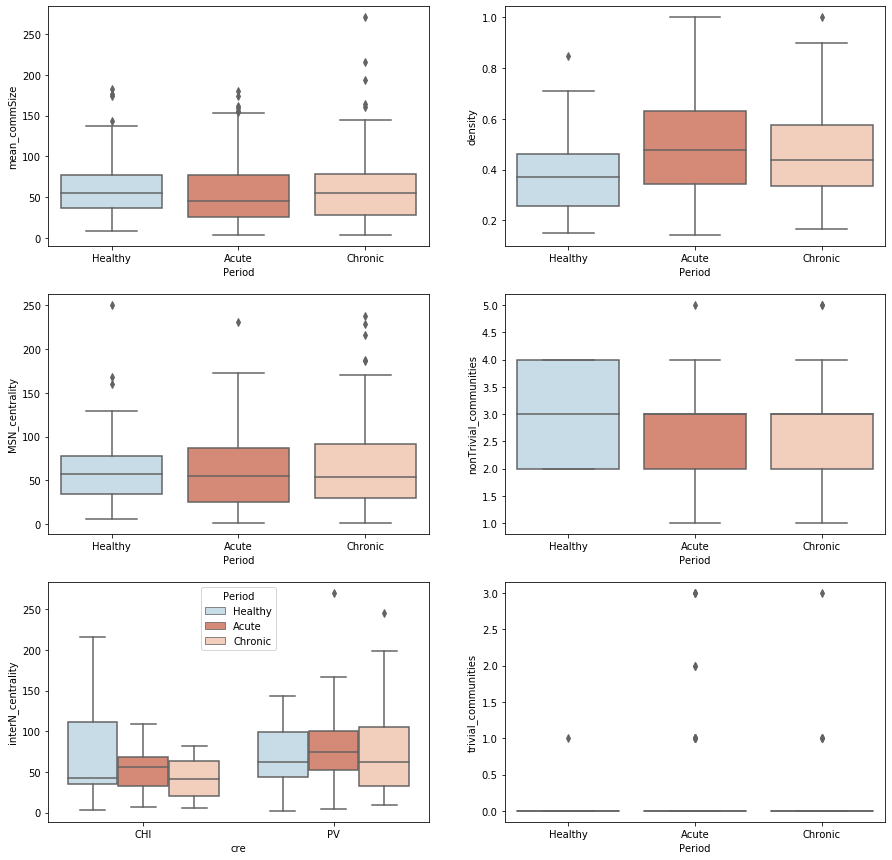

In [104]:
for mvmt in df.mvmt.unique():
    fig, ax = plt.subplots(3,2,figsize = (15,15))
    with sns.color_palette(colorPallet3):
        print(mvmt)
        sns.boxplot(data=df[df.mvmt==mvmt], x='Period',y='mean_commSize',ax=ax[0,0])
        sns.boxplot(data=df[df.mvmt==mvmt], x='Period',y='density',ax=ax[0,1])
        sns.boxplot(data=df[(df.cre.isin(['CHI','PV'])&(df.mvmt==mvmt))],
                    x='cre', hue='Period',y='interN_centrality',ax=ax[2,0])
        sns.boxplot(data=df[df.mvmt==mvmt], x='Period',y='MSN_centrality',ax=ax[1,0])
        sns.boxplot(data=df[df.mvmt==mvmt], x='Period',y='nonTrivial_communities',ax=ax[1,1])
        sns.boxplot(data=df[df.mvmt==mvmt], x='Period',y='trivial_communities',ax=ax[2,1])

In [140]:
df2 = df[['Period','Mouse','Sess','mvmt','MSN_centrality']]
df2 = df2.rename(columns={"MSN_centrality": "interN_centrality"})
df2['cre'] ='MSN'
df2 = df2.append(df[['Period','Mouse','Sess','mvmt','cre','interN_centrality']])
df2.head(-20)
df2 = df2.rename(columns={"interN_centrality": "Degree_Centrality"})

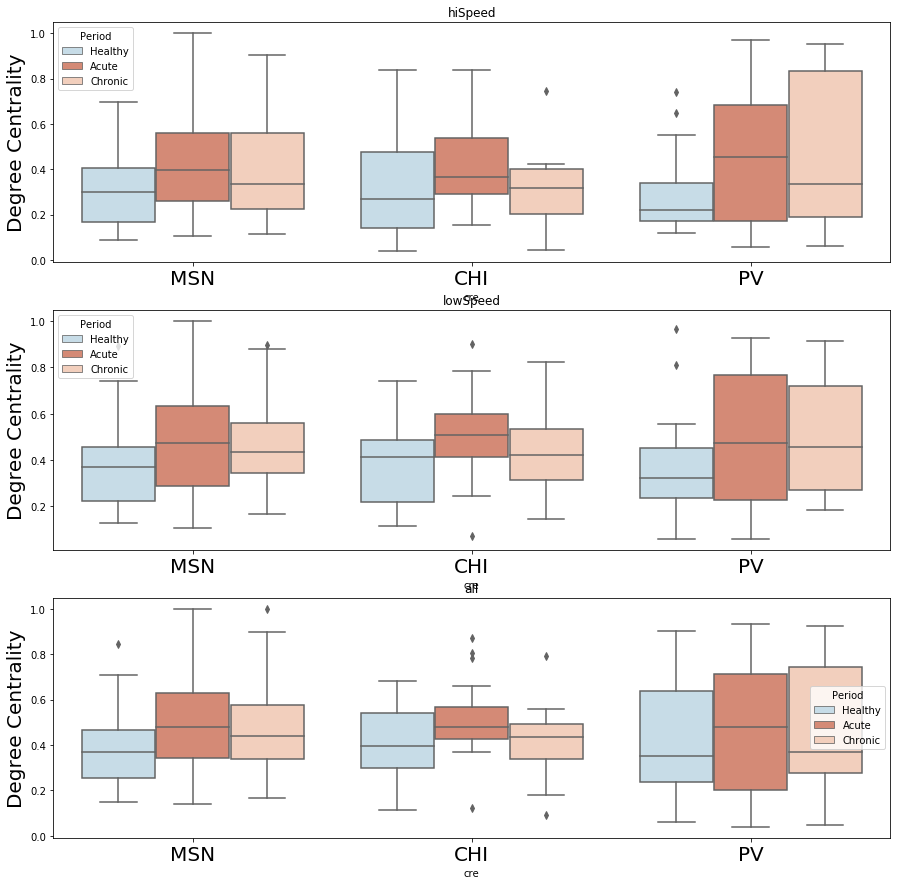

In [178]:
fig, ax = plt.subplots(3,1,figsize = (15,15))
for ind, mvmt in enumerate(df.mvmt.unique()):    
    with sns.color_palette(colorPallet3):
        ax[ind].set_title(mvmt)
        sns.boxplot(data=df2[(df2.cre.isin(['CHI','PV','MSN'])&(df2.mvmt==mvmt))],
                    x='cre', hue='Period',y='Degree_Centrality',ax=ax[ind])
        ax[ind].set_ylabel('Degree Centrality',fontsize=20)
        ax[ind].set_xticklabels(ax[ind].get_xticklabels(),fontsize=20)
        
 

In [188]:
dfStat = df[['Period','mvmt','cre','MSN_centrality','interN_centrality']]
# dfStat = dfStat.dropna()
# dfStat
for mvmt in dfStat.mvmt.unique():
    for c in dfStat.cre.unique():
        if c=='NA':
            continue
        tdf = dfStat[(dfStat.cre==c)&(dfStat.mvmt==mvmt)].dropna()
        S,P = sci.stats.f_oneway(list(tdf[tdf.Period=='Healthy'].interN_centrality),
                                 list(tdf[tdf.Period=='Acute'].interN_centrality),
                                 list(tdf[tdf.Period=='Chronic'].interN_centrality))
        print(mvmt,c, P,P<0.05)

    print('_______________________')
for mvmt in dfStat.mvmt.unique():
    tdf = dfStat[(dfStat.mvmt==mvmt)]
    S,P = sci.stats.f_oneway(list(tdf[tdf.Period=='Healthy'].MSN_centrality),
                     list(tdf[tdf.Period=='Acute'].MSN_centrality),
                     list(tdf[tdf.Period=='Chronic'].MSN_centrality))

    print(mvmt, P,P<0.05,S,len(tdf))

    print('_______________________')



hiSpeed CHI 0.2523963492208725 False
hiSpeed PV 0.15669294930203928 False
_______________________
lowSpeed CHI 0.16980594299113372 False
lowSpeed PV 0.36134841940163875 False
_______________________
all CHI 0.11256589052671452 False
all PV 0.6747080928130715 False
_______________________
hiSpeed 0.0021379879460082635 True 6.334151794725623 210
_______________________
lowSpeed 0.007101057878837784 True 5.065925322649082 213
_______________________
all 0.0060461032291964515 True 5.234643844104652 213
_______________________


In [190]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
for mvmt in dfStat.mvmt.unique():
    print(mvmt)
    tdf = dfStat[(dfStat.mvmt==mvmt)]
 
    m_comp = pairwise_tukeyhsd(endog=tdf['MSN_centrality'], groups=tdf['Period'], alpha=0.05)
    print(m_comp)
    print("--------------------------------------------------")

hiSpeed
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  Acute Chronic  -0.0245 0.7259 -0.1037  0.0546  False
  Acute Healthy  -0.1276 0.0015 -0.2131  -0.042   True
Chronic Healthy   -0.103 0.0281 -0.1972 -0.0089   True
------------------------------------------------------
--------------------------------------------------
lowSpeed
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  Acute Chronic  -0.0153 0.8761 -0.0924  0.0618  False
  Acute Healthy  -0.1106 0.0059 -0.1944 -0.0268   True
Chronic Healthy  -0.0953 0.0409 -0.1875 -0.0031   True
------------------------------------------------------
--------------------------------------------------
all
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reje

2      3.0
5      2.0
8      2.0
11     1.0
14     3.0
      ... 
623    3.0
626    3.0
629    3.0
632    2.0
635    2.0
Name: nonTrivial_communities, Length: 213, dtype: float64

all 0.46919627027396693 False 0.7594675622268707 213
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
  Acute Chronic  -0.0053    0.9 -0.2952 0.2846  False
  Acute Healthy   0.3287 0.0387  0.0135 0.6439   True
Chronic Healthy    0.334 0.0618 -0.0127 0.6808  False
-----------------------------------------------------


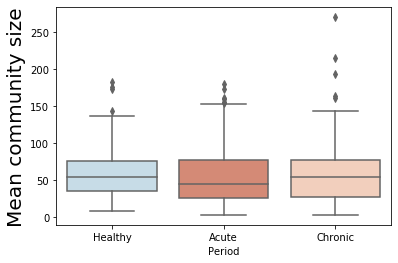

In [205]:
dfStat = df[['Period','mvmt','cre','mean_commSize','nonTrivial_communities']]
tdf = dfStat[(dfStat.mvmt=='all')]
with sns.color_palette(colorPallet3):
    sns.boxplot(data=tdf, x='Period',y='mean_commSize')
#         sns.boxplot(data=df[df.mvmt==mvmt], x='Period',y='density',ax=ax[0,1])
S,P = sci.stats.f_oneway(list(tdf[tdf.Period=='Healthy'].mean_commSize),
                                 list(tdf[tdf.Period=='Acute'].mean_commSize),
                                 list(tdf[tdf.Period=='Chronic'].mean_commSize))
print(mvmt, P,P<0.05,S,len(tdf))
plt.ylabel('Mean community size',fontsize=20)


all 0.032485179624059765 True 3.483509159107667 213
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
  Acute Chronic  -0.0053    0.9 -0.2952 0.2846  False
  Acute Healthy   0.3287 0.0387  0.0135 0.6439   True
Chronic Healthy    0.334 0.0618 -0.0127 0.6808  False
-----------------------------------------------------


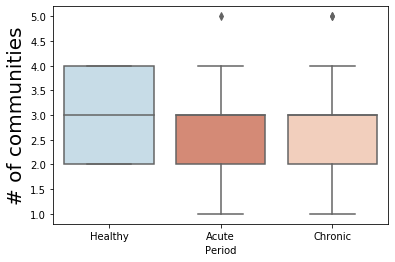

In [206]:
dfStat = df[['Period','mvmt','cre','mean_commSize','nonTrivial_communities']]
tdf = dfStat[(dfStat.mvmt=='all')]
with sns.color_palette(colorPallet3):
    sns.boxplot(data=tdf, x='Period',y='nonTrivial_communities')
#         sns.boxplot(data=df[df.mvmt==mvmt], x='Period',y='density',ax=ax[0,1])
S,P = sci.stats.f_oneway(list(tdf[tdf.Period=='Healthy'].nonTrivial_communities),
                                 list(tdf[tdf.Period=='Acute'].nonTrivial_communities),
                                 list(tdf[tdf.Period=='Chronic'].nonTrivial_communities))
print(mvmt, P,P<0.05,S,len(tdf))
plt.ylabel('# of communities',fontsize=20)
m_comp = pairwise_tukeyhsd(endog=tdf['nonTrivial_communities'].astype(float), groups=tdf['Period'], alpha=0.05)
print(m_comp)

In [162]:
dfStat = df[['Period','mvmt','cre','MSN_centrality','interN_centrality']]
# dfStat = dfStat.dropna()
# dfStat
for mvmt in dfStat.mvmt.unique():
    for c in dfStat.cre.unique():
        if c=='NA':
            continue
        for p in dfStat.Period.unique():
            tdf = dfStat[(dfStat.cre==c)&(dfStat.Period==p)&(dfStat.mvmt==mvmt)].dropna()
            S,P = sci.stats.wilcoxon(tdf.MSN_centrality,tdf.interN_centrality)
            print(mvmt,p,c, P,P<0.05)
        print('---------------------')
    print('_______________________')

hiSpeed Healthy CHI 0.25238037109375 False
hiSpeed Acute CHI 0.04599285125732422 True
hiSpeed Chronic CHI 0.9031982421875 False
---------------------
hiSpeed Healthy PV 0.065399169921875 False
hiSpeed Acute PV 0.030106479013989666 True
hiSpeed Chronic PV 0.2753410339355469 False
---------------------
_______________________
lowSpeed Healthy CHI 0.02557373046875 True
lowSpeed Acute CHI 0.035056114196777344 True
lowSpeed Chronic CHI 0.846923828125 False
---------------------
lowSpeed Healthy PV 0.010986328125 True
lowSpeed Acute PV 0.02469226421811126 True
lowSpeed Chronic PV 0.312408447265625 False
---------------------
_______________________
all Healthy CHI 0.083251953125 False
all Acute CHI 0.16780662536621094 False
all Chronic CHI 0.93408203125 False
---------------------
all Healthy PV 0.02496337890625 True
all Acute PV 0.040236862182292714 True
all Chronic PV 0.8905677795410156 False
---------------------
_______________________


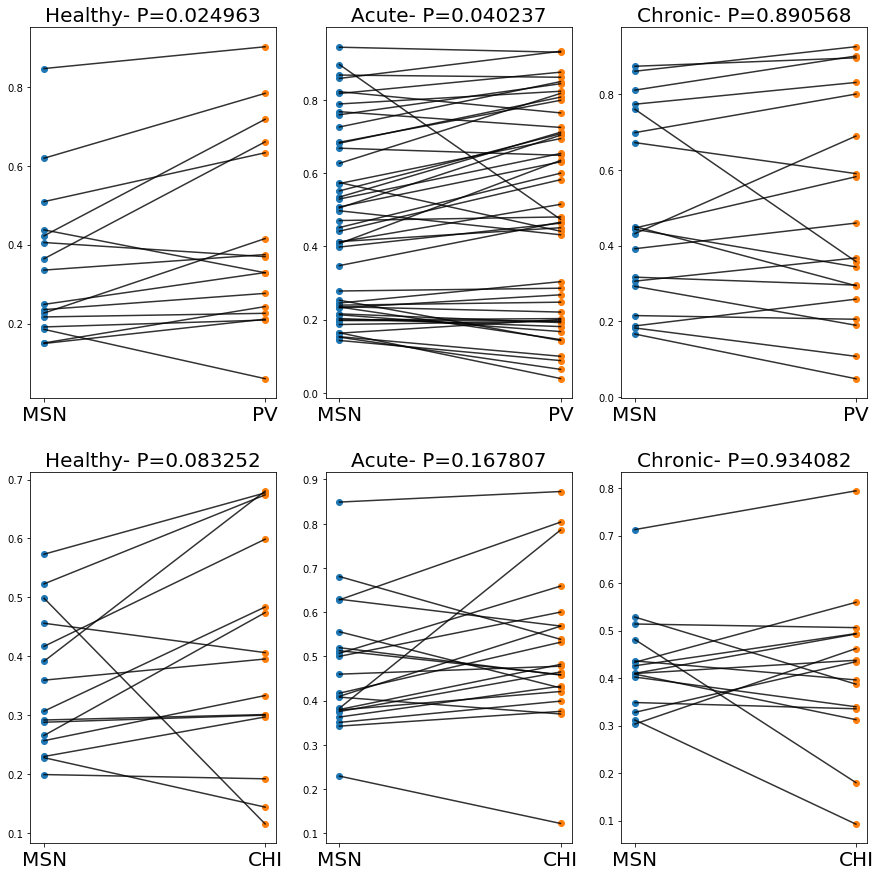

In [175]:
dfStat = df[['Period','mvmt','cre','MSN_centrality','interN_centrality']]
fig, ax  = plt.subplots(2,3,figsize=(15,15))
for ind, p in enumerate(dfStat.Period.unique()):
     for indc,c in enumerate(['PV','CHI']):
        
        tdf = dfStat[(dfStat.cre==c)&(dfStat.Period==p)&(dfStat.mvmt=='all')].dropna()
        nSamples = len(tdf.MSN_centrality)
        msn = list(tdf.MSN_centrality)
        intn = list(tdf.interN_centrality)
        
        S,P = sci.stats.wilcoxon(tdf.MSN_centrality,tdf.interN_centrality)
        
        ax[indc,ind].scatter(np.zeros(nSamples), msn)
        ax[indc,ind].scatter(np.ones(nSamples), intn)

        # plotting the lines
        for i in range(nSamples):
            ax[indc,ind].plot( [0,1], [msn[i], intn[i]], c='k',alpha=0.8)

        ax[indc,ind].set_xticks([0,1])
        ax[indc,ind].set_xticklabels(['MSN', c],fontsize=20)
        ax[indc,ind].set_title(p+'- P={pval:f}'.format(pval=P),fontsize=20)


<h3>How stabel are the high/low speed networks?</h3>


In [277]:
df = pd.DataFrame(columns = ['sim_num','cor_type','TP','FP','TN','FN','num_edges'])

mvmtType = {'lowSpeed':"getOnsetOrPeriod(m,sess,'Pre','LowMvmtPeriods_vector')",
            'hiSpeed':"getOnsetOrPeriod(m,sess,'Pre','HighMvmtPeriods_vector')"}
numshifts = 1000
df = pd.DataFrame(columns=['sess','mvmt'])
for m in tqdm(miceList):
    data =  getData(Files[1],['trace'],period ='Pre', mice=m)
    
       
    cre = getCreType(Files[1],m)
    for sess in tqdm(data.keys()): 
    
        if sess[5] == 'B':
            day = 0
        else:
            day = int(re.findall(r'\d+',sess[5:])[0])

        numRed = int(data[sess]['trace']['numred']) 
            
        dff_ori = data[sess]['trace']['dff']   
        edges = {}
        for mv in mvmtType.keys():    
            mVector = eval(mvmtType[mv])
            if np.sum(mVector)==0:
                print('no ',mv,' in ',sess)
                continue
            
            if len(mVector)<dff_ori.shape[1]:
                mVector = np.append(mVector,0)

            dff = dff_ori[:,(mVector>0)]
            if dff.shape[1]/3<300:
                print('too short ',sess,mv)
                df = df.append({'sess':sess,'mvmt':mv,'seg_length':dff.shape[1]/3,'nNeurons':dff.shape[0]},ignore_index=True)
                continue
            DFF = [dff[:,i : i + int(np.ceil(dff.shape[1]/3))] for i in range(0, dff.shape[1],int(np.ceil(dff.shape[1]/3)))]
            adjM = []
            for ind,seg in enumerate(DFF):
                cor = np.corrcoef(seg)
                try:
                    sCor = np.empty((cor.shape[0],cor.shape[1],numshifts))
                except:
                    continue
                for s in range(0,numshifts):
                    shifts = np.random.randint(size= seg.shape[0],low=0,high=seg.shape[1])
                    dff2 = circShiftRoll(shifts,seg)
                    sCor[:,:,s] = np.corrcoef(dff2)
                sCor = np.nanpercentile(sCor,[97.5,2.5],axis=2)
                nSig = (cor>sCor[0,:,:])|(cor<sCor[1,:,:])
                del sCor
                adjM.append(nSig)
            perm = permutations(np.arange(3), 2)
            sim = []
            try:
                for i in list(perm):
                    a = np.array(adjM[i[0]])
                    b = np.array(adjM[i[1]])  
                    sim.append(np.sum(a==b)/a.size)
                df = df.append({'sess':sess,'mvmt':mv,'seg_length':seg.shape[1],
                                'nNeurons':seg.shape[0],'percent_same_list':sim,
                                'mean_percent_same':np.mean(sim)},ignore_index=True)
            except:
                continue
            edges[mv] = adjM
        try:
            perm = permutations(np.arange(3), 2)
            sim = []
            for i in list(perm):
                a = np.array(edges['lowSpeed'][i[0]])
                b = np.array(edges['hiSpeed'][i[1]])  
                sim.append(np.sum(a==b)/a.size)
                a = np.array(edges['hiSpeed'][i[0]])
                b = np.array(edges['lowSpeed'][i[1]])  
                sim.append(np.sum(a==b)/a.size)
            df = df.append({'sess':sess,'mvmt':'highVsLow','seg_length':seg.shape[1],
                            'nNeurons':seg.shape[0],'percent_same_list':sim,
                            'mean_percent_same':np.mean(sim)},ignore_index=True)
        except:
            continue

df.to_csv(figFolder+'similarityBetweenHighLow.csv')





  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



  7%|█████▉                                                                             | 1/14 [00:03<00:48,  3.75s/it]

too short  0761_BaselineA hiSpeed



 29%|███████████████████████▋                                                           | 4/14 [00:17<00:38,  3.88s/it]

too short  0761_day1 hiSpeed



 43%|███████████████████████████████████▌                                               | 6/14 [00:24<00:27,  3.41s/it]

too short  0761_day12 hiSpeed



 50%|█████████████████████████████████████████▌                                         | 7/14 [00:25<00:18,  2.59s/it]

too short  0761_day14A hiSpeed



 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:28<00:16,  2.78s/it]

too short  0761_day19L hiSpeed



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:31<00:13,  2.80s/it]

too short  0761_day2 hiSpeed



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [00:34<00:11,  2.85s/it]

too short  0761_day31A hiSpeed



 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [00:36<00:08,  2.75s/it]

no  hiSpeed  in  0761_day35L



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [00:42<00:02,  2.72s/it]

too short  0761_day6 hiSpeed



  6%|█████▏                                                                             | 1/16 [00:45<11:17, 45.15s/it]

too short  0761_day8 hiSpeed



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



  7%|█████▉                                                                             | 1/14 [01:21<17:41, 81.66s/it]

too short  1208_BaselineA hiSpeed



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [10:57<03:17, 49.27s/it]

too short  1208_day30A hiSpeed



 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [11:25<02:09, 43.04s/it]

too short  1208_day34L hiSpeed



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



 21%|█████████████████▊                                                                 | 3/14 [01:04<03:23, 18.53s/it]

too short  1222_day11 lowSpeed



 36%|█████████████████████████████▋                                                     | 5/14 [01:13<01:44, 11.59s/it]

too short  1222_day15A lowSpeed



 43%|███████████████████████████████████▌                                               | 6/14 [01:22<01:27, 10.90s/it]

too short  1222_day20L lowSpeed



 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [01:50<00:21,  7.05s/it]

too short  1222_day5 lowSpeed



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [01:51<00:10,  5.25s/it]

too short  1222_day7 lowSpeed



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

cleaning up trace data



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

cleaning up trace data



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



  7%|█████▉                                                                             | 1/14 [00:27<06:01, 27.79s/it]

too short  2976_BaselineA hiSpeed



 21%|█████████████████▊                                                                 | 3/14 [01:45<06:07, 33.39s/it]

too short  2976_BaselineS hiSpeed



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [10:40<05:51, 70.38s/it]

too short  2976_day2 hiSpeed



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [12:04<01:27, 43.88s/it]

too short  2976_day4 hiSpeed



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



  7%|█████▉                                                                             | 1/14 [00:28<06:12, 28.68s/it]

too short  2980_BaselineA hiSpeed



 14%|███████████▊                                                                       | 2/14 [00:52<05:27, 27.30s/it]

too short  2980_BaselineL hiSpeed



 21%|█████████████████▊                                                                 | 3/14 [01:35<05:51, 31.93s/it]

too short  2980_BaselineS hiSpeed



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [04:36<02:41, 32.25s/it]

too short  2980_day2 hiSpeed



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [06:55<01:16, 38.28s/it]

too short  2980_day4 hiSpeed



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [15:22<02:55, 88.00s/it]

too short  2981_day4 hiSpeed



  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

cleaning up trace data



 26%|█████████████████████▊                                                             | 5/19 [07:59<17:27, 74.81s/it]

too short  4539_day10 hiSpeed



 32%|██████████████████████████▏                                                        | 6/19 [08:22<12:48, 59.11s/it]

too short  4539_day11 hiSpeed



 42%|██████████████████████████████████▉                                                | 8/19 [09:16<07:40, 41.87s/it]

too short  4539_day13 hiSpeed



 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [12:21<00:18, 18.40s/it]

too short  4539_day8 hiSpeed



  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

cleaning up trace data



  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

cleaning up trace data



 26%|█████████████████████▊                                                             | 5/19 [06:47<20:47, 89.11s/it]

too short  7909_day10 hiSpeed



 32%|██████████████████████████▏                                                        | 6/19 [06:57<14:10, 65.43s/it]

no  hiSpeed  in  7909_day11



 37%|██████████████████████████████▌                                                    | 7/19 [07:29<11:04, 55.40s/it]

too short  7909_day12 hiSpeed



 42%|██████████████████████████████████▉                                                | 8/19 [08:13<09:30, 51.89s/it]

too short  7909_day13 hiSpeed



 47%|███████████████████████████████████████▎                                           | 9/19 [09:02<08:29, 50.97s/it]

too short  7909_day14 hiSpeed



 58%|███████████████████████████████████████████████▍                                  | 11/19 [11:34<08:18, 62.27s/it]

too short  7909_day2 hiSpeed



 79%|████████████████████████████████████████████████████████████████▋                 | 15/19 [16:05<04:23, 65.76s/it]

no  hiSpeed  in  7909_day5



 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [18:04<00:46, 46.95s/it]

too short  7909_day8 hiSpeed



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

cleaning up trace data
too short  8430_BaselineA lowSpeed



 31%|█████████████████████████▌                                                         | 4/13 [01:40<03:53, 25.91s/it]

too short  8430_day11 lowSpeed



 54%|████████████████████████████████████████████▋                                      | 7/13 [04:48<04:36, 46.12s/it]

too short  8430_day19L hiSpeed



 62%|███████████████████████████████████████████████████                                | 8/13 [05:02<03:02, 36.49s/it]

too short  8430_day30A lowSpeed



 77%|███████████████████████████████████████████████████████████████                   | 10/13 [06:38<02:04, 41.39s/it]

too short  8430_day5 lowSpeed



 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [07:40<01:35, 47.78s/it]

too short  8430_day7 lowSpeed



 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [08:36<00:50, 50.12s/it]

too short  8430_day9 lowSpeed



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



  7%|█████▉                                                                             | 1/14 [00:30<06:32, 30.16s/it]

too short  8803_BaselineA hiSpeed



 29%|███████████████████████▋                                                           | 4/14 [02:20<05:14, 31.49s/it]

too short  8803_day10 hiSpeed



 36%|█████████████████████████████▋                                                     | 5/14 [02:38<04:05, 27.23s/it]

too short  8803_day12 hiSpeed



 43%|███████████████████████████████████▌                                               | 6/14 [03:16<04:04, 30.59s/it]

too short  8803_day14 hiSpeed



 50%|█████████████████████████████████████████▌                                         | 7/14 [03:35<03:08, 26.97s/it]

too short  8803_day19L hiSpeed



 57%|███████████████████████████████████████████████▍                                   | 8/14 [03:56<02:31, 25.31s/it]

too short  8803_day2 hiSpeed



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [04:07<01:45, 21.14s/it]

too short  8803_day30A hiSpeed



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [04:25<01:20, 20.12s/it]

too short  8803_day34L hiSpeed



 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [04:47<01:01, 20.58s/it]

too short  8803_day4 hiSpeed



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [05:02<00:38, 19.02s/it]

too short  8803_day5 hiSpeed



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [05:17<00:17, 17.65s/it]

too short  8803_day6 hiSpeed



 94%|██████████████████████████████████████████████████████████████████████████     | 15/16 [3:15:16<15:02, 902.53s/it]

too short  8803_day8 hiSpeed



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



100%|███████████████████████████████████████████████████████████████████████████████| 16/16 [3:21:30<00:00, 755.68s/it]


In [293]:
df2 = df[['sess','mvmt','mean_percent_same']].pivot(index='sess', columns='mvmt')['mean_percent_same'].dropna()
df2 = df2.reset_index()
df2


mvmt            sess   hiSpeed  highVsLow  lowSpeed
0     0761_BaselineL  0.674479   0.608073  0.623698
1     0761_BaselineS  0.722069   0.589226  0.540863
2         0761_day10  0.787879   0.669421  0.628099
3          0761_day4  0.704082   0.656463  0.632653
4     1208_BaselineL  0.801548   0.730093  0.716876
..               ...       ...        ...       ...
149      8815_day30A  0.674668   0.633659  0.634374
150      8815_day34L  0.693139   0.642871  0.629486
151        8815_day4  0.533574   0.593578  0.553891
152        8815_day6  0.541023   0.584225  0.617915
153        8815_day8  0.649604   0.608172  0.647365

[154 rows x 4 columns]

1399.0
high vs. between- P=0.000000
5111.0
low vs. between- P=0.122347


Text(0.5, 1.0, 'low vs. between')

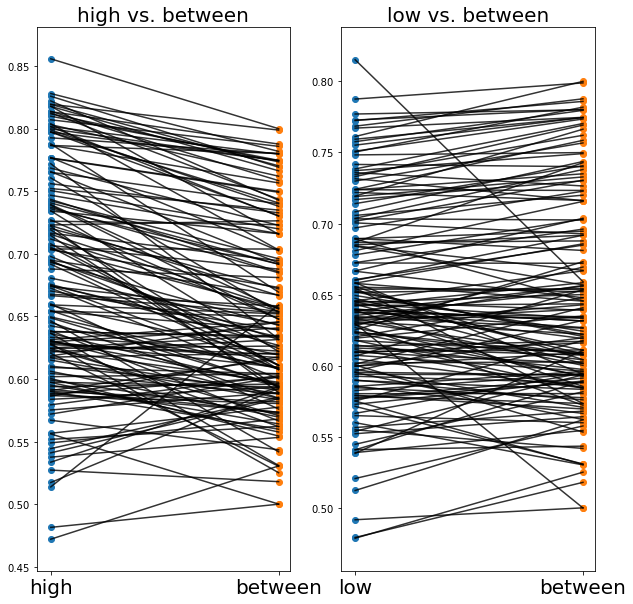

In [330]:
df2 = df[['sess','mvmt','mean_percent_same']].pivot(index='sess', columns='mvmt')['mean_percent_same'].dropna()
df2 = df2.reset_index()

fig, ax  = plt.subplots(1,2,figsize=(10,10))


nSamples = len(df2.hiSpeed)
hi = list(df2.hiSpeed)
low = list(df2.lowSpeed)
between = list(df2.highVsLow)

S,P = sci.stats.wilcoxon(hi,between)
print(S)
print('high vs. between- P={pval:f}'.format(pval=P))
S,P = sci.stats.wilcoxon(low,between)
print(S)
print('low vs. between- P={pval:f}'.format(pval=P))

ax[0].scatter(np.zeros(nSamples), hi)
ax[1].scatter(np.zeros(nSamples), low)
ax[0].scatter(np.ones(nSamples), between)
ax[1].scatter(np.ones(nSamples), between)

# plotting the lines
for i in range(nSamples):
    ax[0].plot( [0,1], [hi[i], between[i]], c='k',alpha=0.8)
    ax[1].plot( [0,1], [low[i], between[i]], c='k',alpha=0.8)

ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['high', 'between'],fontsize=20)
ax[0].set_title('high vs. between',fontsize=20)

ax[1].set_xticks([0,1])
ax[1].set_xticklabels(['low', 'between'],fontsize=20)
ax[1].set_title('low vs. between',fontsize=20)


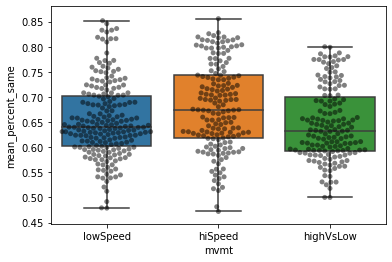

In [329]:
sns.boxplot(data=df, x='mvmt',y='mean_percent_same')
sns.swarmplot(data=df, x='mvmt',y='mean_percent_same',color='black',alpha=0.5)

In [309]:
a = list(df2.highVsLow-df2.hiSpeed)
print(np.sum(df2.highVsLow-df2.hiSpeed<0),len(a))

125 154


lowSpeed                             OLS Regression Results                            
Dep. Variable:      mean_percent_same   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.691
Date:                Tue, 29 Jun 2021   Prob (F-statistic):              0.195
Time:                        11:31:34   Log-Likelihood:                 239.05
No. Observations:                 202   AIC:                            -474.1
Df Residuals:                     200   BIC:                            -467.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6340      0.016     39.885

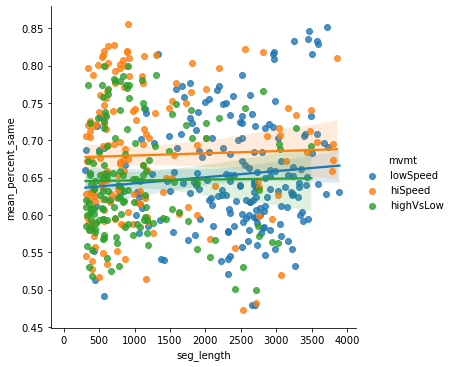

In [322]:
import statsmodels.api as sm
sns.lmplot(data=df, x="seg_length", y="mean_percent_same",hue='mvmt')
for mv in df.mvmt.unique():
    df3 = df[df.mvmt==mv].dropna()
    X = df3.seg_length
    Y = df3.mean_percent_same
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(mv, results.summary())

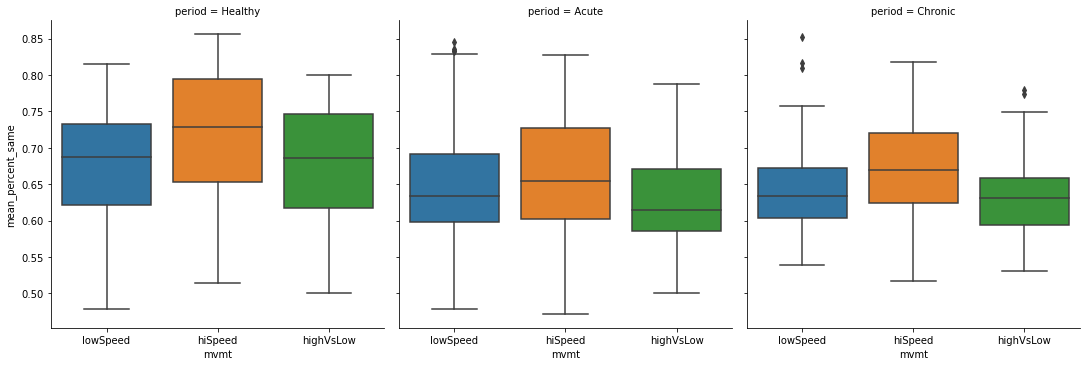

In [335]:
df['period']=df.apply(lambda x: calcPeriodSess(x.sess),axis=1)
sns.catplot(data=df, x='mvmt',y='mean_percent_same',col='period',kind='box')
# sns.swarmplot(data=df, x='mvmt',y='mean_percent_same',col='period',color='black',alpha=0.5)

In [342]:
for mv in df.mvmt.unique():
    S,P = sci.stats.f_oneway(list(df[(df.period=='Healthy')&(df.mvmt==mv)].mean_percent_same.dropna()),
                                     list(df[(df.period=='Acute')&(df.mvmt==mv)].mean_percent_same.dropna()),
                                     list(df[(df.period=='Chronic')&(df.mvmt==mv)].mean_percent_same.dropna()))
    print(mv, P,P<0.05,S,len(tdf))
    if P<0.05:
        m_comp = pairwise_tukeyhsd(endog=df[(df.mvmt==mv)].dropna().mean_percent_same.astype(float), groups=df[(df.mvmt==mv)].dropna().period, alpha=0.05)
        print(m_comp)

lowSpeed 0.12947113974050115 False 2.0654426094237843 213
hiSpeed 0.00243659566447886 True 6.246286583475022 213
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
  Acute Chronic   0.0107 0.7455 -0.0256  0.047  False
  Acute Healthy   0.0566 0.0018  0.0181  0.095   True
Chronic Healthy   0.0459 0.0296  0.0037 0.0881   True
-----------------------------------------------------
highVsLow 0.0021719307457017984 True 6.388047268818947 213
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower  upper  reject
----------------------------------------------------
  Acute Chronic   0.0008   0.9 -0.0311 0.0327  False
  Acute Healthy   0.0471 0.003  0.0137 0.0805   True
Chronic Healthy   0.0462 0.009  0.0097 0.0828   True
----------------------------------------------------


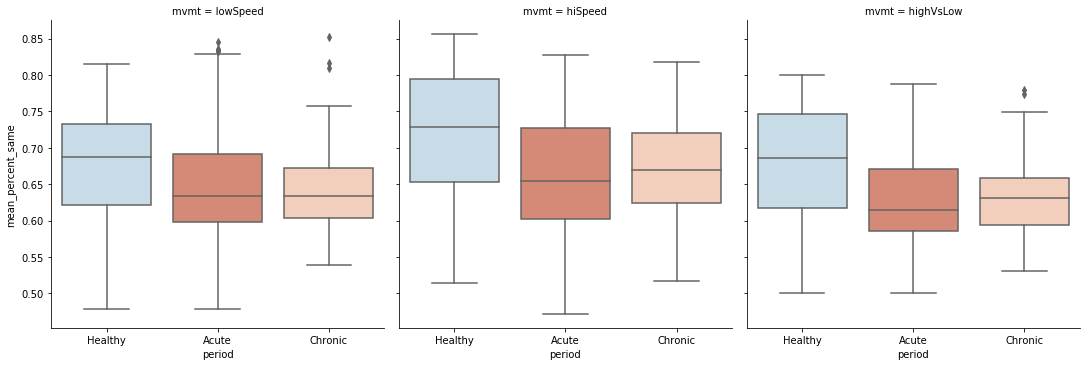

In [344]:
with sns.color_palette(colorPallet3):
    sns.catplot(data=df, x='period',y='mean_percent_same',col='mvmt',kind='box')

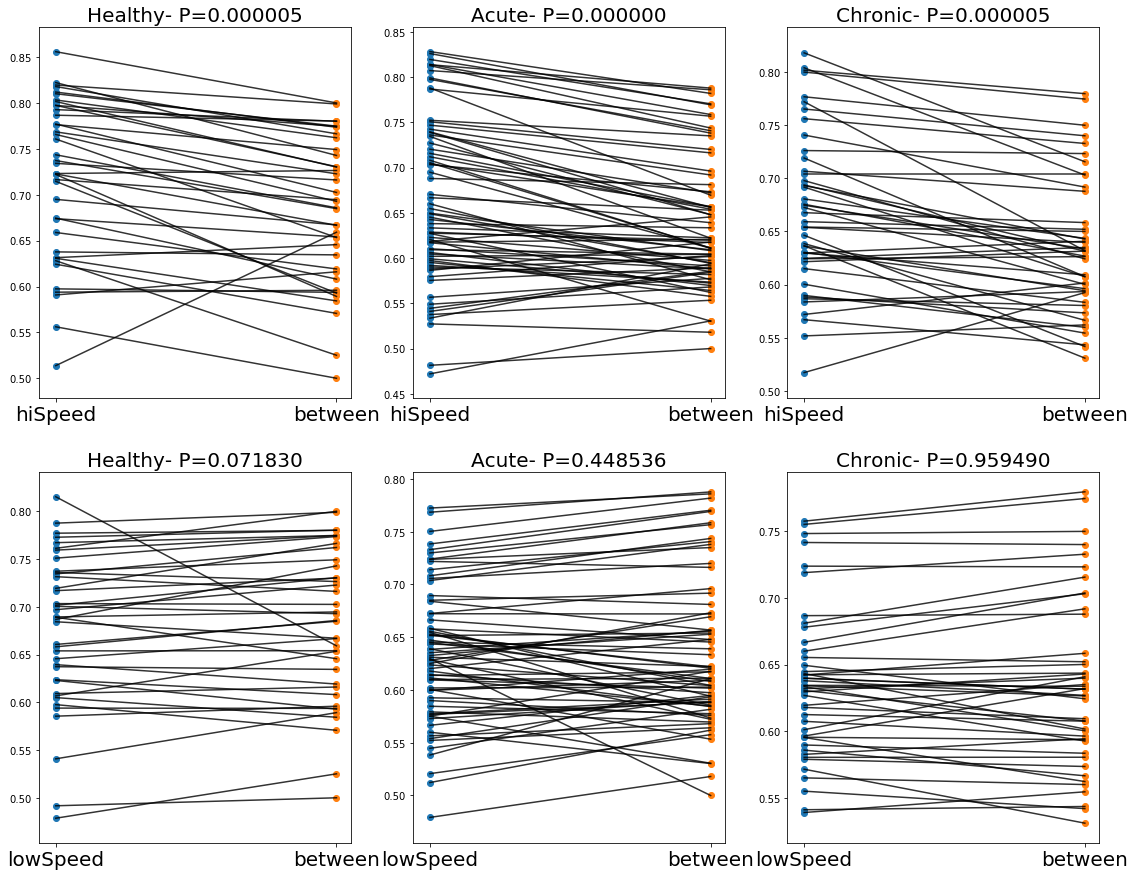

In [354]:
dfStat = df[['period','sess','mvmt','mean_percent_same']].pivot(index=['sess','period'], columns='mvmt')['mean_percent_same']
dfStat =dfStat.reset_index()
fig, ax  = plt.subplots(2,3,figsize=(19,15))
for ind, p in enumerate(dfStat.period.unique()):
     for indc,mv in enumerate(['hiSpeed','lowSpeed']):
        
        tdf = dfStat[(dfStat.period==p)][[mv,'highVsLow']].dropna()
        nSamples = len(tdf.highVsLow)
        within = list(tdf[mv])
        between = list(tdf.highVsLow)
        
        S,P = sci.stats.wilcoxon(within,between)
        
        ax[indc,ind].scatter(np.zeros(nSamples), within)
        ax[indc,ind].scatter(np.ones(nSamples), between)

        # plotting the lines
        for i in range(nSamples):
            ax[indc,ind].plot( [0,1], [within[i], between[i]], c='k',alpha=0.8)

        ax[indc,ind].set_xticks([0,1])
        ax[indc,ind].set_xticklabels([mv, 'between'],fontsize=20)
        ax[indc,ind].set_title(p+'- P={pval:f}'.format(pval=P),fontsize=20)


hiSpeed Healthy                             OLS Regression Results                            
Dep. Variable:      mean_percent_same   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.2680
Date:                Tue, 29 Jun 2021   Prob (F-statistic):              0.608
Time:                        14:25:25   Log-Likelihood:                 42.652
No. Observations:                  40   AIC:                            -81.30
Df Residuals:                      38   BIC:                            -77.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7106      0.022    

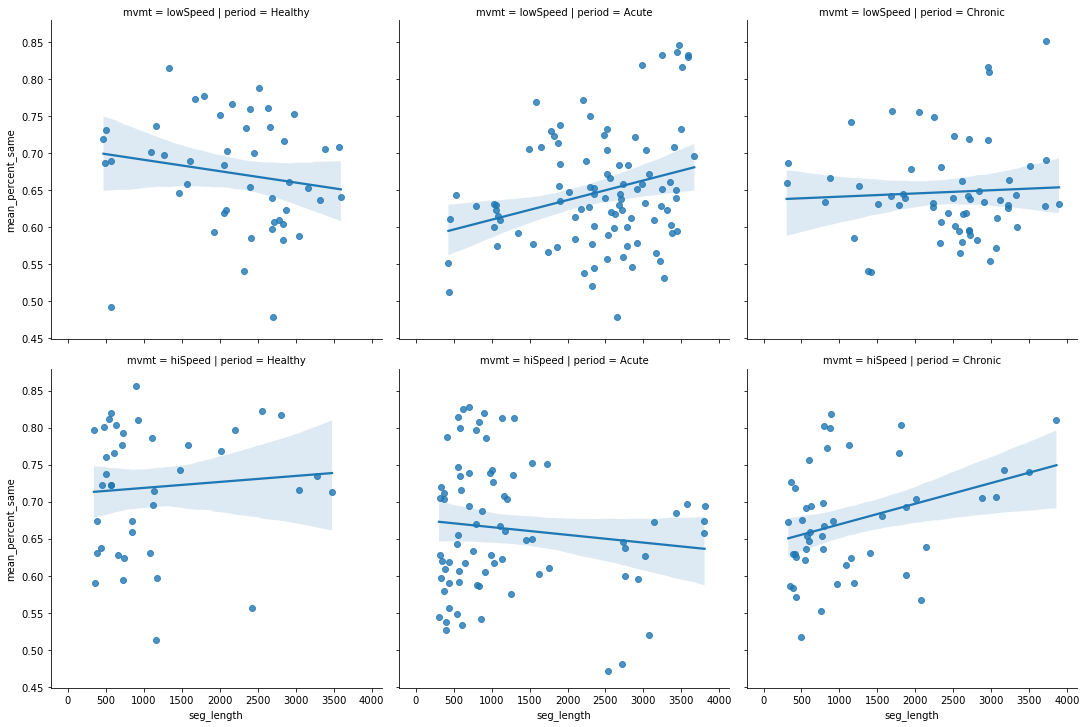

In [359]:
# fig, ax  = plt.subplots(2,3,figsize=(19,15))
sns.lmplot(data=df[df.mvmt!='highVsLow'], x="seg_length", y="mean_percent_same",col='period',row='mvmt')
for ind, p in enumerate(dfStat.period.unique()):
     for indc,mv in enumerate(['hiSpeed','lowSpeed']):
        df3 = df[(df.mvmt==mv)&(df.period==p)].dropna()
        X = df3.seg_length
        Y = df3.mean_percent_same
        X = sm.add_constant(X)
        model = sm.OLS(Y,X)
        results = model.fit()
        print(mv,p, results.summary())
        



In [369]:
f = h5py.File('J:\\connactivityAnalysis\\sig_edges.hdf5','a')
mvmtType = {'lowSpeed':"getOnsetOrPeriod(m,sess,'Pre','LowMvmtPeriods_vector')",
            'hiSpeed':"getOnsetOrPeriod(m,sess,'Pre','HighMvmtPeriods_vector')",
            'all':"np.ones((1,dff_ori.shape[1]))"}
numshifts = 1000
for m in tqdm(miceList):
    grp = f.create_group(m)
    data =  getData(Files[1],['trace'],period ='Pre', mice=m)
    
       
    cre = getCreType(Files[1],m)
    for sess in tqdm(data.keys()): 
    
        if sess in grp.keys():
            continue
        subgrp = grp.create_group(sess)

        if sess[5] == 'B':
            day = 0
        else:
            day = int(re.findall(r'\d+',sess[5:])[0])

        numRed = int(data[sess]['trace']['numred']) 

        subgrp.attrs['numRed'] = numRed
        subgrp.attrs['day'] = day
        subgrp.attrs['period'] = periodCalc(day)

        ssubgrp2 = subgrp.create_group('Pre')    
            
        dff_ori = data[sess]['trace']['dff']   
        edges = {}
        for mv in mvmtType.keys():    
            mVector = eval(mvmtType[mv])
            if np.sum(mVector)==0:
                print('no ',mv,' in ',sess)
                continue
            
            while len(mVector)<dff_ori.shape[1]:
                mVector = np.append(mVector,0)
            while len(mVector)>dff_ori.shape[1]:
                mVector = mVector[:-1]

            dff = dff_ori[:,(mVector>0)]
            ssubgrp = ssubgrp2.create_group(mv)
            if dff.shape[1]/3<200:
                print('too short ',sess,mv)
                ssubgrp['adjMap'] = np.zeros((dff.shape[0],dff.shape[0]))
                continue
            DFF = [dff[:,i : i + int(np.ceil(dff.shape[1]/3))] for i in range(0, dff.shape[1],int(np.ceil(dff.shape[1]/3)))]
            adjM = []
            for ind,seg in enumerate(DFF):
                cor = np.corrcoef(seg)
                try:
                    sCor = np.empty((cor.shape[0],cor.shape[1],numshifts))
                except:
                    continue
                for s in range(0,numshifts):
                    shifts = np.random.randint(size= seg.shape[0],low=0,high=seg.shape[1])
                    dff2 = circShiftRoll(shifts,seg)
                    sCor[:,:,s] = np.corrcoef(dff2)
                sCor = np.nanpercentile(sCor,[97.5,2.5],axis=2)
                nSig = (cor>sCor[0,:,:])|(cor<sCor[1,:,:])
                del sCor
                adjM.append(nSig)
            try:
                ssubgrp['adjMap'] = np.asarray(adjM[0])*np.asarray(adjM[1])*np.asarray(adjM[2])
                
            except:
                continue


f.close()


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



 21%|█████████████████▊                                                                 | 3/14 [00:36<02:11, 11.93s/it]

too short  0761_day1 hiSpeed



 43%|███████████████████████████████████▌                                               | 6/14 [00:52<01:01,  7.64s/it]

too short  0761_day14A hiSpeed



 50%|█████████████████████████████████████████▌                                         | 7/14 [00:54<00:41,  5.94s/it]

too short  0761_day19L hiSpeed



 57%|███████████████████████████████████████████████▍                                   | 8/14 [01:01<00:37,  6.25s/it]

too short  0761_day2 hiSpeed



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [01:07<00:31,  6.20s/it]

too short  0761_day31A hiSpeed



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [01:13<00:25,  6.29s/it]

no  hiSpeed  in  0761_day35L



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



 64%|████████████████████████████████████████████████████▋                             | 9/14 [20:51<09:21, 112.36s/it]

too short  1208_day30A hiSpeed



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



 21%|█████████████████▊                                                                 | 3/14 [02:13<07:03, 38.46s/it]

too short  1222_day11 lowSpeed



 36%|█████████████████████████████▋                                                     | 5/14 [02:30<03:31, 23.52s/it]

too short  1222_day15A lowSpeed



 43%|███████████████████████████████████▌                                               | 6/14 [02:53<03:05, 23.17s/it]

too short  1222_day20L lowSpeed



 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [03:57<00:45, 15.15s/it]

too short  1222_day5 lowSpeed



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [03:59<00:22, 11.30s/it]

too short  1222_day7 lowSpeed



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

cleaning up trace data



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

cleaning up trace data



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data
too short  2976_BaselineA hiSpeed



 57%|██████████████████████████████████████████████▊                                   | 8/14 [19:12<14:07, 141.19s/it]

too short  2976_day2 hiSpeed



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data
too short  2980_BaselineA hiSpeed



 14%|███████████▊                                                                       | 2/14 [02:12<12:43, 63.62s/it]

too short  2980_BaselineS hiSpeed



 57%|███████████████████████████████████████████████▍                                   | 8/14 [09:14<08:13, 82.22s/it]

too short  2980_day2 hiSpeed



 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [13:39<04:55, 98.53s/it]

too short  2980_day4 hiSpeed



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



 79%|███████████████████████████████████████████████████████████████▋                 | 11/14 [27:27<10:38, 212.74s/it]

too short  2981_day4 hiSpeed



  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

cleaning up trace data



 21%|█████████████████▎                                                                | 4/19 [13:37<43:34, 174.33s/it]

too short  4539_day10 hiSpeed



 26%|█████████████████████▌                                                            | 5/19 [14:28<32:02, 137.34s/it]

too short  4539_day11 hiSpeed



 37%|██████████████████████████████▌                                                    | 7/19 [16:33<19:57, 99.81s/it]

too short  4539_day13 hiSpeed



 89%|█████████████████████████████████████████████████████████████████████████▎        | 17/19 [22:21<00:57, 28.89s/it]

too short  4539_day8 hiSpeed



  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

cleaning up trace data



  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

cleaning up trace data



 21%|█████████████████▎                                                                | 4/19 [11:55<54:06, 216.46s/it]

too short  7909_day10 hiSpeed



 26%|█████████████████████▌                                                            | 5/19 [12:42<38:38, 165.57s/it]

no  hiSpeed  in  7909_day11



 32%|█████████████████████████▉                                                        | 6/19 [13:06<26:42, 123.26s/it]

too short  7909_day12 hiSpeed



 37%|██████████████████████████████▏                                                   | 7/19 [14:27<22:05, 110.42s/it]

too short  7909_day13 hiSpeed



 74%|███████████████████████████████████████████████████████████▋                     | 14/19 [31:20<12:41, 152.32s/it]

no  hiSpeed  in  7909_day5



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

cleaning up trace data



 31%|█████████████████████████▌                                                         | 4/13 [03:47<09:10, 61.13s/it]

too short  8430_day11 lowSpeed



 46%|██████████████████████████████████████▎                                            | 6/13 [08:35<11:18, 96.93s/it]

too short  8430_day19L hiSpeed



 62%|███████████████████████████████████████████████████                                | 8/13 [10:49<06:31, 78.28s/it]

too short  8430_day30A lowSpeed



 85%|████████████████████████████████████████████████████████████████████▌            | 11/13 [16:46<03:37, 108.93s/it]

too short  8430_day7 lowSpeed



 92%|██████████████████████████████████████████████████████████████████████████▊      | 12/13 [18:47<01:52, 112.61s/it]

too short  8430_day9 lowSpeed



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



 21%|█████████████████▊                                                                 | 3/14 [04:35<16:23, 89.37s/it]

too short  8803_day10 hiSpeed



 29%|███████████████████████▋                                                           | 4/14 [05:04<11:52, 71.29s/it]

too short  8803_day12 hiSpeed



 36%|█████████████████████████████▋                                                     | 5/14 [05:46<09:23, 62.65s/it]

too short  8803_day14 hiSpeed



 50%|█████████████████████████████████████████▌                                         | 7/14 [08:10<07:42, 66.01s/it]

too short  8803_day2 hiSpeed



 57%|███████████████████████████████████████████████▍                                   | 8/14 [08:59<06:06, 61.05s/it]

too short  8803_day30A hiSpeed



 71%|██████████████████████████████████████████████████████████▌                       | 10/14 [10:16<03:23, 50.91s/it]

too short  8803_day4 hiSpeed



 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [11:52<01:38, 49.18s/it]

too short  8803_day6 hiSpeed



 93%|████████████████████████████████████████████████████████████████████████████▏     | 13/14 [12:23<00:43, 43.60s/it]

too short  8803_day8 hiSpeed



  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

cleaning up trace data



100%|██████████████████████████████████████████████████████████████████████████████| 16/16 [6:28:01<00:00, 1455.10s/it]


In [383]:
df = pd.DataFrame(columns = ['Mouse','Sess','cre','mvmt','trivial_communities','nonTrivial_communities',
                             'comm_sizes','mean_commSize','mean_commSize_incTrivial',
                            'MSN_centrality','interN_centrality','interN_centrality_list','MSN_centrality_list'])

f = h5py.File('J:\\connactivityAnalysis\\sig_edges.hdf5','r')
for m in miceList:
    for s in tqdm(f[m].keys()):
        P = getPositions(Files[1],m,s[5:])
        numred = f[m][s].attrs['numRed']
                # # print(P)
        cre = getCreType(Files[1],m)
        p = {}
        for x in range(P.shape[1]):
            p[x] = (P[0,x],P[1,x])
        node_color = ['red'  if x<numred else "green" for x in range(len(p))]
        for mInd,mvmt in enumerate(['hiSpeed','lowSpeed','all']):
            try:
                nSig = f[m][s]['Pre'][mvmt]['adjMap'][:]
            except:
                print("no data for ",m,s,mvmt)
            if len(np.unique(nSig))==1:
                print("no data for ",m,s,mvmt)
                continue
            rows, cols = np.where(nSig == 1)
            edges = zip(rows.tolist(), cols.tolist())
            gr = nx.Graph()
            gr.add_nodes_from(np.arange(nSig.shape[0]))
            gr.add_edges_from(edges)
            try:
                c = list(nx.algorithms.community.greedy_modularity_communities(gr))
                dg = gr.degree
                cSize = [len(x) for x in c]
                cSizNT =[len(x) for x in c if len(x)>1]
                MSNc = []
                intNc = []
                dc = nx.degree_centrality(gr)
                MSNdc = []
                intNdc = []
                for nNum in range(numred):
                    intNc.append(dg[nNum])
                    intNdc.append(dc[nNum])
                for nNum in range(numred,nSig.shape[0]):
                    MSNc.append(dg[nNum])
                    MSNdc.append(dc[nNum])

                tempDf = {'Period':calcPeriodSess(s),'Mouse':m,'Sess':s,'cre':cre,'mvmt':mvmt,'trivial_communities':len(cSize)-len(cSizNT),
                          'nonTrivial_communities':len(cSizNT),'comm_sizes':cSize,'mean_commSize':np.mean(cSizNT),
                          'mean_commSize_incTrivial':np.mean(cSize),'MSN_degree':np.mean(MSNc),'density':nx.density(gr),
                          'interN_degree':np.mean(intNc),'interN_degree':intNc,'MSN_degree_list':MSNc,
                          'MSN_centrality':np.mean(MSNdc),'interN_centrality':np.mean(intNdc),'nNeurons':len(gr.nodes)}
                df = df.append(tempDf,ignore_index=True)
                del gr
            except:
                print('something went wrong',m,s,mvmt)
                continue

                    
df.to_csv(figFolder+'NetworkProperties_stable.csv')

       


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

no data for  0761 0761_day1 hiSpeed
no data for  0761 0761_day14A hiSpeed
no data for  0761 0761_day14A lowSpeed
no data for  0761 0761_day14A all
no data for  0761 0761_day19L hiSpeed
no data for  0761 0761_day2 hiSpeed
no data for  0761 0761_day31A hiSpeed
no data for  0761 0761_day35L hiSpeed


 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [00:02<00:00,  6.13it/s]

no data for  1208 1208_day30A hiSpeed


 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:00<00:00, 31.59it/s]

no data for  1222 1222_day11 lowSpeed
no data for  1222 1222_day15A lowSpeed
no data for  1222 1222_day2 hiSpeed
no data for  1222 1222_day2 lowSpeed
no data for  1222 1222_day2 all
no data for  1222 1222_day20L lowSpeed
no data for  1222 1222_day5 lowSpeed


 33%|████████████████████████████                                                        | 1/3 [00:00<00:00,  7.48it/s]

no data for  1222 1222_day7 lowSpeed


 14%|███████████▊                                                                       | 2/14 [00:00<00:00, 12.38it/s]

no data for  2976 2976_BaselineA hiSpeed


 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:02<00:01,  3.72it/s]

no data for  2976 2976_day2 hiSpeed


 14%|███████████▊                                                                       | 2/14 [00:00<00:01,  9.42it/s]

no data for  2980 2980_BaselineA hiSpeed


 29%|███████████████████████▋                                                           | 4/14 [00:00<00:00, 10.54it/s]

no data for  2980 2980_BaselineS hiSpeed


 57%|███████████████████████████████████████████████▍                                   | 8/14 [00:01<00:01,  4.96it/s]

no data for  2980 2980_day2 hiSpeed


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

no data for  2980 2980_day4 hiSpeed


 86%|██████████████████████████████████████████████████████████████████████▎           | 12/14 [00:07<00:01,  1.34it/s]

no data for  2981 2981_day4 hiSpeed


 26%|█████████████████████▊                                                             | 5/19 [00:00<00:02,  6.29it/s]

no data for  4539 4539_day10 hiSpeed
no data for  4539 4539_day11 hiSpeed


 42%|██████████████████████████████████▉                                                | 8/19 [00:01<00:01,  6.29it/s]

no data for  4539 4539_day13 hiSpeed


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [00:02<00:00,  8.84it/s]

no data for  4539 4539_day8 hiSpeed


 32%|██████████████████████████▏                                                        | 6/19 [00:00<00:04,  2.95it/s]

no data for  7909 7909_day10 hiSpeed
no data for  7909 7909_day11 hiSpeed
no data for  7909 7909_day12 hiSpeed


 37%|██████████████████████████████▌                                                    | 7/19 [00:01<00:03,  3.05it/s]

no data for  7909 7909_day13 hiSpeed


 74%|████████████████████████████████████████████████████████████▍                     | 14/19 [00:06<00:03,  1.33it/s]

no data for  7909 7909_day5 hiSpeed


 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:01,  5.02it/s]

no data for  8430 8430_day11 lowSpeed
no data for  8430 8430_day19L hiSpeed


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:01<00:00,  6.93it/s]

no data for  8430 8430_day30A lowSpeed


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

no data for  8430 8430_day7 lowSpeed
no data for  8430 8430_day9 lowSpeed


 50%|█████████████████████████████████████████▌                                         | 7/14 [00:00<00:00, 12.44it/s]

no data for  8803 8803_day10 hiSpeed
no data for  8803 8803_day12 hiSpeed
no data for  8803 8803_day14 hiSpeed
no data for  8803 8803_day2 hiSpeed
no data for  8803 8803_day30A hiSpeed
no data for  8803 8803_day4 

  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

hiSpeed
no data for  8803 8803_day6 hiSpeed
no data for  8803 8803_day8 hiSpeed


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00,  8.80it/s]


hiSpeed
lowSpeed
all


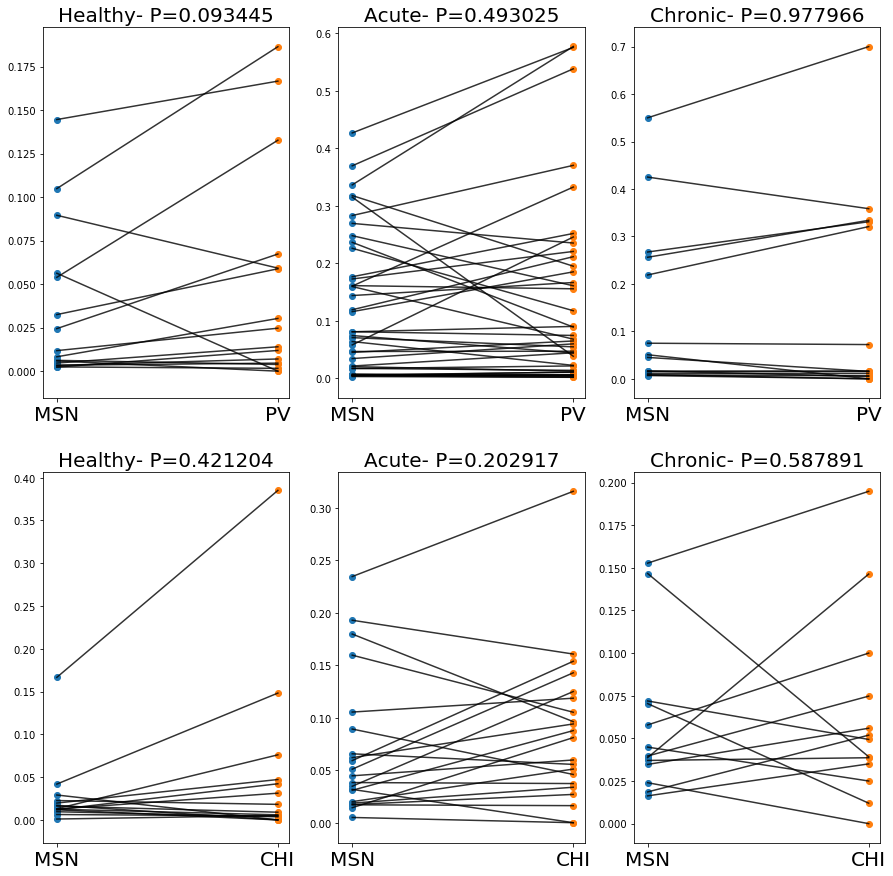

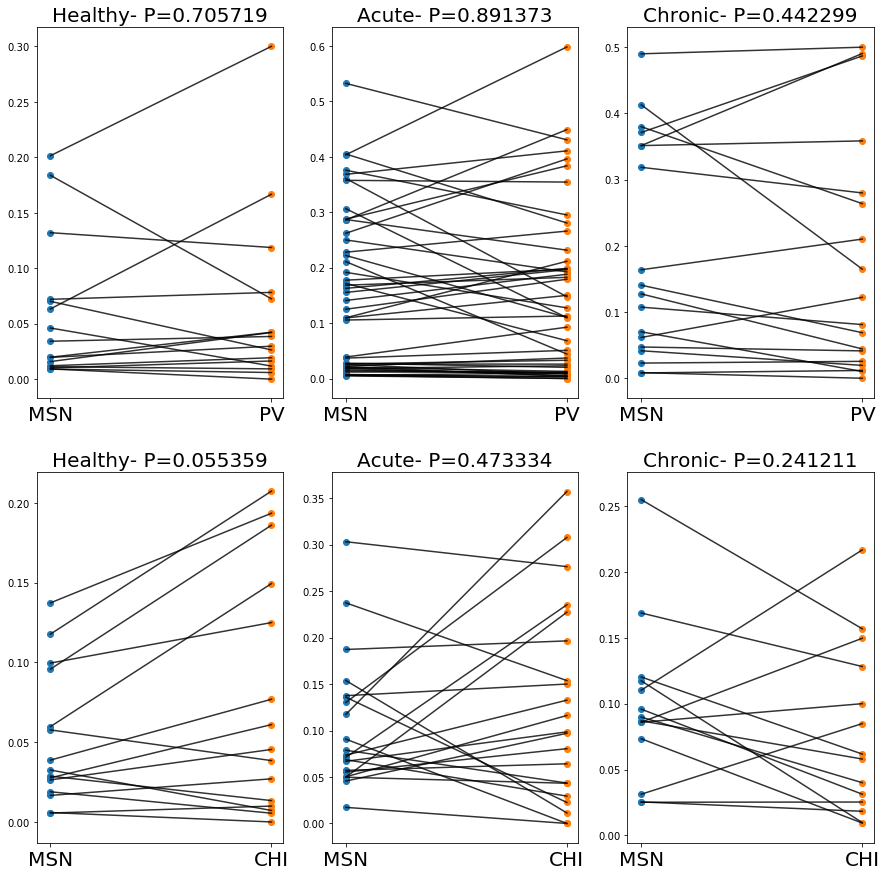

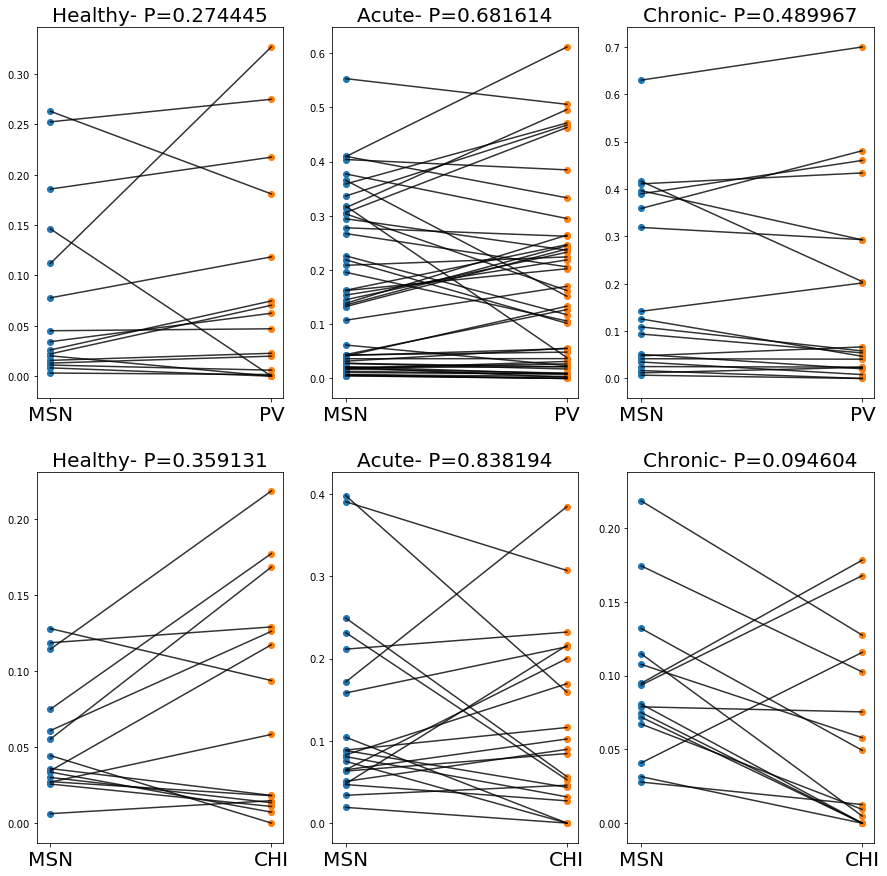

In [397]:
dfStat = df[['Period','mvmt','cre','MSN_centrality','interN_centrality']]
for mv in df.mvmt.unique():
    print(mv)
    fig, ax  = plt.subplots(2,3,figsize=(15,15))
    for ind, p in enumerate(dfStat.Period.unique()):
         for indc,c in enumerate(['PV','CHI']):
        
            tdf = dfStat[(dfStat.cre==c)&(dfStat.Period==p)&(dfStat.mvmt==mv)].dropna()
            nSamples = len(tdf.MSN_centrality)
            msn = list(tdf.MSN_centrality)
            intn = list(tdf.interN_centrality)

            S,P = sci.stats.wilcoxon(tdf.MSN_centrality,tdf.interN_centrality)

            ax[indc,ind].scatter(np.zeros(nSamples), msn)
            ax[indc,ind].scatter(np.ones(nSamples), intn)

            # plotting the lines
            for i in range(nSamples):
                ax[indc,ind].plot( [0,1], [msn[i], intn[i]], c='k',alpha=0.8)

            ax[indc,ind].set_xticks([0,1])
            ax[indc,ind].set_xticklabels(['MSN', c],fontsize=20)
            ax[indc,ind].set_title(p+'- P={pval:f}'.format(pval=P),fontsize=20)


In [408]:
# df2 = pd.read_csv(figFolder+'NetworkProperties.csv')
# df3 = df2[['Period','mvmt','Sess','cre','density']].merge(df[['Period','mvmt','Sess','cre','density']],on=['Period','mvmt','Sess','cre'])
df3 =df3.rename(columns = {'density_x':'original','density_y':'stable'})
df3

Period      mvmt            Sess  cre  original    stable
0    Healthy   hiSpeed  0761_BaselineA  CHI  0.387464  0.011396
1    Healthy  lowSpeed  0761_BaselineA  CHI  0.487179  0.056980
2    Healthy       all  0761_BaselineA  CHI  0.484330  0.042735
3    Healthy   hiSpeed  0761_BaselineL  CHI  0.411290  0.028226
4    Healthy  lowSpeed  0761_BaselineL  CHI  0.625000  0.139113
..       ...       ...             ...  ...       ...       ...
472    Acute  lowSpeed       8815_day6  CHI  0.828796  0.301270
473    Acute       all       8815_day6  CHI  0.850575  0.384755
474    Acute   hiSpeed       8815_day8  CHI  0.489687  0.178392
475    Acute  lowSpeed       8815_day8  CHI  0.514733  0.235973
476    Acute       all       8815_day8  CHI  0.628115  0.393984

[477 rows x 6 columns]

hiSpeed 0.0021191562739960312 True 6.429585037871514 146
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  Acute Chronic  -0.0116 0.8075  -0.058  0.0349  False
  Acute Healthy  -0.0678 0.0017 -0.1135 -0.0222   True
Chronic Healthy  -0.0563 0.0323 -0.1087 -0.0038   True
------------------------------------------------------
lowSpeed 0.0009564433142596106 True 7.267377263102603 161
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  Acute Chronic  -0.0084    0.9 -0.0591  0.0422  False
  Acute Healthy  -0.0818  0.001 -0.1342 -0.0295   True
Chronic Healthy  -0.0734 0.0106 -0.1325 -0.0142   True
------------------------------------------------------
all 0.002734320769569955 True 6.115449834540851 170
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 

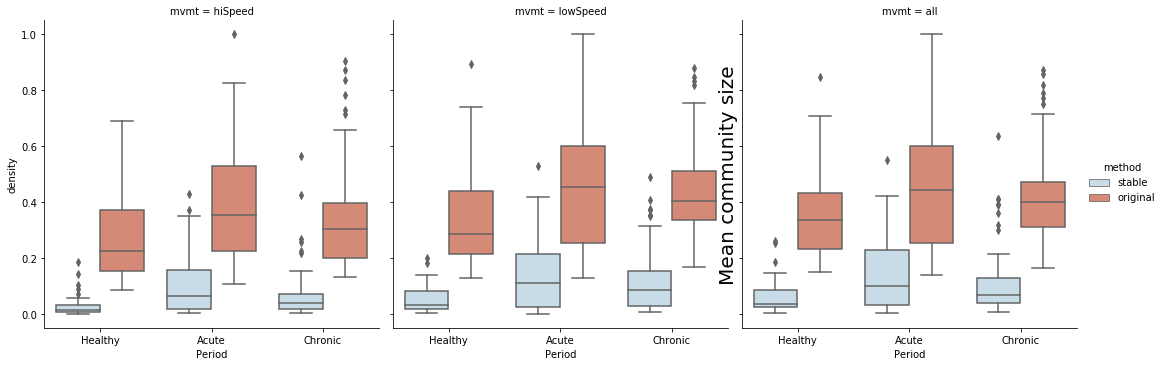

In [426]:
# df4 = df3.melt(id_vars=['Period','Sess','mvmt','cre'], value_vars=['stable','original'], var_name='method', value_name='density')
# sns.scatterplot(data =df3,x = 'original',y = 'stable',hue = 'mvmt')
# df4
with sns.color_palette(colorPallet3):
    sns.catplot(data=df4,x='Period',y='density',hue='method',col='mvmt',kind='box')

for mv in df.mvmt.unique():
    tdf = df4[(df4.mvmt==mv)&(df4.method=='stable')]
    S,P = sci.stats.f_oneway(list(tdf[tdf.Period=='Healthy'].density),
                                     list(tdf[tdf.Period=='Acute'].density),
                                     list(tdf[tdf.Period=='Chronic'].density))
    print(mv, P,P<0.05,S,len(tdf))
    plt.ylabel('Mean community size',fontsize=20)
    if P<0.05:
        m_comp = pairwise_tukeyhsd(endog=tdf.dropna().density.astype(float), groups=tdf.dropna().Period, alpha=0.05)
        print(m_comp)


In [417]:
df.head(1)

Mouse            Sess  cre     mvmt trivial_communities  \
0  0761  0761_BaselineA  CHI  hiSpeed                  22   

  nonTrivial_communities                                         comm_sizes  \
0                      2  [3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

   mean_commSize  mean_commSize_incTrivial  MSN_centrality  interN_centrality  \
0            2.5                     1.125        0.011834                0.0   

   interN_centrality_list  MSN_centrality_list  MSN_degree  \
0                     NaN                  NaN    0.307692   

                                     MSN_degree_list   Period   density  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, ...  Healthy  0.011396   

  interN_degree  nNeurons  
0           [0]      27.0

<ipython-input-420-7818fc374a4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfStat['nor_commSize'] = dfStat.apply(lambda x: x.mean_commSize/x.nNeurons,axis=1)


hiSpeed 9.420523195785651e-05 True 9.75864677451999 185
lowSpeed 0.0008807120044311931 True 7.286836137618065 204
all 0.0007849567404279984 True 7.398935183877486 213


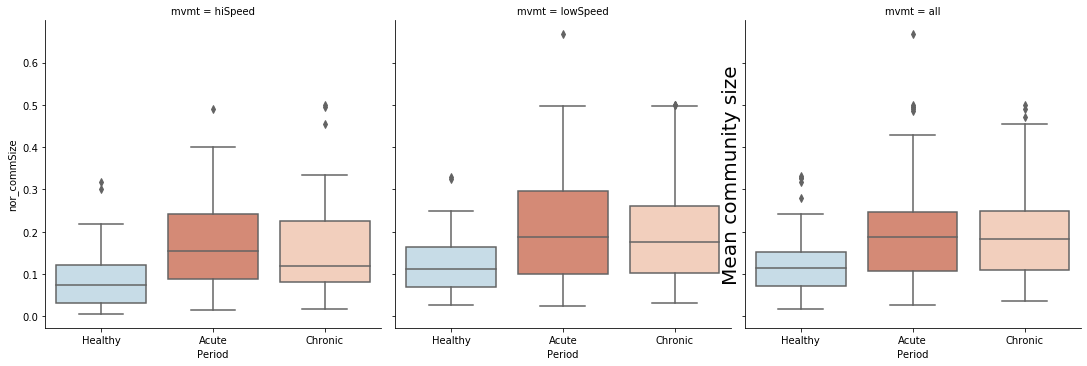

In [420]:
dfStat = df[['Period','mvmt','cre','mean_commSize','nonTrivial_communities','nNeurons']]
dfStat['nor_commSize'] = dfStat.apply(lambda x: x.mean_commSize/x.nNeurons,axis=1)
with sns.color_palette(colorPallet3):
    sns.catplot(data=dfStat, x='Period',y='nor_commSize',col='mvmt',kind='box')
#         sns.boxplot(data=df[df.mvmt==mvmt], x='Period',y='density',ax=ax[0,1])
for mv in df.mvmt.unique():
    tdf = dfStat[(dfStat.mvmt==mv)]
    S,P = sci.stats.f_oneway(list(tdf[tdf.Period=='Healthy'].nor_commSize),
                                     list(tdf[tdf.Period=='Acute'].nor_commSize),
                                     list(tdf[tdf.Period=='Chronic'].nor_commSize))
    print(mv, P,P<0.05,S,len(tdf))
    plt.ylabel('Mean community size',fontsize=20)
    if P<0.05:
        m_comp = pairwise_tukeyhsd(endog=tdf.dropna().nor_commSize_inc.astype(float), groups=tdf.dropna().Period, alpha=0.05)
        print(m_comp)


<ipython-input-422-7981e88b55fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfStat['nor_commSize_inc'] = dfStat.apply(lambda x: x.mean_commSize_incTrivial/x.nNeurons,axis=1)


hiSpeed 0.00020004483291625224 True 8.928264445637513 185
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
  Acute Chronic   0.0022   0.9 -0.0281  0.0325  False
  Acute Healthy  -0.0525 0.001 -0.0845 -0.0205   True
Chronic Healthy  -0.0547 0.001   -0.09 -0.0194   True
-----------------------------------------------------
lowSpeed 0.0008528867380557473 True 7.321273277281393 204
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  Acute Chronic   0.0137 0.6574 -0.0243  0.0517  False
  Acute Healthy  -0.0547 0.0046 -0.0952 -0.0143   True
Chronic Healthy  -0.0685 0.0011 -0.1132 -0.0237   True
------------------------------------------------------
all 0.0007410866364099861 True 7.460515696777942 213
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  grou

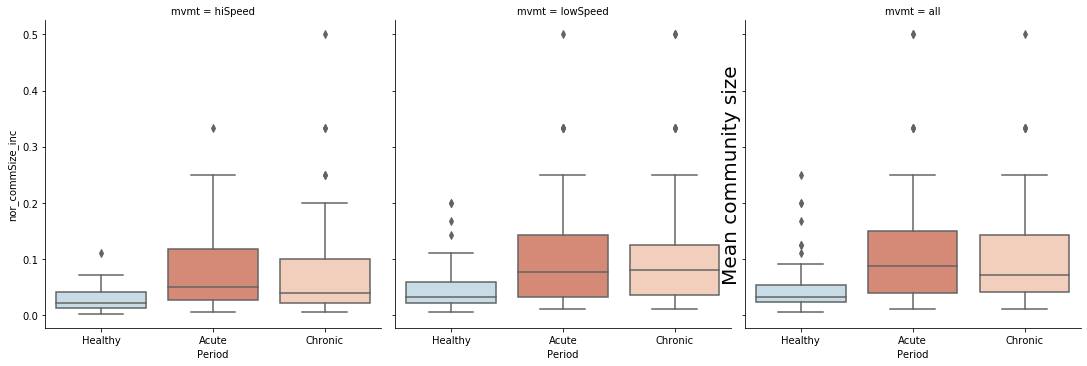

In [422]:
dfStat = df[['Period','mvmt','cre','mean_commSize','mean_commSize_incTrivial','nNeurons']]
dfStat['nor_commSize_inc'] = dfStat.apply(lambda x: x.mean_commSize_incTrivial/x.nNeurons,axis=1)
with sns.color_palette(colorPallet3):
    sns.catplot(data=dfStat, x='Period',y='nor_commSize_inc',col='mvmt',kind='box')
#         sns.boxplot(data=df[df.mvmt==mvmt], x='Period',y='density',ax=ax[0,1])
for mv in df.mvmt.unique():
    tdf = dfStat[(dfStat.mvmt==mv)]
    S,P = sci.stats.f_oneway(list(tdf[tdf.Period=='Healthy'].nor_commSize_inc),
                                     list(tdf[tdf.Period=='Acute'].nor_commSize_inc),
                                     list(tdf[tdf.Period=='Chronic'].nor_commSize_inc))
    print(mv, P,P<0.05,S,len(tdf))
    plt.ylabel('Mean community size',fontsize=20)
    if P<0.05:
        m_comp = pairwise_tukeyhsd(endog=tdf.dropna().nor_commSize_inc.astype(float), groups=tdf.dropna().Period, alpha=0.05)
        print(m_comp)